**WRITER'S IDENTITY**
- AZIMIL GANI ALAM
- Ph.D Student
- Dept. Energy & Process Tech - NTNU


**NOTE :**
- This Python File runs in GoogleColab
- This work uses **All Data**
- we want to combine all data results from CSV models become process-ready for data visualization

# Select Notebook Platform

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Library Import**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind,f_oneway, chi2_contingency
import statistics
import re
import shap
import os
from datetime import datetime, timedelta
import pytz
import scipy as sp

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
from collections import Counter
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler, SMOTE
import xgboost
import warnings
warnings.filterwarnings("ignore")

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# Default  Names & Setting

and then this is highly important : resampling option : every how many hour?

In [27]:
# folder_project = 'Data Pilot - DMS'
# platform_directory = '/content/drive/MyDrive/Colab Notebooks'

folder_project = 'project'
platform_directory = 'C:/Users/azimilga'

In [28]:
# tell resample data
time_series_resample = '10min'  #for processor 1
survey_resample      = '10min'    #for processor 2
desample_option      = '10min' 
minutely_resample    = '1min'

In [29]:
#filtering rows data regarding to desired specific time
start_time = '00:00:00'
end_time   = '23:59:59'
start_date = '2023-03-06'
end_date   =  '2023-05-30'
folder_year    = '2023'

# Folder Naming
folder_raw     = 'data-raw'
folder_ready   = 'data-ready'
folder_pivot   = 'pivot'

folder_export  = 'export'
folder_is      = 'niluapp'
data_for1      = 'combined panel'
data_for2      = 'combined longitudinal'
word_indoor    = 'Indoor '
word_outdoor   = 'Outdoor '



spec_date = pd.to_datetime('today').strftime("%Y-%m-%d")
#name_date = pd.to_datetime('today').strftime("%y%m%d")
date_format_show =  '%Y-%m-%d'
time_format_show =  '%H:%M'
start_day  = 0
end_day    = 4
start_hour = 7
end_hour   = 13

### sub setting

In [30]:
col_header = ['title', 'sessionid', 'date', 'time' ]
response_counting = ['responses']
is_col_main  =  ['feel_air','feel_temp','feel_health','feel_bright','feel_noise']
is_col_main1  = ['feel_air1','feel_temp1','feel_health1','feel_bright1','feel_noise1'] #
is_col_main2  = ['feel_air2','feel_temp2','feel_health2','feel_bright2','feel_noise2'] #
is_col_main3  = ['feel_air3','feel_temp3','feel_health3','feel_bright3','feel_noise3'] #
is_col_main4  = ['feel_air4','feel_temp4','feel_health4','feel_bright4','feel_noise4'] #

is_main_air    = ['feel_air1', 'feel_air2', 'feel_air3', 'feel_air4']
is_main_temp   = ['feel_temp1', 'feel_temp2', 'feel_temp3', 'feel_temp4']
is_main_bright = ['feel_bright1', 'feel_bright2', 'feel_bright3', 'feel_bright4']
is_main_health = ['feel_health1', 'feel_health2', 'feel_health3', 'feel_health4']
is_main_noise  = ['feel_noise1', 'feel_noise2', 'feel_noise3', 'feel_noise4']

is_col_air   = ['air_smell','air_heavy','air_dry','air_dust','air_electshock']
is_col_temp  = ['temp_coldhot','temp_draw','temp_coldfloor','temp_heatsun','temp_heater' ]
is_col_bright = ['bright_sun','bright_lamp_hi','bright_lamp_low']
is_col_health  = ['health_head','health_cough','health_tired','health_dryskin']
is_col_multi  = ['feel_air','feel_temp','feel_health','feel_bright','feel_noise','temp_coldhot']
is_col_subquestion = is_col_air+ is_col_temp + is_col_bright + is_col_health
pd_col       = ['rd_air', 'rd_temp', 'rd_health', 'rd_bright', 'rd_noise']
columns_formation   = col_header + is_col_main + is_col_air + is_col_temp + is_col_bright + is_col_health

is_main_ad = ['ad_air','ad_temp','ad_health','ad_bright','ad_noise']
is_main_as = ['as_air','as_temp','as_health','as_bright','as_noise']
is_main_rd = ['rd_air','rd_temp','rd_health','rd_bright','rd_noise']
is_main_rs = ['rs_air','rs_temp','rs_health','rs_bright','rs_noise']

school_col_name   = 'school_id'
room_col_name     = 'room_id'
date_name         = 'date'
time_name         = 'time'
manuf_col_name    = 'manuf_id'
instr_col_name    = 'instr_id'
serial_col_name   = 'serial_id'

#Give a name for new column in purpose to count how many response / hour or response / day
response_counting = 'responses'

#columns_formation = ['title', 'sessionid', 'date', 'time' , 'Room Air', 'Room Temperature', 'Room Lighting', 'Health Feeling', 'Room Noice', 'BAD SMELL' , 'BAD HEAVY/AIR', 'DRY AIR', 'DUST AND DIRT', 'ELECTRIC SHOCK', '(-COLD) OR HOT', 'DRAWING COLD AIR', 'COLD ON THE FLOOR', 'MUCH HEAT FROM SUNSHINE', 'MUCH HEAT FROM FURNACES', 'LIGHT FROM THE SUN', 'BRIGHT LIGHT CEILING LAMPS', 'WEAK LIGHT CEILING LAMPS', 'HEADACHE', 'COUGH/SHORENESS', 'TIRED/UNCONCENTRATED', 'DRY EYES/HANDS']

word_indoor   = 'Indoor '
word_outdoor  = 'Outdoor ' 
temp_v_label  = word_indoor + 'Temp. by Vent system (*C)'
co2_v_label   = word_indoor+ 'CO2 level by Vent System (ppm)'
vent_v_label  = word_indoor+ 'Supply Air (CMH)'
swc_f_label   = word_indoor+ 'Floor Heater -On/Off'
swc_r_label   = word_indoor+ 'Baseboard Heater-On/Off'
temp_f_label  = word_indoor+ 'Floor Temperature (*C)'

temp_a_label  = word_indoor+ 'Temp. by add. sensors (*C)'
rh_a_label    = word_indoor+ 'Relative Humidity (%)'
co2_a_label   = word_indoor+ 'CO2 level by add. sensors (ppm)'
voc_a_label   = word_indoor+ 'VOC contaminant level (ppb)'
bright_a_label= word_indoor+ 'Luminous Intensity (%)'
sound_a_label = word_indoor+ 'Sound Pressure Intensity (dBA)'
pm25_a_label  = word_indoor+ 'PM2.5 density (ug/m3)'
pm1_a_label   = word_indoor+ 'PM1.0 density (ug/m3)'
rdn_a_label   = word_indoor+ 'Radon Level (Bq/m3)'
hura_a_label  = word_indoor+ 'Humidity Ratio (g/kg air)'
press_a_label = word_indoor+ 'Air pressure (hPa)'
enth_a_label  = word_indoor+ 'entalphy (kJ/kg)'

temp_o_label  = word_outdoor+ 'Temperature (*C)'
rh_o_label    = word_outdoor+ 'Relative Humidity (%)'
winds_o_label = word_outdoor+ 'Wind Speed (m/s)'
sun_o_label   = word_outdoor+ 'Mean Global Radiation (W/m2)'
pm25_o_label  = word_outdoor+ 'PM2.5 density (ug/m3)'
pm10_o_label  = word_outdoor+ 'PM10 density (ug/m3)'
enth_o_label  = word_outdoor+ 'entalphy (kJ/kg)'

hura_d_label = 'delta Indoor-Outdoor Humidity Ratio (g/kg air)'
enth_d_label = 'delta Indoor-Outdoor entalphy (kJ/kg)'
hour_label = 'Datetime : Hour'

answer_replace2 = {0:0,2:1 , 1:1, -1:-1, -2:-1}

airthingsAll  = [ 'co2_a','temp_a', 'rh_a', 'press_a','enth_a', 'hura_a', 'voc_a','bright_a',  'rdn_a','sound_a', 'pm1_a', 'pm25_a']
airthingsPlus = [ 'co2_a','temp_a', 'rh_a', 'press_a','enth_a', 'hura_a', 'voc_a','bright_a', 'rdn_a']
airthingsPro  = [ 'co2_a','temp_a', 'rh_a', 'press_a','enth_a', 'hura_a', 'voc_a','bright_a', 'sound_a', 'pm1_a', 'pm25_a']
airthingsSmall = [ 'co2_a','temp_a', 'rh_a', 'press_a','enth_a', 'hura_a', 'voc_a','bright_a']
weather_volda = [ 'temp_o', 'rh_o', 'winds_o', 'rain_o','enth_o', 'hura_o', 'press_o']
weather_oslo  = [ 'temp_o', 'rh_o', 'winds_o', 'rain_o','enth_o', 'hura_o', 'press_o', 'sun_o', 'pm2.5_o', 'pm10_o']


co2_name          = 'co2_a'
temp_data_name    = 'temp_a'
rel_hum_name      = 'rh_a'
voc_name          = 'voc_a'
bright_name       = 'bright_a'
sound_name        = 'sound_a'
pm25_name         = 'pm2.5_a'
pm1_name          = 'pm1_a'
radon_name        = 'rdn_a'
press_name        = 'press_a'
enthalpy_name     = 'enth_a'
humid_ratio_name  = 'hura_a'
pmv_ppd_name      = [ 'pmv', 'ppd']

airthingsSmall = [co2_name, temp_data_name, rel_hum_name, press_name, enthalpy_name, humid_ratio_name, voc_name, bright_name]
airthingsPlus = airthingsSmall + [ radon_name] +pmv_ppd_name
airthingsPro  = airthingsSmall + [  sound_name, pm1_name, pm25_name] + pmv_ppd_name
weather_volda = [ 'temp_o', 'rh_o', 'winds_o', 'rain_o','enth_o', 'hura_o', 'press_o']
weather_oslo  = weather_volda + [ 'sun_o', 'pm2.5_o', 'pm10_o']
weather_extra = [ 'nox_o', 'no2_o', 'no_o']


Time Zone Changing (GMT to OSLO)

In [31]:
 #convert time format to datetime  : time_zone_converter (df, 'Zone Origin', 'Zone Destination')
def time_zone_converter(df, zone_origin, zone_destination):
  #df['datetime'] = pd.to_datetime((df['date'] + ' ' + df['time']), format='%Y-%m-%d %H:%M:%S')
  #df['DateTime'] = datechange.dt.strftime('%Y-%m-%d %H:%M:%S')

  df['datetime'] = pd.to_datetime(df['datetime'])
  df['date'] = df['datetime'].dt.strftime('%Y-%m-%d')

  # Define the timezones (GMT and Europe/Oslo)
  origin_timezone = pytz.timezone(zone_origin)
  destination_timezone = pytz.timezone(zone_destination)

  # Adjust the datetime to the Oslo timezone and account for daylight saving time
  df['adjusted datetime'] = df['datetime'].dt.tz_localize(origin_timezone).dt.tz_convert(destination_timezone)

  # Extract the adjusted time
  df['time'] = df['adjusted datetime'].dt.strftime('%H:%M')
  df['datetime'] = df['adjusted datetime'] #.dt.strftime('%Y-%m-%d %H:%M')
  df.drop(['adjusted datetime'], axis=1, inplace=True)

In [32]:
#plotting graphs
def plotter (df, y_axis, y_axis_label, pd_check, pd_check_label, response_counting, x_function, y_function):
    plt.scatter(df.reset_index()[y_axis], df.reset_index()[pd_check]*100, s= df.reset_index()[response_counting])
    plt.ylabel (pd_check_label)
    plt.xlabel (y_axis_label)
    plt.yscale(y_function)
    plt.xscale(x_function)
    plt.figure(figsize=(6,4))
    plt.show()
    plt.clf()

#plotting graphs
def plotter_noresponse (df, y_axis, y_axis_label, pd_check, pd_check_label, x_function, y_function):
    plt.scatter(df.reset_index()[y_axis], df.reset_index()[pd_check])
    plt.ylabel (pd_check_label)
    plt.xlabel (y_axis_label)
    plt.yscale(y_function)
    plt.xscale(x_function)
    plt.figure(figsize=(6,4))
    plt.show()
    plt.clf()

def plotter_eachclasses (df, y_axis, y_axis_label, pd_check, pd_check_label, response_counting, x_function, y_function):
    for first_index, data in df.groupby(level=0):
     # Extract x and y data for the scatter plot
        x_data = data[y_axis]
        y_data = data[pd_check]
        s_data = data[response_counting]# Replace 'YourColumn' with your column name
    # Plot a scatter graph for each subset of data
        plt.scatter(x_data, y_data, s=s_data , label=first_index ) #, label=first_index
    plt.ylabel (pd_check_label)
    plt.xlabel (y_axis_label)
    plt.yscale(y_function)
    plt.xscale(x_function)
    plt.figure(figsize=(6,4))
    plt.show()
    plt.clf()

def dissatisfaction_rate (df, col, coef, dis_name, satis_name ):
    df[dis_name] = ((df[col[3]] + coef * df[col[2]]) / (df[col[3]] + df[col[2]] + df[col[1]] + df[col[0]])).round(3)
    df[satis_name] = ((df[col[0]] + coef * df[col[1]]) / (df[col[3]] + df [col[2]] + df[col[1]] + df[col[0]])).round(3)


def dissatisfaction_rate2 (df, col, coef, dis_name, satis_name ):
    df[dis_name] = ((df[col[3]] + coef * df[col[2]]) / (df['students'])).round(3)
    df[satis_name] = ((df[col[0]] + coef * df[col[1]]) / (df['students'])).round(3)

In [33]:
# Create a heatmap for the pearsons coefficient
def heatmap_corrvalue (df, corr_method , size , title, font_size):
    corr = df.corr(method=corr_method).round(2)   #, 'feel_bright'

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size)

    plt.xticks(rotation=90, fontsize=font_size)
    plt.title('correlation map : '+ '(' + corr_method + ') '+title , fontsize=12)
    plt.yticks(fontsize=font_size,rotation=90 )

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220,10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask,cmap="coolwarm", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
                square=True, linewidths=.5, annot_kws={"size": (font_size-2)})


# Create a heatmap for the p-values
def heatmap_pvalue_noreplace (df, categorical_column, continuous_column):

    # Get categorical and continuous column names
    categorical_columns = df[categorical_column].columns  # mentioning list of categorical
    continuous_columns = df[continuous_column].columns  # mentioning list of continuous

    # Initialize an empty matrix to store p-values
    num_cat_cols = len(categorical_columns)
    num_cont_cols = len(continuous_columns)
    p_values = np.zeros((num_cont_cols, num_cat_cols))

    # Perform ANOVA tests for each categorical column against each continuous column
    for i, cat_col in enumerate(categorical_columns):  # Iterate through categorical columns
        for j, cont_col in enumerate(continuous_columns):  # Iterate through continuous columns
            groups = [df[df[cat_col] == val][cont_col] for val in df[cat_col].unique()]
            f_stat, p_val_anova = f_oneway(*groups)
            p_values[j, i] = p_val_anova.round(4)

    sns.heatmap(p_values, cmap="rocket" , vmin=0, vmax=0.100, center=0.03,
                cbar=True, annot =True, square=False, linewidths=0.5
                #,annot_kws={"size": 7}
                )
    # Customize plot properties
    #plt.colorbar(heatmap, label='p-value')
    plt.title('ANOVA p-values Heatmap')
    plt.ylabel('measured parameters')
    plt.xlabel('user feedback')
    #plt.yticks(np.arange(num_cont_cols), rotation=0)
    #plt.xticks(np.arange(num_cat_cols))
    plt.yticks(np.arange(0.5,num_cont_cols), continuous_columns
               #,size = 8
               ,rotation=0
               )
    plt.xticks(np.arange(0.5,num_cat_cols), categorical_columns
               #,size = 8
               ,horizontalalignment='center',rotation=15
               )
    plt.show()
    plt.clf()
    print(p_values)


# Create a heatmap for the p-values
def heatmap_pvalue_2cat (input_df, categorical_column, continuous_column, figsize):
    df = input_df.copy()
    answer_replace2 = {0:0,2:1 , 1:1, -1:-1, -2:-1}
    df.loc[:,categorical_column] = df.loc[:,categorical_column].replace(answer_replace2)

    # Get categorical and continuous column names
    categorical_columns = df[categorical_column].columns  # mentioning list of categorical
    continuous_columns = df[continuous_column].columns  # mentioning list of continuous

    # Initialize an empty matrix to store p-values
    num_cat_cols = len(categorical_columns)
    num_cont_cols = len(continuous_columns)
    p_values = np.zeros((num_cont_cols, num_cat_cols)).round(3)

    # Perform ANOVA tests for each categorical column against each continuous column
    for i, cat_col in enumerate(categorical_columns):  # Iterate through categorical columns
        for j, cont_col in enumerate(continuous_columns):  # Iterate through continuous columns
            groups = [df[df[cat_col] == val][cont_col] for val in df[cat_col].unique()]
            f_stat, p_val_anova = f_oneway(*groups)
            p_values[j, i] = p_val_anova
    
    p_values = p_values.round(3)
    plt.figure(figsize=figsize)  #figsize=(5 , 8)
    #plt.figure(figsize=(4,6))
    sns.heatmap(p_values, cmap="rocket" , vmin=0, vmax=0.100, center=0.03,
                cbar=True, annot =True, square=False, linewidths=0.5
                #,annot_kws={"size": 7}
                )
    # Customize plot properties
    #plt.colorbar(heatmap, label='p-value')
    plt.title('ANOVA p-values Heatmap')
    plt.ylabel('measured parameters')
    plt.xlabel('user feedback')
    #plt.yticks(np.arange(num_cont_cols), rotation=0)
    #plt.xticks(np.arange(num_cat_cols))
    plt.yticks(np.arange(0.5,num_cont_cols), continuous_columns
               #,size = 8
               ,rotation=0
               )
    plt.xticks(np.arange(0.5,num_cat_cols), categorical_columns
               #,size = 8
               ,horizontalalignment='center',rotation=45
               )
    plt.show()
    plt.clf()
    print(p_values)


# Create a heatmap for the p-values
def heatmap_pvalue_4cat (df, categorical_column, continuous_column,figsize):

    # Get categorical and continuous column names
    categorical_columns = df[categorical_column].columns  # mentioning list of categorical
    continuous_columns = df[continuous_column].columns  # mentioning list of continuous

    # Initialize an empty matrix to store p-values
    num_cat_cols = len(categorical_columns)
    num_cont_cols = len(continuous_columns)
    p_values = np.zeros((num_cont_cols, num_cat_cols)).round(3)

    # Perform ANOVA tests for each categorical column against each continuous column
    for i, cat_col in enumerate(categorical_columns):  # Iterate through categorical columns
        for j, cont_col in enumerate(continuous_columns):  # Iterate through continuous columns
            groups = [df[df[cat_col] == val][cont_col] for val in df[cat_col].unique()]
            f_stat, p_val_anova = f_oneway(*groups)
            p_values[j, i] = p_val_anova
    p_values = p_values.round(3)    
    plt.figure(figsize=figsize)
    #plt.figure(figsize=(4,6))
    sns.heatmap(p_values, cmap="rocket" , vmin=0, vmax=0.100, center=0.03,
                cbar=True, annot =True, square=False, linewidths=0.5
                #,annot_kws={"size": 7}
                )
    # Customize plot properties
    #plt.colorbar(heatmap, label='p-value')
    plt.title('ANOVA p-values Heatmap')
    plt.ylabel('measured parameters')
    plt.xlabel('user feedback')
    #plt.yticks(np.arange(num_cont_cols), rotation=0)
    #plt.xticks(np.arange(num_cat_cols))
    plt.yticks(np.arange(0.5,num_cont_cols), continuous_columns,
               #size = 8,
               rotation=0
               )
    plt.xticks(np.arange(0.5,num_cat_cols), categorical_columns,
               #size = 8,
               horizontalalignment='center',rotation=45
               )
    plt.show()
    plt.clf()
    print(p_values)

def heatmap_pvalue_subquest (df, categorical_column, continuous_column, figsize):

    answer_replace2 = {0:'No', 1:'Yes'}
    df.loc[:,categorical_column] = df.loc[:,categorical_column].fillna(0).replace(answer_replace2)

    # Get categorical and continuous column names
    categorical_columns = df[categorical_column].columns  # mentioning list of categorical
    continuous_columns  = df[continuous_column].columns  # mentioning list of continuous

    # Initialize an empty matrix to store p-values
    num_cat_cols = len(categorical_columns)
    num_cont_cols = len(continuous_columns)
    p_values = np.zeros((num_cont_cols, num_cat_cols))

    # Perform ANOVA tests for each categorical column against each continuous column
    for i, cat_col in enumerate(categorical_columns):  # Iterate through categorical columns
        for j, cont_col in enumerate(continuous_columns):  # Iterate through continuous columns
            groups = [df[df[cat_col] == val][cont_col] for val in df[cat_col].unique()]
            f_stat, p_val_anova = f_oneway(*groups)
            p_values[j, i] = p_val_anova.round(decimals=3)

    plt.figure(figsize=figsize)

    sns.heatmap(p_values, cmap="rocket" , vmin=0, vmax=0.100, center=0.03,
                cbar=True, annot =True, square=False, linewidths=0.5
                #,annot_kws={"size": 7}
                )
    # Customize plot properties
    #plt.colorbar(heatmap, label='p-value')
    plt.title('ANOVA p-values Heatmap')
    plt.ylabel('measured parameters')
    plt.xlabel('user feedback')
    #plt.yticks(np.arange(num_cont_cols), rotation=0)
    #plt.xticks(np.arange(num_cat_cols))
    plt.yticks(np.arange(0.5,num_cont_cols), continuous_columns
               #,size = 8
               ,rotation=0
               )
    plt.xticks(np.arange(0.5,num_cat_cols), categorical_columns
               #,size = 8
               ,horizontalalignment='center',rotation=15
               )
    plt.show()
    plt.clf()
    print(p_values)

# Create a heatmap for the p-values
def heatmap_chitest_2cat (df,answer_replace2, figsize):
    df = df.replace(answer_replace2)
    # Create a contingency table for each pair of columns and store the p-values in a DataFrame
    p_values = pd.DataFrame(index=df.columns, columns=df.columns)

    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:
                contingency_table = pd.crosstab(df[col1], df[col2])
                chi2, p, _, _ = chi2_contingency(contingency_table )
                p_values.loc[col1, col2] = p

    # Convert p-values to numeric for plotting
    p_values = p_values.astype(float).round(3)

    plt.figure(figsize=figsize)  #figsize=(5 , 8)
    sns.heatmap(p_values, cmap="rocket" , vmin=0, vmax=0.100, center=0.03,
                cbar=True, annot =True, square=False, linewidths=0.5
                ,annot_kws={"size": 7}
                )
    # Customize plot properties
    #plt.colorbar(heatmap, label='p-value')
    plt.title('chi2 test p-values Heatmap')
    plt.ylabel('user feedback')
    plt.xlabel('user feedback')
    #plt.yticks(np.arange(num_cont_cols), rotation=0)
    #plt.xticks(np.arange(num_cat_cols))
    plt.yticks(size = 8,rotation=0
               )
    plt.xticks(size = 8,horizontalalignment='center',rotation=15
               )
    plt.show()
    plt.clf()
    print(p_values)

def rename_spec_columns(df, text_add ):
    suffix = text_add
    # Define a lambda function to rename columns
    rename_func = lambda col: col + suffix if col.endswith('_a') or col.endswith('_o') else col

    # Rename the columns using the lambda function
    df = df.rename(columns=rename_func)

In [34]:
def stat_test_boxplot (df, column_feel, column_value, column_label):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=column_feel, x=column_value , orient='h' ,data=df)
    plt.title(column_feel + ' vs ' + column_value)
    plt.xlabel(column_label)
    plt.legend()
    plt.ylabel(column_feel)
    plt.show()
    plt.clf()

def stat_test_boxplot_hue (df, column_feel, column_value, column_label):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=column_feel, x=column_value , orient='h' , hue = 'time', data=df)
    plt.title(column_feel + ' vs ' + column_value + ' [time separated]')
    plt.xlabel(column_label)
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.ylabel(column_feel)
    plt.show()
    plt.clf()

def stat_test_sub2 (df, column_feel, column_value):
# Statistical test: T-test (assuming two categories)
    dfs = df #[df[column_value]>=0]
    cat_ab = dfs[dfs[column_feel] == 'No'][column_value]
    cat_cd = dfs[dfs[column_feel] == 'Yes' ][column_value]
    t_stat, p_val = ttest_ind(cat_ab, cat_cd)
    print(f"T-test p-value [2cat]: {p_val}")
# Statistical test: ANOVA (for multiple categories)
    f_stat, p_val_anova = f_oneway(cat_ab, cat_cd)
    print(f"ANOVA p-value [2cat]: {p_val_anova}")

def stat_test_main2 (df, column_feel, column_value):
# Statistical test: T-test (assuming two categories)
    dfs = df #[df[column_value]>=0]
    cat_ab = dfs[dfs[column_feel] == 'dissatisf.'][column_value]
    cat_cd = dfs[dfs[column_feel] == 'satisfied' ][column_value]
    t_stat, p_val = ttest_ind(cat_ab, cat_cd)
    print(f"T-test p-value [2cat]: {p_val}")
# Statistical test: ANOVA (for multiple categories)
    f_stat, p_val_anova = f_oneway(cat_ab, cat_cd)
    print(f"ANOVA p-value [2cat]: {p_val_anova}")

def stat_test_main4 (df, column_feel, column_value):
# Statistical test: T-test (assuming two categories)
    dfs = df #[df[column_value] >= 0 ].copy()
    cat_a = dfs[dfs[column_feel] == (np.array(dfs[column_feel].unique()) [0])][column_value]
    cat_b = dfs[dfs[column_feel] == (np.array(dfs[column_feel].unique()) [1])][column_value]
    cat_c = dfs[dfs[column_feel] == (np.array(dfs[column_feel].unique()) [2])][column_value]
    cat_d = dfs[dfs[column_feel] == (np.array(dfs[column_feel].unique()) [3])][column_value]
    t_stat4, p_val4 = ttest_ind(cat_a, cat_d)
    print(f"T-test p-value [4cat]: {p_val4}")
    print('T-test between : ' + np.array(dfs[column_feel].unique()) [0] + ' and ' + np.array(dfs[column_feel].unique()) [3])
# Statistical test: ANOVA (for multiple categories)
    f_stat4, p_val_anova4 = f_oneway(cat_a, cat_b, cat_c, cat_d)
    print(f"ANOVA p-value [4cat]: {p_val_anova4}")


def stat_test (input_data, is_col_main, column_feel, column_value, value_label):
    #recategorical as 2 categories
    answer_replace2 = {0:'dont know',2:'satisfied' , 1:'satisfied', -1:'dissatisf.', -2:'dissatisf.'}
    data_cat_2 = input_data[input_data[column_value]>=0].copy()#.loc[:,is_col_main+interpolate_col+['time']].reset_index(drop=True)
    data_cat_2.loc[:,is_col_main] = input_data.loc[:,is_col_main].replace(answer_replace2)
    data_cat_2['time'] = data_cat_2[['hour']].applymap(lambda x: 'morning' if x < 10 else 'afternoon')
    stat_test_main2 (data_cat_2, column_feel, column_value)
    stat_test_boxplot (data_cat_2, column_feel, column_value, value_label)
    stat_test_boxplot_hue (data_cat_2, column_feel, column_value, value_label)
    #recategorical as 4 categories

    answer_replace4 = {0:'dont know',2:'Best (2)' , 1:'Good (1)', -1:'bad (-1)', -2:'worst (-2)'}
    data_cat_4 = input_data[input_data[column_value]>=0].copy() #.loc[:,is_col_main+interpolate_col+['time']].reset_index(drop=True)
    data_cat_4.loc[:,is_col_main] = input_data.loc[:,is_col_main].replace(answer_replace4)
    data_cat_4['time'] = data_cat_4[['hour']].applymap(lambda x: 'morning' if x < 10 else 'afternoon')
    stat_test_main4 (data_cat_4, column_feel, column_value)
    stat_test_boxplot (data_cat_4, column_feel, column_value, value_label)
    stat_test_boxplot_hue (data_cat_4, column_feel, column_value, value_label)

def stat_test_subquestion (input_data, is_col_air, column_feel, column_value, value_label):
    #recategorical as 2 categories
    answer_replace2 = {0:'No', 1:'Yes'}
    data_cat_s = input_data[input_data[column_value]>=0].copy()#.loc[:,is_col_main+interpolate_col+['time']].reset_index(drop=True)
    data_cat_s.loc[:,is_col_air] = input_data.loc[:,is_col_air].replace(answer_replace2)
    data_cat_s['time'] = data_cat_s[['hour']].applymap(lambda x: 'morning' if x < 10 else 'afternoon')
    stat_test_sub2 (data_cat_s, column_feel, column_value)
    stat_test_boxplot (data_cat_s, column_feel, column_value, value_label)
    stat_test_boxplot_hue (data_cat_s, column_feel, column_value, value_label)

def stat_trial_plot (dataset, column_feel, column_value, column_label):
    plt.figure(figsize=(6, 3))
    sns.boxplot(y= column_feel, x= column_value, orient='h' , data=dataset )
    plt.title(column_feel + ' vs ' + column_value + ' [time separated]')
    plt.xlabel(column_label)
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.ylabel(column_feel)
    plt.show()
    plt.clf()
def stat_trial_plot_hue (dataset, column_feel, column_value, column_label):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y= column_feel, x= column_value, orient='h' , hue ='time', data=dataset )
    plt.title(column_feel + ' vs ' + column_value + ' [time separated]')
    plt.xlabel(column_label)
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.ylabel(column_feel)
    plt.show()
    plt.clf()

def stat_trial_time (input_data, is_col_main, column_feel, column_value, value_label):
    #recategorical as 2 categories
    answer_replace2 = {0:'dont know',2:'satisfied' , 1:'satisfied', -1:'dissatisf.', -2:'dissatisf.'}
    data_cat_2 = input_data.copy()#.loc[:,is_col_main+interpolate_col+['time']].reset_index(drop=True)
    data_cat_2.loc[:,is_col_main] = input_data.loc[:,is_col_main].replace(answer_replace2)
    data_cat_2['time'] = data_cat_2[['hour']].applymap(lambda x: 'morning' if x < 10 else 'afternoon')
    stat_test_main2 (data_cat_2, column_feel, column_value)
    stat_trial_plot (data_cat_2, column_feel, column_value, value_label)
    stat_trial_plot_hue (data_cat_2, column_feel, column_value, value_label)

def stat_trial_all(df, test_feel,test_column,test_label):
    stat_trial_time (df, is_col_main, test_feel, test_column, test_label)
    stat_trial_time (df[df['hour']<=9], is_col_main, test_feel, test_column, test_label)
    stat_trial_time (df[df['hour']>=10], is_col_main, test_feel, test_column, test_label)

def stat_trial_hist (dataset, column_feel, column_value, column_label):
    plt.figure(figsize=(6, 4))
    sns.histplot(data=dataset, x=column_value, legend='auto', hue=column_feel, multiple='stack', kde=True)
    plt.title(column_feel + ' vs ' + column_value + ' [time separated]')
    plt.xlabel(column_label)
    plt.ylabel('frequency timestep')
    plt.show()
    plt.clf()

def stat_hist_time (input_data, is_col_main, column_feel, column_value, value_label):
    #recategorical as 2 categories
    answer_replace2 = {0:'dont know',2:'satisfied' , 1:'satisfied', -1:'dissatisf.', -2:'dissatisf.'}
    data_cat_2 = input_data.copy()#.loc[:,is_col_main+interpolate_col+['time']].reset_index(drop=True)
    data_cat_2.loc[:,is_col_main] = input_data.loc[:,is_col_main].replace(answer_replace2)
    data_cat_2['time'] = data_cat_2[['hour']].applymap(lambda x: 'morning' if x < 10 else 'afternoon')
    stat_test_main2 (data_cat_2, column_feel, column_value)
    stat_trial_hist (data_cat_2, column_feel, column_value, value_label)

def stat_hist_all(df, test_feel,test_column,test_label):
    stat_hist_time (df, is_col_main, test_feel, test_column, test_label)
    stat_hist_time (df[df['hour']<=9], is_col_main, test_feel, test_column, test_label)
    stat_hist_time (df[df['hour']>=10], is_col_main, test_feel, test_column, test_label)


answer_replace2 = {0:'dont know',2:'satisfied' , 1:'satisfied', -1:'Dissatisf.', -2:'Dissatisf.'}
answer_replace4 = {0:0,2:'Best' , 1:'Good', -1:'Bad', -2:'Worst'}
no_replace4 = {0:0,2:2 , 1:1, -1:-1, -2:-2}
no_replace2 = {0:0,2:1 , 1:1, -1:-1, -2:-1}

def feel_confusion_matrix (input_data, column_value1, column_value2, answer_replace):
    data_cat_2 = input_data.sort_values([column_value1]).copy()#.loc[:,is_col_main+interpolate_col+['time']].reset_index(drop=True)
    data_cat_2.loc[:,is_col_main] = data_cat_2.loc[:,is_col_main].replace(answer_replace)
    identical_percent = (accuracy_score(data_cat_2[column_value1],data_cat_2[column_value2])*100).round(3)
    print('identical accuracy  : ' + str(identical_percent) + '%')
    cm_matrix = confusion_matrix(data_cat_2[column_value1],data_cat_2[column_value2])
    disp = ConfusionMatrixDisplay(confusion_matrix= cm_matrix, display_labels=data_cat_2[column_value2].unique() )
    disp.plot()
    plt.xlabel(column_value1)
    plt.ylabel(column_value2)
    plt.title('Identicality : ' + column_value1 + ' vs. ' +column_value2 + '= ' + str(identical_percent) + '%')
    plt.show()

def determine_batch_to_moment(row):
    if row['batch'] == 'morning' :
        return -1
    elif row['batch'] == 'afternoon':
        return 1
    else:
        return 0

In [35]:
#custom_colors = [ '#7fff00','#66cd00',  '#a52a2a','#ffa500', '#808080']
def pie_plot_feel (df, what_feel):
    answer_replace4 = {0:'dont know',2:'Best (2)' , 1:'Good (1)', -1:'bad (-1)', -2:'worst (-2)'}
    df.loc[:,what_feel] = df.loc[:,what_feel].replace(answer_replace4)
    vote_counts1= (df[what_feel].value_counts().sort_index())
    print('total votes: ' + str((df[what_feel].value_counts().sum())))
    plt.figure(figsize=(4, 4))
    plt.pie(vote_counts1, labels=vote_counts1.index, autopct= lambda x: '{:.0f}'.format(x*vote_counts1.sum()/100) #'%1.1f%%'
            # , colors= custom_colors
            )
    plt.title(school_name  +': ' + what_feel)
    plt.show()

def pie_plot_feel_class (df, what_feel, class_number):
    answer_replace4 = {0:'dont know',2:'Best (2)' , 1:'Good (1)', -1:'bad (-1)', -2:'worst (-2)'}
    df.loc[:,what_feel] = df.loc[:,what_feel].replace(answer_replace4)
    vote_counts1= (df[df['room_id']==class_number][what_feel].value_counts().sort_index())
    print('total votes: ' + str((df[df['room_id']==class_number][what_feel].value_counts().sum())))
    plt.figure(figsize=(4, 4))
    plt.pie(vote_counts1, labels=vote_counts1.index, autopct= lambda x: '{:.0f}'.format(x*vote_counts1.sum()/100)   #'%1.1f%%'
        #     ,  colors= custom_colors
            )
    plt.title(school_name + ' at Rom ' + str(class_number) +': ' + what_feel)
    plt.show()

def vote_piechart (get_in_file, what_feel,class_number,school_name,custom_colors):
    vote_counts4 = (get_in_file[get_in_file['room_id']==class_number][what_feel].value_counts().sort_index())
    # Custom colors for the pie chart segments
    plt.figure(figsize=(4, 4))
    plt.pie(vote_counts4, labels=vote_counts4.index, autopct='%1.1f%%', startangle=140
            # , colors= custom_colors
            )
    plt.title(school_name + '_' + str(class_number) +': ' + what_feel)

In [36]:
def season_creator (df,start_date,end_date,season_ranges):
    # Convert the date column to datetime
    df['date2'] = pd.to_datetime(df['date'])

    # Initialize the 'season' column with default value 0
    df['season'] = 0

    # Assign the season codes based on the date ranges
    for start_date, end_date, season_code in season_ranges:
        start = pd.to_datetime(start_date)
        end = pd.to_datetime(end_date)
        df.loc[(df['date2'] >= start) & (df['date2'] <= end), 'season'] = season_code
    df.drop(['date2'], axis=1, inplace=True)
    
    
def aggfunc_mode(series):
    m, _ = mode(series)
    return m[0]

In [37]:
airthingsPlus = [ 'co2_a','temp_a', 'rh_a', 'enth_a', 'hura_a', 'voc_a','bright_a', 'press_a', 'rdn_a', 'pmv', 'ppd']
airthingsPro  = [ 'co2_a','temp_a', 'rh_a', 'enth_a', 'hura_a', 'voc_a', 'sound_a','bright_a',  'pm1_a', 'pm25_a', 'press_a', 'pmv', 'ppd']
weather_volda = [ 'temp_o', 'rh_o', 'winds_o', 'rain_o','enth_o', 'hura_o', 'press_o']
weather_oslo  = [ 'temp_o', 'rh_o', 'winds_o', 'rain_o','enth_o', 'hura_o', 'press_o', 'sun_o', 'pm2.5_o', 'pm10_o']

In [38]:
values_temp2   =  [#'swc_r', #'swc_f',
                   #'temp_v',  'temp_s', # 'temp_f',
                   #'press_a',
                   'temp_a', 'rh_a','enth_a', 'hura_a','enth_o', 'hura_o','temp_o', 'rh_o', 'students'
                   #,'pmv', 'ppd'
                   ]
values_air2    =  [#'temp_f', 'temp_v',
                   'temp_a','rh_a', 'co2_a', 'voc_a', 'bright_a', 'rdn_a', 'enth_a','enth_o', 'hura_a','hura_o','temp_o', 'rh_o', 'winds_o'
                   #, 'sun_o'
                   #,'pm10_o', 'pm2.5_o'
                   , 'students'
                   ]
values_health2 =  [#'temp_f', 'temp_v',
                   'temp_a', 'rh_a', 'co2_a', 'voc_a', 'bright_a','rdn_a','hura_a','hura_o','enth_a','enth_o'
                   #,'pm1_a', 'pm25_a'
                   #,'pm10_o', 'pm2.5_o'
                   , 'rh_o','winds_o'
                   #, 'sun_o'
                   , 'students'
                   ]
values_bright2 =  ['temp_a', 'bright_a', 'temp_o', 'rh_o','winds_o', 'rain_o', 'enth_o', 'students']
values_noise2  =  [ 'co2_a', 'voc_a', 'sound_a','enth_a','hura_a','hura_o','enth_o'
                   #,'pm1_a', 'pm25_a'
                   , 'rh_a'
                   , 'students']

In [39]:
def categorize_batch(df):
    if df < 8 :
        return 'morning'
    elif 10 <= df <= 12:
        return 'afternoon'
    else:
        return 'skip'

def determine_batch_brannfjell(row):
    if row['room_id'] in ['11', '23']:
        if pd.to_datetime('07:15') <= pd.to_datetime(row['time']) < pd.to_datetime('08:30'):
            return 'morning'
        elif 12 <= row['hour'] <= 13:
            return 'afternoon'
    elif row['room_id'] == '27':
        if pd.to_datetime('09:00') <= pd.to_datetime(row['time']) <= pd.to_datetime('10:30'):
            return 'morning'
        elif 12 <= row['hour'] <= 13:
            return 'afternoon'
    return 'skip'
# Define the function to determine the value of 'column_D'
# def determine_batch(row):
#     if pd.to_datetime(row['time']) < pd.to_datetime('08:30'):
#         return 'morning'
#     elif 10 < row['hour'] <= 12:
#         return 'afternoon'
#     else:
#         return 'skip'

def determine_batch_øyra(row):
    if row['room_id'] == '302':
        if pd.to_datetime('07:15') <= pd.to_datetime(row['time']) <= pd.to_datetime('08:15'):
            return 'morning'
        elif 11 <= row['hour'] <= 12:
            return 'afternoon'
        
    elif row['room_id'] == '303':
        if pd.to_datetime('07:40') <= pd.to_datetime(row['time']) <= pd.to_datetime('09:45'):
            return 'morning'
        elif 11 <= row['hour'] <= 12:
            return 'afternoon'
    return 'skip'
   
def determine_batch_bratteberg(row):
    if row['room_id'] in ['141', '142']:
        if pd.to_datetime('07:15') <= pd.to_datetime(row['time']) <= pd.to_datetime('08:30'):
            return 'morning'
        elif 11 <= row['hour'] <= 12:
            return 'afternoon'
    elif row['room_id'] == '210':
        if pd.to_datetime('07:15') <= pd.to_datetime(row['time']) <= pd.to_datetime('08:15'):
            return 'morning'
        elif 10 <= row['hour'] <= 11:
            return 'afternoon'
        
    elif row['room_id'] == 'Øst brakker':
        if pd.to_datetime('07:15') <= pd.to_datetime(row['time']) <= pd.to_datetime('09:15'):
            return 'morning'
        elif 10 <= row['hour'] <= 12:
            return 'afternoon'
    return 'skip'

def determine_batch_allschools(row):
    if row['school_id'] == 'bratteberg':
        return determine_batch_bratteberg(row)
    elif row['school_id'] == 'brannfjell':
        return determine_batch_brannfjell(row)
    elif row['school_id'] == 'øyra':
        return determine_batch_øyra(row)
    return 'skip'
# Apply the function to each row
# df['batch'] = df.apply(determine_batch_allschools, axis=1)


def dissatisfaction_creator(df):
    df['rd_air']      = 1*(df['feel_air3']+df['feel_air4'])/df[response_counting]
    df['rd_temp']     = 1*(df['feel_temp3']+df['feel_temp4'])/df[response_counting]
    df['rd_health']   = 1*(df['feel_health3']+df['feel_health4'])/df[response_counting]
    df['rd_bright']   = 1*(df['feel_bright3']+df['feel_bright4'])/df[response_counting]
    df['rd_noise']    = 1*(df['feel_noise3']+df['feel_noise4'])/df[response_counting]

def dissatisfaction_aggregator(df):
    df['acc_air']    = (df['feel_air1']*2+df['feel_air2'] +df['feel_air3']*-1+df['feel_air4']*-2)/df[response_counting]
    df['acc_temp']   = (df['feel_temp1']*2+df['feel_temp2'] +df['feel_temp3']*-1+df['feel_temp4']*-2)/df[response_counting]
    df['acc_health'] = (df['feel_health1']*2+df['feel_health2'] +df['feel_health3']*-1+df['feel_health4']*-2)/df[response_counting]
    df['acc_bright'] = (df['feel_bright1']*2+df['feel_bright2'] +df['feel_bright3']*-1+df['feel_bright4']*-2)/df[response_counting]
    df['acc_noise']  = (df['feel_noise1']*2+df['feel_noise2'] +df['feel_noise3']*-1+df['feel_noise4']*-2)/df[response_counting]
    
def assign_room_id(row):
    if str(row['room_id']).startswith(('2', '3', '4')):
        return 0
    else:
        return 1

# Bratteberg

In [233]:
class1 = 141
class2 = 142
class3 = 210
class4 = 'Øst brakker'
school_name    = 'bratteberg'
end_file_name  = 'classes'

airthingsDevice = airthingsPlus
weather_data = weather_volda

another_interpolate_col =  airthingsDevice + weather_data
afternoon_hour_limit = 12
season_ranges = [
    ('2023-03-03', '2023-04-25', 1),
    ('2024-02-26', '2024-03-08', 2),
]

Batch 1 - Pilot Study March 2023

data come from : 141  ,  142  ,  210  , Øst brakker

In [ ]:
folder_year    = '2023'

sd_fill_col =  ['swc_f', 'swc_r', 'temp_s'] # [] #
sd_meaninterpolate_col = ['temp_v','temp_f']   #   []    #

interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2023-03-06'
end_date  =  '2023-04-25'

Batch 2 - 2024

data come from : 141  ,  210  , Øst brakker

In [ ]:
folder_year    = '2024'

sd_fill_col            = []    # ['swc_f', 'swc_r', 'temp_s'] # 
sd_meaninterpolate_col = []    # ['temp_v','temp_f']          #   

interpolate_col = sd_fill_col  + sd_meaninterpolate_col + another_interpolate_col

start_date = '2024-02-26'
end_date  =  '2024-03-08'

All years in same schools

In [143]:
folder_year    = 'all years'

sd_fill_col = [] # ['swc_f', 'swc_r', 'temp_s'] # [] #
sd_meaninterpolate_col = []    #['temp_v','temp_f']   #   []    #

interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2023-03-06'
end_date  =  '2024-04-30'

In [ ]:
print(another_interpolate_col + ['temp_v'])

# Øyra

In [187]:
class1 = 302
class2 = 303
class3 = 339
school_name = 'øyra'
end_file_name  = 'classes'

airthingsDevice = airthingsPro
weather_data    = weather_volda
afternoon_hour_limit = 12
another_interpolate_col = airthingsDevice + weather_data

season_ranges = [
    ('2023-03-08', '2023-04-20', 1),
    ('2024-04-03', '2024-04-30', 2)
]

Batch 1 - Pilot Study March 2023

data comes from classrooms : 

class1 : 302

class2 : 303

In [ ]:
folder_year = '2023'
start_date  = '2023-03-13'
end_date    = '2023-04-18'

sd_fill_col = [ 'temp_s']
sd_meaninterpolate_col = ['temp_v', 'vent_v']

interpolate_col =  sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

Batch 2 - April 2024
data comes from classrooms : 

class2 : 303

In [ ]:
folder_year = '2024'
start_date  = '2024-04-03'
end_date    = '2024-04-17'

sd_fill_col            =  [] #   [ 'temp_s']
sd_meaninterpolate_col =  [] #   ['temp_v', 'vent_v']

interpolate_col =  sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

All years

In [188]:
folder_year = 'all years'
start_date  = '2023-03-13'
end_date    = '2024-04-18'

sd_fill_col = [] #[ 'temp_s']
sd_meaninterpolate_col = [] #['temp_v', 'vent_v']

interpolate_col =  sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

# KubenVGS

In [ ]:
class1 = 1707
class2 = 1713
class3 = 2707
class4 = 2713
class5 = 3707
class6 = 3708
class7 = 3713

airthingsDevice = airthingsPro
school_name     = 'kubenVGS'
end_file_name  = 'classes'
weather_data    = weather_oslo
another_interpolate_col = airthingsDevice + weather_data
afternoon_hour_limit = 13
season_ranges = [
    ('2023-03-03', '2023-04-25', 1),
    ('2023-11-10', '2023-11-30', 2),
    ('2024-02-02', '2024-03-10', 3),
    ('2024-04-07', '2024-04-30', 4)
]

In [ ]:
folder_year    = '2023'

sd_fill_col =    []     #
sd_meaninterpolate_col =      []   #
another_interpolate_col = airthingsDevice + weather_oslo
interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2023-03-10'
end_date  =  '2023-12-31'

In [ ]:
folder_year    = '2024'

sd_fill_col =    []     #
sd_meaninterpolate_col =      []   #
another_interpolate_col = airthingsDevice + weather_oslo
interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2023-03-10'
end_date  =  '2023-12-31'

# Brannfjell

In [228]:
class1 = 11
class2 = 23
class3 = 27
airthingsDevice = airthingsPlus
school_name     = 'brannfjell'
end_file_name  = 'classes'
weather_data    = weather_oslo
another_interpolate_col = airthingsDevice + weather_data
afternoon_hour_limit = 13
season_ranges = [
    ('2023-03-03', '2023-04-25', 1),
    ('2023-11-10', '2023-11-30', 2),
    ('2024-02-02', '2024-03-10', 3),
    ('2024-04-07', '2024-04-30', 4)
]

Batch 1 - Pilot Study March 2023

data comes from Classrooms :

class2 : 23

class3 : 27

In [ ]:
folder_year    = '2023'

sd_fill_col =   [ 'temp_s']  # []     #
sd_meaninterpolate_col =  ['temp_v', 'co2_v']  #     []   #
another_interpolate_col = airthingsDevice + weather_oslo
interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2023-03-22'
end_date  =  '2023-04-23'

Batch 2 - November 2023

data comes from Classrooms :

class1 : 11

class2 : 23

class3 : 27

In [ ]:
folder_year    = '2023'

sd_fill_col    = []     #  [ 'temp_s']  # []     #
sd_meaninterpolate_col =  []   #  ['temp_v', 'co2_v']  #     []   #
another_interpolate_col = airthingsDevice + weather_oslo
interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2023-11-13'
end_date  =  '2023-11-24'

Batch 3 - February 2024

data comes from Classrooms : 

class2 : 23

class3 : 27

In [ ]:
folder_year    = '2024'

sd_fill_col    = []     #  [ 'temp_s']  # []     #
sd_meaninterpolate_col =  []   #  ['temp_v', 'co2_v']  #     []   #
another_interpolate_col = airthingsDevice + weather_oslo
interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2024-02-26'
end_date  =  '2024-03-08'

Batch 4 - April 2024

data comes from Classrooms : 

class1 : 11

class2 : 23

class3 : 27

In [ ]:
folder_year    = '2024'
sd_fill_col    = []     #  [ 'temp_s']  # []     #
sd_meaninterpolate_col =  []   #  ['temp_v', 'co2_v']  #     []   #
another_interpolate_col = airthingsDevice + weather_oslo
interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2024-04-15'
end_date  =  '2024-04-30'

All years

In [229]:
folder_year    = 'all years'

sd_fill_col =  []     # [ 'temp_s']  # []     #
sd_meaninterpolate_col =   []   #['temp_v', 'co2_v']  #     []   #
interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2023-03-22'
end_date  =  '2024-04-30'

# all Schools

In [40]:
school_name    = 'all schools'
end_file_name  = 'alldate'

airthingsDevice = airthingsAll#airthingsSmall #airthingsAll
weather_data = weather_oslo

another_interpolate_col =  airthingsDevice + weather_data
afternoon_hour_limit = 12

folder_year    = 'all years'

sd_fill_col =  []     # [ 'temp_s']  # []     #
sd_meaninterpolate_col =   []   #['temp_v', 'co2_v']  #     []   #
interpolate_col = sd_fill_col+ sd_meaninterpolate_col + another_interpolate_col

start_date = '2023-03-22'
end_date  =  '2024-04-30'

season_ranges = [
    ('2023-03-03', '2023-04-25', 1),
    ('2023-11-10', '2023-11-30', 2),
    ('2024-02-02', '2024-03-10', 3),
    ('2024-04-07', '2024-04-30', 4)
]

# Import back again

In [18]:
directory_path1 = platform_directory + '/' + folder_project + '/' + folder_ready + '/'+ folder_year + '/' + school_name + '/' + folder_export
folder_path1 = directory_path1 + '/' + data_for1 + '/' # replace with the folder path
csv_files1 = [f for f in os.listdir(folder_path1) if f.endswith(end_file_name+'.csv') and f.startswith(time_series_resample +  '_1_'+ school_name)] # get list of csv files
dfs1 = [] # list to store dataframes

for file in csv_files1:
    file_path = os.path.join(folder_path1, file) # get full path of csv file
    df = pd.read_csv(file_path, delimiter=',') # read csv file into a dataframe
    dfs1.append(df) # append dataframe to list
combined1 = pd.concat(dfs1, ignore_index=True)

print(folder_path1 + time_series_resample +  '_1_' )

combined1['sound_a_Pa'] = np.where((20*(10**(combined1['sound_a']/20))*10**(-6)*1000) > 200, 200, (20*(10**(combined1['sound_a']/20))*10**(-6)*1000)).round(2)
combined1 = combined1[combined1['date'].between(start_date,end_date)]
combined1['hura_d'] = combined1['hura_a'] - combined1['hura_o']
combined1['room_id'] = combined1['room_id'].astype(str)
combined1#.head(3)

C:/Users/azimilga/project/data-ready/all years/all schools/export/combined panel/10min_1_


,datetime,temp_v,temp_s,co2_v,press_a,temp_a,rh_a,co2_a,voc_a,bright_a,...,rs_noise,hura_d,swc_f,swc_r,temp_f,sound_a,pm1_a,pm25_a,vent_v,sound_a_Pa
0,2023-03-22 07:00:00,19.51,21.5,461.77,980.0,19.08,30.00,444.5,78.0,4.5,...,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-22 07:10:00,19.61,21.5,463.52,980.0,19.20,30.00,440.0,68.0,5.5,...,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-03-22 07:20:00,19.71,21.5,465.26,980.0,19.27,30.00,437.5,77.0,5.5,...,NaN,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-03-22 07:30:00,19.81,21.5,467.00,980.0,19.30,30.00,441.0,76.5,7.0,...,NaN,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-03-22 07:40:00,19.91,21.5,468.74,980.0,19.34,30.00,447.0,60.0,9.0,...,NaN,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19675,2024-04-17 14:35:00,NaN,NaN,NaN,1007.0,20.74,16.52,416.0,75.5,41.5,...,NaN,0.28,NaN,NaN,NaN,39.5,0.0,0.0,NaN,1.89
19676,2024-04-17 14:40:00,NaN,NaN,NaN,1007.0,20.74,16.52,416.0,75.5,41.5,...,NaN,0.26,NaN,NaN,NaN,39.5,0.0,0.0,NaN,1.89
19677,2024-04-17 14:45:00,NaN,NaN,NaN,1007.0,20.81,16.56,423.5,70.5,42.0,...,NaN,0.25,NaN,NaN,NaN,39.0,0.0,0.0,NaN,1.78
19678,2024-04-17 14:50:00,NaN,NaN,NaN,1007.0,20.81,16.56,423.5,70.5,42.0,...,NaN,0.23,NaN,NaN,NaN,39.0,0.0,0.0,NaN,1.78


In [474]:
combined1[combined1[school_col_name]=='brannfjell'].dropna(subset='temp_a').describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).to_excel(folder_path1 + 'brannfjell_descstat.xlsx', index=True)

In [41]:
directory_path2 = platform_directory + '/' + folder_project + '/' + folder_ready + '/'+ folder_year + '/' + school_name + '/' + folder_export
folder_path2 = directory_path2 + '/' + data_for2 + '/'  # replace with the folder path
csv_files2 = [f for f in os.listdir(folder_path2) if f.endswith(end_file_name+'.csv') and f.startswith(survey_resample +  '_2_' + school_name )] # get list of csv files
dfs2 = [] # list to store dataframes

for file in csv_files2:
    file_path = os.path.join(folder_path2, file) # get full path of csv file
    df = pd.read_csv(file_path, delimiter=',') # read csv file into a dataframe
    dfs2.append(df) # append dataframe to list
combined2 = pd.concat(dfs2, ignore_index=True)

print(folder_path2 + survey_resample +  '_2_' )

# combined2[is_col_main].nunique()
# combined2['sound_a'] = np.where((20*(10**(combined2['sound_a']/20))*10**(-6)*1000) > 200, 200, (20*(10**(combined2['sound_a']/20))*10**(-6)*1000)).round(2)
combined2 = combined2[combined2['date'].between(start_date,end_date)]
combined2['hura_d'] = combined2['hura_a'] - combined2['hura_o']
combined2['room_id'] = combined2['room_id'].astype(str)
combined2['floor_first'] = combined2.apply(assign_room_id, axis=1)

combined2['batch'] = combined2.apply(determine_batch_allschools, axis=1)
season_creator ( combined2,start_date,end_date,season_ranges)
# combined2 = combined2[combined2['batch']!='skip']
combined2#.info()    #.head(3)

C:/Users/azimilga/project/data-ready/all years/all schools/export/combined longitudinal/10min_2_


,datetime,temp_s,temp_v,co2_v,press_a,temp_a,rh_a,co2_a,voc_a,bright_a,...,batch,season,swc_f,swc_r,temp_f,sound_a,pm1_a,pm25_a,vent_v,total_feel
0,2023-04-17 12:03:00,21.5,22.33,797.29,1017.0,21.08,29.25,649.0,128.0,45.0,...,skip,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,2023-04-17 12:03:00,21.5,22.33,797.29,1017.0,21.08,29.25,649.0,128.0,45.0,...,skip,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
2,2023-04-17 12:03:00,21.5,22.33,797.29,1017.0,21.08,29.25,649.0,128.0,45.0,...,skip,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,2023-04-17 12:03:00,21.5,22.33,797.29,1017.0,21.08,29.25,649.0,128.0,45.0,...,skip,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,2023-04-17 12:03:00,21.5,22.33,797.29,1017.0,21.08,29.25,649.0,128.0,45.0,...,skip,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,2024-04-12 12:42:00,NaN,NaN,NaN,1004.0,21.02,36.58,583.5,647.0,28.5,...,afternoon,4,NaN,NaN,NaN,40.38,0.0,0.0,NaN,6
3928,2024-04-12 12:42:00,NaN,NaN,NaN,1004.0,21.02,36.58,583.5,647.0,28.5,...,afternoon,4,NaN,NaN,NaN,40.38,0.0,0.0,NaN,8
3929,2024-04-12 12:43:00,NaN,NaN,NaN,1004.0,21.02,36.58,583.5,647.0,28.5,...,afternoon,4,NaN,NaN,NaN,40.38,0.0,0.0,NaN,8
3930,2024-04-12 12:43:00,NaN,NaN,NaN,1004.0,21.02,36.58,583.5,647.0,28.5,...,afternoon,4,NaN,NaN,NaN,40.38,0.0,0.0,NaN,8


In [104]:
combined2[is_col_main] = combined2[is_col_main].replace({-2:4, -1:3, 1:1, 2:2})
combined2['total_feel'] = combined2[['feel_air', 'feel_temp', 'feel_bright', 'feel_noise']].abs().sum(axis=1)#.value_counts()
# combined2 = combined2[combined2['total_feel']>4]
combined2[is_col_main] = combined2[is_col_main].replace({4:-2, 3:-1, 1:1, 2:2})

In [106]:
directory_path = platform_directory + '/' + folder_project + '/' + folder_ready+ '/' + folder_year +'/'+school_name + '/'
# save dataframe to CSV file in specified directory
directory_export = directory_path + folder_export  +'/' + data_for2 + '/'  + survey_resample
combined2.to_excel( directory_export + '_2_' + school_name + '_alldate.xlsx', index=False)
combined2.to_csv( directory_export + '_2_' + school_name + '_alldate.csv', index=False)

In [ ]:

combined2['date'] = combined2['datetime'].dt.strftime('%Y-%m-%d')
combined2['time'] = combined2['datetime'].dt.strftime('%H:%M')
name_date = datetime.strptime((combined2[date_name].iloc[1]),'%Y-%m-%d').strftime('%Y%m%d')
filename = school_name+'_' + name_date + '_combined all classes.csv'
filenamexl = school_name+'_' + name_date + '_combined all classes.xlsx'

# save dataframe to CSV file in specified directory
directory_export = directory_path + folder_export +'/' + data_for2 + '/'  + survey_resample
combined2.to_excel( directory_export + '_2_' + filenamexl, index=False)
combined2.to_csv( directory_export + '_2_' + filename, index=False)

In [614]:
print (combined1['school_id'].unique())
print (combined1['room_id'].unique())
print (combined1['time'].unique())
print (combined1['date'].unique())

['brannfjell' 'bratteberg' 'øyra']
['23' '27' '11' '141' '142' '210' 'Øst brakker' '302' '303']
['07:00' '07:10' '07:20' '07:30' '07:40' '07:50' '08:00' '08:10' '08:20'
 '08:30' '08:40' '08:50' '09:00' '09:10' '09:20' '09:30' '09:40' '09:50'
 '10:00' '10:10' '10:20' '10:30' '10:40' '10:50' '11:00' '11:10' '11:20'
 '11:30' '11:40' '11:50' '12:00' '12:10' '12:20' '12:30' '12:40' '12:50'
 '13:00' '13:10' '13:20' '13:30' '13:40' '13:50' '14:00' '14:10' '14:20'
 '14:30' '14:40' '14:50' '07:05' '07:15' '07:25' '07:35' '07:45' '07:55'
 '08:05' '08:15' '08:25' '08:35' '08:45' '08:55' '09:05' '09:15' '09:25'
 '09:35' '09:45' '09:55' '10:05' '10:15' '10:25' '10:35' '10:45' '10:55'
 '11:05' '11:15' '11:25' '11:35' '11:45' '11:55' '12:05' '12:15' '12:25'
 '12:35' '12:45' '12:55' '13:05' '13:15' '13:25' '13:35' '13:45' '13:55'
 '14:05' '14:15' '14:25' '14:35' '14:45' '14:55']
['2023-03-22' '2023-03-23' '2023-03-24' '2023-03-27' '2023-03-28'
 '2023-03-29' '2023-03-30' '2023-03-31' '2023-04-03' '2023

In [615]:
print (combined2['school_id'].unique())
print (combined2['room_id'].unique())
print (combined2['date'].unique())
print (combined2['season'].unique())
print (combined2['room_id'].count())

['brannfjell' 'bratteberg' 'øyra']
['23' '27' '11' '141' '142' '210' 'Øst brakker' '302' '303']
['2023-04-17' '2023-04-18' '2023-04-19' '2023-04-20' '2023-04-21'
 '2023-03-22' '2023-03-24' '2023-03-27' '2023-03-28' '2023-03-29'
 '2023-03-30' '2023-03-31' '2023-04-13' '2023-04-14' '2023-11-13'
 '2023-11-14' '2023-11-15' '2023-11-16' '2023-11-17' '2023-11-20'
 '2023-11-21' '2023-11-22' '2023-11-23' '2024-02-26' '2024-02-28'
 '2024-02-29' '2024-03-04' '2024-03-06' '2024-03-08' '2024-04-15'
 '2024-04-30' '2024-04-29' '2024-04-16' '2023-03-23' '2023-04-11'
 '2023-04-12' '2024-02-27' '2024-03-01' '2024-03-05' '2024-04-03'
 '2024-04-04' '2024-04-05' '2024-04-08' '2024-04-09' '2024-04-10'
 '2024-04-11' '2024-04-12' '2024-04-17']
[1 2 3 4 0]
3358


In [344]:
hour_morning = 9
hour_afternoon = 10

plotcheck1  = combined1[( (combined1['hour'] >= hour_afternoon )
                        #  & (combined1['response_rate'] >= 0.4 )&
                        #   (combined1['response_rate'] <= 1.3)&
                        #   (combined1[response_counting]>=1)
 #                         & (combined1['room_id']==141)
                            ) ] #(combined1[response_counting]<23)&   & (combined1['room_id']==141)
plotcheck1m  = combined1[((combined1['hour'] <= hour_morning)
                        #   & (combined1['response_rate'] >= 0.4)
                        #   & (combined1['response_rate'] <= 1.3)&
                        #   (combined1[response_counting]>=1)
                          ) ] #(combined1[response_counting]<23)&   & (combined1['room_id']==141)
plotcheck2  = combined2 [(combined2['hour'] >= hour_afternoon) ]
plotcheck2m = combined2 [(combined2['hour'] < hour_afternoon) ]
#plotcheck1 = plotcheck1m.copy()

In [ ]:
print('time series data              : ', time_series_resample )
print('survey questionnaire resample : ', survey_resample)
print('desampler                     : ', desample_option)
print('file usage                    : ', school_name )

In [30]:
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
# Sample data
y = np.array(combined1[(combined1['response_rate']>0.5) & (combined1['response_rate']< 1.2)]['ad_temp'])
x = np.array(combined1[(combined1['response_rate']>0.5) & (combined1['response_rate']< 1.2)]['temp_a'])

In [21]:
directory_path3 = platform_directory + '/' + folder_project + '/' + folder_ready + '/'+ folder_year + '/' + school_name + '/' + folder_export
folder_path3 = directory_path3 + '/' + folder_pivot + '/' # replace with the folder path
csv_files3 = [f for f in os.listdir(folder_path3) if f.endswith('mean_pivot.xlsx') and f.startswith(time_series_resample + '_' +school_name )] # get list of csv files
dfs3 = [] # list to store dataframes

for file in csv_files3:
    file_path = os.path.join(folder_path3, file) # get full path of csv file
    df = pd.read_excel(file_path) # read csv file into a dataframe
    dfs3.append(df) # append dataframe to list
combined_pivot_mean = pd.concat(dfs3, ignore_index=True)

print(folder_path3 + time_series_resample )

combined_pivot_mean['sound_a'] = np.where((20*(10**(combined_pivot_mean['sound_a']/20))*10**(-6)*1000) > 200, 200, (20*(10**(combined_pivot_mean['sound_a']/20))*10**(-6)*1000)).round(2)
combined_pivot_mean['hura_d'] = combined_pivot_mean['hura_a'] - combined_pivot_mean['hura_o']
combined_pivot_mean['room_id'] = combined_pivot_mean['room_id'].astype(str)

combined_pivot_mean['moment'] = combined_pivot_mean.apply(determine_batch_to_moment, axis=1)
combined_pivot_mean.head(3)

C:/Users/azimilga/project/data-ready/all years/all schools/export/pivot/10min


,date,school_id,room_id,batch,bright_a,co2_a,enth_a,enth_o,hura_a,hura_o,...,rd_health,rd_bright,rd_noise,response_rate,floor_first,ia_too_hot,ia_too_cold,ia_vent,moment,hura_d
0,2023-03-22,brannfjell,27,morning,38.60,495.05,32.24,13.00,4.6,4.40,...,0.307692,0.384615,0.076923,0.838710,0,3,0,4,-1,0.20
1,2023-03-22,brannfjell,27,skip,52.30,573.22,32.34,13.02,4.7,4.39,...,0.666667,0.666667,0.333333,0.096774,0,0,0,4,0,0.31
2,2023-03-22,bratteberg,141,afternoon,26.04,733.75,35.66,18.15,5.2,4.86,...,0.133333,0.200000,0.500000,1.071429,1,6,0,4,1,0.34


In [ ]:
all_combined_directory = folder_path3  + time_series_resample + '_' + school_name 
combined_pivot_mean.to_csv(all_combined_directory + '_mean_pivot.csv', index=False)
combined_pivot_mean.to_excel(all_combined_directory + '_mean_pivot.xlsx', index=False)

In [20]:
directory_path6 = platform_directory + '/' + folder_project + '/' + folder_ready + '/'+ folder_year + '/' + school_name + '/' + folder_export
folder_path6 = directory_path6 + '/' + folder_pivot + '/' # replace with the folder path
csv_files6 = [f for f in os.listdir(folder_path6) if f.endswith('median_pivot percent.xlsx') and f.startswith(time_series_resample + '_' +school_name)] # get list of csv files
dfs6 = [] # list to store dataframes

for file in csv_files6:
    file_path = os.path.join(folder_path6, file) # get full path of csv file
    df = pd.read_excel(file_path) # read csv file into a dataframe
    dfs6.append(df) # append dataframe to list
combined_pivot_med_percent = pd.concat(dfs6, ignore_index=True)

print(folder_path6  + time_series_resample )

# combined1['sound_a'] = np.where((20*(10**(combined1['sound_a']/20))*10**(-6)*1000) > 200, 200, (20*(10**(combined1['sound_a']/20))*10**(-6)*1000)).round(2)
combined_pivot_med_percent['hura_d'] = combined_pivot_med_percent['hura_a'] - combined_pivot_med_percent['hura_o']
combined_pivot_med_percent['room_id'] = combined_pivot_med_percent['room_id'].astype(str)

combined_pivot_med_percent['moment'] = combined_pivot_med_percent.apply(determine_batch_to_moment, axis=1)
rename_spec_columns(combined_pivot_med_percent, '_med')
combined_pivot_med_percent.head(3)

C:/Users/azimilga/project/data-ready/all years/all schools/export/pivot/10min


,date,school_id,room_id,batch,bright_a,co2_a,enth_a,enth_o,hura_a,hura_o,...,rd_health,rd_bright,rd_noise,response_rate,floor_first,ia_too_hot,ia_too_cold,ia_vent,moment,hura_d
0,2023-03-22,brannfjell,27,morning,22.25,483.75,32.22,12.96,4.59,4.40,...,0.307692,0.384615,0.076923,0.838710,0,3,0,4,-1,0.19
1,2023-03-22,brannfjell,27,skip,25.25,461.75,31.49,12.35,4.42,4.28,...,0.666667,0.666667,0.333333,0.096774,0,0,0,4,0,0.14
2,2023-03-22,bratteberg,141,afternoon,28.25,738.25,35.62,18.28,5.20,4.88,...,0.133333,0.200000,0.500000,1.071429,1,6,0,4,1,0.32


In [50]:
directory_path5 = platform_directory + '/' + folder_project + '/' + folder_ready + '/'+ folder_year + '/' + school_name + '/' + folder_export
folder_path5 = directory_path5 + '/' + folder_pivot + '/' # replace with the folder path
csv_files5 = [f for f in os.listdir(folder_path5) if f.endswith('75_pivot percent.xlsx') and f.startswith(time_series_resample + '_' +school_name)] # get list of csv files
dfs5 = [] # list to store dataframes

for file in csv_files5:
    file_path = os.path.join(folder_path5, file) # get full path of csv file
    df = pd.read_excel(file_path) # read csv file into a dataframe
    dfs5.append(df) # append dataframe to list
combined_pivot_75_percent = pd.concat(dfs4, ignore_index=True)

print(folder_path5  + time_series_resample )

# combined1['sound_a'] = np.where((20*(10**(combined1['sound_a']/20))*10**(-6)*1000) > 200, 200, (20*(10**(combined1['sound_a']/20))*10**(-6)*1000)).round(2)
combined_pivot_75_percent['hura_d'] = combined_pivot_75_percent['hura_a'] - combined_pivot_75_percent['hura_o']
combined_pivot_75_percent['room_id'] = combined_pivot_75_percent['room_id'].astype(str)

combined_pivot_75_percent['moment'] = combined_pivot_75_percent.apply(determine_batch_to_moment, axis=1)
rename_spec_columns(combined_pivot_75_percent, '_75')
combined_pivot_75_percent.head(3)

C:/Users/azimilga/project/data-ready/all years/all schools/export/pivot/10min


,date,school_id,room_id,batch,bright_a,co2_a,enth_a,enth_o,hura_a,hura_o,...,rd_health,rd_bright,rd_noise,response_rate,floor_first,ia_too_hot,ia_too_cold,ia_vent,moment,hura_d
0,2023-03-22,brannfjell,27,morning,48.0,495.38,32.36,13.21,4.63,4.44,...,0.307692,0.384615,0.076923,0.838710,0,3,0,4,-1,0.19
1,2023-03-22,brannfjell,27,skip,105.0,755.38,34.64,14.11,5.28,4.58,...,0.666667,0.666667,0.333333,0.096774,0,0,0,4,0,0.70
2,2023-03-22,bratteberg,141,afternoon,29.0,787.12,36.09,18.56,5.34,4.91,...,0.133333,0.200000,0.500000,1.071429,1,6,0,4,1,0.43


In [30]:
directory_path4 = platform_directory + '/' + folder_project + '/' + folder_ready + '/'+ folder_year + '/' + school_name + '/' + folder_export
folder_path4 = directory_path4 + '/' + folder_pivot + '/' # replace with the folder path
csv_files4 = [f for f in os.listdir(folder_path4) if f.endswith('mean_pivot percent.xlsx') and f.startswith(time_series_resample + '_' +school_name)] # get list of csv files
dfs4 = [] # list to store dataframes

for file in csv_files4:
    file_path = os.path.join(folder_path4, file) # get full path of csv file
    df = pd.read_excel(file_path) # read csv file into a dataframe
    dfs4.append(df) # append dataframe to list
combined_pivot_mean_percent = pd.concat(dfs4, ignore_index=True)

print(folder_path4 + time_series_resample )

# combined1['sound_a'] = np.where((20*(10**(combined1['sound_a']/20))*10**(-6)*1000) > 200, 200, (20*(10**(combined1['sound_a']/20))*10**(-6)*1000)).round(2)
combined_pivot_mean_percent['hura_d'] = combined_pivot_mean_percent['hura_a'] - combined_pivot_mean_percent['hura_o']
combined_pivot_mean_percent['room_id'] = combined_pivot_mean_percent['room_id'].astype(str)

combined_pivot_mean_percent['moment'] = combined_pivot_mean_percent.apply(determine_batch_to_moment, axis=1)
rename_spec_columns(combined_pivot_mean_percent, '_ave')
combined_pivot_mean_percent.head(3)

C:/Users/azimilga/project/data-ready/all years/all schools/export/pivot/10min


,date,school_id,room_id,batch,bright_a,co2_a,enth_a,enth_o,hura_a,hura_o,...,rd_health,rd_bright,rd_noise,response_rate,floor_first,ia_too_hot,ia_too_cold,ia_vent,moment,hura_d
0,2023-03-22,brannfjell,27,morning,38.60,495.05,32.24,13.00,4.6,4.40,...,0.307692,0.384615,0.076923,0.838710,0,3,0,4,-1,0.20
1,2023-03-22,brannfjell,27,skip,52.30,573.22,32.34,13.02,4.7,4.39,...,0.666667,0.666667,0.333333,0.096774,0,0,0,4,0,0.31
2,2023-03-22,bratteberg,141,afternoon,26.04,733.75,35.66,18.15,5.2,4.86,...,0.133333,0.200000,0.500000,1.071429,1,6,0,4,1,0.34


In [ ]:
all_combined_directory = folder_path4  + time_series_resample + '_' + school_name 
combined_pivot_mean_percent.to_csv(all_combined_directory + '_mean_pivot percent.csv', index=False)
combined_pivot_mean_percent.to_excel(all_combined_directory + '_mean_pivot percent.xlsx', index=False)

## Repair data

In [ ]:
all_combined_directory = folder_path1  + time_series_resample + '_1_' + school_name + '_alldate'
combined1.to_csv(all_combined_directory + '.csv', index=False)
combined1.to_excel(all_combined_directory + '.xlsx', index=False)

In [ ]:
combined2.count()

datetime    3932
temp_s      2051
temp_v      2051
co2_v        315
press_a     3801
            ... 
temp_f      1204
sound_a     1062
pm1_a       1062
pm25_a      1062
vent_v       276
Length: 89, dtype: int64

In [ ]:
combined2['temp_coldhot'].value_counts()

 0.0    3360
-3.0     165
 3.0     138
 2.0      80
-2.0      71
 1.0      70
-1.0      48
Name: temp_coldhot, dtype: int64

In [ ]:
# all_combined_directory = folder_path2  + survey_resample + '_2_' + school_name + '_alldate'
all_combined_directory = folder_path2  + survey_resample + '_2_' + school_name + '_alldate'
combined2.to_csv(all_combined_directory + '.csv', index=False)
combined2.to_excel(all_combined_directory + '.xlsx', index=False)
# combined2.describe().to_excel(all_combined_directory + '.xlsx', index=False)

In [ ]:
import os
import pandas as pd

def process_excel_files(folder_path):
    # Get a list of all Excel files in the folder
    excel_files = [file for file in os.listdir(folder_path) if file.endswith('.xlsx')]

    for file in excel_files:
        file_path = os.path.join(folder_path, file)
        
        # Read the Excel file
        df = pd.read_excel(file_path)

        # Fill NaN values in the 'temp_coldhot' column with 0
        if 'temp_coldhot' in df.columns:
            df['temp_coldhot'] = (df['temp_coldhot']*-1).fillna(0)

        # Save the processed DataFrame back to the same file
        df.to_excel(file_path, index=False)
        print(f"Processed and saved: {file_path}")

# Set the path to the folder containing the Excel files
folder_path = folder_path2

# Run the processing function
process_excel_files(folder_path)

Processed and saved: C:/Users/azimilga/project/data-ready/all years/bratteberg/export/combined longitudinal/10min_2_bratteberg_20230313_combined all classes.xlsx
Processed and saved: C:/Users/azimilga/project/data-ready/all years/bratteberg/export/combined longitudinal/10min_2_bratteberg_20240226_combined all classes.xlsx
Processed and saved: C:/Users/azimilga/project/data-ready/all years/bratteberg/export/combined longitudinal/2H_2_bratteberg_20230313_combined all classes.xlsx
Processed and saved: C:/Users/azimilga/project/data-ready/all years/bratteberg/export/combined longitudinal/2H_2_bratteberg_20240226_combined all classes.xlsx
Processed and saved: C:/Users/azimilga/project/data-ready/all years/bratteberg/export/combined longitudinal/5min_2_bratteberg_20230313_combined all classes.xlsx
Processed and saved: C:/Users/azimilga/project/data-ready/all years/bratteberg/export/combined longitudinal/5min_2_bratteberg_20240226_combined all classes.xlsx


In [ ]:
import os
import pandas as pd

def process_csv_files(folder_path):
    # Get a list of all Excel files in the folder
    excel_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    for file in excel_files:
        file_path = os.path.join(folder_path, file)
        
        # Read the Excel file
        df = pd.read_csv(file_path)

        # Fill NaN values in the 'temp_coldhot' column with 0
        if 'temp_coldhot' in df.columns:
            df['temp_coldhot'] = (df['temp_coldhot']*-1).fillna(0)

        # Save the processed DataFrame back to the same file
        df.to_csv(file_path, index=False)
        print(f"Processed and saved: {file_path}")

# Set the path to the folder containing the Excel files
folder_path = folder_path2

# Run the processing function
process_csv_files(folder_path)

Processed and saved: C:/Users/azimilga/project/data-ready/all years/bratteberg/export/combined longitudinal/10min_2_bratteberg_20230313_combined all classes.csv
Processed and saved: C:/Users/azimilga/project/data-ready/all years/bratteberg/export/combined longitudinal/10min_2_bratteberg_20240226_combined all classes.csv
Processed and saved: C:/Users/azimilga/project/data-ready/all years/bratteberg/export/combined longitudinal/2H_2_bratteberg_20230313_combined all classes.csv
Processed and saved: C:/Users/azimilga/project/data-ready/all years/bratteberg/export/combined longitudinal/2H_2_bratteberg_20240226_combined all classes.csv
Processed and saved: C:/Users/azimilga/project/data-ready/all years/bratteberg/export/combined longitudinal/5min_2_bratteberg_20230313_combined all classes.csv
Processed and saved: C:/Users/azimilga/project/data-ready/all years/bratteberg/export/combined longitudinal/5min_2_bratteberg_20240226_combined all classes.csv


## threshold check

In [ ]:
df = combined1[['date', 'time', 'feel_temp', 'feel_air']].copy()
# Assuming your DataFrame is named 'df'
# Convert 'date' and 'time' columns to datetime and set it as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df['feel_tempb'] = df['feel_temp'].copy()

# Resample at daily frequency and calculate percentages
daily_summary1 = df.resample('D').agg({
    'feel_temp': lambda x: (x < 0).sum() #* 100,
})

daily_summary2 = df.resample('D').agg({
    'feel_tempb': lambda x: (x >= 0).sum()# * 100
})
# Plotting
#fig, ax = plt.subplots(figsize=(4, 3))

daily_summary1.join(daily_summary2, how= 'left')#.plot(kind='bar', stacked=True, ax=ax)
# Display the resulting DataFrame
#print(daily_summary1.join(daily_summary2))

In [ ]:
df = combined1[['date', 'time', 'rh_a']].copy()
# Assuming your DataFrame is named 'df'
# Convert 'date' and 'time' columns to datetime and set it as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df['rh_b'] = df['rh_a'].copy()

# Resample at daily frequency and calculate percentages
daily_summary1 = df.resample('D').agg({
    'rh_a': lambda x: (x < 30).mean() * 100,
})

daily_summary2 = df.resample('D').agg({
    'rh_b': lambda x: (x >= 30).mean() * 100
})
# Plotting
#fig, ax = plt.subplots(figsize=(4, 3))

daily_summary1.join(daily_summary2, how= 'left')#.plot(kind='bar', stacked=True, ax=ax)
# Display the resulting DataFrame
#print(daily_summary1.join(daily_summary2))

In [ ]:
df = combined1[['date', 'time', 'co2_a']].copy()
# Assuming your DataFrame is named 'df'
# Convert 'date' and 'time' columns to datetime and set it as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df['co2_b'] = df['co2_a'].copy()

# Resample at daily frequency and calculate percentages
daily_summary1 = df.resample('D').agg({
    'co2_a': lambda x: (x < 1000).mean() * 100,
})

daily_summary2 = df.resample('D').agg({
    'co2_b': lambda x: (x >= 1000).mean() * 100
})
# Plotting
#fig, ax = plt.subplots(figsize=(4, 3))

daily_summary1.join(daily_summary2, how= 'left')#.plot(kind='bar', stacked=True, ax=ax)
# Display the resulting DataFrame
#print(daily_summary1.join(daily_summary2))

In [ ]:
df = combined1[['date', 'time', 'rh_a']].copy()
# Assuming your DataFrame is named 'df'
# Convert 'date' and 'time' columns to datetime and set it as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)

# Define a function to categorize temperature levels
def categorize_temperature(temp_level):
    if temp_level < 30:
        return 'below_20'
    elif 30 < temp_level < 60:
        return 'between_30_and_60'
    else:
        return 'above_60'

# Apply the categorization function to create a new 'temp_category' column
df['temp_category'] = df['rh_a'].apply(categorize_temperature)

# Resample at daily frequency and calculate percentages
daily_summary1 = df.resample('D').agg({
    'temp_category': lambda x: (x == 'below_30').mean() * 100
})

daily_summary2 = df.resample('D').agg({
    'temp_category': lambda x: (x == 'between_30_and_60').mean() * 100
})

daily_summary3 = df.resample('D').agg({
    'temp_category': lambda x: (x == 'above_60').mean() * 100
})

daily_summary3#.join(daily_summary2, how= 'left').join(daily_summary3, how= 'left')

In [ ]:
df = combined1[['date', 'time', 'temp_a']].copy()
# Assuming your DataFrame is named 'df'
# Convert 'date' and 'time' columns to datetime and set it as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)

# Define a function to categorize temperature levels
def categorize_temperature(temp_level):
    if temp_level < 20:
        return 'below_20'
    elif 20 < temp_level < 22:
        return 'between_20_and_22'
    else:
        return 'above_22'

# Apply the categorization function to create a new 'temp_category' column
df['temp_category'] = df['temp_a'].apply(categorize_temperature)

# Resample at daily frequency and calculate percentages
daily_summary1 = df.resample('D').agg({
    'temp_category': lambda x: (x == 'below_20').mean() * 100
})

daily_summary2 = df.resample('D').agg({
    'temp_category': lambda x: (x == 'between_20_and_22').mean() * 100
})

daily_summary3 = df.resample('D').agg({
    'temp_category': lambda x: (x == 'above_22').mean() * 100
})

daily_summary3#.join(daily_summary2, how= 'left').join(daily_summary3, how= 'left')

In [ ]:
pd.pivot_table(combined2, index='hour', aggfunc='sum'  , values=response_counting) #.plot()

# Dashboard

In [ ]:
class_check = 27
low_responserate = 0.4     #0.4
high_responserate = 1.5

df1 = combined1[combined1['room_id']==str(class_check)].copy()
df2 = combined2[combined2['room_id']==str(class_check)].copy()
df3 = data_pivot_mean[data_pivot_mean['room_id']==str(class_check)].copy()

# Step 1: Filter DataFrames Based on `response_rate`    
df3_filtered = df3[df3['response_rate'] > low_responserate]
filtered_dates = df3_filtered['date'].unique()

df1_filtered = df1[df1['date'].isin(filtered_dates)]
df2_filtered = df2[df2['date'].isin(filtered_dates)]

In [ ]:
print (df1_filtered['school_id'].unique())
print (df1_filtered['room_id'].unique())
print (df1_filtered['time'].unique())
print (df1_filtered['date'].unique())

In [ ]:
[variable_check + ' > ' + str(value_check)]

In [ ]:
# Calculate hours for specific temperature range in df1
variable_check = 'temp_a'
value_check_down = 20.5
value_check_up = 21.5
temp_filtered = df1_filtered[(df1_filtered[variable_check] <= value_check_down) ]
hours_temp_range = temp_filtered.groupby('date').size() * (10 / 60)  # 10 minutes to hours
hours_temp_range

In [ ]:
# Calculate hours for specific temperature range in df1
variable_check = 'temp_a'
value_check_down = 20.5
value_check_up = 21.5
temp_filtered = df1_filtered[(df1_filtered['temp_a'] >= value_check_down) & (df1_filtered['temp_a'] <= value_check_up)]
hours_temp_range = temp_filtered.groupby('date').size() * (10 / 60)  # 10 minutes to hours
hours_temp_range

In [ ]:
# Calculate hours for specific temperature range in df1
variable_check = 'temp_a'
value_check_down = 20.5
value_check_up = 21.5
temp_filtered = df1_filtered[ (df1_filtered['temp_a'] >= value_check_up)]
hours_temp_range = temp_filtered.groupby('date').size() * (10 / 60)  # 10 minutes to hours
hours_temp_range

In [ ]:
variable_check = 'co2_a'
value_check = 900
filtered_measurement = variable_check + ' > ' + str(value_check)
# Step 2: Calculate Duration of CO2 > 1000
df1_filtered[filtered_measurement] = df1_filtered[variable_check] > value_check
duration_above = df1_filtered.groupby('date')[filtered_measurement].sum() * 10 / 60  # converting to hours
duration_above

In [ ]:
variable_check = 'voc_a'
value_check = 220
filtered_measurement = variable_check + ' > ' + str(value_check)
# Step 2: Calculate Duration of CO2 > 1000
df1_filtered[filtered_measurement] = df1_filtered[variable_check] > value_check
duration_above = df1_filtered.groupby('date')[filtered_measurement].sum() * 10 / 60  # converting to hours
duration_above

In [ ]:
print(duration_above.sum())
print(duration_above.count())

In [ ]:
duration_above# Step 3: Pie Chart and Counting Table for `col_air`
col_air_counts = df2_filtered[df2_filtered['season']==2]['feel_air'].value_counts().sort_index()
col_air_percentage = col_air_counts / col_air_counts.sum() * 100

plt.figure(figsize=(4, 3))
plt.pie(col_air_counts, labels=col_air_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of col_air')
plt.show()

print("Counting Table for col_air:")
print(col_air_counts)
print('total responses',df2_filtered['feel_air'].count())

In [ ]:
df2_filtered[is_col_main + is_col_subquestion].columns

In [ ]:
df2_filtered['season'].unique()

In [ ]:
df2_filtered[df2_filtered['feel_temp']>=5]['date'].unique()

In [ ]:
summary_table = df2_filtered[df2_filtered['season']==4][is_col_main] # Get value_counts for each column and combine them into a new dataframe
summary_df = pd.concat([summary_table[col].value_counts() for col in summary_table.columns], axis=1).sort_index()
summary_df.columns = summary_table.columns
summary_df

In [ ]:
# Define the replacement dictionary
replace_dict = {-2: 'dissatisf.', -1: 'dissatisf.', 1: 'satisfied', 2: 'satisfied'}
# replace_dict2 = {1: -2, 7:-2, 6:-1, 2:-1, 5:1, 3:1, 4:2}
df2_plotgraph = df2_filtered[(df2_filtered['season']!=3)]#.copy()
# df2_plotgraph['feel_air'] = df2_plotgraph[( df2_plotgraph['date']>= '2023-12-16') & ( df2_plotgraph['date']<= '2023-04-01')]['feel_air']. replace (replace_dict2)
df2_plotgraph[is_col_main] = df2_filtered[is_col_main]. replace (replace_dict)

In [ ]:
df2_plotgraph[is_col_main] .nunique()

In [ ]:
measure_check = 'co2_a'
measure_unit = '( ppm )'
perception_check = 'feel_air'


# Plot the boxenplot of CO2 values
fig, ax1 =  plt.subplots(figsize=(5, 3))
# ax1 = plt.subplot(211)
sns.histplot( data=df2_plotgraph.set_index('datetime'),x='date',  multiple= 'fill', hue=  perception_check ,kde=True, element= 'poly',  stat='proportion',  palette="light:#5A9")    #, hue_order= hue_ordered_list ,legend='auto', stat='percent', 
plt.xticks( horizontalalignment='center',rotation=45)
ax1.set_title(measure_check + ' vs. ' + perception_check + ' | Room ' + str(class_check))

# Plot the 100% stacked bar chart
ax2 = ax1. twinx()
# df2_col_air_percentage.plot(kind='bar', stacked=True, ax=ax2, colormap='viridis', alpha=0.7)
sns.boxplot(x='date', y=measure_check, data=df1_filtered, ax=ax2, fill=False, color= 'red',  linewidth=1.5, width=0.5)
plt.xticks( horizontalalignment='center',rotation=45)
ax2.set_ylabel(measure_unit)

plt.xticks(rotation=90)
plt.show()

# valid_dates

# pivoting

Idebank Algorithm 1

In [31]:
#IDEBANK ALGORITHM -1

is_limit_value = 0.2
temp_coldhot_limit = 1
dissatisfaction_limit = 0.2

def IA_V_toohot (row):
    if row['rd_temp'] < dissatisfaction_limit:
        return 0
    elif row['temp_a'] >= 22:
        if row['temp_coldhot'] > temp_coldhot_limit :
            return 1
        elif row['temp_coldhot'] < temp_coldhot_limit :
            if row['temp_heater'] >= is_limit_value:
                return 6
            else:
                return 7
    elif row['temp_a'] <= 22:
        if row['temp_coldhot'] >= temp_coldhot_limit :
            if row['bright_sun'] >= is_limit_value:
                return 4
            else:
                return 7
        else:
            if row['floor_first'] == 1:
                return 7
            else:
                if row['bright_sun'] >= is_limit_value:
                    return 3
    return 0  # Default case if none of the conditions are met


def IA_V_toocold(row):
    if row['rd_temp'] <= dissatisfaction_limit:
        return 0
    elif row['temp_a'] >= 20:
        return 0
    elif row['temp_coldhot'] < -temp_coldhot_limit:
        if row['batch'] == 'morning':
            return 5
        else:
            return 2
    elif row['temp_coldhot'] > temp_coldhot_limit:
        return 9
    else:
        if row['temp_draw'] >= is_limit_value:
            return 6
        else:
            return 3

def IA_V_ventilation(row):
    if row['rd_air'] <= dissatisfaction_limit:
        return 0
    elif row['co2_a'] < 900:
        if row['press_a'] <= 990 or row['press_a'] >= 1012:
            return 4
        else:
            return 1
    else:
        if row['air_heavy'] >= is_limit_value:
            return 3
        else:
            return 2

# Apply the function to create the 'too_hot' column
def IA_all_generator (df):
    df['ia_too_hot']  = df.apply (IA_V_toohot, axis=1)
    df['ia_too_cold'] = df.apply (IA_V_toocold, axis=1)
    df['ia_vent']     = df.apply (IA_V_ventilation, axis=1)
    
IA_columns = ['ia_too_hot', 'ia_too_cold', 'ia_vent']

Pivoter

In [32]:
main_index = ['date' ,school_col_name,room_col_name,'batch']
all_is_col_main = is_col_main1 + is_col_main2 + is_col_main3 + is_col_main4  
# combined1['batch'] = combined1['hour'] .apply( lambda x: 'morning' if x<=8 else ('afternoon' if  10<x<13 else 'skip'))
# combined2['batch'] = combined2['hour'].apply( lambda x: 'morning' if x<=8 else ('afternoon' if  10<x<13 else 'skip'))

combined1['batch'] = combined1.apply(determine_batch_allschools, axis=1)
combined2['batch'] = combined2.apply(determine_batch_allschools, axis=1)

data_measure_agg    = combined1[combined1['hour']<=afternoon_hour_limit] [main_index + airthingsDevice + sd_meaninterpolate_col + weather_data 
                                                                          + ['pmv', 'ppd']
                                                                          ].copy()
data_measure_median = combined1[combined1['hour']<=afternoon_hour_limit] [main_index + sd_fill_col + ['students']].copy()
data_response_mean  = combined2[combined2['hour']<=afternoon_hour_limit] [main_index + is_col_main + ['temp_coldhot', 'season']].copy()
data_response_sum   = combined2[combined2['hour']<=afternoon_hour_limit] [main_index + all_is_col_main  + [response_counting] + is_col_subquestion ].drop(columns=['temp_coldhot'],axis=1).copy()

dpvt_measure_mean    = pd.pivot_table(data_measure_agg, index= main_index, aggfunc='mean'  ).round(2)

dpvt_measure_med    = pd.pivot_table(data_measure_agg, index= main_index, aggfunc= 'median'  ).round(2)    #FOR AGGFUNC=   select:    lambda x: np.percentile(x, 75)   #aggfunc_mode
# dpvt_measure_med.columns = [f'{column}_med' for column in dpvt_measure_med.columns]
dpvt_measure_75    = pd.pivot_table(data_measure_agg, index= main_index, aggfunc=lambda x: np.percentile(x, 75)  ).round(2)
# dpvt_measure_75.columns = [f'{column}_q75' for column in dpvt_measure_75.columns]
dpvt_measure_median  = pd.pivot_table(data_measure_median, index= main_index, aggfunc='median' )
dpvt_response_mean   = pd.pivot_table(data_response_mean, index= main_index, aggfunc='mean' ).round(3)
dpvt_response_median = pd.pivot_table(data_response_mean, index= main_index, aggfunc='median' ).round(3)
dpvt_response_sum    = pd.pivot_table(data_response_sum, index= main_index, aggfunc='sum' )#.apply(dissatisfaction_creator, axis=1)
dissatisfaction_creator(dpvt_response_sum)
# dissatisfaction_aggregator(dpvt_response_sum)

In [48]:
directory_path3 = platform_directory + '/' + folder_project + '/' + folder_ready + '/'+ folder_year + '/' + school_name + '/' + folder_export
print(directory_path3)

C:/Users/azimilga/project/data-ready/all years/all schools/export_v02


In [33]:
directory_path3 = platform_directory + '/' + folder_project + '/' + folder_ready + '/'+ folder_year + '/' + school_name + '/' + folder_export
is_col_subquestion_percent = combined2[is_col_subquestion].drop('temp_coldhot', axis=1).columns

data_pivot_75 = dpvt_measure_75.join(dpvt_measure_median
                                           ).join(dpvt_response_median          #variation
                                                  ).join(dpvt_response_sum
                                                         ).reset_index().dropna(subset=is_col_main, axis=0)
data_pivot_75['response_rate'] = data_pivot_75[response_counting]/data_pivot_75['students']
# data_pivot_75 = data_pivot_75.drop(all_is_col_main, axis=1)[data_pivot_75['batch']!='skip']
data_pivot_75['floor_first']  = data_pivot_75.apply(assign_room_id, axis=1)
data_pivot_75['temp_coldhot'] = data_pivot_75['temp_coldhot'].fillna(0)
IA_all_generator (data_pivot_75)
# rename_spec_columns(data_pivot_75, '_75')
data_pivot_75['moment'] = data_pivot_75.apply(determine_batch_to_moment, axis=1)
data_pivot_75.to_excel(directory_path3 + '/'+ 'pivot' + '/'+ time_series_resample + '_'   +school_name+'_'  + '75_pivot.xlsx', index=False)
data_pivot_75_percent = data_pivot_75.copy()
data_pivot_75_percent.loc[:,is_col_subquestion_percent]  = (data_pivot_75_percent.loc[:,is_col_subquestion_percent].div(data_pivot_75_percent[response_counting], axis=0)*100).round(3)
data_pivot_75_percent.to_excel(directory_path3 + '/'+ 'pivot' + '/'+ time_series_resample + '_'   +school_name+'_'  + '75_pivot percent.xlsx', index=False)

data_pivot_med = dpvt_measure_med.join(dpvt_measure_median
                                           ).join(dpvt_response_median          #variation
                                                  ).join(dpvt_response_sum
                                                         ).reset_index().dropna(subset=is_col_main, axis=0)
data_pivot_med['response_rate'] = data_pivot_med[response_counting]/data_pivot_med['students']
# data_pivot_med = data_pivot_med.drop(all_is_col_main, axis=1)[data_pivot_med['batch']!='skip']
data_pivot_med['floor_first']  = data_pivot_med.apply(assign_room_id, axis=1)
# data_pivot_med['temp_coldhot'] = data_pivot_med['temp_coldhot'].fillna(0)
IA_all_generator (data_pivot_med)
# rename_spec_columns(data_pivot_med, '__med')
data_pivot_med['moment'] = data_pivot_med.apply(determine_batch_to_moment, axis=1)
data_pivot_med.to_excel(directory_path3 + '/'+ 'pivot' + '/'+ time_series_resample + '_'   +school_name+'_'  + 'median_pivot.xlsx', index=False)
data_pivot_med_percent = data_pivot_med.copy()
data_pivot_med_percent.loc[:,is_col_subquestion_percent]  = (data_pivot_med_percent.loc[:,is_col_subquestion_percent].div(data_pivot_med_percent[response_counting], axis=0)*100).round(3)
data_pivot_med_percent.to_excel(directory_path3 + '/'+ 'pivot' + '/'+ time_series_resample + '_'   +school_name+'_'  + 'median_pivot percent.xlsx', index=False)

data_pivot_mean = dpvt_measure_mean.join(dpvt_measure_median
                                    ).join(dpvt_response_mean                   #variation
                                                  ).join(dpvt_response_sum
                                                         ).reset_index().dropna(subset=is_col_main, axis=0)
data_pivot_mean['response_rate'] = data_pivot_mean[response_counting]/data_pivot_mean['students']
# data_pivot_mean = data_pivot_mean.drop(all_is_col_main, axis=1)[data_pivot_mean['batch']!='skip']
data_pivot_mean['floor_first'] = data_pivot_mean.apply(assign_room_id, axis=1)
# data_pivot_mean['temp_coldhot'] = data_pivot_mean['temp_coldhot'].fillna(0)
IA_all_generator (data_pivot_mean)
# rename_spec_columns(data_pivot_mean, '__ave')
data_pivot_mean['moment'] = data_pivot_mean.apply(determine_batch_to_moment, axis=1)
data_pivot_mean.to_excel(directory_path3 + '/'+ 'pivot' + '/'+ time_series_resample + '_'   +school_name+'_'  + 'mean_pivot.xlsx', index=False)
data_pivot_mean_percent = data_pivot_mean.copy()
data_pivot_mean_percent.loc[:,is_col_subquestion_percent]  = (data_pivot_mean_percent.loc[:,is_col_subquestion_percent].div(data_pivot_mean_percent[response_counting], axis=0)*100).round(3)
data_pivot_mean_percent.to_excel(directory_path3 + '/'+ 'pivot' + '/'+ time_series_resample + '_'   +school_name+'_'  + 'mean_pivot percent.xlsx', index=False)

In [ ]:
plot_bar = pd.pivot_table(combined2#[combined2['batch']=='afternoon']
                          , response_counting, index= ['batch','season','room_id','date'], aggfunc='sum').reset_index().sort_values(by=['date'])   # .to_excel(directory_path3 + '/'+  '_' + 'graph.xlsx', index=True)    #.sum()
plot_bar.to_excel(directory_path3 + '/'+  '_' + 'graph.xlsx', index=True)

In [ ]:
melting_process = combined2[['room_id','season']+is_col_main].copy()  #[['room_id','season']+is_col_main]  #[combined2['room_id']==str(class3)]
# Melt the dataframe to long format
answer_replace2 = {0:'dont know',2:'satisfied' , 1:'satisfied', -1:'dissatisf.', -2:'dissatisf.'}
melting_process[is_col_main] = melting_process[is_col_main].replace(answer_replace2)
melted_df = melting_process.melt(id_vars=['room_id','season'], value_vars=['feel_air', 'feel_temp', 'feel_health', 'feel_bright', 'feel_noise'],
                    var_name='category', value_name='value')

# Create the pivot table
pivot_table = pd.pivot_table(
    melted_df,
    index=['room_id','season', 'value'],
    columns='category',
    aggfunc='size',
    fill_value=0
)

# Rename the 'value' index level to 'unique'
pivot_table.index.names = ['room_id','season', 'value']
pivot_table.reset_index()  .to_excel(directory_path3 + '/'+  '_' + 'pivot responses overview 2.xlsx', index=True)
pivot_table.reset_index( ) 

In [ ]:
melting_process = combined2[['room_id','season']+is_col_main].copy()  #[['room_id','season']+is_col_main]  #[combined2['room_id']==str(class3)]
# Melt the dataframe to long format
melting_process[is_col_main] = melting_process[is_col_main]#.replace(answer_replace2)
melted_df = melting_process.melt(id_vars=['room_id','season'], value_vars=['feel_air', 'feel_temp', 'feel_health', 'feel_bright', 'feel_noise'],
                    var_name='category', value_name='value')

# Create the pivot table
pivot_table = pd.pivot_table(
    melted_df,
    index=['room_id','season', 'value'],
    columns='category',
    aggfunc='size',
    fill_value=0
)

# Rename the 'value' index level to 'unique'
pivot_table.index.names = ['room_id','season', 'value']
pivot_table.reset_index()  .to_excel(directory_path3 + '/'+  '_' + 'pivot responses overview 4.xlsx', index=True)
pivot_table.reset_index( ) 

In [ ]:
print(directory_path3 + '/'+  '_' + 'pivot.xlsx')

In [ ]:
plot_bar = pd.pivot_table(combined2[combined2['batch']!='skip'], response_counting, index= ['batch','season','room_id','date'], aggfunc='sum').reset_index().sort_values(by=['date'])   # .to_excel(directory_path3 + '/'+  '_' + 'graph.xlsx', index=True)    #.sum()
plot_bar.to_excel(directory_path3 + '/'+  '_' + 'graph.xlsx', index=True)

plt.figure(figsize=(14, 3))
sns.barplot(data=plot_bar, x='date', y='responses', hue='room_id', width=0.5)
plt.xticks( horizontalalignment='center',rotation=45)
plt.yticks([0,10,20,30,40,50])
plt.title(school_name + ' ' + str(plot_bar['batch'].unique()))

In [ ]:
batch_moment = ' '
min_respon_rate = 0.1
input_data_heatmap= combined_pivot_mean_percent
funct_heatmap= 'pearson'
data_plot_heatmap = input_data_heatmap[input_data_heatmap['response_rate']>=min_respon_rate]#[input_data_heatmap['batch']==batch_moment]
heatmap_corrvalue(data_plot_heatmap[ weather_data + airthingsAll+ ['moment','temp_coldhot']  + is_main_rd     # 'floor_first', 'season' ,
                                    ]#.drop(['pmv','ppd', 'rain_o'], axis=1)
                  , funct_heatmap , (18,10)  ,'pivot - '+ school_name + ' ' + batch_moment, 10  )

heatmap_corrvalue(data_plot_heatmap[ weather_data + airthingsAll+ [ 'moment']  + is_col_subquestion ]#[input_data_heatmap['batch']==batch_moment]
                  , funct_heatmap , (20,11)  ,'pivot - '+ school_name + ' '   + batch_moment
                  , 7  )

In [ ]:
data_plot_heatmap = combined_pivot_mean_percent#[combined_pivot_mean_percent['batch']=='afternoon']
heatmap_corrvalue(data_plot_heatmap[ weather_data + airthingsAll+ [ 'floor_first','moment','temp_coldhot']  + is_col_subquestion ]
                  , 'pearson', (20,11)  ,'pivot - '+ school_name + ' '   + 'afternoon'
                  , 7  )

In [ ]:
data_plot_heatmap = combined_pivot_mean_percent[combined_pivot_mean_percent['batch']=='afternoon'][combined_pivot_mean_percent['floor_first']==0]
heatmap_corrvalue(data_plot_heatmap[ weather_data + airthingsDevice+ [ 'floor_first','moment','temp_coldhot']  + is_col_subquestion ]
                  , 'pearson', (25,12)  ,'pivot - '+ school_name + ' ', 9 )

In [ ]:
sns.scatterplot(data = data_pivot_mean,   #[data_pivot_mean['batch']=='afternoon']
                x= 'co2_a', y= 'rd_air', size= 'response_rate', hue= 'room_id')

In [ ]:
print( 'IA_too Hot :' + str(Counter(data_pivot_med['ia_too_hot'])))
print( 'IA_too Cold :' + str(Counter(data_pivot_med['ia_too_cold'])))
print( 'IA_Vent :' + str(Counter(data_pivot_med['ia_vent'])))

In [ ]:
print( 'IA_too Hot :' + str(Counter(data_pivot_mean['ia_too_hot'])))
print( 'IA_too Cold :' + str(Counter(data_pivot_mean['ia_too_cold'])))
print( 'IA_Vent :' + str(Counter(data_pivot_mean['ia_vent'])))

In [ ]:
x = 'temp_a'
y = 'rd_air'
hue = 'floor_first' 
data_plot =  combined_pivot_mean[(combined_pivot_mean['response_rate' ]>=0.5) & (combined_pivot_mean['response_rate']<=2)]
size = 'response_rate'
sns.scatterplot(data=data_plot, x=x, y=y, hue=hue , palette="tab10"  ,  size=size )    #[data_pivot[response_counting]>=20]
plt.legend( bbox_to_anchor=(1.04, 0.5), loc="upper left")
# regression_params = {}
# for B, color in zip(data_plot[hue].unique(), sns.color_palette()):
#     subset = df[df[hue] == B]
#     X = subset[x]
#     Y = subset[y]
#     slope, intercept = np.polyfit(X, Y, 2)
#     regression_params[hue] = (slope, intercept)

#     # Annotate the plot with regression equations
#     plt.annotate(f'room_{B}: y = {slope2:.4f}x2 + {slope:.4f}x + {intercept:.2f}',
#                  xy=(max(X), max(Y)), color=color, fontsize=8)

In [ ]:
x = 'voc_a'
y = 'feel_air'
hue =  'room_id' #  'batch'    # 'room_id'
data_plot =  data_pivot_mean#[(data_pivot_mean['response_rate' ]>=0.5) & (data_pivot_mean['response_rate']<=1.5)]
size = 'response_rate'
sns.lmplot(x=x, y=y, hue=hue, data= data_plot, legend=False,  logx=True)   #[data_pivot[response_counting]>=20]
plt.legend( bbox_to_anchor=(1.04, 0.5), loc="upper left")
# regression_params = {}
# for B, color in zip(data_plot[hue].unique(), sns.color_palette()):
#     subset = df[df[hue] == B]
#     X = subset[x]
#     Y = subset[y]
#     slope2, slope, intercept = np.polyfit(X, Y, 2)
#     regression_params[hue] = (slope, intercept)

#     # Annotate the plot with regression equations
#     plt.annotate(f'room_{B}: y = {slope2:.4f}x + {slope:.4f}x + {intercept:.3f}',
#                  xy=(max(X), max(Y)), color=color, fontsize=8)

In [ ]:
from scipy.stats import linregress
# sns.scatterplot(data=data_pivot_mean[(data_pivot_mean['response_rate' ]>=0.7) & (data_pivot_mean['response_rate']<=1.5)] , x='voc_a', y= 'feel_air', hue='room_id' , palette="tab10"  ,  size='response_rate' )    #[data_pivot[response_counting]>=20]   ,  size=response_counting  #[(data_pivot_mean_percent[response_counting]>10) & (data_pivot_mean_percent[response_counting]<50)]
x = 'voc_a'
y = 'feel_air'
hue = 'room_id'
df  = data_pivot_mean#[(data_pivot_mean['response_rate' ]>=0.7) & (data_pivot_mean['response_rate']<=1.5)]
sns.lmplot(x=x, y=y, hue=hue , data=  df, legend=False)
#[(data_pivot_mean['response_rate' ]>=0.8) & (data_pivot_mean['response_rate']<=1.0)]
plt.legend( bbox_to_anchor=(1.04, 1), loc="upper left")
regression_params = {}
for b, color in zip(df[hue].unique(), sns.color_palette()):
    subset = df[df[hue] == b]
    X = subset[x]
    Y = subset[y]
    slope, intercept, r, p = linregress(X, Y)
    regression_params[hue] = {'slope': slope, 'intercept': intercept, 'r_squared': r**2}

    # Annotate the plot with regression equations and R-squared values
    annotation = f'{hue}: y = {slope:.2f}x + {intercept:.2f}, R² = {r**2:.2f}'
    plt.annotate(annotation,
                 xy=(max(X), max(Y)),
                 color=color,
                 fontsize=8)

# Plot Check

In [ ]:
plt.hist(combined1['response_rate']*100)
plt.xlabel ('response rate (%)')
plt.ylabel ('quantity (rows data)')

In [ ]:
combined1['response_rate'].describe()

In [ ]:
combined1[response_counting].describe()

In [ ]:
plotcheck1[response_counting].describe()#[response_counting].unique()

## 1. Feel Temp

In [ ]:
pd_check = 'ad_temp'
ps_check = 'as_temp'
feel_check = 'feel_temp'
input_columns = is_main_temp

In [ ]:
dfplot1.head()

In [ ]:
input1 = combined1#[(combined1['response_rate'] >= 0.4 )& (combined1['response_rate'] <= 1.3)]
# input2 = plotcheck1m
# input3 = plotcheck1
input2 = plotcheck1m
input3 = plotcheck1
index = ['date','hour','room_id']
values2 = ['responses'] + input_columns + ['response_rate']
dfplot1 = pd.pivot_table(input1, values=values_temp2, index=index).round(2).join(pd.pivot_table(input1, values=values2, aggfunc='sum', index=index).round(2), how='outer')
dfplot2 = pd.pivot_table(input2, values=values_temp2, index=index).round(2).join(pd.pivot_table(input2, values=values2, aggfunc='sum', index=index).round(2), how='outer')
dfplot3 = pd.pivot_table(input3, values=values_temp2, index=index).round(2).join(pd.pivot_table(input3, values=values2, aggfunc='sum', index=index).round(2), how='outer')

dissatisfaction_rate(dfplot3, input_columns, 1, pd_check, ps_check)
dissatisfaction_rate(dfplot2, input_columns, 1, pd_check, ps_check)
dissatisfaction_rate(dfplot1, input_columns, 1, pd_check, ps_check)
dissatisfaction_rate2(dfplot1, input_columns, 1, pd_check+'2', ps_check+'2')
dfplot1['hura_del'] = dfplot1['hura_a'] - dfplot1['hura_o']
dfplot1['enth_del'] = dfplot1['enth_a'] - dfplot1['enth_o']

In [ ]:
dfplot1[dfplot1['responses']>0].reset_index().to_excel('C:/Users/azimilga/final project/export/'+ time_series_resample + '_'+school_name + '_'  + feel_check +'.xlsx', index=False)

In [ ]:
y_axis_label = '(Air Temp.) dissatisfaction Rate (%)'
plotter (dfplot1, 'temp_a',  temp_a_label ,pd_check,  y_axis_label, response_counting,  'linear',  'linear')
plotter (dfplot2, 'temp_a',  temp_a_label ,pd_check,  y_axis_label, response_counting,  'linear',  'linear')
plotter (dfplot3, 'temp_a',  temp_a_label ,pd_check,  y_axis_label, response_counting,  'linear',  'linear')
plotter (dfplot1, 'enth_a',  enth_a_label ,pd_check,  y_axis_label, response_counting,  'linear',  'linear')
plotter (dfplot2, 'enth_a',  enth_a_label ,pd_check,  y_axis_label, response_counting,  'linear',  'linear')
plotter (dfplot3, 'enth_a',  enth_a_label ,pd_check,  y_axis_label, response_counting,  'linear',  'linear')
plotter (dfplot1, 'hura_a',  hura_a_label ,pd_check,  y_axis_label, response_counting,  'linear',  'linear')
plotter (dfplot2, 'hura_a',  hura_a_label ,pd_check,  y_axis_label, response_counting,  'linear',  'linear')
plotter (dfplot3, 'hura_a',  hura_a_label ,pd_check,  y_axis_label, response_counting,  'linear',  'linear')
plotter (dfplot1, 'rh_a',  rh_a_label ,pd_check,  y_axis_label, response_counting,  'linear',  'linear')
plotter (dfplot2, 'rh_a',  rh_a_label ,pd_check,  y_axis_label, response_counting,  'linear',  'linear')
plotter (dfplot3, 'rh_a',  rh_a_label ,pd_check,  y_axis_label, response_counting,  'linear',  'linear')
#plotter (dfplot1, 'temp_f',  temp_f_label ,pd_check, y_axis_label, response_counting,  'linear',  'linear')
#plotter (dfplot2, 'temp_f',  temp_f_label ,pd_check,  y_axis_label, response_counting,  'linear',  'linear')
#plotter (dfplot1, 'temp_v',  temp_v_label ,pd_check,  y_axis_label, response_counting,  'linear',  'log')
#plotter (dfplot2, 'temp_v',  temp_v_label ,pd_check,  y_axis_label, response_counting,  'linear',  'linear')
#plotter (dfplot1, 'ppd',  'ppd_level' ,pd_check,  y_axis_label, response_counting, 'linear',  'linear')
#plotter (dfplot2, 'ppd',  'ppd_level' ,pd_check, y_axis_label, response_counting, 'linear',  'linear')

## 2. Feel Air

In [ ]:
pd_check = 'ad_air'
ps_check = 'as_air'
feel_check = 'feel_air'
values_air1 = values_air2 + ['response_rate',pd_check, ps_check]
input_columns = is_main_air

In [ ]:
input1 = combined1 #[(combined1['response_rate'] >= 0.4 )& (combined1['response_rate'] <= 1.3)]
input2 = plotcheck1m
input3 = plotcheck1
index = ['date','hour','room_id']
values2 = ['responses'] + input_columns + ['response_rate']
dfplot1 = pd.pivot_table(input1, values=values_air2, index=index).round(2).join(pd.pivot_table(input1, values=values2, aggfunc='sum', index=index).round(2), how='outer')
dfplot2 = pd.pivot_table(input2, values=values_air2, index=index).round(2).join(pd.pivot_table(input2, values=values2, aggfunc='sum', index=index).round(2), how='outer')
dfplot3 = pd.pivot_table(input3, values=values_air2, index=index).round(2).join(pd.pivot_table(input3, values=values2, aggfunc='sum', index=index).round(2), how='outer')

rate_coefficient = 1
dissatisfaction_rate(dfplot3, input_columns, rate_coefficient, pd_check, ps_check)
dissatisfaction_rate(dfplot2, input_columns, rate_coefficient, pd_check, ps_check)
dissatisfaction_rate(dfplot1, input_columns, rate_coefficient, pd_check, ps_check)
dissatisfaction_rate2(dfplot1, input_columns, rate_coefficient, pd_check+'2', ps_check+'2')
dfplot1['hura_del'] = dfplot1['hura_a'] - dfplot1['hura_o']
dfplot1['enth_del'] = dfplot1['enth_a'] - dfplot1['enth_o']

In [ ]:
dfplot1[dfplot1['responses']>0].reset_index().to_excel('C:/Users/azimilga/final project/export/'+ time_series_resample + '_'+school_name + '_'  + feel_check +'.xlsx', index=False)

In [ ]:
y_axis_label = '(air) Dissatisfaction Rate (%)'
plotter (dfplot1, 'co2_a',  co2_a_label ,pd_check, y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot2, 'co2_a',  co2_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot3, 'co2_a',  co2_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'voc_a',  voc_a_label ,pd_check,  y_axis_label, response_counting , 'linear', 'linear')
plotter (dfplot2, 'voc_a',  voc_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot3, 'voc_a',  voc_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'temp_a',  temp_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'log')
plotter (dfplot2, 'temp_a',  temp_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'temp_v',  temp_v_label ,pd_check,  y_axis_label, response_counting, 'linear', 'log')
plotter (dfplot2, 'temp_v',  temp_v_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'temp_f',  temp_f_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot2, 'temp_f',  temp_f_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'rdn_a',  rdn_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot2, 'rdn_a',  rdn_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'bright_a',  bright_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot2, 'bright_a',  bright_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'rh_a',  rh_a_label ,pd_check,  y_axis_label, response_counting, 'log', 'linear')
plotter (dfplot2, 'rh_a',  rh_a_label ,pd_check,  y_axis_label, response_counting, 'log', 'linear')

## 3. Feel Health

In [ ]:
pd_check = 'ad_health'
ps_check = 'as_health'
feel_check = 'feel_health'
input_columns = is_main_health

In [ ]:
input1 = combined1 #[(combined1['response_rate'] >= 0.4 )& (combined1['response_rate'] <= 1.3)]
input2 = plotcheck1m
imput3 = plotcheck1
index = ['date','hour','room_id']
values2 = ['responses'] + input_columns + ['response_rate']
dfplot1 = pd.pivot_table(input1, values=values_health2, index=index).round(2).join(pd.pivot_table(input1, values=values2, aggfunc='sum', index=index).round(2), how='outer')
dfplot2 = pd.pivot_table(input2, values=values_health2, index=index).round(2).join(pd.pivot_table(input2, values=values2, aggfunc='sum', index=index).round(2), how='outer')
dfplot3 = pd.pivot_table(input3, values=values_health2, index=index).round(2).join(pd.pivot_table(input3, values=values2, aggfunc='sum', index=index).round(2), how='outer')

In [ ]:
dissatisfaction_rate(dfplot2, input_columns, 1, pd_check, ps_check)
dissatisfaction_rate(dfplot1, input_columns, 1, pd_check, ps_check)
dissatisfaction_rate(dfplot3, input_columns, 1, pd_check, ps_check)
dissatisfaction_rate2(dfplot1, input_columns, 1, pd_check+'2', ps_check+'2')
dfplot1['hura_del'] = dfplot1['hura_a'] - dfplot1['hura_o']
dfplot1['enth_del'] = dfplot1['enth_a'] - dfplot1['enth_o']

dfplot1[dfplot1['responses']>0].reset_index().to_excel('C:/Users/azimilga/final project/export/'+ time_series_resample + '_'+school_name + '_'  + feel_check +'.xlsx', index=False)


In [ ]:
y_axis_label = '(Healthiness) Dissatisfaction Rate (%)'
plotter (dfplot1, 'co2_a',  co2_a_label ,pd_check, y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot2, 'co2_a',  co2_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot3, 'co2_a',  co2_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'voc_a',  voc_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot2, 'voc_a',  voc_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot3, 'voc_a',  voc_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'hura_a',  hura_a_label ,pd_check,  y_axis_label, response_counting , 'linear', 'linear')
plotter (dfplot2, 'hura_a',  hura_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'temp_a',  temp_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot2, 'temp_a',  temp_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot3, 'temp_a',  temp_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'rh_a',  rh_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot2, 'rh_a',  rh_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
# plotter (dfplot1, 'temp_v',  temp_v_label ,pd_check,  y_axis_label, response_counting, 'linear', 'log')
# plotter (dfplot2, 'temp_v',  temp_v_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
# plotter (dfplot1, 'temp_f',  temp_f_label ,pd_check,  y_axis_label, response_counting, 'linear', 'log')
# plotter (dfplot2, 'temp_f',  temp_f_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'rdn_a',  rdn_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'log')
plotter (dfplot2, 'rdn_a',  rdn_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')


plotter (dfplot1, 'bright_a',  bright_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'log')
plotter (dfplot2, 'bright_a',  bright_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')

## 4. Feel Bright

In [ ]:
pd_check = 'ad_bright'
ps_check = 'as_bright'
feel_check = 'feel_bright'
input_columns = is_main_bright

In [ ]:
input1 = combined1[combined1['bright_a']>=1]
input2 = plotcheck1[plotcheck1['bright_a']>=1]
index = ['date','hour','room_id']
values2 = ['responses'] + input_columns + ['response_rate']
dfplot1 = pd.pivot_table(input1, values=values_air2, index=index).round(2).join(pd.pivot_table(input1, values=values2, aggfunc='sum', index=index).round(2), how='outer')
dfplot2 = pd.pivot_table(input2, values=values_air2, index=index).round(2).join(pd.pivot_table(input2, values=values2, aggfunc='sum', index=index).round(2), how='outer')


In [ ]:
dissatisfaction_rate(dfplot2, input_columns, 1, pd_check, ps_check)
dissatisfaction_rate(dfplot1, input_columns, 1, pd_check, ps_check)
dissatisfaction_rate2(dfplot1, input_columns, 1, pd_check+'2', ps_check+'2')

In [ ]:
dfplot1[dfplot1['responses']>0].reset_index().to_excel('C:/Users/azimilga/final project/export/'+ time_series_resample + '_'+school_name + '_'  + feel_check +'.xlsx', index=False)

In [ ]:
y_axis_label = '(Room Brightness) dissatisfaction (%)'
plotter (dfplot1, 'co2_a',  co2_a_label ,pd_check, y_axis_label, response_counting, 'linear', 'log')
plotter (dfplot2, 'co2_a',  co2_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'bright_a' ,  bright_a_label ,pd_check,  y_axis_label, response_counting , 'linear', 'linear')
plotter (dfplot2, 'bright_a' ,  bright_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'temp_a',  temp_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'log')
plotter (dfplot2, 'temp_a',  temp_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'temp_o',  temp_o_label ,pd_check,  y_axis_label, response_counting, 'linear', 'log')
plotter (dfplot2, 'temp_o',  temp_o_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'voc_a',  voc_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'log')
plotter (dfplot2, 'voc_a',  voc_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'rh_o',  rh_o_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot2, 'rh_o',  rh_o_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')

## 5. Feel Noise

In [ ]:
pd_check = 'ad_noise'
ps_check = 'as_noise'
feel_check = 'feel_noise'
input_columns = is_main_noise

In [ ]:
input1 = combined1[combined1['sound_a']>=1]
input2 = plotcheck1[plotcheck1['sound_a']>=1]
index = ['date','hour','room_id']
values2 = ['responses'] + input_columns + ['response_rate']
dfplot1 = pd.pivot_table(input1, values=values_noise2, index=index).round(2).join(pd.pivot_table(input1, values=values2, aggfunc='sum', index=index).round(2), how='outer')
dfplot2 = pd.pivot_table(input2, values=values_noise2, index=index).round(2).join(pd.pivot_table(input2, values=values2, aggfunc='sum', index=index).round(2), how='outer')

In [ ]:
combined1[combined1['responses']>0].reset_index().to_excel('C:/Users/azimilga/final project/export/'+ time_series_resample + '_'+school_name + '_' +'combined2.xlsx', index=False)

In [ ]:
dissatisfaction_rate(dfplot2, input_columns, 1, pd_check, ps_check)
dissatisfaction_rate(dfplot1, input_columns, 1, pd_check, ps_check)
dissatisfaction_rate2(dfplot1, input_columns, 1, pd_check+'2', ps_check+'2')

dfplot1['hura_del'] = dfplot1['hura_a'] - dfplot1['hura_o']
dfplot1['enth_del'] = dfplot1['enth_a'] - dfplot1['enth_o']

In [ ]:
dfplot1[dfplot1['responses']>0].reset_index().to_excel('C:/Users/azimilga/final project/export/'+ time_series_resample + '_'+school_name + '_'  + feel_check +'.xlsx', index=False)

In [ ]:
y_axis_label = '(Room Noise) Dissatisfaction Rate (%)'
plotter (dfplot1, 'co2_a',  co2_a_label ,'sound_a', sound_a_label, response_counting, 'linear', 'linear')
plotter (dfplot2, 'co2_a',  co2_a_label ,'sound_a',  sound_a_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'rh_a',  rh_a_label ,'sound_a', sound_a_label, response_counting, 'linear', 'linear')
plotter (dfplot2, 'rh_a',  rh_a_label ,'sound_a',  sound_a_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'sound_a',  sound_a_label ,pd_check, y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot2, 'sound_a',  sound_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'co2_a',  co2_a_label ,pd_check, y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot2, 'co2_a',  co2_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'enth_a',  enth_a_label ,pd_check,  y_axis_label, response_counting , 'linear', 'linear')
plotter (dfplot2, 'enth_a',  enth_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'voc_a',  voc_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot2, 'voc_a',  voc_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot1, 'rh_a',  rh_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')
plotter (dfplot2, 'rh_a',  rh_a_label ,pd_check,  y_axis_label, response_counting, 'linear', 'linear')

## 6. Temp Cold Hot

In [ ]:
pd_check = 'ad_temp'
ps_check = 'as_temp'
feel_check = 'temp_coldhot'

In [ ]:
dfplot1 = combined2[combined2[feel_check]<=4] #[[feel_check]+values_temp2]
dfplot2 = plotcheck2[plotcheck2[feel_check]<=4]#[[feel_check]+values_temp2]

In [ ]:
dfplot2

In [ ]:
y_axis_label = 'COLD    or     HOT'
# plotter_noresponse (dfplot1, 'temp_f',  temp_a_label ,feel_check, y_axis_label, 'linear', 'linear')
# plotter_noresponse (dfplot2, 'temp_f',  temp_a_label ,feel_check,  y_axis_label, 'linear', 'linear')
# plotter_noresponse (dfplot1, 'temp_v',  temp_a_label ,feel_check, y_axis_label, 'linear', 'linear')
# plotter_noresponse (dfplot2, 'temp_v',  temp_a_label ,feel_check,  y_axis_label,  'linear', 'linear')
plotter_noresponse (dfplot1, 'temp_a',  temp_a_label ,feel_check, y_axis_label,  'linear', 'linear')
plotter_noresponse (dfplot2, 'temp_a',  temp_a_label ,feel_check,  y_axis_label,  'linear', 'linear')
plotter_noresponse (dfplot1, 'enth_a',  enth_a_label ,feel_check,  y_axis_label, 'linear', 'linear')
plotter_noresponse (dfplot2, 'enth_a',  enth_a_label ,feel_check,  y_axis_label, 'linear', 'linear')
plotter_noresponse (dfplot1, 'voc_a',  voc_a_label ,feel_check,  y_axis_label,  'linear', 'linear')
plotter_noresponse (dfplot2, 'voc_a',  voc_a_label ,feel_check,  y_axis_label,  'linear', 'linear')
plotter_noresponse (dfplot1, 'rh_a',  rh_a_label ,feel_check,  y_axis_label, 'linear', 'linear')
plotter_noresponse (dfplot2, 'rh_a',  rh_a_label ,feel_check,  y_axis_label, 'linear', 'linear')

In [ ]:
plt.scatter(dfplot[feel_check], dfplot['enth_a'])
plt.ylabel('indoor entalphy (kJ/kg)')
plt.xlabel(feel_check)
plt.show()

plt.scatter(dfplot[feel_check], dfplot['rh_a'])
plt.ylabel(rh_a_label)
plt.xlabel(feel_check)
plt.show()

plt.scatter(dfplot[feel_check], dfplot['temp_a'])
plt.ylabel(temp_a_label)
plt.xlabel(feel_check)
plt.show()

plt.scatter(dfplot[feel_check], dfplot['temp_v'])
plt.ylabel(temp_v_label)
plt.xlabel(feel_check)
plt.show()

plt.scatter(dfplot[feel_check], dfplot['temp_f'])
plt.ylabel(temp_f_label)
plt.xlabel(feel_check)
plt.show()

plt.scatter(dfplot[feel_check], dfplot['temp_o'])
plt.ylabel(temp_o_label)
plt.xlabel(feel_check)
plt.show()

plt.scatter(dfplot[feel_check], dfplot['rh_o'])
plt.ylabel(rh_o_label)
plt.xlabel(feel_check)
plt.show()


In [ ]:
input = plotcheck2[plotcheck2['temp_coldhot']<=4]
index = feel_check
dfplot= pd.pivot_table(input, values=values_temp2, index=index).round(2).join(pd.pivot_table(input, values=response_counting, aggfunc='count', index=index).round(2))
dfplot

In [ ]:
input = combined2[combined2['temp_coldhot']<=4]
index = [feel_check]
dfplot = pd.pivot_table(input, values=values_temp2, index=index).round(2).join(pd.pivot_table(input, values=response_counting, aggfunc='count', index=index).round(2))
dfplot

In [ ]:
input = combined2[combined2['temp_coldhot']<=4]
index = ['hour',feel_check]
dfplot = pd.pivot_table(input, values=values_temp2, index=index).round(2).join(pd.pivot_table(input, values=response_counting, aggfunc='count', index=index).round(2))
dfplot

In [ ]:
input = plotcheck2[plotcheck2['temp_coldhot']<=4]
index = ['date','hour',feel_check]
dfplot = pd.pivot_table(input, values=values_temp2, index=index).round(2).join(pd.pivot_table(input, values=response_counting, aggfunc='count', index=index).round(2))
dfplot

In [ ]:
input = combined2[combined2['temp_coldhot']<=4]
index = ['date','hour',feel_check]
dfplot = pd.pivot_table(input, values=values_temp2, index=index).round(2).join(pd.pivot_table(input, values=response_counting, aggfunc='count', index=index).round(2))
dfplot

In [ ]:
input = combined2[combined2['temp_coldhot']<=4]

In [ ]:
plt.scatter(dfplot.reset_index()[feel_check], dfplot.reset_index()['temp_a'], s= dfplot.reset_index()[response_counting])
plt.scatter(dfplot.reset_index()[feel_check], dfplot.reset_index()['temp_v'], s= dfplot.reset_index()[response_counting])

In [ ]:
plt.scatter(dfplot.reset_index()[feel_check], dfplot.reset_index()['temp_f'], s= dfplot.reset_index()[response_counting])

In [ ]:
sns.scatterplot(dfplot.reset_index(), x=  'temp_v' ,y= feel_check , edgecolors = 'b'  )
sns.scatterplot(dfplot.reset_index(), x=  'temp_f' ,y= feel_check , edgecolors = 'r'  )

In [ ]:
input = plotcheck2
index = ['hour',feel_check]
dfplot = pd.pivot_table(input, values=values_temp2, index=index).round(2).join(pd.pivot_table(input, values=response_counting, aggfunc='count', index=index).round(2))
dfplot

In [ ]:
input = plotcheck2
index = ['date',feel_check]
dfplot = pd.pivot_table(input, values=values_temp2, index=index).round(2).join(pd.pivot_table(input, values=response_counting, aggfunc='count', index=index).round(2))
dfplot

In [ ]:
plt.scatter(dfplot.reset_index()[feel_check], dfplot.reset_index()['temp_a'], s= dfplot.reset_index()[response_counting])
plt.scatter(dfplot.reset_index()[feel_check], dfplot.reset_index()['temp_v'], s= dfplot.reset_index()[response_counting])

In [ ]:
plt.scatter(dfplot.reset_index()[feel_check], dfplot.reset_index()['temp_a'], s= dfplot.reset_index()[response_counting])
plt.scatter(dfplot.reset_index()[feel_check], dfplot.reset_index()['temp_f'], s= dfplot.reset_index()[response_counting])

## Heatmap Analysis

In [ ]:
dropped_columns = ['temp_coldhot', 'pmv', 'ppd','rain_o', 'hura_o', 'enth_o','winds_o','press_a', 'temp_s', 'swc_r', 'swc_f']

In [ ]:
sns.scatterplot(data=combined_pivot_mean, x= 'co2_a', y='rd_air', hue='batch')

In [ ]:
sns.scatterplot(data=combined_pivot_mean, x= 'temp_a', y='rd_temp', hue=room_col_name)

In [ ]:
ieq_parameters = [# 'temp_v', #'temp_f' ,'temp_s',
                   #'vent_v',
                   'temp_a' , 'bright_a' #,'sound_a'
                  ,'co2_a','rh_a', 'voc_a' , 'rdn_a'
                  , 'enth_a', 'hura_a',
                  'temp_o', 'rh_o','enth_o', 'hura_o', 'winds_o', 'rain_o'
                  #,'pm25_a','pm1_a'
                  ,'pm2.5_o','pm10_o'
                  ,'hura_d'#,'enth_d'
                  
                  ]+is_main_rd
# input_data_heatmap = combined1[combined1['room_id']!=class4][ieq_parameters]
input_data_heatmap = combined_pivot_mean[combined_pivot_mean['response_rate']>=0.2][ieq_parameters].dropna()
input_data_heatmap.info()

In [ ]:
# input_heatmap = combined1[ieq_heatmap+is_col_main3+is_col_main4]#.iloc[:,1:29].drop(dropped_columns, axis=1)
heatmap_corrvalue(input_data_heatmap.dropna(), 'All Data')


In [ ]:
print(it is done okay?)

# Statistic Test

In [ ]:
directory_path = platform_directory + '/' + folder_project + '/' + folder_ready + '/'+ folder_year + '/' + school_name + '/' + folder_export

folder_path1 = directory_path + '/' + data_for1 + '/' # replace with the folder path
csv_files1 = [f for f in os.listdir(folder_path1) if f.endswith('.csv') and f.startswith('5min' +  '_1_')] # get list of csv files
dfs1 = [] # list to store dataframes

for file in csv_files1:
    file_path = os.path.join(folder_path1, file) # get full path of csv file
    df = pd.read_csv(file_path, delimiter=',') # read csv file into a dataframe
    dfs1.append(df) # append dataframe to list
combined3 = pd.concat(dfs1, ignore_index=True)

In [ ]:
#DESCRIPTIVE STATISTIC
sdanlegg_parameters = [#'swc_r', 'swc_f',
                       'temp_v',  'temp_s',
                       #'temp_f',
                       'vent_v'
                       ]
folder_path1 = directory_path + '/' + data_for1 + '/'+ school_name +  '/'
desc_test = combined3[sdanlegg_parameters+ airthingsDevice+weather_data]
desc_test.describe().round(2).to_csv(directory_path + '/' + data_for1 + '/'+ survey_resample + '_'+school_name + '_'+'descriptive.txt', index=True)
desc_test.describe().round(2)

In [ ]:
combined2['date'].unique()

In [ ]:
print(answer_replace4)
feel_confusion_matrix (combined2, 'feel_air', 'feel_temp', answer_replace4) #answer_replace4 #no_replace2

In [ ]:
combined2['room_id'].unique()    #[combined2['room_id']!=class4]

In [ ]:
test_feel   = 'feel_air'
test_column = 'co2_a'
test_label  = co2_a_label

come_in = combined2.copy().dropna( subset=[test_feel]+airthingsDevice, axis=0 ,how= 'all')
stat_hist_all(come_in, test_feel,test_column,test_label)

In [ ]:
combined2['date'].unique()

In [ ]:
come_in[['co2_a', 'feel_air']].dropna()

In [ ]:
combined2[combined2['school_id']=='øyra']

In [ ]:
test_feel   = 'feel_noise'
test_column = 'sound_a'
test_label  = bright_a_label

come_in = combined2[combined2['school_id']=='øyra'].copy().dropna( subset=[test_feel]+[test_column], axis=0 ,how= 'any')
stat_trial_all(come_in, test_feel,test_column,test_label)


In [ ]:
input_data = combined2[combined2['school_id']=='brannfjell'] #[combined2['room_id']!=class4].copy()
# stat_test (input_data, is_col_main, 'feel_temp', 'enth_a', enth_a_label)
stat_test (input_data, is_col_main, 'feel_temp', 'temp_v', temp_v_label)
stat_test (input_data, is_col_main, 'feel_temp', 'rh_a', rh_a_label)
stat_test (input_data, is_col_main, 'feel_temp', 'enth_a', enth_a_label)
stat_test (input_data, is_col_main, 'feel_temp', 'hura_a', hura_a_label)
stat_test (input_data, is_col_main, 'feel_air', 'co2_a', co2_a_label)
stat_test (input_data, is_col_main, 'feel_air', 'voc_a', voc_a_label)
stat_test (input_data, is_col_main, 'feel_air', 'rh_a', rh_a_label)
stat_test (input_data, is_col_main, 'feel_air', 'rdn_a', rh_a_label)
# stat_test (input_data, is_col_main, 'feel_health', 'co2_a', co2_a_label)
# stat_test (input_data, is_col_main, 'feel_health', 'voc_a', voc_a_label)
# stat_test (input_data, is_col_main, 'feel_health', 'rh_a', rh_a_label)
# stat_test (input_data, is_col_main, 'feel_bright', 'bright_a', bright_a_label)
# stat_test (input_data, is_col_main, 'feel_bright', 'rh_o', rh_o_label)
# stat_test (input_data, is_col_main, 'feel_bright', 'temp_o', temp_o_label)


In [186]:
combined2[combined2['feel_air']<0]#.fillna(0, inplace=True)

,datetime,temp_s,temp_v,co2_v,press_a,temp_a,rh_a,co2_a,voc_a,bright_a,...,batch,season,swc_f,swc_r,temp_f,sound_a,pm1_a,pm25_a,vent_v,total_feel
0,2023-04-17 12:03:00,21.5,22.33,797.29,1017.0,21.08,29.25,649.0,128.0,45.0,...,skip,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,2023-04-17 12:03:00,21.5,22.33,797.29,1017.0,21.08,29.25,649.0,128.0,45.0,...,skip,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,2023-04-17 12:03:00,21.5,22.33,797.29,1017.0,21.08,29.25,649.0,128.0,45.0,...,skip,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,2023-04-17 12:03:00,21.5,22.33,797.29,1017.0,21.08,29.25,649.0,128.0,45.0,...,skip,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
7,2023-04-17 12:03:00,21.5,22.33,797.29,1017.0,21.08,29.25,649.0,128.0,45.0,...,skip,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3340,2024-04-12 09:34:00,NaN,NaN,NaN,1002.0,20.97,36.51,628.5,424.0,18.0,...,morning,4,NaN,NaN,NaN,65.90,0.0,0.0,NaN,9
3342,2024-04-12 09:35:00,NaN,NaN,NaN,1002.0,20.97,36.51,628.5,424.0,18.0,...,morning,4,NaN,NaN,NaN,65.90,0.0,0.0,NaN,10
3343,2024-04-12 09:35:00,NaN,NaN,NaN,1002.0,20.97,36.51,628.5,424.0,18.0,...,morning,4,NaN,NaN,NaN,65.90,0.0,0.0,NaN,8
3346,2024-04-12 09:40:00,NaN,NaN,NaN,1002.0,20.97,36.51,628.5,424.0,18.0,...,morning,4,NaN,NaN,NaN,65.90,0.0,0.0,NaN,14


In [ ]:
input_datax = combined2[(combined2['school_id']=='brannfjell') & (combined2['batch']=='skip')& (combined2['feel_air']<=-1)].copy()
stat_test_subquestion(input_datax[input_datax['air_dry']!=np.nan], is_col_air,'air_dry', 'rh_a',rh_a_label )
stat_test_subquestion(input_datax[input_datax['air_dry']!=np.nan], is_col_air,'air_dry', 'hura_a',rh_a_label )
stat_test_subquestion(input_datax[input_datax['air_heavy']!=np.nan], is_col_air,'air_heavy', 'rh_a',rh_a_label )
stat_test_subquestion(input_datax[input_datax['air_heavy']!=np.nan], is_col_air,'air_heavy', 'co2_a',co2_a_label )
stat_test_subquestion(input_datax[input_datax['air_smell']!=np.nan], is_col_air,'air_smell', 'voc_a',voc_a_label )
stat_test_subquestion(input_datax[input_datax['air_smell']!=np.nan], is_col_air,'air_smell', 'rh_a',rh_a_label )


In [47]:
ieq_parameters = [# 'temp_v' ,#'temp_f' ,'temp_s',
                   #'vent_v',
                   'temp_a' , 'bright_a' #,'sound_a'
                  ,'co2_a','rh_a', 'voc_a'  , 'rdn_a'
                  , 'enth_a', 'hura_a',
                  'temp_o', 'rh_o','enth_o', 'hura_o', 'winds_o', 'press_a' , 'press_o'
                #   ,'pm25_a','pm1_a'
                    ,'pm2.5_o','pm10_o'
                  ,'hura_d'#,'enth_d'
                  ,'hour'
                  ]

specific_questions = [
    'feel_temp'
    ,'feel_air'
    ,'feel_bright'
    # ,'feel_health'
    ,'feel_noise'
]
#[combined2['hour']<=10]   [combined2['room_id']!=class4][combined2['hour']<10]
input_data2 = combined2[combined2['school_id']=='brannfjell'].copy().dropna( subset=airthingsPlus, axis=0 ,how= 'any') #[combined2['room_id']== class4]
input_data2.describe()
print(input_data2[ieq_parameters + specific_questions].isna().sum())
print(input_data2[ieq_parameters + specific_questions].count().mean())

temp_a         0
bright_a       0
co2_a          0
rh_a           0
voc_a          0
rdn_a          0
enth_a         0
hura_a         0
temp_o         0
rh_o           0
enth_o         0
hura_o         0
winds_o        0
press_a        0
press_o        0
pm2.5_o        0
pm10_o         0
hura_d         0
hour           0
feel_temp      0
feel_air       0
feel_bright    0
feel_noise     0
dtype: int64
954.0


In [149]:
input_data2[ieq_parameters + specific_questions].shape[1]

22

In [4453]:
combined2['batch'].unique()

array(['skip', 'afternoon', 'morning'], dtype=object)

In [4451]:
combined2.columns

Index(['datetime', 'temp_s', 'temp_v', 'co2_v', 'press_a', 'temp_a', 'rh_a',
       'co2_a', 'voc_a', 'bright_a', 'rdn_a', 'enth_a', 'hura_a', 'pmv', 'ppd',
       'temp_o', 'rh_o', 'winds_o', 'rain_o', 'press_o', 'sun_o', 'pm2.5_o',
       'pm10_o', 'enth_o', 'hura_o', 'feel_health', 'feel_air', 'feel_bright',
       'feel_noise', 'feel_temp', 'air_smell', 'air_heavy', 'air_dry',
       'air_dust', 'air_electshock', 'temp_coldhot', 'temp_draw',
       'temp_coldfloor', 'temp_heatsun', 'temp_heater', 'bright_sun',
       'bright_lamp_hi', 'bright_lamp_low', 'health_head', 'health_cough',
       'health_tired', 'health_dryskin', 'feel_air0', 'feel_air1', 'feel_air2',
       'feel_air3', 'feel_air4', 'feel_temp0', 'feel_temp1', 'feel_temp2',
       'feel_temp3', 'feel_temp4', 'feel_bright0', 'feel_bright1',
       'feel_bright2', 'feel_bright3', 'feel_bright4', 'feel_health0',
       'feel_health1', 'feel_health2', 'feel_health3', 'feel_health4',
       'feel_noise0', 'feel_noise1', 'fee

In [51]:
character_columns = ['hour', 'hura_d', 'season']
airthingsDevice = airthingsPlus
weather_data = weather_oslo
ieq_parameters = airthingsDevice + weather_data + character_columns
ieq_parameters.remove('ppd')
ieq_parameters.remove('pmv')
# ieq_parameters.remove('rdn_a')
# ieq_parameters.remove('pm1_a')
# ieq_parameters.remove('pm25_a')
# ieq_parameters.remove('sound_a')

specific_questions_main = is_col_main # ['feel_air', 'feel_temp', 'feel_bright', 'feel_noise']        # is_col_main.copy().remove('feel_health')
specific_questions_sub = is_col_subquestion
filter_data = combined2[combined2['school_id']=='brannfjell']#[combined2['total_feel']>4]#[combined2['season']==2]#[combined2['total_feel']>4]
#[combined2['hour']<=10]   [combined2['room_id']!=class4][combined2['hour']<10]
input_data_main = filter_data[specific_questions_main+ieq_parameters].dropna(subset='temp_a') #[combined2['room_id']!= class4] 
# input_data_sub_temp = filter_data[filter_data['feel_temp']<=0][is_col_temp+ieq_parameters].dropna(subset=airthingsDevice) #[combined2['room_id']!= class4] 
# input_data_sub_air = filter_data[filter_data['feel_air']<=0][is_col_air+ieq_parameters].dropna(subset=airthingsDevice)
# input_data_sub_bright = filter_data[filter_data['feel_bright']<=0][is_col_temp+ieq_parameters].dropna(subset=airthingsDevice)
# input_data_sub_health = filter_data[filter_data['feel_health']<=0][is_col_health+ieq_parameters].dropna(subset=airthingsDevice)

In [19]:
combined2[combined2['school_id']=='brannfjell']['season'].value_counts()

2    558
1    315
3    118
4     94
Name: season, dtype: int64

In [166]:
specific_questions_main

['feel_air', 'feel_temp', 'feel_bright', 'feel_noise']

954.0


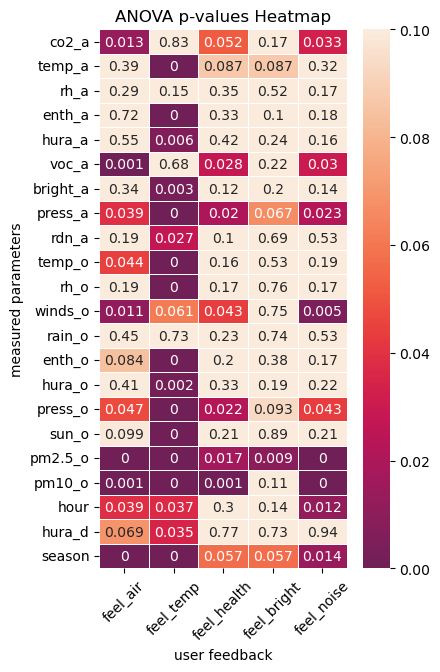

[[0.013 0.831 0.052 0.169 0.033]
 [0.393 0.    0.087 0.087 0.318]
 [0.291 0.153 0.346 0.516 0.173]
 [0.716 0.    0.334 0.1   0.181]
 [0.547 0.006 0.422 0.239 0.157]
 [0.001 0.681 0.028 0.224 0.03 ]
 [0.338 0.003 0.115 0.195 0.144]
 [0.039 0.    0.02  0.067 0.023]
 [0.187 0.027 0.103 0.692 0.531]
 [0.044 0.    0.157 0.531 0.19 ]
 [0.19  0.    0.175 0.756 0.173]
 [0.011 0.061 0.043 0.746 0.005]
 [0.453 0.73  0.231 0.744 0.525]
 [0.084 0.    0.205 0.382 0.171]
 [0.409 0.002 0.328 0.193 0.218]
 [0.047 0.    0.022 0.093 0.043]
 [0.099 0.    0.213 0.894 0.214]
 [0.    0.    0.017 0.009 0.   ]
 [0.001 0.    0.001 0.107 0.   ]
 [0.039 0.037 0.296 0.139 0.012]
 [0.069 0.035 0.77  0.734 0.939]
 [0.    0.    0.057 0.057 0.014]]


<Figure size 640x480 with 0 Axes>

In [53]:
print(input_data_main.count().mean())
# heatmap_pvalue_2cat(input_data_main, specific_questions_main, ieq_parameters, (5,6))
heatmap_pvalue_4cat(input_data_main, specific_questions_main, ieq_parameters, (4,7))

In [ ]:
replace_yes_no = {0:'No', 1:'Yes'}
heatmap_chitest_2cat(input_data_sub[specific_questions_sub], replace_yes_no, (4,3))

In [ ]:
# specific_questions =  is_col_air#['air_dust']#  #+ is_col_bright #+ is_col_temp + ['health_head'] # [combined2['room_id']!=class4]
# input_data2 = combined2.copy().dropna( subset=airthingsPlus+specific_questions, axis=0 ,how= 'any') #[combined2['room_id']== class4]
heatmap_pvalue_subquest(input_data_sub[specific_questions_sub+ieq_parameters], specific_questions_sub, ieq_parameters, (13,6))
# print(input_data2[specific_questions+ieq_parameters].count())

In [ ]:
def plot_feedback_histograph (data, class_number):
    answer_replace4 = {0:'dont know',2:'Best (2)' , 1:'Good (1)', -1:'bad (-1)', -2:'worst (-2)'}
    dataframe = data.copy()
    dataframe.loc[:,is_col_main] = dataframe.loc[:,is_col_main].replace(answer_replace4)

# Count occurrences of each value (1, 2, 3, 4) in each column
    value_counts = dataframe[dataframe['room_id']==class_number][is_col_main].apply(pd.Series.value_counts)

# Plotting the stacked bar chart
    value_counts.plot(kind='bar', stacked=True, figsize=(7, 4))

# Customize the plot
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.title('Stacked Column Plot of Value Counts')
    plt.legend(title='Columns')
    print(value_counts)

In [ ]:
 plot_feedback_histograph (combined2, class2)

# Visualization

In [ ]:
answer_replace4 = {0:'dont know',2:'Best (2)' , 1:'Good (1)', -1:'bad (-1)', -2:'worst (-2)'}
answer_replace2 = {0:'dont know',2:'Satisfied' , 1:'Satisfied', -1:'Dissatisf.', -2:'Dissatisf.'}
hue_4 = ['Best (2)' , 'Good (1)', 'bad (-1)', 'worst (-2)']
hue_2 = ['Satisfied','Dissatisf.']

def combined_plot (data_measured, data_questionnaire, class_number, col_ieq_measured, col_ieq_measured_unit , col_ieq_perception, hue_ordered_list, answer_replace):
# Create figure and primary axis
    fig, ax1 = plt.subplots(figsize=(9, 5))
    data_questionnaire = data_questionnaire.replace(answer_replace)
    # Plot df1 as a boxplot on ax1
    sns.histplot(data=data_questionnaire, multiple='fill', hue=col_ieq_perception , hue_order= hue_ordered_list ,x='date',kde=True, stat='percent', palette="light:#5A9", element= 'poly')   #
    plt.xticks( horizontalalignment='center',rotation=45)
    ax2 = ax1.twinx()

    # Plot df2 as a histplot on ax2
    sns.boxenplot(x=data_measured.index, y=col_ieq_measured,  data=data_measured , color= 'grey', width=0.25  , fill=True)
    
    plt.xticks( horizontalalignment='center',rotation=45)
    ax2.set_ylabel(col_ieq_measured + ' ' +col_ieq_measured_unit)

    # Set common x-axis label
    plt.xlabel('date')

    plt.xticks(  )
    plt.yticks()
    plt.title(col_ieq_perception + ' (%) & ' + col_ieq_measured + '| at room: ' + str(class_number))
    plt.show()

In [ ]:
combined2[room_col_name].info()

In [ ]:
perceived_data.replace(answer_replace2)

In [ ]:
measurement_plot = 'voc_a'
feeling_plot     = 'feel_air'
classroom_check  = class1
special_date =combined2[combined2[room_col_name]==str(classroom_check)]['date'].unique()
# ['2023-03-15', '2023-03-16', '2023-03-17', '2023-03-20',
#                 '2023-03-21', '2023-03-22', '2023-03-23', '2023-03-24',
#                 '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30',
#                 '2023-03-31', '2023-04-11', '2023-04-12', '2023-04-13',
#                 '2023-04-14']
measured_data  = combined1[airthingsDevice+['date']][combined1[room_col_name]==str(classroom_check)].set_index('date').loc[special_date] #[combined1[room_col_name]==class1]
perceived_data = combined2[is_col_main+['date']][combined2[room_col_name]==str(classroom_check)].set_index('date').loc[special_date] # [combined2[room_col_name]==class1]

combined_plot (measured_data, perceived_data, classroom_check, measurement_plot, '(ppb)', feeling_plot,hue_2, answer_replace2)   #['satisfied','Dissatisf.']

In [ ]:
measurement_plot = 'rh_a'
feeling_plot = 'feel_temp'
classroom_check = class3
special_date = combined2[combined2[room_col_name]==str(classroom_check)]['date'].unique()
# special_date = ['2023-03-22', '2023-03-24', '2023-03-28',  '2023-04-13', '2023-04-14', '2023-04-17', '2023-04-21']
# '2023-03-22', '2023-03-24', '2023-03-28',  '2023-04-13', '2023-04-14', '2023-04-17', '2023-04-21'
# ['2023-03-15', '2023-03-16', '2023-03-17', '2023-03-20',
#                 '2023-03-21', '2023-03-22', '2023-03-23', '2023-03-24',
#                 '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30',
#                 '2023-03-31', '2023-04-11', '2023-04-12', '2023-04-13',
#                 '2023-04-14']
measured_data = combined1[[measurement_plot]+['date']][combined1[room_col_name]==str(classroom_check)].set_index('date').loc[special_date] #[combined1[room_col_name]==class1]
perceived_data = combined2[[feeling_plot]+['date']][combined2[room_col_name]==str(classroom_check)].set_index('date').loc[special_date] # [combined2[room_col_name]==class1]

combined_plot (measured_data, perceived_data, classroom_check, measurement_plot, '(%)', feeling_plot,hue_2, answer_replace2)   #['satisfied','Dissatisf.']

In [ ]:
combined2.columns

## Preparation & Pre-processsing

In [ ]:
timestep_datavisual = '10min'

directory_path = platform_directory + '/' + folder_project + '/' + folder_ready + '/' + folder_year+ '/'  + school_name + '/' + folder_export
folder_path3 = directory_path + '/' + data_for1 + '/' # replace with the folder path
csv_files1 = [f for f in os.listdir(folder_path3) if f.endswith('.csv') and f.startswith( timestep_datavisual + '_1_')] # get list of csv files
dfs1 = [] # list to store dataframes

for file in csv_files1:
    file_path = os.path.join(folder_path3, file) # get full path of csv file
    df = pd.read_csv(file_path, delimiter=',') # read csv file into a dataframe
    dfs1.append(df) # append dataframe to list
combined3 = pd.concat(dfs1, ignore_index=True)

combined3 = combined3[combined3['date'].between(start_date,end_date)]
combined3['hura_d'] = combined3['hura_a'] - combined3['hura_o']
combined3['enth_d'] = combined3['enth_a'] - combined3['enth_o']

combined4 = combined3.copy()

time_interval = 10
hour_interval = time_interval/60

In [ ]:
combined3.describe()

In [ ]:
combined3['date'].unique()

In [ ]:
morning   = 'morning'
afternoon = 'afternoon'
#morning   = 'kl.07-10'
#afternoon = 'kl.10 - end'
combined3 = combined3[combined3['time']<'14:00']
combined3['time2'] = combined3[['hour']].applymap(lambda x: morning if x <= 9 else afternoon)
combined3['time2'].unique()

## Data - IAQ Performance

In [ ]:
def histo_graph(dataframe,column,column_label):
# Plotting the histogram
  min =  (dataframe[column].min()*0.9).astype(int)
  max =  (dataframe[column].max()*1.1).astype(int)
  #plt.hist(dataframe[column], edgecolor='black', alpha=0.7)
  plt.hist(dataframe[column], bins=(np.arange(min,max, step=(max-min)/20)), edgecolor='black', alpha=0.7)
  plt.xlabel(column_label)
  plt.ylabel('Frequency')
  plt.title(column +' Histogram: All Rooms', size=10)
  #plt.xticks(range(18, 28))  # Set x-ticks to match the temperature range
  #plt.xticks(np.arange(min,max, step=(max-min)/12))
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()

def histo_graph_class(dataframe,column,column_label,class_number):
# Plotting the histogram
  min =  (dataframe[column].min()*0.9).astype(int)
  max =  (dataframe[column].max()*1.1).astype(int)
  #plt.hist(dataframe[column], edgecolor='black', alpha=0.7)
  plt.figure(figsize=(3, 2))
  plt.hist(dataframe[column], bins=(np.arange(min,max, step=(max-min)/20)), edgecolor='black', alpha=0.7)
  plt.xlabel(column_label)
  plt.ylabel('Frequency')
  plt.title(column +' Histogram: Classroom ' + str(class_number), size=11)
  #plt.xticks(range(18, 28))  # Set x-ticks to match the temperature range
  #plt.xticks(np.arange(min,max, step=(max-min)/12))
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()



In [ ]:
#ieq_describe = ieq_parameters.copy()
ieq_describe = [ #'temp_v',# 'temp_f' ,
                # 'temp_s',#'co2_v',
                 #'vent_v',
                   'temp_a'  #, 'sound_a'
                   #,'bright_a'
                  ,'co2_a','rh_a', 'voc_a' , 'rdn_a'
                  , 'enth_a', 'hura_a',
                  'temp_o', 'rh_o','enth_o', 'hura_o', 'winds_o', 'rain_o'
                  #,'pm25_a','pm1_a'
                  #,'pm2.5_o','pm10_o'
                  ,'hura_d'#,'enth_d'
                  ]
print(ieq_describe)
combined1[combined1['room_id']!=class4][ieq_describe].describe().round(2)
#combined3[['temp_v','rh_a','co2_a','voc_a']].describe().round(2)

In [ ]:
class_number = class1
dataset_plot = combined1[(combined1['room_id']==class_number) & (combined1['hour']>=start_hour) & (combined1['hour']<=end_hour) ]

#histo_graph(dataset_plot[(dataset_plot['hour']>=start_hour) & (dataset_plot['hour'] <= end_hour) ], 'temp_v', temp_v_label) #/hour_interval
#histo_graph(dataset_plot[(dataset_plot['hour']>=start_hour) & (dataset_plot['hour'] <= end_hour) ], 'temp_f', temp_f_label)
# histo_graph_class(dataset_plot, 'vent_v', vent_v_label, class_number)
# histo_graph_class(dataset_plot, 'pm1_a', pm1_a_label, class_number)
# histo_graph_class(dataset_plot, 'pm25_a', pm25_a_label, class_number)
histo_graph_class(dataset_plot, 'co2_a', co2_a_label, class_number)
histo_graph_class(dataset_plot, 'voc_a', voc_a_label, class_number)
histo_graph_class(dataset_plot, 'enth_a', enth_a_label, class_number)
histo_graph_class(dataset_plot, 'rh_a', rh_a_label, class_number)
histo_graph_class(dataset_plot, 'temp_a', temp_a_label, class_number)
histo_graph_class(dataset_plot, 'temp_v', temp_v_label, class_number)
histo_graph_class(dataset_plot, 'hura_a', hura_a_label, class_number)
histo_graph_class(dataset_plot, 'sound_a', sound_a_label, class_number)

#histo_graph(dataset_plot[(dataset_plot['hour']>=start_hour) & (dataset_plot['hour'] <= end_hour) ], 'sound_a', sound_a_label)
histo_graph(dataset_plot[(dataset_plot['hour']>=start_hour) & (dataset_plot['hour'] <= end_hour) ], 'bright_a', bright_a_label)
histo_graph(dataset_plot[(dataset_plot['hour']>=start_hour) & (dataset_plot['hour'] <= end_hour) ], 'rh_o',rh_o_label)

### Pie-Chart

In [ ]:
resuming_df= combined3.groupby(['time2'])[response_counting].sum()

# Custom colors for the pie chart segments
plt.figure(figsize=(4, 4))
plt.pie(resuming_df, labels=resuming_df.index, autopct='%1.1f%%', startangle=140, colors= custom_colors, )
plt.title(school_name + '_'+response_counting)
plt.legend( )
print('total cleaned '+ str(response_counting)+': '  + str(resuming_df.sum().round(0)))

In [ ]:
# pie_plot_feel (combined2, 'feel_air' )
# pie_plot_feel (combined2, 'feel_bright' )
pie_plot_feel_class (combined2, 'feel_temp', class2   )
pie_plot_feel_class (combined2, 'feel_air',class2  )
pie_plot_feel_class (combined2, 'feel_health', class2  )
pie_plot_feel_class (combined2, 'feel_bright', class3 )
pie_plot_feel_class (combined2, 'feel_noise', class2 )

### Boxplot & Graph

In [ ]:
what_measure = "TEMP : airthings and schneider "
print(what_measure + 'CV : '+str((explained_variance_score(combined3['temp_a'],combined3['temp_v']))))
print(what_measure + 'R2 : '   +str(r2_score(combined3['temp_a'],combined3['temp_v'])))

In [ ]:
what_measure = "CO2 : airthings and schneider "
print(what_measure + 'CV : '+str((explained_variance_score(combined3['co2_a'],combined3['co2_v']))))
print(what_measure + 'R2 : '   +str(r2_score(combined3['co2_a'],combined3['co2_v'])))

In [ ]:
combined3[airthingsPlus+weather_oslo].describe()

In [ ]:
what_co2 = 'co2_a'
what_temp = 'temp_a'
co2_limit1 = 1000

temp_limit2 = 20.5
temp_limit3 = 21.5
setpoint = combined3['temp_s']
temp_limit2 = setpoint- 1
temp_limit3 = setpoint+ 1

voc_limit1 = 220
sound_limit1 = 50

rh_limit1 = 30
rh_limit2 = 60

pm1_limit = 8
pm25_limit = 15

In [ ]:
combined3['date'].unique()

In [ ]:
dataset_come['room_id'].unique()

In [ ]:
dataset_come = combined3#[combined3['room_id']!=class4]
resume = pd.DataFrame(dataset_come['room_id'])
a = ((dataset_come[what_co2] <= co2_limit1)).astype(int)
b = ((dataset_come[what_co2] > co2_limit1)).astype(int)
resume['co2_<'] = (a/ (a+b))
resume['co2_>'] = (b/ (a+b))

a = ((dataset_come[what_temp] <= temp_limit2)).astype(int)
b = ((dataset_come[what_temp] >= temp_limit2) & (dataset_come[what_temp] < temp_limit3)).astype(int)
c = ((dataset_come[what_temp] > temp_limit3)).astype(int)
resume['temp_<'] = a / (a+b+c)
resume['temp_='] = b / (a+b+c)
resume['temp_>'] = c / (a+b+c)

a = ((dataset_come['voc_a'] <= voc_limit1)).astype(int)
b = ((dataset_come['voc_a'] > voc_limit1)).astype(int)
resume['voc_<'] = a / (a+b)
resume['voc_>'] = b / (a+b)

a = ((dataset_come['rh_a'] <= rh_limit1)).astype(int)
b = ((dataset_come['rh_a'] >= rh_limit1) & (dataset_come['rh_a'] < rh_limit2)).astype(int)
c = ((dataset_come['rh_a'] > rh_limit2)).astype(int)
resume['rh_<'] = a / (a+b+c)
resume['rh_='] = b / (a+b+c)
resume['rh_>'] = c / (a+b+c)



In [ ]:
a = ((dataset_come['pm1_a'] <= pm1_limit)).astype(int)
b = ((dataset_come['pm1_a'] > pm1_limit)).astype(int)
resume['pm1_<'] = a / (a+b)
resume['pm1_>'] = b / (a+b)
a = ((dataset_come['pm25_a'] <= pm25_limit)).astype(int)
b = ((dataset_come['pm25_a'] > pm25_limit)).astype(int)
resume['pm2.5_<'] = a / (a+b)
resume['pm2.5_>'] = b / (a+b)

a = ((dataset_come['sound_a'] <= sound_limit1)).astype(int)
b = ((dataset_come['sound_a'] > sound_limit1)).astype(int)
resume['sound_<'] = a / (a+b)
resume['sound_>'] = b / (a+b)

In [ ]:
resume['date'] = dataset_come['date']
resume['time'] = dataset_come['time']
resume[room_col_name] = dataset_come[room_col_name]

resume['datetime'] = pd.to_datetime((dataset_come['date'] + ' ' + dataset_come['time']), format='%Y-%m-%d %H:%M:%S')
resume.set_index('datetime', inplace=True)
resume .head(5)

In [ ]:
# room1 = resume[resume[room_col_name] == np.array(class1).astype(str)].iloc[:,1:-2]  #*hour_interval
room2 = resume[resume[room_col_name] == np.array(class2).astype(int)].iloc[:,1:-2]  #*hour_interval
room3 = resume[resume[room_col_name] == np.array(class3).astype(int)].iloc[:,1:-2]  #*hour_interval
# room4 = resume[resume[room_col_name] == np.array(class4).astype(str)].iloc[:,1:-2]  #*hour_interval
result_sum = pd.DataFrame(np.array([#room1.sum()
                                    room2.sum()
                                    ,room3.sum()
                                    # ,room4.sum()
                                     ]),columns=room2.columns, index=[#class1,
                                                                      class2,class3
                                                                      #,class4
                                                                     ])   *hour_interval
room1.iloc[:,1:8].sum()
result_sum
#result is as hours

In [ ]:
combined4.describe()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x_col = 'temp_o'
y_col = 'rd_temp'
z_col = 'temp_a'

# For each set of style and range settings, plot n random points in the box
xs = combined3[x_col]
ys = combined3[y_col]
zs = combined3[z_col]
ax.scatter(xs, ys, zs )

ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x_col = 'co2_a'
y_col = 'pm25_a'
z_col = 'feel_air'

# For each set of style and range settings, plot n random points in the box
xs = combined3[x_col]
ys = combined3[y_col]
zs = combined3[z_col]
ax.scatter(xs, ys, zs)

ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x_col = 'pm25_o'
y_col = 'pm25_a'
z_col = 'feel_health'

# For each set of style and range settings, plot n random points in the box
xs = combined4[x_col]
ys = combined4[y_col]
zs = combined4[z_col]
ax.scatter(xs, ys, zs)

ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)

## Threshold

In [ ]:
def threshold_calculator_linear (df, column_check, new_column, threshold_number, duration):
    df[new_column] = np.where(df[column_check] > threshold_number, duration, 0)
def threshold_calculator_parabolic (df, column_check, new_column, lower_limit, higher_limit, duration):
    df[new_column] = np.where((df[column_check] > higher_limit) | (df[column_check] < lower_limit), duration, 0)

In [ ]:
timestep = 5/60
# threshold_calculator_linear (measured_resampled, 'S42_pm2.5', 'pm2.5_>', 1,timestep)
# threshold_calculator_parabolic (measured_resampled, 'S25_temp', 'temp_>', 21,23,timestep)
threshold_calculator_linear (combined1, 'voc_a', 'limit_voc', 220,timestep)
threshold_calculator_linear (combined1, 'co2_a', 'limit_co2', 1000,timestep)
threshold_calculator_parabolic (combined1, 'temp_a', 'limit_temp', 21,23,timestep)
threshold_calculator_parabolic (combined1, 'rh_a', 'limit_rh', 30,60,timestep)
threshold_calculator_parabolic (combined1, 'enth_a', 'limit_enth', 32.85,55.45,timestep)
threshold_calculator_linear (combined1, 'bright_a', 'limit_bright', 50,timestep)
threshold_calculator_linear (combined1, 'hura_a', 'limit_hura', 5,timestep)

In [ ]:
#except_date3 = ['2023-11-19', '2023-11-25', '2023-11-26']
combined1['datetime'] = pd.to_datetime(combined1['datetime'] )
input_data = combined1.copy() [combined1['room_id']!=class4]
input_data['fd_air']    = (input_data['feel_air4'] + input_data['feel_air3'])/input_data['students']
input_data['fd_temp']   = (input_data['feel_temp4'] + input_data['feel_temp3'])/input_data['students']
input_data['fd_health']    = (input_data['feel_health4'] + input_data['feel_health3'])/input_data['students']
input_data['fd_bright']   = (input_data['feel_bright4'] + input_data['feel_bright3'])/input_data['students']
input_data['fd_noise']    = (input_data['feel_noise4'] + input_data['feel_noise3'])/input_data['students']

desired_perception = ['fd_temp', 'fd_air','fd_health', 'fd_bright', 'fd_noise']   #'fd_health', 'fd_bright', 'fd_noise'
desired_threshold = ['limit_voc', 'limit_co2', 'limit_temp', 'limit_enth','limit_rh']
threshold_data = pd.pivot_table(input_data, values=desired_threshold+desired_perception, index=['date', 'room_id'], aggfunc='sum').round(2)
threshold_data = threshold_data.loc[threshold_data['fd_temp'] != 0]


In [ ]:
sns.scatterplot(threshold_data, x= 'limit_voc', y='fd_air', hue = 'room_id')

In [ ]:
sns.scatterplot(threshold_data, x= 'limit_temp', y='fd_temp', hue = 'room_id')


In [ ]:
heatmap_corrvalue(threshold_data.loc[threshold_data['fd_temp'] != 0], 'pearson', 'threshold vs. dissatisfaction')

## Correlation Map

In [ ]:
#Heatmap Correlation
#call the DataFrame
#corr = combined.iloc[:,:20].corr().round(2)
# corr = combined3[combined3['time']== afternoon].loc[:,is_col_main + pd_col + interpolate_col].drop([ 'temp_s','rain_o','feel_noise'], axis=1).corr()#.round(2)   #, 'feel_bright'
corr = combined_pivot_mean[input_variables + ['rd_air', 'rd_temp']].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 10})     #cmap= 'coolwarm'   
plt.xticks(rotation=45, fontsize=12)

plt.title('I '+time_series_resample+'ourly Data : Correlation', fontsize=15)
plt.yticks(fontsize=12,rotation=45 )

In [ ]:
#Heatmap Correlation
#call the DataFrame
#corr = combined.iloc[:,:20].corr().round(2)
corr = combined1[weather_volda+airthingsPro].drop([ 'ppd', 'pmv'], axis=1).corr().round(2)   #, 'feel_bright'

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,
            cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 10})
plt.xticks(rotation=90, fontsize=12)

plt.title(#'I '+time_series_resample+ 'ourly
          'Data : Correlation', fontsize=15)
plt.yticks(fontsize=12,rotation=0 )

In [ ]:
combined2[airthingsDevice+is_col_subquestion].describe()

# ML

In [22]:
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn import metrics, tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn import svm
from sklearn.inspection import permutation_importance
from sklearn import neighbors, datasets
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesClassifier,StackingRegressor, ExtraTreesRegressor, AdaBoostClassifier, AdaBoostRegressor , GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import make_regression
import xgboost as xg
from xgboost.sklearn import XGBClassifier, XGBRegressor
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.gaussian_process import GaussianProcessRegressor, GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, SMOTEN
import joblib
from joblib import load, dump
import shap

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

In [23]:
def conf_matrix_ML(y_test,y_test_pred, model_ML, name_of_MLalgorithm ):
    cm_rf = confusion_matrix(y_test,y_test_pred, labels = model_ML.classes_, )
    disp  = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model_ML.classes_)
    plt.figure(figsize= (2,2))
    disp.plot()
    plt.title('Confussion Matrix : '+str(name_of_MLalgorithm))
    plt.show()

def ML_optimization_process (find_optimum, ML_optimum, x_train, y_train, x_test,y_test):
  print("Optimum Value : {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(ML_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(ML_optimum.score(x_test, y_test)))
  print("__")
  
def ML_NN_optimization_process (find_optimum1, find_optimum2, ML_optimum, x_train, y_train, x_test,y_test):
  print("Optimum Value : {}".format([find_optimum1,find_optimum2]))
  print("Accuracy score (training): {:.3f}".format(ML_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(ML_optimum.score(x_test, y_test)))
  print("__")

def ML_grid_result (grid_search, ML_optimum, x_train, y_train, x_test,y_test):
  print("Best parameters: ", grid_search.best_params_)
  print("Best score: ", grid_search.best_score_.round(3))
  print("Accuracy score (training): {:.3f}".format(ML_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(ML_optimum.score(x_test, y_test)))
  
def pareto_histograph(df):

    # Calculate cumulative sum for each column
    df_cumsum = df.cumsum()

    # Plot
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    # Plot bar histograms
    df.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'], alpha=0.7, width=0.4, position=1)
    ax1.set_ylabel('Value')

    # Plot cumulative lines
    df_cumsum.plot(kind='line', ax=ax2, marker='o', color=['blue', 'red'], linestyle='-', linewidth=2)

    # Add legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Add labels and title
    ax2.set_ylabel('Cumulative Sum')
    plt.title('Bar Histograms and Cumulative Lines')
    # Show plot
    plt.show()

## Data Criteria

In [24]:
response_rate_min = 0.25

In [37]:
# REGRESSION
target_col   =    ['rd_health'] 
focus_plot = 'co2_a'
scene_what = 'C'
ML_category = 'regression'
school_train = 'brannfjell'
batch_selector = 'afternoon'
time_after = '06:00'
input_variables = [  #'temp_v', #'temp_f' , 'temp_s','co2_v'
                   #'vent_v',
                        'temp_a',
                        # 'bright_a' ,  #'sound_a',
                        'rh_a',
                        'co2_a',
                        # 'voc_a' ,
                        # 'rdn_a',
                        'press_a',
                        'enth_a',
                       'hura_a',
                       'temp_o',
                       'enth_o',
                       'press_o',
                       'rh_o',
                      #  'rain_o',
                       'hura_o',# 'winds_o',
                        #'floor_first',
                        # 'hour',
                      # 'pm25_a','pm1_a',
                    # 'pm2.5_o',  
                    'sun_o',
                    # 'pm10_o',
                  'moment',
                    # 'hura_d'
                    
                  ] #'bright_a', 'rdn_a', 'temp_v','rh_o', 'winds_o',
# input_variables = ['feel_temp', 'feel_air', 'feel_bright', 'feel_noise']
input_variables = ['rd_temp', 'rd_air', 'rd_bright', 'rd_noise']
 

rename_func = lambda col: col + '_ave' if col.endswith('_a') or col.endswith('_o') else col
input_variables

['rd_temp', 'rd_air', 'rd_bright', 'rd_noise']

In [ ]:
# REGRESSION

is_col_target = is_main_rd.copy()

target_col   =  ['rd_temp']    #is_col_target
focus_plot = 'co2_a'
scene_what = 'C'
batch_selector = 'afternoon'
time_after = '06:00'
input_variables = airthingsSmall + weather_volda + [ 'hura_d','moment'
                                                   # ,'floor_first'
                                                    ]
input_variables

In [ ]:
# CLASSIFICATION
is_col_target = is_col_subquestion.copy()
is_col_target.remove('temp_coldhot')

ML_category = 'classification'
target_col   = is_col_target
what_estimate = 'subsquestion'

time_after = '06:00'
input_variables = airthingsDevice + weather_data #+ [ 'hour']  #'floor_first','hura_d',
# input_variables.remove('pmv')
# input_variables.remove( 'ppd')
# input_variables.remove( 'rdn_a')
input_variables.remove( 'winds_o')
input_variables

In [ ]:
# CLASSIFICATION

target_col   = 'feel_air'
what_estimate = ['feel_air']

ML_category = 'classification'
time_after = '06:00'
input_variables = airthingsPlus + weather_oslo #+ [ 'hour']  #'floor_first','hura_d',
input_variables.remove('pmv')
input_variables.remove( 'ppd')
input_variables.remove( 'rdn_a')
input_variables = ieq_parameters
# input_variables.remove( 'winds_o')
input_variables

In [310]:
target_col   = 'feel_air'
focus_plot = 'temp_a'
time_after = '06:00'
input_variables = ['feel_temp','feel_air', 'feel_noise', 'feel_bright'
                  ]

In [185]:
folder_ML = 'ML'
directory_path = platform_directory + '/' + folder_project + '/' + folder_ready + '/'+ folder_year + '/' + school_name + '/' + folder_export
folder_model = survey_resample + '_' + school_train + '_'+ folder_year + '_'
ML_directory = directory_path + '/'+ folder_ML + '/' + ML_category + '/' + folder_model + "".join(map(str, target_col)) #+ '_'  #+scene_what

todays_date = '_20240805'
ML_directory

'C:/Users/azimilga/project/data-ready/all years/all schools/export/ML/regression/10min_brannfjell_all years_rd_health'

## Data Splitting - Regression

In [28]:
variable_scale = MinMaxScaler() #StandardScaler()
variable_scale2 = MinMaxScaler()
train_percent = 85

In [152]:
index_of_data_ML = ['date', 'school_id','room_id'  ,'batch','response_rate' ]
data_to_ML = combined_pivot_mean_percent 
data_ML= data_to_ML[
   (data_to_ML['response_rate']>=response_rate_min) & (data_to_ML['response_rate']<=1.5)
                                #  & (data_to_ML['batch']==batch_selector)
                                    & (data_to_ML['school_id']=='brannfjell')
                                    & (data_to_ML['batch']!='skip')
                                  # & (data_to_ML['floor_first']==1)
                                ][index_of_data_ML + input_variables +target_col].dropna()
data_ML_R = data_ML.drop(index_of_data_ML  , axis=1)
# data_ML_R = data_ML_R[data_ML_R['temp_coldhot']!=0]
data_ML_R .isna().sum()#.value_counts()  #COUNT NAN VALUES  or NAN CHECKER
print(data_ML['room_id'].count())
print(data_ML['room_id'].isna().sum())
print(data_ML['batch'].value_counts())
print(data_ML_R.count().mean())
# heatmap_corrvalue(data_ML_R, 'pearson', (8,6), 'Q75', 8)

29
0
morning      24
afternoon     5
Name: batch, dtype: int64
29.0


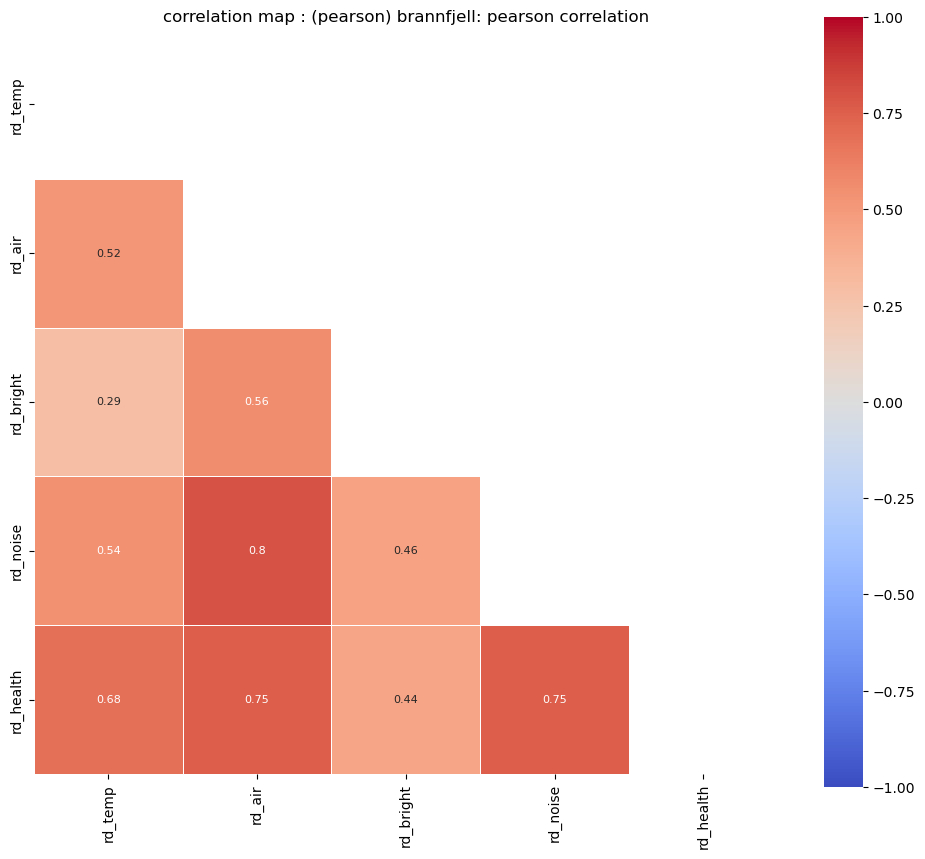

In [153]:
heatmap_corrvalue( data_ML_R, 'pearson', (12,10), 'brannfjell: pearson correlation', 10)

In [154]:
data_input = data_ML_R.copy().sort_values(target_col)#.reset_index(drop=True)   #.dropna(subset='temp_a', how='all').copy()#.dropna(subset=[target_col], axis = 0, inplace=True )
# data_input = data_ML.copy() .sort_values(target_col)   .dropna(subset=['temp_a'], how='all')
#xb = data_input.loc[:, ['swc_f', 'swc_r', 'temp_v', 'temp_f', 'co2_a', 'temp_a', 'rh_a','voc_a', 'bright_a', 'temp_o', 'rh_o', 'winds_o']] #Predictor
xb  = data_input.drop(target_col, axis=1).copy() #.drop(columns=['temp_f', 'pm25_a', 'pm1_a'] ) #.loc[:, ['temp_v', 'co2_a', 'temp_a', 'rh_a','voc_a', 'bright_a', 'temp_o', 'rh_o', 'winds_o']] #Predictor
x   = variable_scale.fit_transform(xb)  #xb.copy() #
yb  = data_input.loc[:, target_col] #Label
print("target " + str(target_col))
print("total input variables: ", xb.shape[1])
print( "isnan value check, ",  xb.isna().sum())
# print(data_input.columns)

target ['rd_health']
total input variables:  4
isnan value check,  rd_temp      0
rd_air       0
rd_bright    0
rd_noise     0
dtype: int64


In [157]:
# TRAIN TEST SPLIT _  XGB
x_train, x_test, y_train, y_test = train_test_split(xb, yb, train_size = (train_percent/100), 
                                                    shuffle = True)

test_XGBR = XGBRegressor()
test_XGBR.fit(x_train, y_train)

print(test_XGBR.score(x_train, y_train).round(5))
print(test_XGBR.score(x_test, y_test).round(5))

0.99998
0.91328


In [306]:
# TRAIN TEST SPLIT _  DecisionTree
x_train, x_test, y_train, y_test = train_test_split(x, yb, train_size = (train_percent/100), 
                                                    shuffle = True, random_state=10)

DTR_reg = DecisionTreeRegressor()
DTR_reg.fit(x_train, y_train)

y_train_pred_LinReg = DTR_reg.predict(x_train)#.reshape(1,-1)
y_test_pred_LinReg = DTR_reg.predict(x_test)#.reshape(1,-1)
print(DTR_reg.score(x_train, y_train))
print(DTR_reg.score(x_test, y_test))


1.0
-2.638495857650219


In [865]:
# TRAIN TEST SPLIT _  RandomForest
x_train, x_test, y_train, y_test = train_test_split(xb, yb, train_size = (train_percent/100), 
                                                    shuffle = True)

Test_reg = RandomForestRegressor()
Test_reg.fit(x_train, y_train)

y_train_pred = Test_reg.predict(x_train)#.reshape(1,-1)
y_test_pred = Test_reg.predict(x_test)#.reshape(1,-1)
print(Test_reg.score(x_train, y_train))
print(Test_reg.score(x_test, y_test))


0.8381746155991641
-0.04644338808282633


In [147]:
# TRAIN TEST SPLIT
x_train, x_test, y_train, y_test = train_test_split(xb, yb, train_size = (train_percent/100), 
                                                    shuffle = True    )

Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)

# print(Lin_reg.coef_)
print("Linear ", Lin_reg.score(x_train, y_train).round(4))


DT_reg = DecisionTreeRegressor()
DT_reg.fit(x_train, y_train)

print("DTR    ", DT_reg.score(x_train, y_train).round(4))


RF_reg = RandomForestRegressor()
RF_reg.fit(x_train, y_train)

print("RFR    ", RF_reg.score(x_train, y_train).round(4))


XG_reg = XGBRegressor()
XG_reg.fit(x_train, y_train)

print("XGB    ", XG_reg.score(x_train, y_train).round(4))
print("Test ")
print("Linear ", Lin_reg.score(x_test, y_test).round(4))
print("DTR    ", DT_reg.score(x_test, y_test).round(4))
print("RFR    ", RF_reg.score(x_test, y_test).round(4))
print("XGB    ", XG_reg.score(x_test, y_test).round(4))



Linear  0.5169
DTR     1.0
RFR     0.9093
XGB     1.0
Test 
Linear  0.8174
DTR     0.7901
RFR     0.9567
XGB     0.8721


In [713]:
xb.columns

Index(['temp_a', 'rh_a', 'co2_a', 'press_a', 'enth_a', 'hura_a', 'temp_o',
       'enth_o', 'press_o', 'rh_o', 'hura_o', 'sun_o'],
      dtype='object')

In [728]:
print(Lin_reg2.intercept_)

[-0.17481818]


In [159]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(xb)

from sklearn.decomposition import PCA

pca = PCA(n_components=x_scaled.shape[1])
x_pca = pca.fit_transform(x_scaled)

from sklearn.linear_model import LinearRegression

model_pca = LinearRegression()
model_pca.fit(x_pca, yb)

y_pred_pca = model_pca.predict(x_pca)

pca_var_ratio = pd.DataFrame( { "ratio" : pca.explained_variance_ratio_.round(5) , "cum_ratio" : np.cumsum(pca.explained_variance_ratio_)})
pca_regression = pd.DataFrame( { "y_pred_pca" : y_pred_pca.flatten().round(5) , "yb" : yb.values.flatten()})

number_of_columns=xb.shape[1]
# Perform PCA
pca = PCA(n_components=number_of_columns)
principal_components = pca.fit_transform(x_scaled)
# x_pca_columns=[f'PC{i}' for i in range(1, number_of_columns + 1)] 
x_pca_columns=xb.columns
# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=x_pca_columns )


0.711561900998035


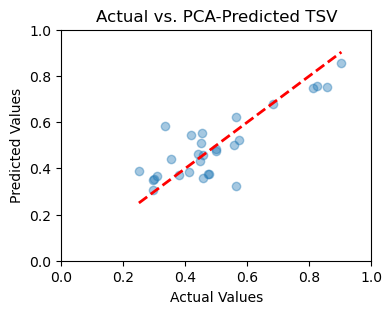

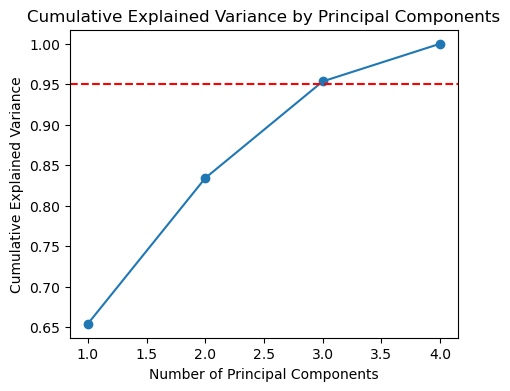

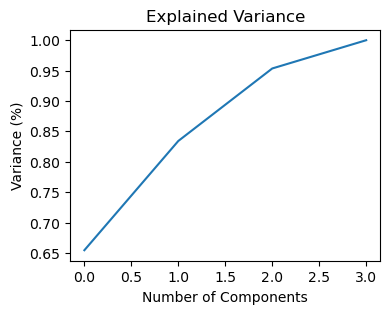

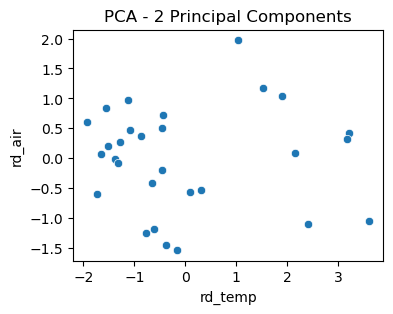

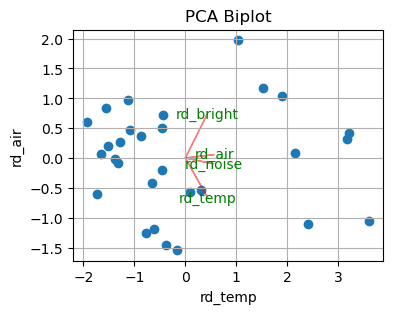

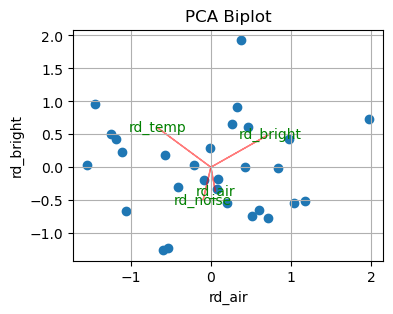

In [160]:
print(r2_score(yb, y_pred_pca))
plt.figure(figsize=(4, 3))
plt.scatter(yb, y_pred_pca, alpha=0.4)
plt.plot([yb.min(), yb.max()], [yb.min(), yb.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xticks(np.arange(0,1.1,0.2))
plt.yticks(np.arange(0,1.1,0.2))
plt.title('Actual vs. PCA-Predicted TSV')
plt.show()


# variance plot
plt.figure(figsize=(5, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

# Scree Plot
plt.figure(figsize=(4, 3))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

# 2D Scatter Plot
plt.figure(figsize=(4, 3))
sns.scatterplot(x=xb.columns[0], y=xb.columns[1], data=pc_df)
plt.title('PCA - 2 Principal Components')
plt.show()

# Biplot
plt.figure(figsize=(4, 3))
plt.scatter(pc_df[xb.columns[0]], pc_df[xb.columns[1]])
for i, column in enumerate(xb.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i], pca.components_[1, i], column, color='g', ha='center', va='center')
plt.xlabel(xb.columns[0])
plt.ylabel(xb.columns[1])
plt.title('PCA Biplot')
plt.grid()
plt.show()

# Biplot
plt.figure(figsize=(4, 3))
plt.scatter(pc_df[xb.columns[1]], pc_df[xb.columns[2]])
for i, column in enumerate(xb.columns):
    plt.arrow(0, 0, pca.components_[1, i], pca.components_[2, i], color='r', alpha=0.5)
    plt.text(pca.components_[1, i], pca.components_[2, i], column, color='g', ha='center', va='center')
plt.xlabel(xb.columns[1])
plt.ylabel(xb.columns[2])
plt.title('PCA Biplot')
plt.grid()
plt.show()

# # Biplot
# plt.figure(figsize=(4, 3))
# plt.scatter(pc_df['PC2'], pc_df['PC3'])
# for i, column in enumerate(xb.columns):
#     plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
#     plt.text(pca.components_[0, i], pca.components_[1, i], column, color='g', ha='center', va='center')
# plt.xlabel('PC2')
# plt.ylabel('PC3')
# plt.title('PCA Biplot')
# plt.grid()
# plt.show()

# # Biplot
# plt.figure(figsize=(4, 3))
# plt.scatter(pc_df['PC3'], pc_df['PC4'])
# for i, column in enumerate(xb.columns):
#     plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
#     plt.text(pca.components_[0, i], pca.components_[1, i], column, color='g', ha='center', va='center')
# plt.xlabel('PC3')
# plt.ylabel('PC4')
# plt.title('PCA Biplot')
# plt.grid()
# plt.show()

# # Biplot
# plt.figure(figsize=(4, 3))
# plt.scatter(pc_df['PC1'], pc_df['PC4'])
# for i, column in enumerate(xb.columns):
#     plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
#     plt.text(pca.components_[0, i], pca.components_[1, i], column, color='g', ha='center', va='center')
# plt.xlabel('PC1')
# plt.ylabel('PC4')
# plt.title('PCA Biplot')
# plt.grid()
# plt.show()

# # Biplot
# plt.figure(figsize=(4, 3))
# plt.scatter(pc_df['PC5'], pc_df['PC9'])
# for i, column in enumerate(xb.columns):
#     plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
#     plt.text(pca.components_[0, i], pca.components_[1, i], column, color='g', ha='center', va='center')
# plt.xlabel('PC5')
# plt.ylabel('PC9')
# plt.title('PCA Biplot')
# plt.grid()
# plt.show()


## Data Splitting - classification

In [176]:
variable_scale  = MinMaxScaler() #StandardScaler()
variable_scale2 = MinMaxScaler()
train_percent   = 85

In [177]:
index_of_data_ML = [ 'school_id','room_id'  ,'batch', 'moment']
combined2['moment'] = combined2.apply(determine_batch_to_moment, axis=1)
data_ML = combined2[combined2['time']>=time_after][index_of_data_ML + input_variables+[target_col]]#.dropna()#[combined2[room_col_name]!=class4]#[combined2[room_col_name]!=class4]#[combined2[target_col].between(-2,2)][combined2[focus_plot]>=0].copy()#.loc[:, interpolate_col + is_col_main]#.drop(['ppd', 'pmv'], axis=1) .dropna()  #,'temp_s','rain_o','rh_o', #[combined2['time']>time_after]
data_ML[target_col] = data_ML[target_col].fillna(0)
data_ML = data_ML[data_ML['school_id']=='brannfjell']
# data_ML = data_ML[data_ML['room_id']==str(23)]
# index_of_data_ML.remove('hura_d')
# index_of_data_ML.remove('hour')
# index_of_data_ML.remove('moment')
data_ML_C = data_ML.drop (index_of_data_ML, axis=1).dropna()
print(data_ML_C .isna().sum())#.value_counts()  #COUNT NAN VALUES  or NAN CHECKER
print(data_ML_C[target_col].count())

co2_a       0
temp_a      0
rh_a        0
enth_a      0
hura_a      0
voc_a       0
bright_a    0
press_a     0
rdn_a       0
temp_o      0
rh_o        0
winds_o     0
rain_o      0
enth_o      0
hura_o      0
press_o     0
sun_o       0
pm2.5_o     0
pm10_o      0
feel_air    0
dtype: int64
954


In [178]:
data_input = data_ML_C #.dropna(subset='temp_a', how='all').copy()#.dropna(subset=[target_col], axis = 0, inplace=True )
# data_input = data_ML.copy() .sort_values([target_col])   .dropna(subset=['temp_a'], how='all')
#xb = data_input.loc[:, ['swc_f', 'swc_r', 'temp_v', 'temp_f', 'co2_a', 'temp_a', 'rh_a','voc_a', 'bright_a', 'temp_o', 'rh_o', 'winds_o']] #Predictor
xb  = data_input.drop(target_col, axis=1).copy() #.drop(columns=['temp_f', 'pm25_a', 'pm1_a'] ) #.loc[:, ['temp_v', 'co2_a', 'temp_a', 'rh_a','voc_a', 'bright_a', 'temp_o', 'rh_o', 'winds_o']] #Predictor
x   = variable_scale.fit_transform(xb)  #xb.copy() #
yb  = data_input.loc[:, target_col] #Label
xb.isna().sum()

answer_replace01   = {0:0,-1:1, -2:1, 1:0, 2:0}
answer_replace012  = {0:0,-1:1, -2:2, 1:0, 2:0}
answer_replace0123 = {0:0,-1:2, -2:3, 1:1, 2:0}
y = np.array(yb.copy() .replace(answer_replace01)).flatten()
# y = variable_scale2.fit_transform(y)

In [179]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = (train_percent/100), shuffle = True)
#x_train = pd.DataFrame(x_train,  columns = xb.columns)

print("Before oversampling train: ", Counter(y_train))
print("Before oversamplig test: ", Counter(y_test))


Before oversampling train:  Counter({0: 444, 1: 366})
Before oversamplig test:  Counter({0: 76, 1: 68})


In [180]:
# define oversampling  strategy
oversample_over = SMOTE(sampling_strategy='all')
# fit and apply the transform
x_new, y_new = oversample_over.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, train_size = (train_percent/100), shuffle = True)
print("After oversampling train: ", Counter(y_train ))
print("After oversampling test: " , Counter(y_test ))

After oversampling train:  Counter({0: 446, 1: 438})
After oversampling test:  Counter({1: 82, 0: 74})


In [161]:
# Check the number of unique classes in the target variable
def PCA_LDA_plotter (x_input, y_input):
    num_classes = len(np.unique(y_input))

    # Check the number of features in the dataset
    num_features = x_input.shape[1]

    # If either number of classes or number of features is less than or equal to 1, print an error message
    if num_classes <= 1 or num_features <= 1:
        print("Error: Insufficient data for LDA.")
    else:
        # Standardize the features
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(x_input)

        # Perform PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)

        # Perform LDA with the maximum number of components allowed
        n_components_lda = min(X_scaled.shape[1], len(np.unique(y_input)) - 1)
        lda = LinearDiscriminantAnalysis(n_components=n_components_lda)
        X_lda = lda.fit_transform(X_scaled, y_input)

        # Plot PCA results
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_input, cmap='viridis')
        plt.title('PCA')
        plt.xlabel('Principal Component 1')
        plt.legend()
        plt.ylabel('Principal Component 2')

        # Plot LDA results
        plt.subplot(1, 2, 2)
        if n_components_lda > 1:
            plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_input, cmap='viridis')
            plt.title('LDA')
            plt.xlabel('Linear Discriminant 1')
            plt.ylabel('Linear Discriminant 2')
            plt.legend()
        else:
            print("Error: Insufficient data for LDA.")

        plt.tight_layout()
        plt.show()

In [162]:
PCA_LDA_plotter (x_new, y_new)
# PCA_LDA_plotter (x, y)

NameError: name 'x_new' is not defined

## 1A. Train Classification ML *GridCV

### Logistic Regression Classifier Model

In [830]:
# #data_input = data_ML.dropna(subset=airthingsPlus, how='all').copy()#.dropna(subset=[target_col], axis = 0, inplace=True )
# data_input = data_ML.sort_values([target_col])   #.dropna(subset=['temp_a'], how='all')
# #xb = data_input.loc[:, ['swc_f', 'swc_r', 'temp_v', 'temp_f', 'co2_a', 'temp_a', 'rh_a','voc_a', 'bright_a', 'temp_o', 'rh_o', 'winds_o']] #Predictor
# xb  = data_input.drop(target_col, axis=1).copy() #.drop(columns=['temp_f', 'pm25_a', 'pm1_a'] ) #.loc[:, ['temp_v', 'co2_a', 'temp_a', 'rh_a','voc_a', 'bright_a', 'temp_o', 'rh_o', 'winds_o']] #Predictor
# x   = xb.copy() #variable_scale.fit_transform(xb)  #
# yb  = data_input.loc[:, target_col] #Label
# xb.isna().sum()

# all parameters not specified are set to their defaults
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_train_pred_logreg = logreg.predict(x_train)
y_test_pred_logreg = logreg.predict(x_test)
y_all_pred_logreg = logreg.predict(x)


train_acc_logreg = accuracy_score(y_train, y_train_pred_logreg)#.round(3)
test_acc_logreg = accuracy_score(y_test, y_test_pred_logreg)#.round(3)
test_precision_logreg = precision_score(y_test, y_test_pred_logreg, average= 'weighted' )#.round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_logreg =np.sqrt(mean_squared_error(y_test,y_test_pred_logreg))#.round(3)
f1_logreg = f1_score(y_test, y_test_pred_logreg, average= 'weighted' )#.round(3)

print('Target : ' + str(target_col))
print("Training Accuracy:", train_acc_logreg)
print("Testing Accuracy:", test_acc_logreg)
print("Testing Precision:", test_precision_logreg)
print('RMSE : ', rmse_logreg)
print('f1 score :', f1_logreg)
print(classification_report(y_test, y_test_pred_logreg))

Target : feel_air
Training Accuracy: 0.5685210312075983
Testing Accuracy: 0.5190839694656488
Testing Precision: 0.5259752050814629
RMSE :  0.6934810960180178
f1 score : 0.5210571317736851
              precision    recall  f1-score   support

           0       0.45      0.51      0.48        57
           1       0.58      0.53      0.55        74

    accuracy                           0.52       131
   macro avg       0.52      0.52      0.52       131
weighted avg       0.53      0.52      0.52       131



<Figure size 200x200 with 0 Axes>

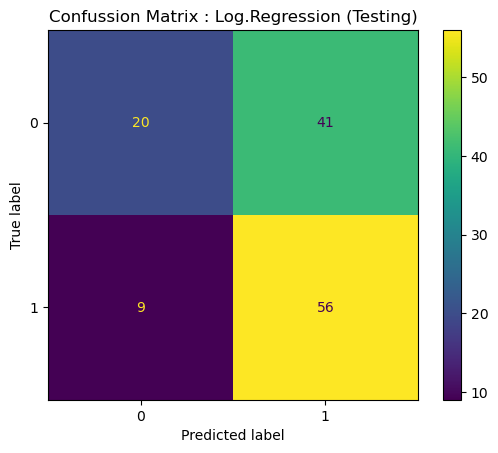

<Figure size 200x200 with 0 Axes>

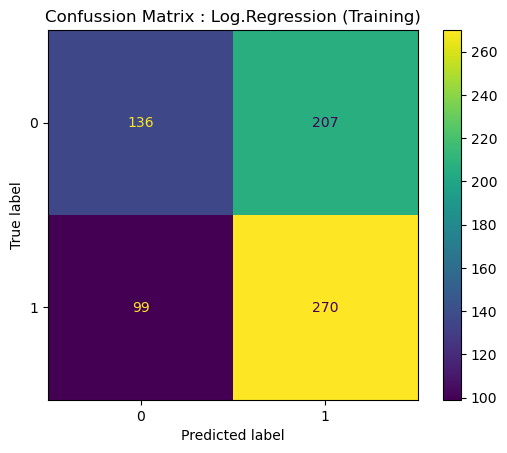

In [714]:
conf_matrix_ML( y_test, y_test_pred_logreg, logreg, 'Log.Regression (Testing)' )
conf_matrix_ML( y_train, y_train_pred_logreg, logreg, 'Log.Regression (Training)' )

### Decision Tree Classifier Model

In [715]:
model =DecisionTreeClassifier(   )
param_grid = {
    'criterion'    : ['gini' ,'entropy','log_loss'],
    'max_depth'    : [1,2,3,4,5,8,10,13,21,34,42,55,89,100, 120,150,180,144,200,500,700],
    'splitter'     : ['best', 'random'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'random_state' : [1,2,5,10,50,100,200]
    }

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train )
model_DTC = grid_search.best_estimator_
ML_grid_result (grid_search, model_DTC, x_train, y_train, x_test,y_test)

KeyboardInterrupt: 

In [ ]:
sns.scatterplot(data=combined_pivot_mean  , y='rd_temp', x='temp_a'  )

In [ ]:
# Predict train set labels
y_train_pred_DTC = model_DTC.predict(x_train)

# Predict test set labels
y_test_pred_DTC = model_DTC.predict(x_test)

train_acc_DTC = accuracy_score(y_train, y_train_pred_DTC).round(3)
test_acc_DTC = accuracy_score(y_test, y_test_pred_DTC).round(3)
test_precision_DTC = precision_score(y_test, y_test_pred_DTC, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_DTC =np.sqrt(mean_squared_error(y_test,y_test_pred_DTC)).round(3)
f1_DTC = f1_score(y_test, y_test_pred_DTC, average= 'weighted' ).round(3)

print('Target : ' + target_col)
print("Training Accuracy:", train_acc_DTC)
print("Testing Accuracy:", test_acc_DTC)
print("Testing Precision:", test_precision_DTC)
print('RMSE : ', rmse_DTC)
print('f1 score :', f1_DTC)
print(classification_report(y_test, y_test_pred_DTC))

data_importance = pd.DataFrame({"features" : xb.columns,
                                "Dec.Tree.Class":model_DTC.feature_importances_.round(4),
                                }).sort_values( by="Dec.Tree.Class" ,ascending = False)
data_importance

In [ ]:
# fn = model_DTC.feature_names_in_
# cn= model_DTC.feature_names_in_
# figsize = (50,10)

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = figsize, dpi=1200)
# for index in range(0, 1):
#     tree.plot_tree(model_DTC,
#                    feature_names = fn,
#                    class_names=target_col,
#                    filled = True,
#                    ax = axes);

#     # axes.set_title('Estimator: ' + str(index), fontsize = 11)
# fig.savefig(directory_path + '/'+ folder_ML + '/' + 'model_DTC_' + str(target_col) + '.pdf', format= 'pdf')
# fig.savefig(directory_path + '/'+ folder_ML + '/' + 'model_DTC_' + str(target_col) + '.png', format= 'png')

In [ ]:
conf_matrix_ML( y_test, y_test_pred_DTC, model_DTC, 'Decision Tree (Testing)' )
conf_matrix_ML( y_train, y_train_pred_DTC, model_DTC, 'Decision Tree (Training)' )

### Extra Trees Classifier Model

In [ ]:
model =ExtraTreesClassifier( )
param_grid = {
    'criterion'    : ['gini','entropy','log_loss'],
    'max_depth'    : [1,2,3,4,5,8,10,13,21,34,42,55,89,100, 120,150,180,144,200,500,700],
    # 'splitter'     : ['best', 'random'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'random_state' : [1,2,10,100],
    'n_estimators'  : [10,50,100,200,300,500]
    }

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=6)
grid_search.fit(x_train, y_train )

model_ETC = grid_search.best_estimator_
ML_grid_result (grid_search, model_ETC, x_train, y_train, x_test,y_test)

In [ ]:
# Predict train set labels
y_train_pred_ETC = model_ETC.predict(x_train)

# Predict test set labels
y_test_pred_ETC = model_ETC.predict(x_test)

train_acc_ETC = accuracy_score(y_train, y_train_pred_ETC).round(3)
test_acc_ETC = accuracy_score(y_test, y_test_pred_ETC).round(3)
test_precision_ETC = precision_score(y_test, y_test_pred_ETC, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_ETC =np.sqrt(mean_squared_error(y_test,y_test_pred_ETC)).round(3)
f1_ETC = f1_score(y_test, y_test_pred_ETC, average= 'weighted' ).round(3)

print('Target : ' + target_col)
print("Training Accuracy:", train_acc_ETC)
print("Testing Accuracy:", test_acc_ETC)
print("Testing Precision:", test_precision_ETC)
print('RMSE : ', rmse_ETC)
print('f1 score :', f1_ETC)
print(classification_report(y_test, y_test_pred_ETC))

data_importance = pd.DataFrame({"features" : xb.columns,
                                "Dec.Tree.Class":model_ETC.feature_importances_.round(4),
                                }).sort_values( by="Dec.Tree.Class" ,ascending = False)
data_importance


In [ ]:
#plt.figure(figsize=(25, 12))
#plot_tree(ETC)
#plt.show()

In [ ]:
conf_matrix_ML( y_test, y_test_pred_ETC, model_ETC, 'Extras Tree (Testing)' )
conf_matrix_ML( y_train, y_train_pred_ETC, model_ETC, 'Extras Tree (Training)' )

### Gaussian Process Model

In [ ]:
# model = GaussianProcessClassifier( )

# param_grid = {
    # 'kernel'    : [1.0 * RBF(1.0)]
    # ,'n_restarts_optimizer' : [0,1,2,3,4,10]
    # ,'max_iter_predict'   : [100]
    # ,'random_state'       : [1,2,5,10,20,30,50,80,130,210,440]
# }
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
# grid_search.fit(x_train, y_train )

# model_GPC = grid_search.best_estimator_
# ML_grid_result (grid_search, model_GPC, x_train, y_train, x_test,y_test)

In [ ]:
# # Predict train set labels
# y_train_pred_GPC = model_GPC.predict(x_train)

# # Predict test set labels
# y_test_pred_GPC = model_GPC.predict(x_test)

# train_acc_GPC = accuracy_score(y_train, y_train_pred_GPC).round(3)
# test_acc_GPC = accuracy_score(y_test, y_test_pred_GPC).round(3)
# test_precision_GPC = precision_score(y_test, y_test_pred_GPC, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
# rmse_GPC =np.sqrt(mean_squared_error(y_test,y_test_pred_GPC)).round(3)
# f1_GPC = f1_score(y_test, y_test_pred_GPC, average= 'weighted' ).round(3)

# print('Target : ' + target_col)
# print("Training Accuracy:", train_acc_GPC)
# print("Testing Accuracy:", test_acc_GPC)
# print("Testing Precision:", test_precision_GPC)
# print('RMSE : ', rmse_GPC)
# print('f1 score :', f1_GPC)
# print(classification_report(y_test, y_test_pred_GPC))

# cm_dt = confusion_matrix(y_test,y_test_pred_GPC, labels = model_GPC.classes_ )
# disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=model_GPC.classes_)
# disp.plot(  )
# plt.title('Confussion Matrix : Gaussian Process (Testing)')
# plt.show(  )

# cm_dt = confusion_matrix(y_train,y_train_pred_GPC, labels = model_GPC.classes_ )
# disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=model_GPC.classes_)
# disp.plot(  )
# plt.title('Confussion Matrix : Gaussian Process (Training)')
# plt.show(  )

# conf_matrix_ML(y_test,y_test_pred_GPC, model_GPC, 'Gaussian P. Class. (Testing)')
# conf_matrix_ML(y_train,y_train_pred_GPC, model_GPC, 'Gaussian P. Class. (Training)')

### KNN Classifier Model

In [ ]:
model =KNeighborsClassifier(   )
param_grid = {
    'n_neighbors'    : [1,2,3,4,5,8,10,13,21,34,55,89,100, 120,150,180,144,200,500]
    ,'weights'  : ['uniform', 'distance']
    ,'algorithm'   : [ 'ball_tree', 'kd_tree', 'brute']
    ,'leaf_size' : [10,20,30,50,80,130,210,440]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train )

model_KNN = grid_search.best_estimator_
ML_grid_result (grid_search, model_KNN, x_train, y_train, x_test,y_test)

In [ ]:
# Predict train set labels
y_train_pred_KNN = model_KNN.predict(x_train)

# Predict test set labels
y_test_pred_KNN = model_KNN.predict(x_test)

train_acc_KNN = accuracy_score(y_train, y_train_pred_KNN).round(3)
test_acc_KNN = accuracy_score(y_test, y_test_pred_KNN).round(3)
test_precision_KNN = precision_score(y_test, y_test_pred_KNN, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_KNN =np.sqrt(mean_squared_error(y_test,y_test_pred_KNN)).round(3)
f1_KNN = f1_score(y_test, y_test_pred_KNN, average= 'weighted' ).round(3)

print('Target : ' + target_col)
print("Training Accuracy:", train_acc_KNN)
print("Testing Accuracy:", test_acc_KNN)
print("Testing Precision:", test_precision_KNN)
print('RMSE : ', rmse_KNN)
print('f1 score :', f1_KNN)
print(classification_report(y_test, y_test_pred_KNN))

conf_matrix_ML(y_test,y_test_pred_KNN, model_KNN, 'KNN Class. (Testing)')
conf_matrix_ML(y_train,y_train_pred_KNN, model_KNN, 'KNN Class. (Training)')

### SVM Classifier Model

In [ ]:
model =SVC(   )
param_grid = {
    'C'        : [1,1.1,1.25,1.5],
    'kernel'   : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree'   : [ 1,2,3,4,5,6,7,8,9,10],
    'gamma'    :  ['scale','auto'],
    'random_state' : [1,2,5,10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train )

model_SVC = grid_search.best_estimator_
ML_grid_result (grid_search, model_SVC, x_train, y_train, x_test,y_test)

In [ ]:
# Predict train set labels
y_train_pred_SVC = model_SVC.predict(x_train)

# Predict test set labels
y_test_pred_SVC = model_SVC.predict(x_test)

train_acc_SVC = accuracy_score(y_train, y_train_pred_SVC).round(3)
test_acc_SVC = accuracy_score(y_test, y_test_pred_SVC).round(3)
test_precision_SVC = precision_score(y_test, y_test_pred_SVC, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_SVC =np.sqrt(mean_squared_error(y_test,y_test_pred_SVC)).round(3)
f1_SVC = f1_score(y_test, y_test_pred_SVC, average= 'weighted' ).round(3)

print('Target : ' + target_col)
print("Training Accuracy:", train_acc_SVC)
print("Testing Accuracy:", test_acc_SVC)
print("Testing Precision:", test_precision_SVC)
print('RMSE : ', rmse_SVC)
print('f1 score :', f1_SVC)
print(classification_report(y_test, y_test_pred_SVC))

conf_matrix_ML(y_test,y_test_pred_SVC, model_SVC, 'Support Vector Class. (Testing)')
conf_matrix_ML(y_train,y_train_pred_SVC, model_SVC, 'Support Vector Class. (Training)')

### Random Forest Classifier Model

In [ ]:
model =RandomForestClassifier()
param_grid = {
    'criterion'    : ['gini','entropy','log_loss'],
    'max_depth'    : [1,2,3,4,5,8,10,13,21,34,55,89,100, 120,150,180,144,200,500],
    'random_state' : [1,2,5,10,50,100],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'n_estimator'  : [10,50,100,200,500,1000]

}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train )
model_RFC = grid_search.best_estimator_
ML_grid_result (grid_search, model_RFC, x_train, y_train, x_test,y_test)

In [ ]:
y_train_pred_RFC = model_RFC.predict(x_train)
# Predict test set labels
y_test_pred_RFC = model_RFC.predict(x_test)

train_acc_RFC = accuracy_score(y_train, y_train_pred_RFC).round(3)
test_acc_RFC = accuracy_score(y_test, y_test_pred_RFC).round(3)
test_precision_RFC = precision_score(y_test, y_test_pred_RFC, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
f1_RFC = f1_score(y_test, y_test_pred_RFC, average= 'weighted' ).round(3)
rmse_RFC =np.sqrt(mean_squared_error(y_test,y_test_pred_RFC)).round(3)

print('Target : ' + target_col)
print("Training Accuracy:", train_acc_RFC)
print("Testing Accuracy:", test_acc_RFC)
print("Testing Precision:", test_precision_RFC)
print('f1 score :', f1_RFC)
print('RMSE : ', rmse_RFC)
print(classification_report(y_test, y_test_pred_RFC))

data_importance = pd.DataFrame({"features" : xb.columns,
                                "RanFor.Class":model_RFC.feature_importances_.round(4),
                                })#.sort_values(ascending = False)
data_importance

In [ ]:
conf_matrix_ML(y_test,y_test_pred_RFC, model_RFC, 'Random Forest (Testing)')
conf_matrix_ML(y_train,y_train_pred_RFC, model_RFC, 'Random Forest (Training)')

### Gradient Boost Classifier (Multi-Class)

In [ ]:
model = GradientBoostingClassifier( )
param_grid = {
    'loss'         : ['log_loss', 'exponential'],
    'n_estimators' :  [1,3, 5,8,10,20,50,100,110,120, 130, 150,250],
    'max_depth'    : [1,2,3,5,8,10,12,15,20,25,50,100,150,200],
    'criterion'    : ['friedman_mse', 'squared_error'],
    'learning_rate': [0.01,0.05,0.1,0.25,0.6,0.8,1]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=6)
grid_search.fit(x_train, y_train )
model_GBC = grid_search.best_estimator_

ML_grid_result (grid_search, model_GBC, x_train, y_train, x_test,y_test)

In [ ]:
y_train_pred_GBC = model_GBC.predict(x_train)
y_test_pred_GBC = model_GBC.predict(x_test)

train_acc_GBC = accuracy_score(y_train, y_train_pred_GBC).round(3)
test_acc_GBC = accuracy_score(y_test, y_test_pred_GBC).round(3)
test_precision_GBC = precision_score(y_test, y_test_pred_GBC, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
f1_GBC = f1_score(y_test,y_test_pred_GBC, average= 'weighted' ).round(3)
rmse_GBC =np.sqrt(mean_squared_error(y_test,y_test_pred_GBC)).round(3)

print('Target : ' + target_col)
print("Training Accuracy:", train_acc_GBC)
print("Testing Accuracy:", test_acc_GBC)
print("Testing Precision:", test_precision_GBC)
print('f1 score :', f1_GBC)
print('RMSE : ', rmse_GBC)
print(classification_report(y_test, y_test_pred_GBC))

data_importance = pd.DataFrame({"features" : xb.columns,
                                "GradBoost.Class":model_GBC.feature_importances_.round(4),
                                }).sort_values(by='features',ascending = False)
data_importance

In [ ]:
conf_matrix_ML(y_test,y_test_pred_GBC, model_GBC, 'GradBoost Class. (Testing)')
conf_matrix_ML(y_train,y_train_pred_GBC, model_GBC, 'GradBoost Class. (Training)')

### XGBoost Classifier (Multi-Class)

In [831]:
model = xg.XGBClassifier(   )
param_grid = {
    'n_estimators' : [10,20,50,100,110,120, 130, 150,250],
    'learning_rate': [0.01,0.05,0.1,0.25,0.6,1],
    'max_depth'    : [2,3,5,8,10,12,15,20,25,50,100,150,200],
    'random_state' : [1,2,10,50,100]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train )
model_XGBC = grid_search.best_estimator_
ML_grid_result (grid_search, model_XGBC, x_train, y_train, x_test,y_test)

KeyboardInterrupt: 

In [ ]:
y_train_pred_XGBC = model_XGBC.predict(x_train)
# Predict test set labels
y_test_pred_XGBC = model_XGBC.predict(x_test)

train_acc_XGBC = accuracy_score(y_train, y_train_pred_XGBC).round(3)
test_acc_XGBC = accuracy_score(y_test, y_test_pred_XGBC).round(3)
test_precision_XGBC = precision_score(y_test, y_test_pred_XGBC, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
f1_XGBC = f1_score(y_test, y_test_pred_XGBC, average= 'weighted' ).round(3)
rmse_XGBC =np.sqrt(mean_squared_error(y_test,y_test_pred_XGBC)).round(3)

print('Target : ' + target_col)
print("Training Accuracy:", train_acc_XGBC)
print("Testing Accuracy:", test_acc_XGBC)
print("Testing Precision:", test_precision_XGBC)
print('f1 score :', f1_XGBC)
print('RMSE : ', rmse_XGBC)
print(classification_report(y_test, y_test_pred_XGBC))

data_importance = pd.DataFrame({"features" : xb.columns,
                                "model_XGBC":model_XGBC.feature_importances_.round(4),
                                })#.sort_values(ascending = False)
data_importance

conf_matrix_ML(y_test,y_test_pred_XGBC, model_XGBC, 'XGBoost Class. (Testing)')
conf_matrix_ML(y_train,y_train_pred_XGBC, model_XGBC, 'XGBoost Class. (Training)')

### MLP Classifier

In [ ]:
model = MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(1144, 272)], #(12,3), (12,5), (12, 8), (12, 13),(24,5) , (24,8), (24, 13), (24, 21), (36,8), (36,13), (36, 21), (108, 42), (108, 68), (236, 68),(236, 136),(572, 136),(572, 272), (1144, 272)
    'activation'        : ['logistic'],  #'relu', 'logistic',  , 'tanh'
    'solver'            : ['lbfgs'],    #'adam', 'sgd',
    'learning_rate'     : ['constant'],     #,'invscaling','adaptive'
    'alpha'             : [ 0.01],  # ,0.1
    'max_iter'          : [1000]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=6)
grid_search.fit(x_train, y_train )
model_MLPC = grid_search.best_estimator_
ML_grid_result (grid_search, model_MLPC, x_train, y_train, x_test,y_test)

In [ ]:
#ALTERNATIVE
model_MPLC = MLPClassifier( hidden_layer_sizes=(1144,272), activation='tanh', alpha=0.1, learning_rate='adaptive', solver='adam')
model_MLPC.fit(x_train, y_train )
print("Accuracy score (training)  : {:.3f}".format(model_MLPC.score(x_train, y_train)))
print("Accuracy score (validation): {:.3f}".format(model_MLPC.score(x_test, y_test)))

y_train_pred_MLPC = model_MLPC.predict(x_train)
y_test_pred_MLPC = model_MLPC.predict(x_test)

In [ ]:
train_acc_MLPC = accuracy_score(y_train, y_train_pred_MLPC).round(3)
test_acc_MLPC = accuracy_score(y_test, y_test_pred_MLPC).round(3)
test_precision_MLPC = precision_score(y_test, y_test_pred_MLPC, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_MLPC =np.sqrt(mean_squared_error(y_test,y_test_pred_MLPC)).round(3)
f1_MLPC = f1_score(y_test, y_test_pred_MLPC, average= 'weighted' ).round(3)

print('Target : ' + target_col)
print("Training Accuracy:", train_acc_MLPC)
print("Testing Accuracy:", test_acc_MLPC)
print("Testing Precision:", test_precision_MLPC)
print('RMSE : ', rmse_MLPC)
print('f1 score :', f1_MLPC)
print(classification_report(y_test, y_test_pred_MLPC))

In [ ]:
conf_matrix_ML(y_test,y_test_pred_MLPC, model_MLPC, 'MLPC Class. (Testing)')
conf_matrix_ML(y_train,y_train_pred_MLPC, model_MLPC, 'MLPC Class. (Training)')

### ANN custom model

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.python import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model

In [ ]:
xb.info()

In [ ]:
xb

In [ ]:


# Load your DataFrame
# Replace "your_dataframe.csv" with the actual filename or use your data loading mechanism
# df = pd.read_csv("your_dataframe.csv")

# Assume columns 1, 2, and 6 are the input features and column "target" is the target variable
X = xb.astype(float).copy()
# y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

# Custom parabolic activation function
def parabolic_activation(x):
    return tf.where(x > 0, x, 0.01 * x)


# Define a custom model architecture
model = Sequential()

model.add(Dense(128, input_dim=9, activation=parabolic_activation))  # Column 1
model.add(Dense(128, activation=parabolic_activation))  # Column 2
model.add(Dense(128, activation='sigmoid'))  # Column 3
model.add(Dense(128, activation='sigmoid'))  # Column 4
model.add(Dense(128, activation=parabolic_activation))  # Column 5
model.add(Dense(128, activation=parabolic_activation))  # Column 6
model.add(Dense(128, activation=parabolic_activation))  # Column 7
model.add(Dense(128, activation=parabolic_activation))  # Column 8
model.add(Dense(128, activation='sigmoid'))  # Column 9

# Output layer
model.add(Dense(1, activation='hard_sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))


In [ ]:
# Evaluate the model
y_pred_DL_Seq = model.predict(X_test)
# train_acc_MLPC = accuracy_score(y_train, y_train_pred_MLPC).round(3)
# accuracy_DL = accuracy_score(y_test, y_pred_DL_Seq).round(3)
# f1 = f1_score(y_test, y_pred_DL_Seq)
# print("Accuracy:", accuracy)
# print("F1 Score:", f1)

In [ ]:
plt.plot(y_pred_DL_Seq)

In [ ]:
plt.plot(y_test.values)

### Classification ML - Review

In [ ]:
data = np.array([['Algorithm', 'Train Acc', 'Test ACC', 'Test Precision', 'f1_score', 'RMSE'],
                ['Log.Regression', train_acc_logreg, test_acc_logreg, test_precision_logreg, f1_logreg, rmse_logreg],
                ['Decision Tree', train_acc_DTC, test_acc_DTC, test_precision_DTC, f1_DTC,  rmse_DTC],
                ['Extra Trees', train_acc_ETC, test_acc_ETC, test_precision_ETC, f1_ETC,  rmse_ETC],
                #['Gaussian Process', train_acc_GPC, test_acc_GPC, test_precision_GPC, f1_GPC, rmse_GPC],
                #['K-Nearest N', train_acc_KNN, test_acc_KNN, test_precision_KNN, f1_KNN,  rmse_KNN],
                #['Support Vector', train_acc_SVC, test_acc_SVC, test_precision_SVC, f1_SVC,  rmse_SVC],
                ['Random Forest', train_acc_RFC, test_acc_RFC, test_precision_RFC, f1_RFC,  rmse_RFC],
                #['XGBoost', train_acc_XGBC, test_acc_XGBC, test_precision_XGBC,   f1_XGBC,   rmse_XGBC],
                # ['GradBoost', train_acc_GBC, test_acc_GBC, test_precision_GBC,   f1_GBC,   rmse_GBC],
                # ['MultiLayer NN', train_acc_MLPC, test_acc_MLPC, test_precision_MLPC, f1_MLPC,  rmse_MLPC],
                 ])

table_classification = pd.DataFrame(data=data[1:, 1:],
                     index = data[1:,0],
                     columns=(data[0,1:])).sort_values('Test Precision', ascending=False)
print('Target : ' + target_col)
table_classification      .drop(['Test Precision', 'RSME'], axis=1)

In [ ]:
data_importance = pd.DataFrame({"features" : xb.columns,
                                'Log.Regress' : logreg.coef_.flatten().round(4),
                                #'Support Vector' : model_SVC.coef_.flatten().round(4),
                                 "Dec.Tree.Class":model_DTC.feature_importances_.round(4),
                                 "Extra.Trees.Class":model_ETC.feature_importances_.round(4),
                                 "RanFor.Class" : model_RFC.feature_importances_.round(4),
                                #"GradBoost.Class": model_GBC.feature_importances_.round(4),
                                #"XGBoost.Class": model_XGBC.feature_importances_.round(4)
 #                               ,"AdaBoost.Class": model_ADABC.feature_importances_ .round(4)
                                }).sort_values('features', ascending = False)
print('Target : ' + target_col)
data_importance

In [ ]:
def features_plotter (df):
    df.plot(kind='barh', stacked=False, figsize=(6, 4))
    # Customize labels and title
    plt.ylabel('measured IAQ parameters')
    plt.xlabel('(Cummulative) feature of importances')
    plt.title('ML Result : importances of features')

In [ ]:
# Data
data = {
    'temp_a': [0.1384, 0.1644, None],
    'rh_a': [None, 0.1176, None],
    'co2_a': [0.1563, 0.1174, None],
    'voc_a': [0.1844, 0.1007, None],
    'enth_a': [0.1515, 0.1349, None],
    'hura_a': [0.189, 0.1, None],
    'temp_o': [0.0918, 0.1032, None],
    'rh_o': [0.0614, None, None],
    'enth_o': [None, 0.1007, None],
    'hour (time)': [0.0272, 0.0611, None]}
data_importance = pd.DataFrame(data, index = [ 'feel_temp', 'feel_air', 'None']).T.drop(columns='None',axis=1)

In [ ]:
def pareto_histograph(df):


    # Calculate cumulative sum for each column
    df_cumsum = df.cumsum()

    # Plot
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    # Plot bar histograms
    df.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'], alpha=0.7, width=0.4, position=1)
    ax1.set_ylabel('Value')

    # Plot cumulative lines
    df_cumsum.plot(kind='line', ax=ax2, marker='o', color=['blue', 'red'], linestyle='-', linewidth=2)

    # Add legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Add labels and title
    ax2.set_ylabel('Cumulative Sum')
    plt.title('Bar Histograms and Cumulative Lines')
    # Show plot
    plt.show()

In [ ]:
pareto_histograph(data_importance)

## 1B. Train Classification ML *manual

### Logistic Regression Classifier Model

In [185]:
# all parameters not specified are set to their defaults
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_train_pred_logreg = logreg.predict(x_train)
y_test_pred_logreg = logreg.predict(x_test)
f1_score(y_test, y_test_pred_logreg, average= 'weighted' )#.round(3)

train_acc_logreg = accuracy_score(y_train, y_train_pred_logreg)#.round(3)
test_acc_logreg = accuracy_score(y_test, y_test_pred_logreg)#.round(3)
test_precision_logreg = precision_score(y_test, y_test_pred_logreg, average= 'weighted' )#.round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_logreg =np.sqrt(mean_squared_error(y_test,y_test_pred_logreg))#.round(3)
f1_logreg = f1_score(y_test, y_test_pred_logreg, average= 'weighted' )#.round(3)

print('Target : ' + str(target_col))
print("Training Accuracy:", train_acc_logreg)
print("Testing Accuracy:", test_acc_logreg)
print("Testing Precision:", test_precision_logreg)
print('RMSE : ', rmse_logreg)
print('f1 score :', f1_logreg)
print(classification_report(y_test, y_test_pred_logreg))

Target : feel_air
Training Accuracy: 0.5780542986425339
Testing Accuracy: 0.5512820512820513
Testing Precision: 0.5541892737014689
RMSE :  0.6698641270570836
f1 score : 0.5512820512820513
              precision    recall  f1-score   support

           0       0.52      0.58      0.55        74
           1       0.58      0.52      0.55        82

    accuracy                           0.55       156
   macro avg       0.55      0.55      0.55       156
weighted avg       0.55      0.55      0.55       156



Target : feel_air


<Figure size 200x200 with 0 Axes>

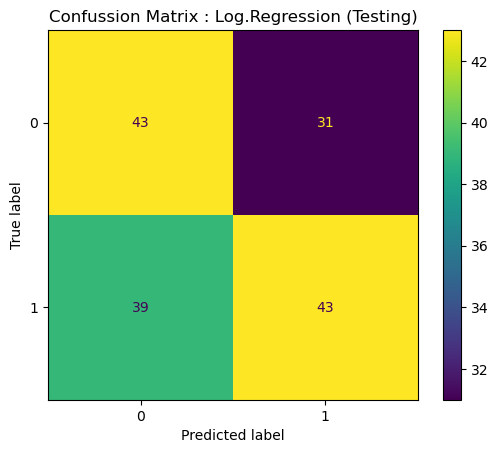

<Figure size 200x200 with 0 Axes>

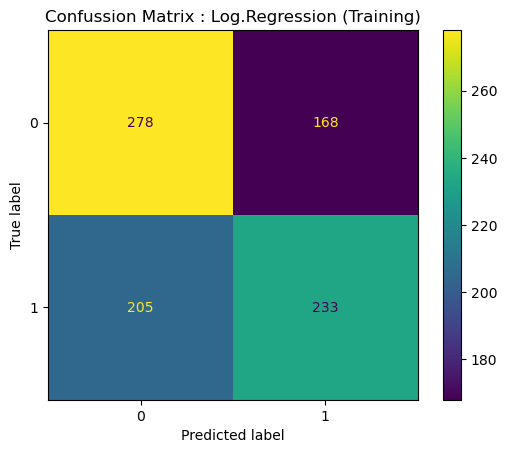

In [186]:
print('Target : ' + str(target_col))
conf_matrix_ML( y_test, y_test_pred_logreg, logreg, 'Log.Regression (Testing)' )
conf_matrix_ML( y_train, y_train_pred_logreg, logreg, 'Log.Regression (Training)' )

### Extra Trees Classifier Model

In [187]:
#optimum MAX_DEPTH
lr_list = [1,2,3,4,5,8,10,13,21,34,38,42,55,89,100, 120,150,180,144,200,500,700]
for find_optimum in lr_list:
  ETC_optimum = ExtraTreesClassifier(max_depth=find_optimum, random_state=10)
  ETC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, ETC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.571
Accuracy score (validation): 0.526
__
Optimum Value : 2
Accuracy score (training): 0.606
Accuracy score (validation): 0.583
__
Optimum Value : 3
Accuracy score (training): 0.622
Accuracy score (validation): 0.609
__
Optimum Value : 4
Accuracy score (training): 0.640
Accuracy score (validation): 0.615
__
Optimum Value : 5
Accuracy score (training): 0.653
Accuracy score (validation): 0.615
__
Optimum Value : 8
Accuracy score (training): 0.671
Accuracy score (validation): 0.622
__
Optimum Value : 10
Accuracy score (training): 0.671
Accuracy score (validation): 0.628
__
Optimum Value : 13
Accuracy score (training): 0.671
Accuracy score (validation): 0.622
__


KeyboardInterrupt: 

In [ ]:
max_depth_use = 5

In [ ]:
#optimum RANDOM_STATE
lr_list = [1,2,5,10,50,100,200,400]
for find_optimum in lr_list:
  ETC_optimum = ExtraTreesClassifier(max_depth=max_depth_use, random_state=find_optimum)
  ETC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, ETC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.651
Accuracy score (validation): 0.573
__
Optimum Value : 2
Accuracy score (training): 0.651
Accuracy score (validation): 0.588
__
Optimum Value : 5
Accuracy score (training): 0.657
Accuracy score (validation): 0.573
__
Optimum Value : 10
Accuracy score (training): 0.659
Accuracy score (validation): 0.603
__
Optimum Value : 50
Accuracy score (training): 0.651
Accuracy score (validation): 0.573
__
Optimum Value : 100
Accuracy score (training): 0.657
Accuracy score (validation): 0.611
__
Optimum Value : 200
Accuracy score (training): 0.650
Accuracy score (validation): 0.573
__
Optimum Value : 400
Accuracy score (training): 0.655
Accuracy score (validation): 0.603
__


In [ ]:
random_use = 1

In [ ]:
#optimum CRITERION
lr_list = ['gini','entropy','log_loss']
for find_optimum in lr_list:
  ETC_optimum = ExtraTreesClassifier(max_depth=max_depth_use, random_state=random_use, criterion= find_optimum)
  ETC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, ETC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : gini
Accuracy score (training): 0.630
Accuracy score (validation): 0.614
__
Optimum Value : entropy
Accuracy score (training): 0.630
Accuracy score (validation): 0.614
__
Optimum Value : log_loss
Accuracy score (training): 0.630
Accuracy score (validation): 0.614
__


In [ ]:
criterion_use = 'gini'

In [ ]:
#optimum SPLITTER
lr_list = [2,5,10,20,50,100,110,120, 130, 150,250]
for find_optimum in lr_list:
  ETC_optimum = ExtraTreesClassifier(max_depth=max_depth_use, random_state=random_use,
                                       criterion= criterion_use, n_estimators= find_optimum )
  ETC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, ETC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 2
Accuracy score (training): 0.660
Accuracy score (validation): 0.540
__
Optimum Value : 5
Accuracy score (training): 0.662
Accuracy score (validation): 0.548
__
Optimum Value : 10
Accuracy score (training): 0.664
Accuracy score (validation): 0.556
__
Optimum Value : 20
Accuracy score (training): 0.663
Accuracy score (validation): 0.571
__
Optimum Value : 50
Accuracy score (training): 0.664
Accuracy score (validation): 0.611
__
Optimum Value : 100
Accuracy score (training): 0.664
Accuracy score (validation): 0.619
__
Optimum Value : 110
Accuracy score (training): 0.664
Accuracy score (validation): 0.619
__
Optimum Value : 120
Accuracy score (training): 0.664
Accuracy score (validation): 0.619
__
Optimum Value : 130
Accuracy score (training): 0.664
Accuracy score (validation): 0.619
__
Optimum Value : 150
Accuracy score (training): 0.664
Accuracy score (validation): 0.619
__
Optimum Value : 250
Accuracy score (training): 0.664
Accuracy score (validation): 0.619
__


In [ ]:
n_estimator_use = 100

In [ ]:
#optimum SPLITTER
lr_list = ['auto', 'sqrt', 'log2']
for find_optimum in lr_list:
  ETC_optimum = ExtraTreesClassifier(max_depth=max_depth_use, random_state=random_use,
                                       criterion= criterion_use, n_estimators=n_estimator_use, max_features= find_optimum)
  ETC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, ETC_optimum, x_train, y_train, x_test,y_test)

In [ ]:
max_features_use = 'auto'

In [ ]:
# Fit decision tree model
ETC = ExtraTreesClassifier(max_depth=max_depth_use, random_state=random_use,
                                       criterion= criterion_use, n_estimators=n_estimator_use,
                                    #    max_features= max_features_use 
                                       )
ETC.fit(x_train, y_train)

# Fit decision tree input-output
model_ETC = ETC.fit(x_train, y_train)

In [ ]:
# Predict train set labels
y_train_pred_ETC = model_ETC.predict(x_train)
y_test_pred_ETC = model_ETC.predict(x_test)

train_acc_ETC = accuracy_score(y_train, y_train_pred_ETC)#.round(3)
test_acc_ETC = accuracy_score(y_test, y_test_pred_ETC)#.round(3)
test_precision_ETC = precision_score(y_test, y_test_pred_ETC, average= 'weighted' )#.round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_ETC =np.sqrt(mean_squared_error(y_test,y_test_pred_ETC))#.round(3)
f1_ETC = f1_score(y_test, y_test_pred_ETC, average= 'weighted' )#.round(3)

# print('Target : ' + target_col)
print("Training Accuracy:", train_acc_ETC)
print("Testing Accuracy:", test_acc_ETC)
print("Testing Precision:", test_precision_ETC)
print('RMSE : ', rmse_ETC)
print('f1 score :', f1_ETC)
print(classification_report(y_test, y_test_pred_ETC))

data_importance = pd.DataFrame({"features" : xb.columns,
                                "Extra.Trees.Class":model_ETC.feature_importances_#.round(4),
                                }).sort_values( by="Extra.Trees.Class" ,ascending = False)
data_importance

Training Accuracy: 0.6300940438871473
Testing Accuracy: 0.6140350877192983
Testing Precision: 0.6179337231968811
RMSE :  0.6212607441973955
f1 score : 0.615232249357886
              precision    recall  f1-score   support

           0       0.56      0.60      0.58        25
           1       0.67      0.62      0.65        32

    accuracy                           0.61        57
   macro avg       0.61      0.61      0.61        57
weighted avg       0.62      0.61      0.62        57



,features,Extra.Trees.Class
17,pm10_o,0.151745
2,rh_a,0.076183
4,hura_a,0.068234
1,temp_a,0.063498
5,voc_a,0.062820
10,winds_o,0.061240
3,enth_a,0.060919
14,press_o,0.058968
15,sun_o,0.057358
0,co2_a,0.051313


<Figure size 200x200 with 0 Axes>

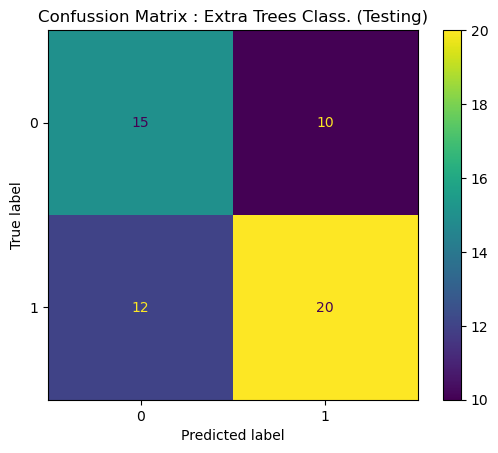

<Figure size 200x200 with 0 Axes>

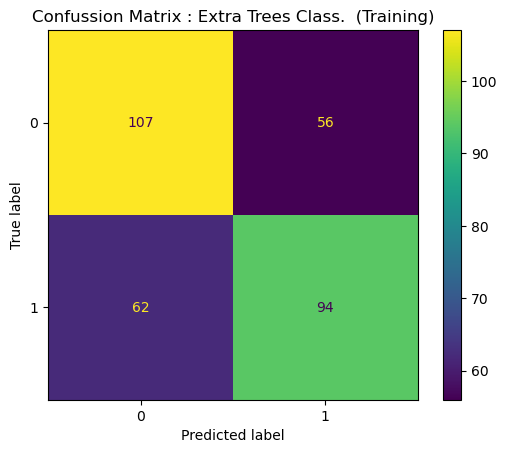

In [ ]:
conf_matrix_ML( y_test, y_test_pred_ETC, model_ETC, 'Extra Trees Class. (Testing)' )
conf_matrix_ML( y_train, y_train_pred_ETC, model_ETC, 'Extra Trees Class.  (Training)' )

In [ ]:
# fn = model_ETC.feature_names_in_
# cn= model_ETC.feature_names_in_
# figsize = (n_estimator_use*5,5)

# fig, axes = plt.subplots(nrows = 1,ncols = n_estimator_use,figsize = figsize, dpi=900)
# for index in range(0, n_estimator_use):
#     tree.plot_tree(model_ETC.estimators_[index],
#                    feature_names = fn,
#                    class_names=target_col,
#                    filled = True,
#                    ax = axes[index]);

#     axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
# fig.savefig(directory_path + '/'+ folder_ML + '/' + 'model_ETC_' + str(target_col) + '.png')

In [ ]:
# fn = model_ETC.feature_names_in_
# cn= model_ETC.feature_names_in_
# figsize = (20,10 )
# fig, axes = plt.subplots(figsize = figsize, dpi=800)
# tree.plot_tree(model_ETC.estimators_[0],
#                feature_names = fn,
#                class_names=target_col,
#                filled = True);
# fig.savefig(directory_path + '/'+ folder_ML + '/' + 'model_ETC_' + str(target_col) + '.png')

### Decision Tree Classifier Model

In [786]:
#optimum MAX_DEPTH
lr_list = [1,2,3,4,5,6,7,8,10,13,21,34,42,55,89,100, 120,150,180,144,200,500,700]
for find_optimum in lr_list:
  DTC_optimum = DecisionTreeClassifier(max_depth=find_optimum, random_state=10)
  DTC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, DTC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.586
Accuracy score (validation): 0.491
__
Optimum Value : 2
Accuracy score (training): 0.611
Accuracy score (validation): 0.561
__
Optimum Value : 3
Accuracy score (training): 0.618
Accuracy score (validation): 0.561
__
Optimum Value : 4
Accuracy score (training): 0.618
Accuracy score (validation): 0.561
__
Optimum Value : 5
Accuracy score (training): 0.618
Accuracy score (validation): 0.614
__
Optimum Value : 6
Accuracy score (training): 0.633
Accuracy score (validation): 0.596
__
Optimum Value : 7
Accuracy score (training): 0.636
Accuracy score (validation): 0.596
__
Optimum Value : 8
Accuracy score (training): 0.636
Accuracy score (validation): 0.561
__
Optimum Value : 10
Accuracy score (training): 0.636
Accuracy score (validation): 0.561
__
Optimum Value : 13
Accuracy score (training): 0.636
Accuracy score (validation): 0.561
__
Optimum Value : 21
Accuracy score (training): 0.636
Accuracy score (validation): 0.561
__
Optimum Value : 34

In [787]:
max_depth_use = 5

In [788]:
#optimum CRITERION
lr_list = ['gini','entropy','log_loss']
for find_optimum in lr_list:
  DTC_optimum = DecisionTreeClassifier(max_depth=max_depth_use, random_state=10, criterion= find_optimum)
  DTC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, DTC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : gini
Accuracy score (training): 0.618
Accuracy score (validation): 0.614
__
Optimum Value : entropy
Accuracy score (training): 0.618
Accuracy score (validation): 0.579
__
Optimum Value : log_loss
Accuracy score (training): 0.618
Accuracy score (validation): 0.579
__


In [789]:
criterion_use = 'gini'

In [790]:
#optimum SPLITTER
lr_list = ['best', 'random']
for find_optimum in lr_list:
  DTC_optimum = DecisionTreeClassifier(max_depth=max_depth_use, random_state=10,
                                       criterion= criterion_use, splitter=find_optimum)
  DTC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, DTC_optimum, x_train, y_train, x_test, y_test)

Optimum Value : best
Accuracy score (training): 0.618
Accuracy score (validation): 0.614
__
Optimum Value : random
Accuracy score (training): 0.633
Accuracy score (validation): 0.561
__


In [791]:
splitter_use = 'best'

In [792]:
#optimum RANDOM_STATE
lr_list = [1,2,5,10,50,100,200,500]
for find_optimum in lr_list:
  DTC_optimum = DecisionTreeClassifier(max_depth=max_depth_use,
                                       criterion= criterion_use, splitter=splitter_use, random_state=find_optimum)
  DTC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, DTC_optimum, x_train, y_train, x_test, y_test)


Optimum Value : 1
Accuracy score (training): 0.618
Accuracy score (validation): 0.614
__
Optimum Value : 2
Accuracy score (training): 0.618
Accuracy score (validation): 0.614
__
Optimum Value : 5
Accuracy score (training): 0.618
Accuracy score (validation): 0.614
__
Optimum Value : 10
Accuracy score (training): 0.618
Accuracy score (validation): 0.614
__
Optimum Value : 50
Accuracy score (training): 0.618
Accuracy score (validation): 0.614
__
Optimum Value : 100
Accuracy score (training): 0.618
Accuracy score (validation): 0.614
__
Optimum Value : 200
Accuracy score (training): 0.618
Accuracy score (validation): 0.614
__
Optimum Value : 500
Accuracy score (training): 0.618
Accuracy score (validation): 0.614
__


In [793]:
random_use = 1

In [794]:
#optimum Max_Feature
lr_list = [1,2,3,5,10,15,20,25,'sqrt', 'log2']
for find_optimum in lr_list:
  DTC_optimum = DecisionTreeClassifier(max_depth=max_depth_use,
                                       criterion= criterion_use, splitter=splitter_use, random_state=random_use,
                                       max_features= find_optimum )
  DTC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, DTC_optimum, x_train, y_train, x_test, y_test)


Optimum Value : 1
Accuracy score (training): 0.614
Accuracy score (validation): 0.579
__
Optimum Value : 2
Accuracy score (training): 0.621
Accuracy score (validation): 0.544
__
Optimum Value : 3
Accuracy score (training): 0.630
Accuracy score (validation): 0.579
__
Optimum Value : 5
Accuracy score (training): 0.627
Accuracy score (validation): 0.579
__
Optimum Value : 10
Accuracy score (training): 0.621
Accuracy score (validation): 0.596
__
Optimum Value : 15
Accuracy score (training): 0.618
Accuracy score (validation): 0.614
__
Optimum Value : 20
Accuracy score (training): 0.618
Accuracy score (validation): 0.614
__
Optimum Value : 25
Accuracy score (training): 0.618
Accuracy score (validation): 0.614
__
Optimum Value : sqrt
Accuracy score (training): 0.630
Accuracy score (validation): 0.614
__
Optimum Value : log2
Accuracy score (training): 0.630
Accuracy score (validation): 0.614
__


In [795]:
max_features_use = 15

In [796]:
# Fit decision tree model
DTC = DecisionTreeClassifier(max_depth=max_depth_use, random_state=random_use,
                                       criterion= criterion_use, splitter=splitter_use, max_features= max_features_use )
DTC.fit(x_train, y_train)

# Fit decision tree input-output
model_DTC = DTC.fit(x_train, y_train)

In [797]:
# Predict train set labels
y_train_pred_DTC = model_DTC.predict(x_train)
y_test_pred_DTC = model_DTC.predict(x_test)

train_acc_DTC = accuracy_score(y_train, y_train_pred_DTC).round(3)
test_acc_DTC = accuracy_score(y_test, y_test_pred_DTC).round(3)
test_precision_DTC = precision_score(y_test, y_test_pred_DTC, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_DTC =np.sqrt(mean_squared_error(y_test,y_test_pred_DTC)).round(3)
f1_DTC = f1_score(y_test, y_test_pred_DTC, average= 'weighted' ).round(3)

print('Target : ' , target_col)
print("Training Accuracy:", train_acc_DTC)
print("Testing Accuracy:", test_acc_DTC)
print("Testing Precision:", test_precision_DTC)
print('RMSE : ', rmse_DTC)
print('f1 score :', f1_DTC)
print(classification_report(y_test, y_test_pred_DTC))

data_importance = pd.DataFrame({"features" : xb.columns,
                                "Dec.Tree.Class":model_DTC.feature_importances_.round(4),
                                }).sort_values( by="Dec.Tree.Class" ,ascending = False)
data_importance

AttributeError: 'float' object has no attribute 'round'

In [ ]:
conf_matrix_ML( y_test, y_test_pred_DTC, model_DTC, 'Decision Tree (Testing)' )
conf_matrix_ML( y_train, y_train_pred_DTC, model_DTC, 'Decision Tree (Training)' )

### Random Forest Classifier Model

In [188]:
#optimum MAX_DEPTH
lr_list = [1,2,3,4,5,6,7,8,10,13,21,34,42,55,89,100, 120,150,180,144,200,500,700]
for find_optimum in lr_list:
  RFC_optimum = RandomForestClassifier(max_depth=find_optimum, random_state=10)
  RFC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, RFC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.589
Accuracy score (validation): 0.538
__
Optimum Value : 2
Accuracy score (training): 0.611
Accuracy score (validation): 0.583
__
Optimum Value : 3
Accuracy score (training): 0.638
Accuracy score (validation): 0.603
__
Optimum Value : 4
Accuracy score (training): 0.660
Accuracy score (validation): 0.622
__
Optimum Value : 5
Accuracy score (training): 0.662
Accuracy score (validation): 0.609
__
Optimum Value : 6
Accuracy score (training): 0.667
Accuracy score (validation): 0.628
__
Optimum Value : 7
Accuracy score (training): 0.671
Accuracy score (validation): 0.622
__
Optimum Value : 8
Accuracy score (training): 0.671
Accuracy score (validation): 0.622
__
Optimum Value : 10
Accuracy score (training): 0.671
Accuracy score (validation): 0.622
__
Optimum Value : 13
Accuracy score (training): 0.671
Accuracy score (validation): 0.622
__
Optimum Value : 21
Accuracy score (training): 0.671
Accuracy score (validation): 0.615
__
Optimum Value : 34

In [189]:
max_depth_use = 21

In [190]:
#optimum CRITERION
lr_list = ['gini','entropy','log_loss']
for find_optimum in lr_list:
  RFC_optimum = RandomForestClassifier(max_depth=max_depth_use, random_state=10, criterion= find_optimum)
  RFC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, RFC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : gini
Accuracy score (training): 0.671
Accuracy score (validation): 0.615
__
Optimum Value : entropy
Accuracy score (training): 0.671
Accuracy score (validation): 0.615
__
Optimum Value : log_loss
Accuracy score (training): 0.671
Accuracy score (validation): 0.615
__


In [191]:
criterion_use = 'gini'

In [192]:
#optimum N_ESTIMATORS

lr_list = [10,25,50,75,100,200,500,1000,1500]
for find_optimum in lr_list:
  RFC_optimum = RandomForestClassifier(max_depth=max_depth_use, random_state=10,
                                       criterion= criterion_use, n_estimators=find_optimum)
  RFC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, RFC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 10
Accuracy score (training): 0.670
Accuracy score (validation): 0.628
__
Optimum Value : 25
Accuracy score (training): 0.669
Accuracy score (validation): 0.628
__
Optimum Value : 50
Accuracy score (training): 0.671
Accuracy score (validation): 0.615
__
Optimum Value : 75
Accuracy score (training): 0.671
Accuracy score (validation): 0.622
__
Optimum Value : 100
Accuracy score (training): 0.671
Accuracy score (validation): 0.615
__
Optimum Value : 200
Accuracy score (training): 0.671
Accuracy score (validation): 0.615
__
Optimum Value : 500
Accuracy score (training): 0.671
Accuracy score (validation): 0.635
__
Optimum Value : 1000
Accuracy score (training): 0.671
Accuracy score (validation): 0.615
__
Optimum Value : 1500
Accuracy score (training): 0.671
Accuracy score (validation): 0.628
__


In [193]:
n_estimator_use = 100

In [194]:
#optimum SPLITTER
lr_list = ['auto', 'sqrt', 'log2']
for find_optimum in lr_list:
  RFC_optimum = RandomForestClassifier(max_depth=max_depth_use, random_state=10 ,
                                       criterion= criterion_use, n_estimators = n_estimator_use,
                                       max_features= find_optimum)
  RFC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, RFC_optimum, x_train, y_train, x_test,y_test)

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

In [195]:
max_features_use = 'auto'

In [198]:
#optimum RANDOM_STATE
lr_list = [1,2,5,10,50,100]
for find_optimum in lr_list:
  RFC_optimum = RandomForestClassifier(max_depth=max_depth_use, random_state=find_optimum ,
                                       criterion= criterion_use, n_estimators = n_estimator_use,
                                       #max_features= max_features_use
                                       )
  RFC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, RFC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.671
Accuracy score (validation): 0.635
__
Optimum Value : 2
Accuracy score (training): 0.671
Accuracy score (validation): 0.622
__
Optimum Value : 5
Accuracy score (training): 0.671
Accuracy score (validation): 0.609
__
Optimum Value : 10
Accuracy score (training): 0.671
Accuracy score (validation): 0.615
__
Optimum Value : 50
Accuracy score (training): 0.671
Accuracy score (validation): 0.628
__
Optimum Value : 100
Accuracy score (training): 0.671
Accuracy score (validation): 0.615
__


In [199]:
random_state_use = 1

In [203]:
# Fit decision tree model
RFC = RandomForestClassifier(max_depth=max_depth_use, random_state=random_state_use ,
                                       criterion= criterion_use, n_estimators = n_estimator_use,
                                       #max_features= max_features_use
                                       )
RFC.fit(x_train, y_train)

# Fit decision tree input-output
model_RFC = RFC.fit(x_train, y_train)

In [211]:
# Predict train set labels
y_train_pred_RFC = model_RFC.predict(x_train)
y_test_pred_RFC = model_RFC.predict(x_test)

train_acc_RFC = np.array(accuracy_score(y_train, y_train_pred_RFC)).round(3)
test_acc_RFC =  np.array(accuracy_score(y_test, y_test_pred_RFC)).round(3)
test_precision_RFC = precision_score(y_test, y_test_pred_RFC, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_RFC =np.sqrt(mean_squared_error(y_test,y_test_pred_RFC)).round(3)
f1_RFC = f1_score(y_test, y_test_pred_RFC, average= 'weighted' ).round(3)

print('Target : ' + target_col)
print(model_RFC.get_params)
print("Training Accuracy:", train_acc_RFC)
print("Testing Accuracy:", test_acc_RFC)
print("Testing Precision:", test_precision_RFC)
print('RMSE : ', rmse_RFC)
print('f1 score :', f1_RFC)
print(classification_report(y_test, y_test_pred_RFC))

data_importance = pd.DataFrame({"features" : xb.columns,
                                "RandomForest.Class":model_RFC.feature_importances_.round(4),
                                }).sort_values( by="RandomForest.Class" ,ascending = False)
data_importance

Target : feel_air
<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=21, random_state=1)>
Training Accuracy: 0.671
Testing Accuracy: 0.635
Testing Precision: 0.634
RMSE :  0.604
f1 score : 0.634
              precision    recall  f1-score   support

           0       0.62      0.61      0.61        74
           1       0.65      0.66      0.65        82

    accuracy                           0.63       156
   macro avg       0.63      0.63      0.63       156
weighted avg       0.63      0.63      0.63       156



,features,RandomForest.Class
0,co2_a,0.0988
5,voc_a,0.0725
17,pm2.5_o,0.0681
3,enth_a,0.0640
10,rh_o,0.0636
14,hura_o,0.0608
4,hura_a,0.0604
11,winds_o,0.0580
1,temp_a,0.0552
13,enth_o,0.0522


In [ ]:
conf_matrix_ML( y_test, y_test_pred_RFC, model_RFC, 'RandomForest.Class (Testing)' )
conf_matrix_ML( y_train, y_train_pred_RFC, model_RFC, 'RandomForest.Class Tree (Training)' )

In [ ]:
fn = model_RFC.feature_names_in_
cn= model_RFC.feature_names_in_
figsize = (n_estimator_use*5,5)

fig, axes = plt.subplots(nrows = 1,ncols = n_estimator_use,figsize = figsize, dpi=900)
for index in range(0, n_estimator_use):
    tree.plot_tree(model_RFC.estimators_[index],
                   feature_names = fn,
                   class_names=target_col,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig(directory_path + '/'+ folder_ML + '/' + 'model_RFC_' + str(target_col) + '.png')

In [ ]:
fn = model_RFC.feature_names_in_
cn= model_RFC.feature_names_in_
figsize = (n_estimator_use*5,5)

fig, axes = plt.subplots(nrows = 1,ncols = n_estimator_use,figsize = figsize, dpi=900)
for index in range(0, n_estimator_use):
    tree.plot_tree(model_RFC.estimators_[index],
                   feature_names = fn,
                   class_names=target_col,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig(directory_path + '/'+ folder_ML + '/' + 'model_RFC_' + str(target_col) + '.png')

### KNN Classifier Model

In [842]:
#optimum MAX_DEPTH
lr_list = [1,2,3,4,5,8,10,13,18,21,34,55,89,100, 120,150,180,144,200,500]
for find_optimum in lr_list:
  KNN_optimum = KNeighborsClassifier(n_neighbors=find_optimum)
  KNN_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, KNN_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.586
Accuracy score (validation): 0.580
__
Optimum Value : 2
Accuracy score (training): 0.564
Accuracy score (validation): 0.504
__
Optimum Value : 3
Accuracy score (training): 0.639
Accuracy score (validation): 0.595
__
Optimum Value : 4
Accuracy score (training): 0.632
Accuracy score (validation): 0.565
__
Optimum Value : 5
Accuracy score (training): 0.636
Accuracy score (validation): 0.588
__
Optimum Value : 8
Accuracy score (training): 0.636
Accuracy score (validation): 0.519
__
Optimum Value : 10
Accuracy score (training): 0.635
Accuracy score (validation): 0.603
__
Optimum Value : 13
Accuracy score (training): 0.634
Accuracy score (validation): 0.588
__
Optimum Value : 18
Accuracy score (training): 0.626
Accuracy score (validation): 0.542
__
Optimum Value : 21
Accuracy score (training): 0.643
Accuracy score (validation): 0.580
__
Optimum Value : 34
Accuracy score (training): 0.613
Accuracy score (validation): 0.580
__
Optimum Value : 

In [ ]:
n_neighbors_use = 10

In [ ]:
#optimum MAX_DEPTH
lr_list = ['uniform', 'distance']
for find_optimum in lr_list:
  KNN_optimum = KNeighborsClassifier(n_neighbors=n_neighbors_use, weights = find_optimum)
  KNN_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, KNN_optimum, x_train, y_train, x_test,y_test)

In [ ]:
weights_use = 'distance'

In [ ]:
#optimum MAX_DEPTH
lr_list = [ 'ball_tree', 'kd_tree', 'brute']
for find_optimum in lr_list:
  KNN_optimum = KNeighborsClassifier(n_neighbors=n_neighbors_use, weights = weights_use, algorithm = find_optimum)
  KNN_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, KNN_optimum, x_train, y_train, x_test,y_test)

In [ ]:
algorithm_use = 'ball_tree'

In [ ]:
#optimum LEAF_SIZE
lr_list = [1,2,5,10,20,30,50,80,130,210,440]
for find_optimum in lr_list:
  KNN_optimum = KNeighborsClassifier(n_neighbors=n_neighbors_use, weights = weights_use,
                                     algorithm = algorithm_use, leaf_size = find_optimum)
  KNN_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, KNN_optimum, x_train, y_train, x_test,y_test)

In [ ]:
leaf_size_use = 210

In [ ]:
# Fit decision tree model
KNN = KNeighborsClassifier(n_neighbors=n_neighbors_use, weights = weights_use,
                                     algorithm = algorithm_use, leaf_size = leaf_size_use)
KNN.fit(x_train, y_train)

# Fit decision tree input-output
model_KNN = KNN.fit(x_train, y_train)

In [ ]:
# Predict train set labels
y_train_pred_KNN = model_KNN.predict(x_train)

# Predict test set labels
y_test_pred_KNN = model_KNN.predict(x_test)

train_acc_KNN = accuracy_score(y_train, y_train_pred_KNN).round(3)
test_acc_KNN = accuracy_score(y_test, y_test_pred_KNN).round(3)
test_precision_KNN = precision_score(y_test, y_test_pred_KNN, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_KNN =np.sqrt(mean_squared_error(y_test,y_test_pred_KNN)).round(3)
f1_KNN = f1_score(y_test, y_test_pred_KNN, average= 'weighted' ).round(3)

print('Target : ' + target_col)
print("Training Accuracy:", train_acc_KNN)
print("Testing Accuracy:", test_acc_KNN)
print("Testing Precision:", test_precision_KNN)
print('RMSE : ', rmse_KNN)
print('f1 score :', f1_KNN)
print(classification_report(y_test, y_test_pred_KNN))

conf_matrix_ML(y_test,y_test_pred_KNN, model_KNN, 'KNN Class. (Testing)')
conf_matrix_ML(y_train,y_train_pred_KNN, model_KNN, 'KNN Class. (Training)')

### SVM Classifier Model

In [841]:
#optimum MAX_DEPTH
lr_list = [1,1.25,1.5,2,5,10,50,100,200,500,10000,50000]
for find_optimum in lr_list:
  SVC_optimum = SVC(C = find_optimum)
  SVC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, SVC_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.635
Accuracy score (validation): 0.534
__
Optimum Value : 1.25
Accuracy score (training): 0.635
Accuracy score (validation): 0.534
__
Optimum Value : 1.5
Accuracy score (training): 0.635
Accuracy score (validation): 0.534
__
Optimum Value : 2
Accuracy score (training): 0.643
Accuracy score (validation): 0.550
__
Optimum Value : 5
Accuracy score (training): 0.651
Accuracy score (validation): 0.611
__
Optimum Value : 10
Accuracy score (training): 0.653
Accuracy score (validation): 0.611
__
Optimum Value : 50
Accuracy score (training): 0.665
Accuracy score (validation): 0.603
__
Optimum Value : 100
Accuracy score (training): 0.669
Accuracy score (validation): 0.595
__
Optimum Value : 200
Accuracy score (training): 0.672
Accuracy score (validation): 0.595
__
Optimum Value : 500
Accuracy score (training): 0.673
Accuracy score (validation): 0.595
__
Optimum Value : 10000
Accuracy score (training): 0.674
Accuracy score (validation): 0.588
__
Opti

In [ ]:
C_use = 50000

In [ ]:
#optimum MAX_DEPTH
lr_list = ['linear', 'poly', 'rbf', 'sigmoid']
for find_optimum in lr_list:
  SVC_optimum = SVC(C = C_use, kernel = find_optimum)
  SVC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, SVC_optimum, x_train, y_train, x_test,y_test)

In [ ]:
kernel_use = 'poly'

In [ ]:
#optimum MAX_DEPTH
lr_list = [ 1,2,3,4,5,6,7,8,9,10,20,50,100]
for find_optimum in lr_list:
  SVC_optimum = SVC(C = C_use, kernel = kernel_use, degree = find_optimum)
  SVC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, SVC_optimum, x_train, y_train, x_test,y_test)

In [ ]:
degree_use = 10

In [ ]:
#optimum MAX_DEPTH
lr_list = ['scale','auto']
for find_optimum in lr_list:
  SVC_optimum = SVC(C = C_use, kernel = kernel_use, degree = degree_use, gamma = find_optimum)
  SVC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, SVC_optimum, x_train, y_train, x_test,y_test)

In [ ]:
gamma_use = 'auto'

In [ ]:
# Fit decision tree model
SVC = SVC(C = C_use, kernel = kernel_use, degree = degree_use, gamma = gamma_use)
SVC.fit(x_train, y_train)

# Fit decision tree input-output
model_SVC = SVC.fit(x_train, y_train)

In [ ]:
# Predict train set labels
y_train_pred_SVC = model_SVC.predict(x_train)

# Predict test set labels
y_test_pred_SVC = model_SVC.predict(x_test)

train_acc_SVC = accuracy_score(y_train, y_train_pred_SVC).round(3)
test_acc_SVC = accuracy_score(y_test, y_test_pred_SVC).round(3)
test_precision_SVC = precision_score(y_test, y_test_pred_SVC, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_SVC =np.sqrt(mean_squared_error(y_test,y_test_pred_SVC)).round(3)
f1_SVC = f1_score(y_test, y_test_pred_SVC, average= 'weighted' ).round(3)

print('Target : ' + target_col)
print("Training Accuracy:", train_acc_SVC)
print("Testing Accuracy:", test_acc_SVC)
print("Testing Precision:", test_precision_SVC)
print('RMSE : ', rmse_SVC)
print('f1 score :', f1_SVC)
print(classification_report(y_test, y_test_pred_SVC))

conf_matrix_ML(y_test,y_test_pred_SVC, model_SVC, 'Support Vector Class. (Testing)')
conf_matrix_ML(y_train,y_train_pred_SVC, model_SVC, 'Support Vector Class. (Training)')

### Gradient Boost Classifier

In [ ]:
#optimum LOSS_FUNCTION
lr_list = ['squared_error', 'absolute_error', 'huber', 'quantile']
# lr_list = ['log_loss', 'exponential']
for find_optimum in lr_list:
  GBC_optimum = GradientBoostingRegressor(loss=find_optimum, random_state=10)
  GBC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, GBC_optimum, x_train, y_train, x_test,y_test)

In [ ]:
loss_use = 'squared_error'

In [ ]:
#optimum LEARNING_RATE
lr_list = [0.01,0.05,0.1,0.25,0.6,1]
for find_optimum in lr_list:
  GBC_optimum = GradientBoostingRegressor(loss=loss_use, learning_rate= find_optimum,  random_state=10)
  GBC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, GBC_optimum, x_train, y_train, x_test,y_test)

In [ ]:
learning_rate_use = 0.1

In [ ]:
#optimum LEARNING_RATE
lr_list = [2,5,10,25,50,75,100,200,500,1000,1500]
for find_optimum in lr_list:
  GBC_optimum = GradientBoostingClassifier(loss=loss_use, learning_rate= learning_rate_use , n_estimators= find_optimum,  random_state=10)
  GBC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, GBC_optimum, x_train, y_train, x_test,y_test)

In [ ]:
n_estimator_use = 10

In [ ]:
#optimum MAX_DEPTH
lr_list = [1,2,3,4,5,8,10,13,21,34,42,55,89,100, 120,150,180,144,200,500,700]
for find_optimum in lr_list:
  RFC_optimum = GradientBoostingClassifier(max_depth=find_optimum, random_state=10)
  RFC_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, RFC_optimum, x_train, y_train, x_test,y_test)

In [ ]:
y_train_pred_GBC = model_GBC.predict(x_train)
y_test_pred_GBC = model_GBC.predict(x_test)

train_acc_GBC = accuracy_score(y_train, y_train_pred_GBC).round(3)
test_acc_GBC = accuracy_score(y_test, y_test_pred_GBC).round(3)
test_precision_GBC = precision_score(y_test, y_test_pred_GBC, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
f1_GBC = f1_score(y_test,y_test_pred_GBC, average= 'weighted' ).round(3)
rmse_GBC =np.sqrt(mean_squared_error(y_test,y_test_pred_GBC)).round(3)

print('Target : ' + target_col)
print("Training Accuracy:", train_acc_GBC)
print("Testing Accuracy:", test_acc_GBC)
print("Testing Precision:", test_precision_GBC)
print('f1 score :', f1_GBC)
print('RMSE : ', rmse_GBC)
print(classification_report(y_test, y_test_pred_GBC))

data_importance = pd.DataFrame({"features" : xb.columns,
                                "GradBoost.Class":model_GBC.feature_importances_.round(4),
                                }).sort_values(by='features',ascending = False)
data_importance

conf_matrix_ML(y_test,y_test_pred_GBC, model_GBC, 'GradBoost Class. (Testing)')
conf_matrix_ML(y_train,y_train_pred_GBC, model_GBC, 'GradBoost Class. (Training)')

### XGBoost Classifier

In [832]:
#optimum MAX_DEPTH
lr_list = [1,2,3,4,5,8,10,13,21,34,42,55,89,100, 120,150,180,144,200,500,700]
for find_optimum in lr_list:
  XGB_optimum = xg.XGBClassifier( n_estimators=find_optimum, random_state= 10)
  XGB_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, XGB_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.661
Accuracy score (validation): 0.595
__
Optimum Value : 2
Accuracy score (training): 0.661
Accuracy score (validation): 0.595
__
Optimum Value : 3
Accuracy score (training): 0.664
Accuracy score (validation): 0.618
__
Optimum Value : 4
Accuracy score (training): 0.668
Accuracy score (validation): 0.603
__
Optimum Value : 5
Accuracy score (training): 0.666
Accuracy score (validation): 0.595
__
Optimum Value : 8
Accuracy score (training): 0.669
Accuracy score (validation): 0.611
__
Optimum Value : 10
Accuracy score (training): 0.670
Accuracy score (validation): 0.603
__
Optimum Value : 13
Accuracy score (training): 0.673
Accuracy score (validation): 0.595
__
Optimum Value : 21
Accuracy score (training): 0.673
Accuracy score (validation): 0.595
__
Optimum Value : 34
Accuracy score (training): 0.674
Accuracy score (validation): 0.588
__
Optimum Value : 42
Accuracy score (training): 0.674
Accuracy score (validation): 0.595
__
Optimum Value : 

In [833]:
n_estimators_use = 8

In [834]:
#optimum MAX_DEPTH
lr_list = [0.01,0.05,0.1,0.25,0.6,1]
for find_optimum in lr_list:
  XGB_optimum = xg.XGBClassifier( n_estimators=n_estimators_use, learning_rate = find_optimum, random_state= 10)
  XGB_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, XGB_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 0.01
Accuracy score (training): 0.661
Accuracy score (validation): 0.595
__
Optimum Value : 0.05
Accuracy score (training): 0.665
Accuracy score (validation): 0.611
__
Optimum Value : 0.1
Accuracy score (training): 0.666
Accuracy score (validation): 0.611
__
Optimum Value : 0.25
Accuracy score (training): 0.668
Accuracy score (validation): 0.603
__
Optimum Value : 0.6
Accuracy score (training): 0.673
Accuracy score (validation): 0.595
__
Optimum Value : 1
Accuracy score (training): 0.674
Accuracy score (validation): 0.595
__


In [835]:
learning_rate_use = 0.1

In [836]:
#optimum MAX_DEPTH
lr_list = [2,3,5,6,7,8,10,12,15,20,25,50,100,150,200]
for find_optimum in lr_list:
  XGB_optimum = xg.XGBClassifier( n_estimators=n_estimators_use, learning_rate = learning_rate_use,
                                 max_depth=find_optimum, random_state= 10)
  XGB_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, XGB_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 2
Accuracy score (training): 0.620
Accuracy score (validation): 0.557
__
Optimum Value : 3
Accuracy score (training): 0.653
Accuracy score (validation): 0.580
__
Optimum Value : 5
Accuracy score (training): 0.664
Accuracy score (validation): 0.573
__
Optimum Value : 6
Accuracy score (training): 0.666
Accuracy score (validation): 0.611
__
Optimum Value : 7
Accuracy score (training): 0.668
Accuracy score (validation): 0.588
__
Optimum Value : 8
Accuracy score (training): 0.670
Accuracy score (validation): 0.580
__
Optimum Value : 10
Accuracy score (training): 0.670
Accuracy score (validation): 0.580
__
Optimum Value : 12
Accuracy score (training): 0.670
Accuracy score (validation): 0.580
__
Optimum Value : 15
Accuracy score (training): 0.670
Accuracy score (validation): 0.580
__
Optimum Value : 20
Accuracy score (training): 0.670
Accuracy score (validation): 0.580
__
Optimum Value : 25
Accuracy score (training): 0.670
Accuracy score (validation): 0.580
__
Optimum Value : 

In [837]:
max_depth_use = 6

In [838]:
#optimum MAX_DEPTH
lr_list = [1,2,5,10,50,100]
for find_optimum in lr_list:
  XGB_optimum = xg.XGBClassifier( n_estimators=n_estimators_use, learning_rate = learning_rate_use,
                                 max_depth=max_depth_use, random_state= find_optimum)
  XGB_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, XGB_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.666
Accuracy score (validation): 0.611
__
Optimum Value : 2
Accuracy score (training): 0.666
Accuracy score (validation): 0.611
__
Optimum Value : 5
Accuracy score (training): 0.666
Accuracy score (validation): 0.611
__
Optimum Value : 10
Accuracy score (training): 0.666
Accuracy score (validation): 0.611
__
Optimum Value : 50
Accuracy score (training): 0.666
Accuracy score (validation): 0.611
__
Optimum Value : 100
Accuracy score (training): 0.666
Accuracy score (validation): 0.611
__


In [839]:
random_state_use = 1

In [840]:
# Fit decision tree model
XGBC = xg.XGBClassifier( n_estimators=n_estimators_use, learning_rate = learning_rate_use,
                                 max_depth=max_depth_use, random_state= find_optimum)
XGBC.fit(x_train, y_train)

model_XGBC = XGBC.fit(x_train, y_train)

In [ ]:
y_train_pred_XGBC = model_XGBC.predict(x_train)
y_test_pred_XGBC = model_XGBC.predict(x_test)

train_acc_XGBC = accuracy_score(y_train, y_train_pred_XGBC).round(3)
test_acc_XGBC = accuracy_score(y_test, y_test_pred_XGBC).round(3)
test_precision_XGBC = precision_score(y_test, y_test_pred_XGBC, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
f1_XGBC = f1_score(y_test, y_test_pred_XGBC, average= 'weighted' ).round(3)
rmse_XGBC =np.sqrt(mean_squared_error(y_test,y_test_pred_XGBC)).round(3)

print('Target : ' + target_col)
print("Training Accuracy:", train_acc_XGBC)
print("Testing Accuracy:", test_acc_XGBC)
print("Testing Precision:", test_precision_XGBC)
print('f1 score :', f1_XGBC)
print('RMSE : ', rmse_XGBC)
print(classification_report(y_test, y_test_pred_XGBC))

data_importance = pd.DataFrame({"features" : xb.columns,
                                "model_XGBC":model_XGBC.feature_importances_.round(4),
                                })#.sort_values(ascending = False)
data_importance

conf_matrix_ML(y_test,y_test_pred_XGBC, model_XGBC, 'XGBoost Class. (Testing)')
conf_matrix_ML(y_train,y_train_pred_XGBC, model_XGBC, 'XGBoost Class. (Training)')

In [843]:
#optimum HIDDEN LAYER
lr_list = [6,12,24,50,75,100,150,200,300,400,600,800,1200]
lr_list2 = [6,12,24,50,75,100,200,300,400]
for find_optimum1  in lr_list :
  for find_optimum2 in lr_list2 :
    MLP_optimum = MLPClassifier(hidden_layer_sizes=(find_optimum, find_optimum2),max_iter=500)
    MLP_optimum.fit(x_train, y_train)
    ML_NN_optimization_process (find_optimum, find_optimum2, MLP_optimum, x_train, y_train, x_test,y_test)

Optimum Value : [500, 6]
Accuracy score (training): 0.649
Accuracy score (validation): 0.573
__
Optimum Value : [500, 12]
Accuracy score (training): 0.642
Accuracy score (validation): 0.565
__
Optimum Value : [500, 24]
Accuracy score (training): 0.658
Accuracy score (validation): 0.557
__
Optimum Value : [500, 50]
Accuracy score (training): 0.647
Accuracy score (validation): 0.595
__
Optimum Value : [500, 75]
Accuracy score (training): 0.645
Accuracy score (validation): 0.565
__
Optimum Value : [500, 100]
Accuracy score (training): 0.655
Accuracy score (validation): 0.580
__
Optimum Value : [500, 200]
Accuracy score (training): 0.661
Accuracy score (validation): 0.595
__


In [ ]:
hidden_layer_sizes_use = (236, 136)

In [ ]:
#optimum ACTIVATION FUNCTION
lr_list = ['relu',
            'logistic', 'tanh',
           'identity'#, 'softmax'
           ]
for find_optimum in lr_list:
  MLP_optimum = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes_use, activation= find_optimum, max_iter=500)
  MLP_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, MLP_optimum, x_train, y_train, x_test,y_test)

In [ ]:
activation_use = 'tanh'

In [ ]:
#optimum SOLVER
lr_list = ['adam', 'sgd','lbfgs']
for find_optimum in lr_list:
  MLP_optimum = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes_use, solver= find_optimum,
                              activation= activation_use, max_iter=500)
  MLP_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, MLP_optimum, x_train, y_train, x_test,y_test)

In [ ]:
solver_use = 'lbfgs'

In [ ]:
#optimum LEARNING RATE
lr_list = ['constant','invscaling','adaptive']
for find_optimum in lr_list:
  MLP_optimum = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes_use, solver= solver_use,
                              activation= activation_use, learning_rate= find_optimum, max_iter=500)
  MLP_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, MLP_optimum, x_train, y_train, x_test,y_test)

In [ ]:
learning_rate_use = 'invscaling'

In [ ]:
#optimum ALPHA
lr_list = [ 0.01,0.1]
for find_optimum in lr_list:
  MLP_optimum = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes_use, solver= solver_use,
                              activation= activation_use, learning_rate= learning_rate_use, alpha=find_optimum, max_iter=500)
  MLP_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, MLP_optimum, x_train, y_train, x_test,y_test)

In [ ]:
alpha_use = 0.01

In [ ]:
MLPC = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes_use, solver= solver_use,
                              activation= activation_use, learning_rate= learning_rate_use, alpha=alpha_use, max_iter=1000)
model_MLPC = MLPC.fit(x_train, y_train)

In [ ]:
y_train_pred_MLPC = model_MLPC.predict(x_train)
y_test_pred_MLPC = model_MLPC.predict(x_test)
train_acc_MLPC = accuracy_score(y_train, y_train_pred_MLPC).round(3)
test_acc_MLPC = accuracy_score(y_test, y_test_pred_MLPC).round(3)
test_precision_MLPC = precision_score(y_test, y_test_pred_MLPC, average= 'weighted' ).round(3) #average : {'micro', 'macro', 'samples', 'weighted', 'binary'
rmse_MLPC =np.sqrt(mean_squared_error(y_test,y_test_pred_MLPC)).round(3)
f1_MLPC = f1_score(y_test, y_test_pred_MLPC, average= 'weighted' ).round(3)

print('Target : ' + target_col)
print("Training Accuracy:", train_acc_MLPC)
print("Testing Accuracy:", test_acc_MLPC)
print("Testing Precision:", test_precision_MLPC)
print('RMSE : ', rmse_MLPC)
print('f1 score :', f1_MLPC)
print(classification_report(y_test, y_test_pred_MLPC))

conf_matrix_ML(y_test,y_test_pred_MLPC, model_MLPC, 'MLPC Class. (Testing)')
conf_matrix_ML(y_train,y_train_pred_MLPC, model_MLPC, 'MLPC Class. (Training)')

In [ ]:
# Extract coefs_ and intercepts_
coefs_show = model_MLPC.coefs_
intercepts_show = model_MLPC.intercepts_

# Create DataFrame for coefficients
coef_df_list = []
for i, coef_matrix in enumerate(coefs_show):
    layer_df = pd.DataFrame(coef_matrix, columns=[f'Layer_{i+1}_Neuron_{j+1}' for j in range(coef_matrix.shape[1])])
    layer_df['Input_Variable'] = xb.columns if i == 0 else [f'Layer_{i}_Neuron_{j+1}' for j in range(coefs_show[i-1].shape[1])]
    coef_df_list.append(layer_df.set_index('Input_Variable'))

# Combine coefficients into a single DataFrame
MLPC_coef_df = pd.concat(coef_df_list, axis=1)

# Create DataFrame for intercepts
intercept_df_list = []
for i, intercept_vector in enumerate(intercepts_show):
    intercept_df = pd.DataFrame(intercept_vector, columns=[f'Intercept_Layer_{i+1}'])
    intercept_df['Neuron'] = [f'Layer_{i+1}_Neuron_{j+1}' for j in range(len(intercept_vector))]
    intercept_df_list.append(intercept_df.set_index('Neuron'))

# Combine intercepts into a single DataFrame
MLPC_intercept_df = pd.concat(intercept_df_list, axis=0)

### Classification ML - Review

In [ ]:
data = np.array([['Algorithm', 'Train Acc', 'Test ACC', 'Test Precision', 'f1_score', 'RMSE'],
                ['Log.Regression', train_acc_logreg, test_acc_logreg, test_precision_logreg, f1_logreg, rmse_logreg],
                ['Decision Tree', train_acc_DTC, test_acc_DTC, test_precision_DTC, f1_DTC,  rmse_DTC],
                ['Extra Trees', train_acc_ETC, test_acc_ETC, test_precision_ETC, f1_ETC,  rmse_ETC],
                #['Gaussian Process', train_acc_GPC, test_acc_GPC, test_precision_GPC, f1_GPC, rmse_GPC],
                #['K-Nearest N', train_acc_KNN, test_acc_KNN, test_precision_KNN, f1_KNN,  rmse_KNN],
                #['Support Vector', train_acc_SVC, test_acc_SVC, test_precision_SVC, f1_SVC,  rmse_SVC],
                ['Random Forest', train_acc_RFC, test_acc_RFC, test_precision_RFC, f1_RFC,  rmse_RFC],
                # ['XGBoost', train_acc_XGBC, test_acc_XGBC, test_precision_XGBC,   f1_XGBC,   rmse_XGBC],
                # ['GradBoost', train_acc_GBC, test_acc_GBC, test_precision_GBC,   f1_GBC,   rmse_GBC],
                # ['MultiLayer NN', train_acc_MLPC, test_acc_MLPC, test_precision_MLPC, f1_MLPC,  rmse_MLPC],
                 ])

table_classification_performance = pd.DataFrame(data=data[1:, 1:],
                     index = data[1:,0],
                     columns=(data[0,1:])).sort_values('Test Precision', ascending=False)
print('Target : ' + target_col)
table_classification_performance      #.drop(['Test Precision'], axis=1)

In [ ]:
data_importance = pd.DataFrame({"features" : xb.columns,
                                
                                #'Support Vector' : model_SVC.coef_.flatten().round(4),
                                 "Dec.Tree.Class":model_DTC.feature_importances_.round(4),
                                 "Extra.Trees.Class":model_ETC.feature_importances_.round(4),
                                 "RanFor.Class" : model_RFC.feature_importances_.round(4),
                                #"GradBoost.Class": model_GBC.feature_importances_.round(4),
                                # "XGBoost.Class": model_XGBC.feature_importances_.round(4),
 #                               "AdaBoost.Class": model_ADABC.feature_importances_ .round(4)
                                #  'Log.Regress' : logreg.coef_.flatten().round(4),
                                }).sort_values('Extra.Trees.Class', ascending = False)
print('Target : ' + target_col)
data_importance

In [ ]:
train_result = pd.DataFrame({"y_train" : y_train,
                             "Linear Class.":y_train_pred_logreg.flatten(),
                                # "SV Class.":y_train_pred_SVC.flatten(),
                                "Dec.Tree Class." : y_train_pred_DTC.flatten(),
                                "RandForest Class.": y_train_pred_RFC.flatten(),
                                "Extra Trees Class.": y_train_pred_ETC.flatten(), 
                                # "GradBoost Class.":y_train_pred_GBC.flatten(),
                                # "XGBoost Class.":y_train_pred_XGBC.flatten(),
                                "MLP Class.": y_train_pred_MLPC.flatten()
                                }
                               )

test_result = pd.DataFrame({"y_test" : y_test,
                            "Linear Class.":y_test_pred_logreg.flatten(), 
                            # "SV Class.":y_test_pred_SVC.flatten(),
                            "Dec.Tree Class." : y_test_pred_DTC.flatten(),
                            "RandForest Class.": y_test_pred_RFC.flatten(),
                            "Extra Trees Class.": y_test_pred_ETC.flatten(), 
                            # "GradBoost Reg.":y_test_pred_GBC.flatten(),
                            # "XGBoost Reg.":y_test_pred_XGBC.flatten(),
                            "MLP Class.": y_test_pred_MLPC.flatten()
                                }
                               )

In [ ]:
def features_plotter (df):
    df.plot(kind='barh', stacked=False, figsize=(6, 4))
    # Customize labels and title
    plt.ylabel('measured IAQ parameters')
    plt.xlabel('(Cummulative) feature of importances')
    plt.title('ML Result : importances of features')

In [ ]:
# Data
data = {
    'temp_a': [0.1384, 0.1644, None],
    'rh_a': [None, 0.1176, None],
    'co2_a': [0.1563, 0.1174, None],
    'voc_a': [0.1844, 0.1007, None],
    'enth_a': [0.1515, 0.1349, None],
    'hura_a': [0.189, 0.1, None],
    'temp_o': [0.0918, 0.1032, None],
    'rh_o': [0.0614, None, None],
    'enth_o': [None, 0.1007, None],
    'hour (time)': [0.0272, 0.0611, None]}
data_importance = pd.DataFrame(data, index = [ 'feel_temp', 'feel_air', 'None']).T.drop(columns='None',axis=1)

In [ ]:
pareto_histograph(data_importance)

## 2A. Train Regression ML *GridCV

### Linear Regression Model

In [257]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)

y_train_pred_LinReg = Lin_reg.predict(x_train)
y_test_pred_LinReg = Lin_reg.predict(x_test)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_train, y_train))
print(Lin_reg.score(x_test, y_test))

[1.89749422]
[[-1.99695711e-01 -9.27577704e-03  4.00412018e-04  4.17662713e-04
   1.08494264e-01 -4.42130289e-01  7.72116029e-02 -2.18106466e-02
   1.37161379e-02  2.70137492e-02]]
0.4011908429777524
-0.01866418269380432


In [237]:
r2_LinReg = r2_score(y_test,y_test_pred_LinReg).round(3)
mse_LinReg=mean_squared_error(y_test,y_test_pred_LinReg).round(3)
mae_LinReg=mean_absolute_error(y_test,y_test_pred_LinReg).round(3)
rmse_LinReg=np.sqrt(mean_squared_error(y_test,y_test_pred_LinReg)).round(3)
CV_value_LinReg= explained_variance_score(y_test,y_test_pred_LinReg).round(3)
print('Linear Regression Performance')
print('R2 : ', r2_LinReg)
print('MSE : ', mse_LinReg)
print('MAE : ', mae_LinReg)
print('RMSE : ', rmse_LinReg)
print('CV : ', CV_value_LinReg)

Linear Regression Performance
R2 :  -0.818
MSE :  0.037
MAE :  0.171
RMSE :  0.192
CV :  -0.495


In [243]:

# Define the base models and the meta-model
base_models = [
    ('decision_tree', DecisionTreeRegressor(random_state=42)),
    ('linear_regression', RandomForestRegressor())
]

meta_model = RandomForestRegressor()

# Create and train the stacking regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  # Use 5-fold cross-validation
)

stacking_regressor.fit(x_train, y_train)

# Predictions on the test set
y_pred = stacking_regressor.predict(x_test)
print(r2_score(y_test, y_pred))

-0.4428922384831222


### Lasso Regression Model

In [244]:
from sklearn.linear_model import LinearRegression, Lasso
#Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
#Lasso = Lasso(alpha=3, fit_intercept=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso = Lasso(alpha=0.1, max_iter=1000, selection= 'random' )
Lasso.fit(x_train, y_train )

Lasso(alpha=0.1, selection='random')

In [245]:
y_train_pred_Lasso = Lasso.predict(x_train)
y_test_pred_Lasso = Lasso.predict(x_test)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

[0.43270712]
[-0.  0.  0. -0.  0.  0. -0.  0.  0.]
-0.2107773430841342


In [681]:
r2_Lasso = r2_score(y_test,y_test_pred_Lasso).round(3)
mse_Lasso=mean_squared_error(y_test,y_test_pred_Lasso).round(3)
mae_Lasso=mean_absolute_error(y_test,y_test_pred_Lasso).round(3)
rmse_Lasso=np.sqrt(mean_squared_error(y_test,y_test_pred_Lasso)).round(3)
CV_value_Lasso= explained_variance_score(y_test,y_test_pred_Lasso).round(3)
print('Lasso Regression Performance')
print('R2 : ', r2_Lasso)
print('MSE : ', mse_Lasso)
print('MAE : ', mae_Lasso)
print('RMSE : ', rmse_Lasso)
print('CV : ', CV_value_Lasso)
print

Lasso Regression Performance
R2 :  0.267
MSE :  157.775
MAE :  9.667
RMSE :  12.561
CV :  0.307


<function print>

### Ridge Regression Model

In [246]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(x_train, y_train)

Ridge()

In [247]:
y_train_pred_Ridge = Ridge.predict(x_train)
y_test_pred_Ridge = Ridge.predict(x_test)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

[0.43050219]
[[-0.00521554 -0.03117433  0.11158393 -0.01735868 -0.02499855 -0.0264386
  -0.07181452  0.11048344  0.10359311]]
-0.47361342228492576


In [684]:
r2_Ridge = r2_score(y_test,y_test_pred_Ridge).round(3)
mse_Ridge=mean_squared_error(y_test,y_test_pred_Ridge).round(3)
mae_Ridge=mean_absolute_error(y_test,y_test_pred_Ridge).round(3)
rmse_Ridge=np.sqrt(mean_squared_error(y_test,y_test_pred_Ridge)).round(3)
CV_value_Ridge= explained_variance_score(y_test,y_test_pred_Ridge).round(3)
print('Ridge Regression Performance')
print('R2 : ', r2_Ridge)
print('MSE : ', mse_Ridge)
print('MAE : ', mae_Ridge)
print('RMSE : ', rmse_Ridge)
print('CV : ', CV_value_Ridge)

Ridge Regression Performance
R2 :  0.221
MSE :  167.811
MAE :  10.145
RMSE :  12.954
CV :  0.265


### SGD Regression Model

In [ ]:
model = SGDRegressor( max_iter=1000 , validation_fraction = 0.2, early_stopping=True, tol=0.001  )
param_grid = {
    'loss'    : ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty' : [ 'l2', 'l1', 'elasticnet'  ],
    'alpha'   : [0.0001, 0.0005, 0.001, 0.005]
    }

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=6, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train )

model_SGR = grid_search.best_estimator_
ML_grid_result (grid_search, model_SGR, x_train, y_train, x_test,y_test)

In [ ]:
# Predict train set labels
y_train_pred_SGR = model_SGR.predict(x_train)

# Predict test set labels
y_test_pred_SGR = model_SGR.predict(x_test)

r2_SGR = r2_score(y_test,y_test_pred_SGR).round(3)
mse_SGR=mean_squared_error(y_test,y_test_pred_SGR).round(3)
mae_SGR=mean_absolute_error(y_test,y_test_pred_SGR).round(3)
rmse_SGR=np.sqrt(mean_squared_error(y_test,y_test_pred_SGR)).round(3)
CV_value_SGR= explained_variance_score(y_test,y_test_pred_SGR).round(3)
print('Stoc.Gauss.D Reg. Performance')
print('target :', target_col )
print('R2 : ', r2_SGR)
print('MSE : ', mse_SGR)
print('MAE : ', mae_SGR)
print('RMSE : ', rmse_SGR)
print('CV : ', CV_value_SGR)

data_importance = pd.DataFrame({"features" : xb.columns,
                                "Stoc.Gauss.D Reg.":model_SGR.feature_importances_.round(4),
                                }).sort_values( by="Stoc.Gauss.D Reg." ,ascending = False)
data_importance

### Decision Tree Regression Model

In [685]:
model =DecisionTreeRegressor(   )
param_grid = {
    'max_depth'    : [1,2,3,4,5,8,10,13,21,34,42,55,89,100, 120,150,180,144,200,500,700],
    'criterion'    : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter'     : ['best', 'random'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'random_state' : [1,2,5,10,50,100,200]
    }

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=6, scoring='neg_root_mean_squared_error' #, n_jobs=-1
                           )
grid_search.fit(x_train, y_train )

model_DTR = grid_search.best_estimator_
ML_grid_result (grid_search, model_DTR, x_train, y_train, x_test,y_test)

Best parameters:  {'criterion': 'absolute_error', 'max_depth': 4, 'max_features': 'sqrt', 'random_state': 2, 'splitter': 'random'}
Best score:  -19.204
Accuracy score (training): 0.280
Accuracy score (validation): -1.138


In [686]:
y_train_pred_DTR = model_DTR.predict(x_train)
y_test_pred_DTR = model_DTR.predict(x_test)
y_pred_DTR = (model_DTR.predict(x)).reshape(-1,1)
r2_DTR = r2_score(y_test,y_test_pred_DTR).round(3)
mse_DTR=mean_squared_error(y_test,y_test_pred_DTR).round(3)
mae_DTR=mean_absolute_error(y_test,y_test_pred_DTR).round(3)
rmse_DTR=np.sqrt(mean_squared_error(y_test,y_test_pred_DTR)).round(3)
CV_value_DTR= (rmse_DTR/np.array(y_test).flatten().mean(axis=0)).round(3)

train_r2_DTR = r2_score(y_train,y_train_pred_DTR).round(3)
train_mse_DTR=mean_squared_error(y_train,y_train_pred_DTR).round(3)
train_mae_DTR=mean_absolute_error(y_train,y_train_pred_DTR).round(3)
train_rmse_DTR=np.sqrt(mean_squared_error(y_train,y_train_pred_DTR)).round(3)
train_CV_value_DTR= (train_rmse_DTR/np.array(y_train).flatten().mean(axis=0)).round(3)

print('Decision Tree Regression Performance')
print('target :', target_col )
print('R2 : ', r2_DTR)
print('MSE : ', mse_DTR)
print('MAE : ', mae_DTR)
print('RMSE : ', rmse_DTR)
print('CV : ', CV_value_DTR)

Decision Tree Regression Performance
target : ['rd_air']
R2 :  -1.138
MSE :  460.516
MAE :  16.841
RMSE :  21.46
CV :  0.818


In [ ]:
# fn = model_DTR.feature_names_in_
# cn= model_DTR.feature_names_in_
# figsize = (50,10)

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = figsize, dpi=1200)
# for index in range(0, 1):
#     tree.plot_tree(model_DTR,
#                    feature_names = fn,
#                    class_names=target_col,
#                    filled = True,
#                    ax = axes);

#     # axes.set_title('Estimator: ' + str(index), fontsize = 11)
# fig.savefig(directory_path + '/'+ folder_ML + '/' + 'model_DTR_' + str(target_col) + '.pdf', format= 'pdf')
# fig.savefig(directory_path + '/'+ folder_ML + '/' + 'model_DTR_' + str(target_col) + '.png', format= 'png')

### Extra Trees Regression Model

In [687]:
model =ExtraTreesRegressor( )
param_grid = {
    'n_estimators'  : [10,50,100,200], #,300,500
    # 'criterion'    : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth'    : [1,2,3,4,5,8,10,13,21,34], #,42,55,89,100, 120,150,180,144,200,500,700
    # 'max_features' : ['auto', 'sqrt', 'log2'],
    # 'random_state' : [1,2,5,10,100]
    }

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=6, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train )

model_ETR = grid_search.best_estimator_
ML_grid_result (grid_search, model_ETR, x_train, y_train, x_test,y_test)

Best parameters:  {'max_depth': 4, 'n_estimators': 10}
Best score:  -373.63
Accuracy score (training): 0.573
Accuracy score (validation): -0.387


In [688]:
# Predict train set labels
y_train_pred_ETR = model_ETR.predict(x_train)

# Predict test set labels
y_test_pred_ETR = model_ETR.predict(x_test)

r2_ETR = r2_score(y_test,y_test_pred_ETR).round(3)
mse_ETR=mean_squared_error(y_test,y_test_pred_ETR).round(3)
mae_ETR=mean_absolute_error(y_test,y_test_pred_ETR).round(3)
rmse_ETR=np.sqrt(mean_squared_error(y_test,y_test_pred_ETR)).round(3)
CV_value_ETR= explained_variance_score(y_test,y_test_pred_ETR).round(3)
print('Extra Trees Regression Performance')
print('target :', target_col )
print('R2 : ', r2_ETR)
print('MSE : ', mse_ETR)
print('MAE : ', mae_ETR)
print('RMSE : ', rmse_ETR)
print('CV : ', CV_value_ETR)

data_importance = pd.DataFrame({"features" : xb.columns,
                                "Extra.Trees.Class":model_ETR.feature_importances_.round(4),
                                }).sort_values( by="Extra.Trees.Class" ,ascending = False)
data_importance

Extra Trees Regression Performance
target : ['rd_air']
R2 :  -0.387
MSE :  298.76
MAE :  14.597
RMSE :  17.285
CV :  -0.257


,features,Extra.Trees.Class
9,rh_o,0.2234
3,press_a,0.1448
1,temp_a,0.1051
14,press_o,0.0997
15,hura_d,0.0731
10,winds_o,0.0542
8,temp_o,0.0527
7,bright_a,0.0510
11,rain_o,0.0369
0,co2_a,0.0331


In [ ]:
#plt.figure(figsize=(25, 12))
#plot_tree(ETR)
#plt.show()

### Gaussian Process Model

In [ ]:
# model = GaussianProcessRegressor( )

# param_grid = {
    # 'kernel'    : [1.0 * RBF(1.0)]
    # ,'n_restarts_optimizer' : [0,1,2,3,4,10]
    # ,'max_iter_predict'   : [100]
    # ,'random_state'       : [1,2,5,10,20,30,50,80,130,210,440]
# }
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(x_train, y_train )

# model_GPR = grid_search.best_estimator_
# ML_grid_result (grid_search, model_GPR, x_train, y_train, x_test,y_test)

In [ ]:
# Predict train set labels
y_train_pred_GPR = model_GPR.predict(x_train)

# Predict test set labels
y_test_pred_GPR = model_GPR.predict(x_test)

r2_GPR = r2_score(y_test,y_test_pred_GPR).round(3)
mse_GPR=mean_squared_error(y_test,y_test_pred_GPR).round(3)
mae_GPR=mean_absolute_error(y_test,y_test_pred_GPR).round(3)
rmse_GPR=np.sqrt(mean_squared_error(y_test,y_test_pred_GPR)).round(3)
CV_value_GPR= explained_variance_score(y_test,y_test_pred_GPR).round(3)
print('Gaussian Process Regression Performance')
print('target :', target_col )
print('R2 : ', r2_GPR)
print('MSE : ', mse_GPR)
print('MAE : ', mae_GPR)
print('RMSE : ', rmse_GPR)
print('CV : ', CV_value_GPR)

### KNN Regressor Model

In [689]:
model = KNeighborsRegressor(   )
param_grid = {
    'n_neighbors'    : [1,2,3,4,5,8,10,13,21,34,55,89,100, 120,150,180,144,200,500]
    ,'weights'  : ['uniform', 'distance']
    ,'algorithm'   : [ 'ball_tree', 'kd_tree', 'brute']
    ,'leaf_size' : [10,20,30,50,80,130,210,440]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train )

model_KNR = grid_search.best_estimator_
ML_grid_result (grid_search, model_KNR, x_train, y_train, x_test,y_test)

KeyboardInterrupt: 

In [ ]:
# Predict train set labels
y_train_pred_KNR = model_KNR.predict(x_train)

# Predict test set labels
y_test_pred_KNR = model_KNR.predict(x_test)

r2_KNR  = r2_score(y_test,y_test_pred_KNR ).round(3)
mse_KNR =mean_squared_error(y_test,y_test_pred_KNR ).round(3)
mae_KNR =mean_absolute_error(y_test,y_test_pred_KNR ).round(3)
rmse_KNR =np.sqrt(mean_squared_error(y_test,y_test_pred_KNR )).round(3)
CV_value_KNR = explained_variance_score(y_test,y_test_pred_KNR ).round(3)
print('KNN Regression Performance')
print('target :', target_col )
print('R2 : ', r2_KNR )
print('MSE : ', mse_KNR )
print('MAE : ', mae_KNR )
print('RMSE : ', rmse_KNR )
print('CV : ', CV_value_KNR )

### SVM Regression Model

In [ ]:
model =SVR(   )
param_grid = {
    'C'        : [1,1.1,1.25,1.5],
    'kernel'   : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree'   : [ 1,2,3,4,5,6,7,8,9,10],
    'gamma'    :  ['scale','auto'],
    'random_state' : [1,2,5,10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train )

model_SVR = grid_search.best_estimator_
ML_grid_result (grid_search, model_SVR, x_train, y_train, x_test,y_test)

In [ ]:
# Predict train set labels
y_train_pred_SVR = model_SVR.predict(x_train)

# Predict test set labels
y_test_pred_SVR = model_SVR.predict(x_test)

r2_SVR = r2_score(y_test,y_test_pred_SVR).round(3)
mse_SVR=mean_squared_error(y_test,y_test_pred_SVR).round(3)
mae_SVR=mean_absolute_error(y_test,y_test_pred_SVR).round(3)
rmse_SVR=np.sqrt(mean_squared_error(y_test,y_test_pred_SVR)).round(3)
CV_value_SVR= explained_variance_score(y_test,y_test_pred_SVR).round(3)
print('Extra Trees Regression Performance')
print('target :', target_col )
print('R2 : ', r2_SVR)
print('MSE : ', mse_SVR)
print('MAE : ', mae_SVR)
print('RMSE : ', rmse_SVR)
print('CV : ', CV_value_SVR)

### Random Forest Regression Model

In [ ]:
model =RandomForestRegressor()
param_grid = {
    'criterion'    : ['squared_error','absolute_error','friedman_mse', 'poisson'],
    'max_depth'    : [1,2,3,4,5,8,10,13,21,34,55,89,100, 120,150,180,144,200,500],
    'random_state' : [1,2,5,10,50,100],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'n_estimators'  : [10,50,100,200,500]
    }
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train )
model_RFR = grid_search.best_estimator_
ML_grid_result (grid_search, model_RFR, x_train, y_train, x_test,y_test)

In [ ]:
# Predict train set labels
y_train_pred_RFR = model_RFR.predict(x_train)

# Predict test set labels
y_test_pred_RFR = model_RFR.predict(x_test)

r2_RFR = r2_score(y_test,y_test_pred_RFR).round(3)
mse_RFR=mean_squared_error(y_test,y_test_pred_RFR).round(3)
mae_RFR=mean_absolute_error(y_test,y_test_pred_RFR).round(3)
rmse_RFR=np.sqrt(mean_squared_error(y_test,y_test_pred_RFR)).round(3)
CV_value_RFR= explained_variance_score(y_test,y_test_pred_RFR).round(3)
print('Decision Tree Regression Performance')
print('target :', target_col )
print('R2 : ', r2_RFR)
print('MSE : ', mse_RFR)
print('MAE : ', mae_RFR)
print('RMSE : ', rmse_RFR)
print('CV : ', CV_value_RFR)

data_importance = pd.DataFrame({"features" : xb.columns,
                                "Ran.For.Class":model_RFR.feature_importances_.round(4),
                                }).sort_values( by="Ran.For.Class" ,ascending = False)
data_importance

In [ ]:
conf_matrix_ML(y_test,y_test_pred_RFC, model_RFC, 'Random Forest (Testing)')
conf_matrix_ML(y_train,y_train_pred_RFC, model_RFC, 'Random Forest (Training)')

### Gradient Boost Regression (Multi-Class)

In [ ]:
model = GradientBoostingRegressor( )
param_grid = {
    'loss'         : ['log_loss', 'exponential'],
    'n_estimators' :  [1,3, 5,8,10,20,50,100,110,120, 130, 150,250],
    'max_depth'    : [1,2,3,5,8,10,12,15,20,25,50,100,150,200],
    'criterion'    : ['friedman_mse', 'squared_error'],
    'learning_rate': [0.01,0.05,0.1,0.25,0.6,0.8,1]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=6, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train )
model_GBR = grid_search.best_estimator_

ML_grid_result (grid_search, model_GBR, x_train, y_train, x_test,y_test)

In [ ]:
# Predict train set labels
y_train_pred_GBR = model_GBR.predict(x_train)

# Predict test set labels
y_test_pred_GBR = model_GBR.predict(x_test)

r2_GBR = r2_score(y_test,y_test_pred_GBR).round(3)
mse_GBR=mean_squared_error(y_test,y_test_pred_GBR).round(3)
mae_GBR=mean_absolute_error(y_test,y_test_pred_GBR).round(3)
rmse_GBR=np.sqrt(mean_squared_error(y_test,y_test_pred_GBR)).round(3)
CV_value_GBR= explained_variance_score(y_test,y_test_pred_GBR).round(3)
print('Grad. Boost Regression Performance')
print('target :', target_col )
print('R2 : ', r2_GBR)
print('MSE : ', mse_GBR)
print('MAE : ', mae_GBR)
print('RMSE : ', rmse_GBR)
print('CV : ', CV_value_GBR)

data_importance = pd.DataFrame({"features" : xb.columns,
                                "Grad.Boost.Class":model_GBR.feature_importances_.round(4),
                                }).sort_values( by="Grad.Boost.Class" ,ascending = False)
data_importance

### XGBoost Regression (Multi-Class)

In [ ]:
model = xg.XGBRegressor(   )
param_grid = {
    'n_estimators' : [10,20,50,100,110,120, 130, 150,250],
    'learning_rate': [0.01,0.05,0.1,0.25,0.6,1],
    'max_depth'    : [2,3,5,8,10,12,15,20,25,50,100,150,200],
    'random_state' : [1,2,10,50,100]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train )
model_XGBR = grid_search.best_estimator_
ML_grid_result (grid_search, model_XGBR, x_train, y_train, x_test,y_test)

In [ ]:
# Predict train set labels
y_train_pred_XGBR = model_XGBR.predict(x_train)

# Predict test set labels
y_test_pred_XGBR = model_XGBR.predict(x_test)

r2_XGBR = r2_score(y_test,y_test_pred_XGBR).round(3)
mse_XGBR = mean_squared_error(y_test,y_test_pred_XGBR).round(3)
mae_XGBR = mean_absolute_error(y_test,y_test_pred_XGBR).round(3)
rmse_XGBR = np.sqrt(mean_squared_error(y_test,y_test_pred_XGBR)).round(3)
CV_value_XGBR = explained_variance_score(y_test,y_test_pred_XGBR).round(3)
print('XGBoost Regression Performance')
print('target :', target_col )
print('R2 : ', r2_XGBR)
print('MSE : ', mse_XGBR)
print('MAE : ', mae_XGBR)
print('RMSE : ', rmse_XGBR)
print('CV : ', CV_value_XGBR)

data_importance = pd.DataFrame({"features" : xb.columns,
                                "XGBoost.Class":model_XGBR.feature_importances_.round(4),
                                }).sort_values( by="XGBoost.Class" ,ascending = False)
data_importance

### MLP Regression

In [ ]:
model = MLPRegressor()
param_grid = {
    'hidden_layer_sizes': [(1144, 272)], #(12,3), (12,5), (12, 8), (12, 13),(24,5) , (24,8), (24, 13), (24, 21), (36,8), (36,13), (36, 21), (108, 42), (108, 68), (236, 68),(236, 136),(572, 136),(572, 272), (1144, 272)
    'activation'        : ['logistic'],  #'relu', 'logistic',  , 'tanh'
    'solver'            : ['lbfgs'],    #'adam', 'sgd',
    'learning_rate'     : ['constant'],     #,'invscaling','adaptive'
    'alpha'             : [ 0.01],  # ,0.1
    'max_iter'          : [1000]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=6, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train )
model_MLPR = grid_search.best_estimator_
ML_grid_result (grid_search, model_MLPR, x_train, y_train, x_test,y_test)

In [ ]:
#ALTERNATIVE
model_MPLR = MLPRegressor( hidden_layer_sizes=(1144,272), activation='tanh', alpha=0.1, learning_rate='adaptive', solver='adam')
model_MLPR.fit(x_train, y_train )
print("Accuracy score (training)  : {:.3f}".format(model_MLPR.score(x_train, y_train)))
print("Accuracy score (validation): {:.3f}".format(model_MLPR.score(x_test, y_test)))

y_train_pred_MLPR = model_MLPR.predict(x_train)
y_test_pred_MLPR = model_MLPR.predict(x_test)

In [ ]:
# Predict train set labels
y_train_pred_MLPR = model_MLPR.predict(x_train)

# Predict test set labels
y_test_pred_MLPR = model_MLPR.predict(x_test)

r2_MLPR = r2_score(y_test,y_test_pred_MLPR).round(3)
mse_MLPR=mean_squared_error(y_test,y_test_pred_MLPR).round(3)
mae_MLPR=mean_absolute_error(y_test,y_test_pred_MLPR).round(3)
rmse_MLPR=np.sqrt(mean_squared_error(y_test,y_test_pred_MLPR)).round(3)
CV_value_MLPR= explained_variance_score(y_test,y_test_pred_MLPR).round(3)
print('Multilayer Perceptron Regression Performance')
print('target :', target_col )
print('R2 : ', r2_MLPR)
print('MSE : ', mse_MLPR)
print('MAE : ', mae_MLPR)
print('RMSE : ', rmse_MLPR)
print('CV : ', CV_value_MLPR)

### ANN custom model

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.python import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model

In [ ]:
xb.info()

In [ ]:

# Custom parabolic activation function
def parabolic_activation(x):
    return tf.where(x > 0, x, 0.01 * x)


# Define a custom model architecture
model = Sequential()

model.add(Dense(128, input_dim=9, activation=parabolic_activation))  # Column 1
model.add(Dense(128, activation=parabolic_activation))  # Column 2
model.add(Dense(128, activation='sigmoid'))  # Column 3
model.add(Dense(128, activation='sigmoid'))  # Column 4
model.add(Dense(128, activation=parabolic_activation))  # Column 5
model.add(Dense(128, activation=parabolic_activation))  # Column 6
model.add(Dense(128, activation=parabolic_activation))  # Column 7
model.add(Dense(128, activation=parabolic_activation))  # Column 8
model.add(Dense(128, activation='sigmoid'))  # Column 9

# Output layer
model.add(Dense(1, activation='hard_sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))


In [ ]:
# Evaluate the model
y_pred_DL_Seq = model.predict(X_test)
# train_acc_MLPC = accuracy_score(y_train, y_train_pred_MLPC).round(3)
# accuracy_DL = accuracy_score(y_test, y_pred_DL_Seq).round(3)
# f1 = f1_score(y_test, y_pred_DL_Seq)
# print("Accuracy:", accuracy)
# print("F1 Score:", f1)

In [ ]:
plt.plot(y_pred_DL_Seq)

In [ ]:
plt.plot(y_test.values)

## 2B. Train Regression ML *Manual

### Linear Regression Model

In [806]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)

y_train_pred_LinReg = Lin_reg.predict(x_train)#.reshape(1,-1)
y_test_pred_LinReg = Lin_reg.predict(x_test)#.reshape(1,-1)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_train, y_train))
print(Lin_reg.score(x_test, y_test))


[2.52349154]
[[ 1.45346342e+00  1.23360371e-01  4.44347592e-04  3.86001952e-04
  -2.02549627e-03 -1.28822971e+00  2.08215257e+00  5.20216723e-02
  -5.57902667e-03  1.54454528e-02 -1.45425755e+00 -4.42409548e-02
   1.56731507e-03 -4.83392049e-04]]
0.727207447976652
-0.23170200782687211


In [807]:
r2_LinReg = r2_score(y_test,y_test_pred_LinReg).round(3)
mse_LinReg=mean_squared_error(y_test,y_test_pred_LinReg).round(3)
mae_LinReg=mean_absolute_error(y_test,y_test_pred_LinReg).round(3)
rmse_LinReg=np.sqrt(mean_squared_error(y_test,y_test_pred_LinReg)).round(3)
CV_value_LinReg= explained_variance_score(y_test,y_test_pred_LinReg).round(3)

train_r2_LinReg = r2_score(y_train,y_train_pred_LinReg).round(3)
train_mse_LinReg=mean_squared_error(y_train,y_train_pred_LinReg).round(3)
train_mae_LinReg=mean_absolute_error(y_train,y_train_pred_LinReg).round(3)
train_rmse_LinReg=np.sqrt(mean_squared_error(y_train,y_train_pred_LinReg)).round(3)
train_CV_value_LinReg= explained_variance_score(y_train,y_train_pred_LinReg).round(3)

print('Linear Regression Performance')
print('R2 : ', r2_LinReg)
print('MSE : ', mse_LinReg)
print('MAE : ', mae_LinReg)
print('RMSE : ', rmse_LinReg)
print('CV : ', CV_value_LinReg)

Linear Regression Performance
R2 :  -0.232
MSE :  0.033
MAE :  0.137
RMSE :  0.181
CV :  0.195


### Lasso Regression Model

In [808]:
from sklearn.linear_model import LinearRegression, Lasso
#Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
#Lasso = Lasso(alpha=3, fit_intercept=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso_reg = Lasso(alpha=0.1, max_iter=1000, selection= 'random' )
Lasso_reg.fit(x_train, y_train )
print(Lasso_reg.intercept_)
print(Lasso_reg.coef_)
print(Lasso_reg.score(x_test, y_test))
print(Lasso_reg.score(x_train, y_train))

[0.65191157]
[-0.          0.         -0.00057485  0.0015324  -0.0016026  -0.
 -0.          0.00208134  0.         -0.00051805  0.         -0.
 -0.00097942  0.        ]
-0.5217585970203973
0.4329629039976982


In [809]:
y_train_pred_Lasso = Lasso_reg.predict(x_train)#.reshape(-1,1)
y_test_pred_Lasso = Lasso_reg.predict(x_test)#.reshape(-1,1)

r2_Lasso = r2_score(y_test,y_test_pred_Lasso).round(3)
mse_Lasso=mean_squared_error(y_test,y_test_pred_Lasso).round(3)
mae_Lasso=mean_absolute_error(y_test,y_test_pred_Lasso).round(3)
rmse_Lasso=np.sqrt(mean_squared_error(y_test,y_test_pred_Lasso)).round(3)
CV_value_Lasso= explained_variance_score(y_test,y_test_pred_Lasso).round(3)

train_r2_Lasso = r2_score(y_train,y_train_pred_Lasso).round(3)
train_mse_Lasso=mean_squared_error(y_train,y_train_pred_Lasso).round(3)
train_mae_Lasso=mean_absolute_error(y_train,y_train_pred_Lasso).round(3)
train_rmse_Lasso=np.sqrt(mean_squared_error(y_train,y_train_pred_Lasso)).round(3)
train_CV_value_Lasso= explained_variance_score(y_train,y_train_pred_Lasso).round(3)

print('Lasso Regression Performance')
print('R2 : ', r2_Lasso)
print('MSE : ', mse_Lasso)
print('MAE : ', mae_Lasso)
print('RMSE : ', rmse_Lasso)
print('CV : ', CV_value_Lasso)
print

Lasso Regression Performance
R2 :  -0.522
MSE :  0.041
MAE :  0.166
RMSE :  0.202
CV :  -0.171


<function print>

### Ridge Regression Model

In [810]:
from sklearn.linear_model import Ridge
Ridge_reg = Ridge()
Ridge_reg.fit(x_train, y_train)

Ridge()

In [811]:
y_train_pred_Ridge = Ridge_reg.predict(x_train)#.reshape(-1,1)
y_test_pred_Ridge = Ridge_reg.predict(x_test)#.reshape(-1,1)
print(Ridge_reg.intercept_)
print(Ridge_reg.coef_)
print(Ridge_reg.score(x_test, y_test))

[1.40753097]
[[ 2.58816259e-02 -3.36951100e-03  3.51240623e-04  7.12933264e-04
  -1.41552426e-03 -7.35666554e-02 -3.78995153e-02  3.15846484e-02
  -3.45987939e-05  7.62507506e-03 -6.36658199e-03 -3.32512336e-02
   3.21794867e-04  4.82376953e-03]]
-0.45721730243942194


In [812]:
r2_Ridge = r2_score(y_test,y_test_pred_Ridge).round(3)
mse_Ridge=mean_squared_error(y_test,y_test_pred_Ridge).round(3)
mae_Ridge=mean_absolute_error(y_test,y_test_pred_Ridge).round(3)
rmse_Ridge=np.sqrt(mean_squared_error(y_test,y_test_pred_Ridge)).round(3)
CV_value_Ridge= explained_variance_score(y_test,y_test_pred_Ridge).round(3)

train_r2_Ridge = r2_score(y_train,y_train_pred_Ridge).round(3)
train_mse_Ridge=mean_squared_error(y_train,y_train_pred_Ridge).round(3)
train_mae_Ridge=mean_absolute_error(y_train,y_train_pred_Ridge).round(3)
train_rmse_Ridge=np.sqrt(mean_squared_error(y_train,y_train_pred_Ridge)).round(3)
train_CV_value_Ridge= explained_variance_score(y_train,y_train_pred_Ridge).round(3)

print('Ridge Regression Performance')
print('R2 : ', r2_Ridge)
print('MSE : ', mse_Ridge)
print('MAE : ', mae_Ridge)
print('RMSE : ', rmse_Ridge)
print('CV : ', CV_value_Ridge)

Ridge Regression Performance
R2 :  -0.457
MSE :  0.039
MAE :  0.159
RMSE :  0.197
CV :  -0.008


### Support Vector Regression Model

In [844]:
lr_list = [1, 2, 3, 5, 8, 13, 21, 34, ]

for find_optimum in lr_list:
  SVR_optimum = SVR( kernel = 'linear', gamma= 'auto' , degree=6, tol=0.001, C=find_optimum, epsilon= 0.1, cache_size=200)
#find the most optimum C-value for SVRegression

  SVR_optimum.fit(x_train, y_train)

  ML_optimization_process (find_optimum, SVR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.362
Accuracy score (validation): -2.433
__
Optimum Value : 2
Accuracy score (training): -0.617
Accuracy score (validation): -10.050
__
Optimum Value : 3
Accuracy score (training): -2.887
Accuracy score (validation): -32.479
__
Optimum Value : 5
Accuracy score (training): -9.737
Accuracy score (validation): -102.570
__
Optimum Value : 8
Accuracy score (training): -28.248
Accuracy score (validation): -183.055
__
Optimum Value : 13
Accuracy score (training): -84.945
Accuracy score (validation): -530.297
__
Optimum Value : 21
Accuracy score (training): -109.733
Accuracy score (validation): -894.331
__
Optimum Value : 34
Accuracy score (training): -292.429
Accuracy score (validation): -2470.415
__


In [434]:
C_use = 3

In [441]:
from sklearn.svm import SVR
model_SVR = SVR_optimum = SVR( kernel = 'linear', gamma= 'auto' , degree=6, tol=0.001, C=C_use, epsilon= 0.1, cache_size=200)
model_SVR.fit(x_train, y_train)

print(model_SVR.intercept_)
print(model_SVR.coef_)
print(model_SVR.score(x_test, y_test))
print(model_SVR.score(x_train, y_train))

[0.15187727]
[[0.21682144 0.17489467 0.03049426 0.42405359]]
0.8541781513327337
0.5099827287968065


In [442]:
# use model to predict
y_test_pred_SVR = model_SVR.predict(x_test)
y_train_pred_SVR = model_SVR.predict(x_train)

r2_SVR = r2_score(y_test,y_test_pred_SVR).round(3)
mse_SVR=mean_squared_error(y_test,y_test_pred_SVR).round(3)
mae_SVR=mean_absolute_error(y_test,y_test_pred_SVR).round(3)
rmse_SVR=np.sqrt(mean_squared_error(y_test,y_test_pred_SVR)).round(3)
CV_value_SVR= explained_variance_score(y_test,y_test_pred_SVR).round(3)

train_r2_SVR = r2_score(y_train,y_train_pred_SVR).round(3)
train_mse_SVR=mean_squared_error(y_train,y_train_pred_SVR).round(3)
train_mae_SVR=mean_absolute_error(y_train,y_train_pred_SVR).round(3)
train_rmse_SVR=np.sqrt(mean_squared_error(y_train,y_train_pred_SVR)).round(3)
train_CV_value_SVR= explained_variance_score(y_train,y_train_pred_SVR).round(3)

print('Support Vector Regression Performance')
print('R2 : ', r2_SVR)
print('MSE : ', mse_SVR)
print('MAE : ', mae_SVR)
print('RMSE : ', rmse_SVR)
print('CV : ', CV_value_SVR)

Support Vector Regression Performance
R2 :  0.854
MSE :  0.007
MAE :  0.073
RMSE :  0.087
CV :  0.874


### KNN Regression Model

In [814]:
lr_list = [1,2,3,4,5,8,10,13,21,34] #,55,89,100, 120,150,180,144,200,500

for find_optimum in lr_list:
  KNR_optimum = KNeighborsRegressor(n_neighbors=find_optimum)
#find the most optimum n_neighbors value for KNN Regressor
  KNR_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, KNR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 1.000
Accuracy score (validation): -0.960
__
Optimum Value : 2
Accuracy score (training): 0.736
Accuracy score (validation): -0.161
__
Optimum Value : 3
Accuracy score (training): 0.513
Accuracy score (validation): 0.471
__
Optimum Value : 4
Accuracy score (training): 0.322
Accuracy score (validation): 0.656
__
Optimum Value : 5
Accuracy score (training): 0.298
Accuracy score (validation): 0.688
__
Optimum Value : 8
Accuracy score (training): 0.216
Accuracy score (validation): 0.261
__
Optimum Value : 10
Accuracy score (training): 0.048
Accuracy score (validation): 0.368
__
Optimum Value : 13
Accuracy score (training): 0.047
Accuracy score (validation): 0.398
__
Optimum Value : 21
Accuracy score (training): -0.018
Accuracy score (validation): -0.023
__
Optimum Value : 34


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 34, n_samples_fit = 22, n_samples = 22

In [817]:
n_neighbors_use =4

In [818]:
lr_list = ['uniform', 'distance']

for find_optimum in lr_list:
  KNR_optimum = KNeighborsRegressor(n_neighbors=n_neighbors_use, weights= find_optimum)
#find the most optimum weights value for KNN Regressor
  KNR_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, KNR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : uniform
Accuracy score (training): 0.322
Accuracy score (validation): 0.656
__
Optimum Value : distance
Accuracy score (training): 1.000
Accuracy score (validation): 0.566
__


In [819]:
weights_use = 'distance'

In [820]:
lr_list = [ 'ball_tree', 'kd_tree', 'brute']

for find_optimum in lr_list:
  KNR_optimum = KNeighborsRegressor(n_neighbors=n_neighbors_use, weights= weights_use, algorithm = find_optimum )
#find the most optimum algorithm for KNN Regressor
  KNR_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, KNR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : ball_tree
Accuracy score (training): 1.000
Accuracy score (validation): 0.566
__
Optimum Value : kd_tree
Accuracy score (training): 1.000
Accuracy score (validation): 0.566
__
Optimum Value : brute
Accuracy score (training): 1.000
Accuracy score (validation): 0.566
__


In [821]:
algorithm_use = 'kd_tree'

In [ ]:
lr_list = [1,5,10,20,30,50,80,130,210,440]

for find_optimum in lr_list:
  KNR_optimum = KNeighborsRegressor(n_neighbors=n_neighbors_use, weights= weights_use, algorithm = algorithm_use , leaf_size= find_optimum )
#find the most optimum leaf_size value for KNN Regressor
  KNR_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, KNR_optimum, x_train, y_train, x_test,y_test)

In [822]:
leaf_size_use = 100

In [823]:
# Fit KNN model
KNN_reg = KNeighborsRegressor(n_neighbors=n_neighbors_use, weights= weights_use, algorithm = algorithm_use , leaf_size= leaf_size_use )
KNN_reg.fit(x_train, y_train)

# Fit decision tree input-output
model_KNR = KNN_reg.fit(x_train, y_train)
print(model_KNR.score(x_test, y_test))

0.565977500657568


In [824]:
y_train_pred_KNR = model_KNR.predict(x_train)
y_test_pred_KNR = model_KNR.predict(x_test)

r2_KNR = r2_score(y_test,y_test_pred_KNR).round(3)
mse_KNR=mean_squared_error(y_test,y_test_pred_KNR).round(3)
mae_KNR=mean_absolute_error(y_test,y_test_pred_KNR).round(3)
rmse_KNR=np.sqrt(mean_squared_error(y_test,y_test_pred_KNR)).round(3)
CV_value_KNR= explained_variance_score(y_test,y_test_pred_KNR).round(3)

train_r2_KNR = r2_score(y_train,y_train_pred_KNR).round(3)
train_mse_KNR=mean_squared_error(y_train,y_train_pred_KNR).round(3)
train_mae_KNR=mean_absolute_error(y_train,y_train_pred_KNR).round(3)
train_rmse_KNR=np.sqrt(mean_squared_error(y_train,y_train_pred_KNR)).round(3)
train_CV_value_KNR= explained_variance_score(y_train,y_train_pred_KNR).round(3)

# Compute permutation importance
KNN_importance = permutation_importance(model_KNR, x_train, y_train, n_repeats=10, random_state=42)

print('K-Neighbors Regression Performance')
print('target :', target_col )
print('R2 : ', r2_KNR)
print('MSE : ', mse_KNR)
print('MAE : ', mae_KNR)
print('RMSE : ', rmse_KNR)
print('CV : ', CV_value_KNR)

K-Neighbors Regression Performance
target : ['rd_air']
R2 :  0.566
MSE :  0.012
MAE :  0.092
RMSE :  0.108
CV :  0.88


In [825]:
f_importance_KNR = pd.DataFrame({'features':xb.columns,
                                'permutation_importances KNR':KNN_importance['importances_mean']}).sort_values(by = 'permutation_importances KNR',ascending = False)
f_importance_KNR

,features,permutation_importances KNR
3,voc_a,0.837649
2,co2_a,0.764826
12,pm10_o,0.378919
9,rh_o,0.230716
4,rdn_a,0.197025
8,press_o,0.129752
7,enth_o,0.076649
1,rh_a,0.063421
5,enth_a,0.029813
11,pm2.5_o,0.028371


### Decision Tree Regression

In [826]:
lr_list = [2, 3, 4, 5, 6, 7,8,9,10, 12,15,20,25,50,100]

for find_optimum in lr_list:
  DTR_optimum = DecisionTreeRegressor(max_depth=find_optimum)
#find the most optimum C value for DTC Regressor
  DTR_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, DTR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 2
Accuracy score (training): 0.588
Accuracy score (validation): 0.322
__
Optimum Value : 3
Accuracy score (training): 0.764
Accuracy score (validation): 0.495
__
Optimum Value : 4
Accuracy score (training): 0.905
Accuracy score (validation): 0.584
__
Optimum Value : 5
Accuracy score (training): 0.989
Accuracy score (validation): 0.041
__
Optimum Value : 6
Accuracy score (training): 0.999
Accuracy score (validation): 0.199
__
Optimum Value : 7
Accuracy score (training): 1.000
Accuracy score (validation): 0.479
__
Optimum Value : 8
Accuracy score (training): 1.000
Accuracy score (validation): 0.158
__
Optimum Value : 9
Accuracy score (training): 1.000
Accuracy score (validation): 0.156
__
Optimum Value : 10
Accuracy score (training): 1.000
Accuracy score (validation): 0.097
__
Optimum Value : 12
Accuracy score (training): 1.000
Accuracy score (validation): 0.464
__
Optimum Value : 15
Accuracy score (training): 1.000
Accuracy score (validation): 0.500
__
Optimum Value : 20

In [765]:
max_depth_use = 3

In [766]:
lr_list = [1,2, 3, 4, 5, 6, 7,8,10, 15, 25,50, 100]

for find_optimum in lr_list:
  DTR_optimum = DecisionTreeRegressor(max_depth= max_depth_use , random_state= find_optimum)
#find the most optimum C value for DTC Regressor

  DTR_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, DTR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.764
Accuracy score (validation): 0.497
__
Optimum Value : 2
Accuracy score (training): 0.764
Accuracy score (validation): 0.497
__
Optimum Value : 3
Accuracy score (training): 0.764
Accuracy score (validation): 0.497
__
Optimum Value : 4
Accuracy score (training): 0.764
Accuracy score (validation): 0.495
__
Optimum Value : 5
Accuracy score (training): 0.764
Accuracy score (validation): 0.495
__
Optimum Value : 6
Accuracy score (training): 0.764
Accuracy score (validation): 0.497
__
Optimum Value : 7
Accuracy score (training): 0.764
Accuracy score (validation): 0.495
__
Optimum Value : 8
Accuracy score (training): 0.764
Accuracy score (validation): 0.497
__
Optimum Value : 10
Accuracy score (training): 0.764
Accuracy score (validation): 0.497
__
Optimum Value : 15
Accuracy score (training): 0.764
Accuracy score (validation): 0.765
__
Optimum Value : 25
Accuracy score (training): 0.764
Accuracy score (validation): 0.765
__
Optimum Value : 50

In [767]:
random_use = 15

In [768]:
# Fit decision tree model
DT_Reg = DecisionTreeRegressor(max_depth= max_depth_use, random_state= random_use  )
DT_Reg.fit(x_train, y_train)

# Fit decision tree input-output
model_DTR = DT_Reg.fit(x_train, y_train)
print(model_DTR.score(x_train, y_train))
print(model_DTR.score(x_test, y_test))

0.7644049622851149
0.7647758274113372


In [769]:
y_train_pred_DTR = model_DTR.predict(x_train)
y_test_pred_DTR = model_DTR.predict(x_test)

r2_DTR = r2_score(y_test,y_test_pred_DTR).round(3)
mse_DTR=mean_squared_error(y_test,y_test_pred_DTR).round(3)
mae_DTR=mean_absolute_error(y_test,y_test_pred_DTR).round(3)
rmse_DTR=np.sqrt(mean_squared_error(y_test,y_test_pred_DTR)).round(3)
CV_value_DTR= explained_variance_score(y_test,y_test_pred_DTR).round(3)

train_r2_DTR = r2_score(y_train,y_train_pred_DTR).round(3)
train_mse_DTR=mean_squared_error(y_train,y_train_pred_DTR).round(3)
train_mae_DTR=mean_absolute_error(y_train,y_train_pred_DTR).round(3)
train_rmse_DTR=np.sqrt(mean_squared_error(y_train,y_train_pred_DTR)).round(3)
train_CV_value_DTR= explained_variance_score(y_train,y_train_pred_DTR).round(3)

print('Decision Tree Regression Performance')
print('target :', target_col )
print('R2 : ', r2_DTR)
print('MSE : ', mse_DTR)
print('MAE : ', mae_DTR)
print('RMSE : ', rmse_DTR)
print('CV : ', CV_value_DTR)

Decision Tree Regression Performance
target : ['rd_air']
R2 :  0.765
MSE :  0.006
MAE :  0.067
RMSE :  0.079
CV :  0.794


In [770]:
f_importance_DTR = pd.DataFrame({'features':xb.columns,
                                'feature_importances DTR':DT_Reg.feature_importances_}).sort_values(by = 'feature_importances DTR',ascending = False)
f_importance_DTR

,features,feature_importances DTR
3,voc_a,0.528731
11,pm2.5_o,0.177429
2,co2_a,0.159141
9,rh_o,0.081876
12,pm10_o,0.034151
0,temp_a,0.018671
1,rh_a,0.000000
4,rdn_a,0.000000
5,enth_a,0.000000
6,hura_a,0.000000


In [ ]:
#plt.figure(figsize=(25, 12))
#plot_tree(DT_Reg)
#plt.show()

### Extra Trees Regression Model

In [827]:
#optimum MAX_DEPTH
lr_list = [1,2,3,4,5,8,10,13,21,34,38,42,55,89,100, 120,150,180,144,200,500,700]
for find_optimum in lr_list:
  ETR_optimum = ExtraTreesRegressor(max_depth=find_optimum, random_state=10)
  ETR_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, ETR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.390
Accuracy score (validation): 0.494
__
Optimum Value : 2
Accuracy score (training): 0.637
Accuracy score (validation): 0.673
__
Optimum Value : 3
Accuracy score (training): 0.820
Accuracy score (validation): 0.673
__
Optimum Value : 4
Accuracy score (training): 0.919
Accuracy score (validation): 0.667
__
Optimum Value : 5
Accuracy score (training): 0.967
Accuracy score (validation): 0.648
__
Optimum Value : 8
Accuracy score (training): 1.000
Accuracy score (validation): 0.536
__
Optimum Value : 10
Accuracy score (training): 1.000
Accuracy score (validation): 0.529
__
Optimum Value : 13
Accuracy score (training): 1.000
Accuracy score (validation): 0.525
__
Optimum Value : 21
Accuracy score (training): 1.000
Accuracy score (validation): 0.525
__
Optimum Value : 34
Accuracy score (training): 1.000
Accuracy score (validation): 0.525
__
Optimum Value : 38
Accuracy score (training): 1.000
Accuracy score (validation): 0.525
__
Optimum Value : 

In [828]:
max_depth_use = 4

In [829]:
#optimum RANDOM_STATE
lr_list = [1,2,5,10,50,100,200,400]
for find_optimum in lr_list:
  ETR_optimum = ExtraTreesRegressor(max_depth=max_depth_use, random_state=find_optimum)
  ETR_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, ETR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.916
Accuracy score (validation): 0.625
__
Optimum Value : 2
Accuracy score (training): 0.914
Accuracy score (validation): 0.648
__
Optimum Value : 5
Accuracy score (training): 0.916
Accuracy score (validation): 0.643
__
Optimum Value : 10
Accuracy score (training): 0.919
Accuracy score (validation): 0.667
__
Optimum Value : 50
Accuracy score (training): 0.920
Accuracy score (validation): 0.684
__
Optimum Value : 100
Accuracy score (training): 0.904
Accuracy score (validation): 0.718
__
Optimum Value : 200
Accuracy score (training): 0.914
Accuracy score (validation): 0.676
__
Optimum Value : 400
Accuracy score (training): 0.914
Accuracy score (validation): 0.678
__


In [830]:
random_use = 100

In [831]:
#optimum CRITERION
lr_list = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
for find_optimum in lr_list:
  ETR_optimum = ExtraTreesRegressor(max_depth=max_depth_use, random_state=random_use, criterion= find_optimum)
  ETR_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, ETR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : squared_error
Accuracy score (training): 0.904
Accuracy score (validation): 0.718
__
Optimum Value : friedman_mse
Accuracy score (training): 0.904
Accuracy score (validation): 0.707
__
Optimum Value : absolute_error
Accuracy score (training): 0.881
Accuracy score (validation): 0.838
__
Optimum Value : poisson
Accuracy score (training): 0.901
Accuracy score (validation): 0.641
__


In [832]:
criterion_use = 'absolute_error'

In [833]:
#optimum SPLITTER
lr_list = [2,5,10,20,50,100,110,120, 130, 150,250]
for find_optimum in lr_list:
  ETR_optimum = ExtraTreesRegressor(max_depth=max_depth_use, random_state=random_use,
                                       criterion= criterion_use, n_estimators= find_optimum )
  ETR_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, ETR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 2
Accuracy score (training): 0.801
Accuracy score (validation): 0.917
__
Optimum Value : 5
Accuracy score (training): 0.876
Accuracy score (validation): 0.682
__
Optimum Value : 10
Accuracy score (training): 0.885
Accuracy score (validation): 0.767
__
Optimum Value : 20
Accuracy score (training): 0.881
Accuracy score (validation): 0.849
__
Optimum Value : 50
Accuracy score (training): 0.891
Accuracy score (validation): 0.799
__
Optimum Value : 100
Accuracy score (training): 0.881
Accuracy score (validation): 0.838
__
Optimum Value : 110
Accuracy score (training): 0.882
Accuracy score (validation): 0.837
__
Optimum Value : 120
Accuracy score (training): 0.884
Accuracy score (validation): 0.836
__
Optimum Value : 130
Accuracy score (training): 0.886
Accuracy score (validation): 0.838
__
Optimum Value : 150
Accuracy score (training): 0.888
Accuracy score (validation): 0.842
__
Optimum Value : 250
Accuracy score (training): 0.890
Accuracy score (validation): 0.851
__


In [834]:
n_estimator_use = 100

In [835]:
# Fit decision tree model
ETR = ExtraTreesRegressor(max_depth=max_depth_use, random_state=random_use,
                                       criterion= criterion_use, n_estimators=n_estimator_use,
                                    #    max_features= max_features_use 
                                       )
ETR.fit(x_train, y_train)

# Fit decision tree input-output
model_ETR = ETR.fit(x_train, y_train)
print(model_ETR.score(x_train,y_train))
print(model_ETR.score(x_test,y_test))

0.881074210514974
0.8381397517414779


In [836]:
# Predict train set labels
y_train_pred_ETR = model_ETR.predict(x_train)
y_test_pred_ETR = model_ETR.predict(x_test)

r2_ETR = r2_score(y_test,y_test_pred_ETR).round(3)
mse_ETR= mean_squared_error(y_test,y_test_pred_ETR).round(3)
mae_ETR= mean_absolute_error(y_test,y_test_pred_ETR).round(3)
rmse_ETR= np.sqrt(mean_squared_error(y_test,y_test_pred_ETR)).round(3)
CV_value_ETR = explained_variance_score(y_test,y_test_pred_ETR).round(3)

train_r2_ETR = r2_score(y_train,y_train_pred_ETR).round(3)
train_mse_ETR= mean_squared_error(y_train,y_train_pred_ETR).round(3)
train_mae_ETR= mean_absolute_error(y_train,y_train_pred_ETR).round(3)
train_rmse_ETR= np.sqrt(mean_squared_error(y_train,y_train_pred_ETR)).round(3)
train_CV_value_ETR = explained_variance_score(y_train,y_train_pred_ETR).round(3)

print('Extra.Trees Performance')
print('target :', target_col )
print('R2 : ', r2_ETR)
print('MSE : ', mse_ETR)
print('MAE : ', mae_ETR)
print('RMSE : ', rmse_ETR)
print('CV : ', CV_value_ETR)

data_importance = pd.DataFrame({"features" : xb.columns,
                                "Extra.Trees.Class":model_ETR.feature_importances_.round(4),
                                }).sort_values( by="Extra.Trees.Class" ,ascending = False)
data_importance

Extra.Trees Performance
target : ['rd_air']
R2 :  0.838
MSE :  0.004
MAE :  0.052
RMSE :  0.066
CV :  0.899


,features,Extra.Trees.Class
3,voc_a,0.3189
4,rdn_a,0.0933
10,rain_o,0.0903
11,pm2.5_o,0.0869
8,press_o,0.0654
2,co2_a,0.0564
9,rh_o,0.0502
1,rh_a,0.0462
6,hura_a,0.0433
7,enth_o,0.0429


In [ ]:
# fn = model_ETR.feature_names_in_
# cn= model_ETR.feature_names_in_
# figsize = (n_estimator_use*5,5)

# fig, axes = plt.subplots(nrows = 1,ncols = n_estimator_use,figsize = figsize, dpi=900)
# for index in range(0, n_estimator_use):
#     tree.plot_tree(model_ETR.estimators_[index],
#                    feature_names = fn,
#                    class_names=target_col,
#                    filled = True,
#                    ax = axes[index]);

#     axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
# fig.savefig(directory_path + '/'+ folder_ML + '/' + 'model_ETR_' + str(target_col) + '.png')

### Random Forest Regression Model

In [837]:
lr_list = [2, 3,4, 6,8,10,15,20,25,50, 100]

for find_optimum in lr_list:
  RFR_optimum = RandomForestRegressor(max_depth=find_optimum, random_state=1)
#fin the most optimum max_depth for RFR Regressor

  RFR_optimum.fit(x_train, y_train)

  ML_optimization_process (find_optimum, RFR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 2
Accuracy score (training): 0.663
Accuracy score (validation): 0.687
__
Optimum Value : 3
Accuracy score (training): 0.783
Accuracy score (validation): 0.715
__
Optimum Value : 4
Accuracy score (training): 0.826
Accuracy score (validation): 0.714
__
Optimum Value : 6
Accuracy score (training): 0.843
Accuracy score (validation): 0.711
__
Optimum Value : 8
Accuracy score (training): 0.844
Accuracy score (validation): 0.742
__
Optimum Value : 10
Accuracy score (training): 0.844
Accuracy score (validation): 0.742
__
Optimum Value : 15
Accuracy score (training): 0.844
Accuracy score (validation): 0.742
__
Optimum Value : 20
Accuracy score (training): 0.844
Accuracy score (validation): 0.742
__
Optimum Value : 25
Accuracy score (training): 0.844
Accuracy score (validation): 0.742
__
Optimum Value : 50
Accuracy score (training): 0.844
Accuracy score (validation): 0.742
__
Optimum Value : 100
Accuracy score (training): 0.844
Accuracy score (validation): 0.742
__


In [772]:
max_depth_use = 8

In [773]:
lr_list = [2, 4, 6,8,10,15,20,25,50, 100]

for find_optimum in lr_list:
  RFR_optimum = RandomForestRegressor(max_depth= max_depth_use , random_state=find_optimum)
#find the most optimum C value for RFR Regressor

  RFR_optimum.fit(x_train, y_train)

  ML_optimization_process (find_optimum, RFR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 2
Accuracy score (training): 0.808
Accuracy score (validation): 0.463
__
Optimum Value : 4
Accuracy score (training): 0.863
Accuracy score (validation): 0.578
__
Optimum Value : 6
Accuracy score (training): 0.843
Accuracy score (validation): 0.510
__
Optimum Value : 8
Accuracy score (training): 0.833
Accuracy score (validation): 0.590
__
Optimum Value : 10
Accuracy score (training): 0.838
Accuracy score (validation): 0.654
__
Optimum Value : 15
Accuracy score (training): 0.826
Accuracy score (validation): 0.465
__
Optimum Value : 20
Accuracy score (training): 0.799
Accuracy score (validation): 0.527
__
Optimum Value : 25
Accuracy score (training): 0.842
Accuracy score (validation): 0.590
__
Optimum Value : 50
Accuracy score (training): 0.861
Accuracy score (validation): 0.682
__
Optimum Value : 100
Accuracy score (training): 0.839
Accuracy score (validation): 0.650
__


In [774]:
random_state_use = 50

In [775]:
model_RFR = RandomForestRegressor(max_depth = max_depth_use , random_state = random_state_use )
model_RFR.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, random_state=50)

In [776]:
# use model to predict
y_test_pred_RFR = (model_RFR.predict(x_test)).reshape(-1,1)
y_train_pred_RFR = (model_RFR.predict(x_train)).reshape(-1,1)

r2_RFR = r2_score(y_test,y_test_pred_RFR).round(3)
mse_RFR = mean_squared_error(y_test,y_test_pred_RFR).round(3)
mae_RFR = mean_absolute_error(y_test,y_test_pred_RFR).round(3)
rmse_RFR = np.sqrt(mean_squared_error(y_test,y_test_pred_RFR)).round(3)
CV_value_RFR = explained_variance_score(y_test,y_test_pred_RFR).round(3)

train_r2_RFR = r2_score(y_train,y_train_pred_RFR).round(3)
train_mse_RFR = mean_squared_error(y_train,y_train_pred_RFR).round(3)
train_mae_RFR = mean_absolute_error(y_train,y_train_pred_RFR).round(3)
train_rmse_RFR = np.sqrt(mean_squared_error(y_train,y_train_pred_RFR)).round(3)
train_CV_value_RFR = explained_variance_score(y_train,y_train_pred_RFR).round(3)

print('Random Forest Regression Performance')
print('R2 : ', r2_RFR)
print('MSE : ', mse_RFR)
print('MAE : ', mae_RFR)
print('RMSE : ', rmse_RFR)
print('CV : ', CV_value_RFR)

f_importance_RFR = pd.DataFrame({'features':xb.columns,
                                'feature_importances':model_RFR.feature_importances_}).sort_values(by = 'feature_importances',ascending = False)
f_importance_RFR

Random Forest Regression Performance
R2 :  0.682
MSE :  0.008
MAE :  0.082
RMSE :  0.092
CV :  0.71


,features,feature_importances
3,voc_a,0.321428
4,rdn_a,0.177720
11,pm2.5_o,0.133419
12,pm10_o,0.060587
0,temp_a,0.059820
1,rh_a,0.047093
8,press_o,0.045583
9,rh_o,0.036174
2,co2_a,0.030463
6,hura_a,0.029009


### Stochastic Gaussian Descent Regression

In [525]:
from sklearn.linear_model import SGDRegressor

In [526]:
lr_list = [0.001,0.005,0.01,0.05,0.1, 0.15, 0.2, 0.25,0.35,0.5]

for find_optimum in lr_list:
  SGD_optimum = SGDRegressor( alpha=0.0001, l1_ratio= find_optimum,  max_iter=3000, tol=0.001, validation_fraction=0.176, eta0=0.01, power_t=0.25  )
#find the most optimum l1_ratio for SGDRegression

  SGD_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, SGD_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 0.001
Accuracy score (training): -7899394842783708022474824220672.000
Accuracy score (validation): -8904901061635007003325787799552.000
__
Optimum Value : 0.005
Accuracy score (training): -243149053589410102929701231132672.000
Accuracy score (validation): -509262742204117743028379091730432.000
__
Optimum Value : 0.01
Accuracy score (training): -35656628321869233361466431635456.000
Accuracy score (validation): -41614696248766716679387399323648.000
__
Optimum Value : 0.05
Accuracy score (training): -2338704072537520772436967030784.000
Accuracy score (validation): -12280166958813660675986360893440.000
__
Optimum Value : 0.1
Accuracy score (training): -25016409262526236468698385743872.000
Accuracy score (validation): -102958819611473091307094637805568.000
__
Optimum Value : 0.15
Accuracy score (training): -103177982776726389741501772988416.000
Accuracy score (validation): -145190095698342175679333055594496.000
__
Optimum Value : 0.2
Accuracy score (training): -3739099907150

In [527]:
l1_ratio_use = 0.2

In [528]:
#SGD_optimum = SGDRegressor( alpha=0.0001, l1_ratio= 0.25,  max_iter=3000, tol=0.005, validation_fraction=0.176, eta0=0.15, power_t=0.2 )
model_SGR = SGDRegressor(l1_ratio = l1_ratio_use )
model_SGR.fit(x_train, y_train)
print(model_SGR.score(x_train, y_train))
print(model_SGR.score(x_test, y_test))

-1.1171617867723377e+31
-1.6209614712852438e+31


In [529]:
y_train_pred_SGR = model_SGR.predict(x_train)
y_test_pred_SGR = model_SGR.predict(x_test)

r2_SGR = r2_score(y_test,y_test_pred_SGR).round(3)
mse_SGR =mean_squared_error(y_test,y_test_pred_SGR).round(3)
mae_SGR =mean_absolute_error(y_test,y_test_pred_SGR).round(3)
rmse_SGR =np.sqrt(mean_squared_error(y_test,y_test_pred_SGR)).round(3)
CV_value_SGR = explained_variance_score(y_test,y_test_pred_SGR).round(3)

train_r2_SGR = r2_score(y_train,y_train_pred_SGR).round(3)
train_mse_SGR =mean_squared_error(y_train,y_train_pred_SGR).round(3)
train_mae_SGR =mean_absolute_error(y_train,y_train_pred_SGR).round(3)
train_rmse_SGR =np.sqrt(mean_squared_error(y_train,y_train_pred_SGR)).round(3)
train_CV_value_SGR = explained_variance_score(y_train,y_train_pred_SGR).round(3)

print('Stoc.Gaussian Desc. Regression Performance')
print('target :', target_col )
print('R2 : ', r2_SGR)
print('MSE : ', mse_SGR)
print('MAE : ', mae_SGR)
print('RMSE : ', rmse_SGR)
print('CV : ', CV_value_SGR)

Stoc.Gaussian Desc. Regression Performance
target : ['rd_air']
R2 :  -1.6209614712852438e+31
MSE :  3.728869859277581e+29
MAE :  605097851228990.0
RMSE :  610644729714224.4
CV :  -2.9314719687688646e+29


### XG Boost Regression

In [163]:
lr_list = [1,2,3,4,5,6,7,8,13,21,34,55,89,144]

for find_optimum in lr_list:
  XGB_optimum = xg.XGBRegressor( max_depth=find_optimum, learning_rate = 0.1, n_estimators=100, random_state= 100 )
#find the most optimum max_depth for XGBoost Regression

  XGB_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, XGB_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.908
Accuracy score (validation): 0.542
__
Optimum Value : 2
Accuracy score (training): 0.981
Accuracy score (validation): 0.774
__
Optimum Value : 3
Accuracy score (training): 0.998
Accuracy score (validation): 0.851
__
Optimum Value : 4
Accuracy score (training): 1.000
Accuracy score (validation): 0.903
__
Optimum Value : 5
Accuracy score (training): 1.000
Accuracy score (validation): 0.899
__
Optimum Value : 6
Accuracy score (training): 1.000
Accuracy score (validation): 0.909
__
Optimum Value : 7
Accuracy score (training): 1.000
Accuracy score (validation): 0.916
__
Optimum Value : 8
Accuracy score (training): 1.000
Accuracy score (validation): 0.918
__
Optimum Value : 13
Accuracy score (training): 1.000
Accuracy score (validation): 0.921
__
Optimum Value : 21
Accuracy score (training): 1.000
Accuracy score (validation): 0.921
__
Optimum Value : 34
Accuracy score (training): 1.000
Accuracy score (validation): 0.921
__
Optimum Value : 55

In [164]:
max_depth_use = 4

In [165]:
lr_list = [0.001,0.005,0.01,0.05,0.075, 0.09,0.1,0.15,0.2, 0.25,0.35,0.5,0.75]

for find_optimum in lr_list:
  XGB_optimum = xg.XGBRegressor( max_depth=max_depth_use, learning_rate = find_optimum, n_estimators=100, random_state= 100 )
#find the most optimum learning_rate for XGBoost Regression

  XGB_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, XGB_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 0.001
Accuracy score (training): 0.138
Accuracy score (validation): 0.110
__
Optimum Value : 0.005
Accuracy score (training): 0.519
Accuracy score (validation): 0.431
__
Optimum Value : 0.01
Accuracy score (training): 0.760
Accuracy score (validation): 0.653
__
Optimum Value : 0.05
Accuracy score (training): 0.996
Accuracy score (validation): 0.893
__
Optimum Value : 0.075
Accuracy score (training): 0.999
Accuracy score (validation): 0.906
__
Optimum Value : 0.09
Accuracy score (training): 1.000
Accuracy score (validation): 0.906
__
Optimum Value : 0.1
Accuracy score (training): 1.000
Accuracy score (validation): 0.903
__
Optimum Value : 0.15
Accuracy score (training): 1.000
Accuracy score (validation): 0.905
__
Optimum Value : 0.2
Accuracy score (training): 1.000
Accuracy score (validation): 0.904
__
Optimum Value : 0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.902
__
Optimum Value : 0.35
Accuracy score (training): 1.000
Accuracy score (validatio

In [167]:
learning_rate_use = 0.05

In [168]:
lr_list = [10,85,90,95,97,100,102,103,105,110,115,120]

for find_optimum in lr_list:
  XGB_optimum = xg.XGBRegressor( max_depth=max_depth_use, learning_rate = learning_rate_use , n_estimators=find_optimum, random_state= 100 )
#find the most optimum n_estimator for XGBoost Regression

  XGB_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, XGB_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 10
Accuracy score (training): 0.525
Accuracy score (validation): 0.436
__
Optimum Value : 85
Accuracy score (training): 0.993
Accuracy score (validation): 0.885
__
Optimum Value : 90
Accuracy score (training): 0.994
Accuracy score (validation): 0.889
__
Optimum Value : 95
Accuracy score (training): 0.995
Accuracy score (validation): 0.891
__
Optimum Value : 97
Accuracy score (training): 0.995
Accuracy score (validation): 0.892
__
Optimum Value : 100
Accuracy score (training): 0.996
Accuracy score (validation): 0.893
__
Optimum Value : 102
Accuracy score (training): 0.996
Accuracy score (validation): 0.895
__
Optimum Value : 103
Accuracy score (training): 0.996
Accuracy score (validation): 0.895
__
Optimum Value : 105
Accuracy score (training): 0.997
Accuracy score (validation): 0.895
__
Optimum Value : 110
Accuracy score (training): 0.997
Accuracy score (validation): 0.898
__
Optimum Value : 115
Accuracy score (training): 0.998
Accuracy score (validation): 0.900
__
Opti

In [169]:
n_estimators_use = 100

In [170]:
model_XGBR = xg.XGBRegressor( max_depth= max_depth_use, learning_rate = learning_rate_use, n_estimators = n_estimators_use)
model_XGBR.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [171]:
# use model to predict
y_test_pred_XGBR = model_XGBR.predict(x_test)
y_train_pred_XGBR = model_XGBR.predict(x_train)
y_test_pred_XGBR = y_test_pred_XGBR.reshape(-1,1)
print(model_XGBR.score(x_test, y_test))
print(np.sqrt(mean_squared_error(y_test,y_test_pred_XGBR)).round(3))

0.8933268406813643
0.07


In [172]:
r2_XGBR = r2_score(y_test,y_test_pred_XGBR).round(3)
mse_XGBR =mean_squared_error(y_test,y_test_pred_XGBR).round(3)
mae_XGBR =mean_absolute_error(y_test,y_test_pred_XGBR).round(3)
rmse_XGBR =np.sqrt(mean_squared_error(y_test,y_test_pred_XGBR)).round(3)
CV_value_XGBR = explained_variance_score(y_test,y_test_pred_XGBR).round(3)

train_r2_XGBR = r2_score(y_train,y_train_pred_XGBR).round(3)
train_mse_XGBR =mean_squared_error(y_train,y_train_pred_XGBR).round(3)
train_mae_XGBR =mean_absolute_error(y_train,y_train_pred_XGBR).round(3)
train_rmse_XGBR =np.sqrt(mean_squared_error(y_train,y_train_pred_XGBR)).round(3)
train_CV_value_XGBR = explained_variance_score(y_train,y_train_pred_XGBR).round(3)

print('X-Gradient Boost Performance')
print('R2 : ', r2_XGBR)
print('MSE : ', mse_XGBR)
print('MAE : ', mae_XGBR)
print('RMSE : ', rmse_XGBR)
print('CV : ', CV_value_XGBR)

X-Gradient Boost Performance
R2 :  0.893
MSE :  0.005
MAE :  0.059
RMSE :  0.07
CV :  0.894


In [173]:
f_importance_XGBR = pd.DataFrame({'features':xb.columns,
                                'feature_importances XGBoost':model_XGBR.feature_importances_}).sort_values(by = 'feature_importances XGBoost',ascending = False)
f_importance_XGBR

,features,feature_importances XGBoost
1,rd_air,0.774749
2,rd_bright,0.101167
3,rd_noise,0.066923
0,rd_temp,0.057161


### Gradient Boost Regression

In [839]:
lr_list = [1,2,4,5,7,8,10,12,15,20,50,100]

for find_optimum in lr_list:
  GBR_optimum = GradientBoostingRegressor( n_estimators = find_optimum,validation_fraction = 0.176 )
#find the most optimum n_estimator for GBRegression

  GBR_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, GBR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.145
Accuracy score (validation): 0.186
__
Optimum Value : 2
Accuracy score (training): 0.279
Accuracy score (validation): 0.283
__
Optimum Value : 4
Accuracy score (training): 0.483
Accuracy score (validation): 0.492
__
Optimum Value : 5
Accuracy score (training): 0.551
Accuracy score (validation): 0.492
__
Optimum Value : 7
Accuracy score (training): 0.675
Accuracy score (validation): 0.651
__
Optimum Value : 8
Accuracy score (training): 0.718
Accuracy score (validation): 0.653
__
Optimum Value : 10
Accuracy score (training): 0.779
Accuracy score (validation): 0.687
__
Optimum Value : 12
Accuracy score (training): 0.821
Accuracy score (validation): 0.723
__
Optimum Value : 15
Accuracy score (training): 0.877
Accuracy score (validation): 0.749
__
Optimum Value : 20
Accuracy score (training): 0.939
Accuracy score (validation): 0.779
__
Optimum Value : 50
Accuracy score (training): 0.998
Accuracy score (validation): 0.810
__
Optimum Value : 

In [799]:
n_estimators_use = 50

In [800]:
lr_list = [0.001,0.005,0.01,0.05,0.075,0.09,0.1,0.2,0.25,0.35,0.5,0.75,1]

for find_optimum in lr_list:
  GBR_optimum = GradientBoostingRegressor( n_estimators = n_estimators_use, learning_rate=find_optimum, validation_fraction = 0.176 )
#find the most optimum learning_rate for GBRegression

  GBR_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, GBR_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 0.001
Accuracy score (training): 0.074
Accuracy score (validation): 0.063
__
Optimum Value : 0.005
Accuracy score (training): 0.323
Accuracy score (validation): 0.356
__
Optimum Value : 0.01
Accuracy score (training): 0.538
Accuracy score (validation): 0.548
__
Optimum Value : 0.05
Accuracy score (training): 0.964
Accuracy score (validation): 0.793
__
Optimum Value : 0.075
Accuracy score (training): 0.992
Accuracy score (validation): 0.844
__
Optimum Value : 0.09
Accuracy score (training): 0.995
Accuracy score (validation): 0.748
__
Optimum Value : 0.1
Accuracy score (training): 0.998
Accuracy score (validation): 0.842
__
Optimum Value : 0.2
Accuracy score (training): 1.000
Accuracy score (validation): 0.791
__
Optimum Value : 0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.740
__
Optimum Value : 0.35
Accuracy score (training): 1.000
Accuracy score (validation): 0.759
__
Optimum Value : 0.5
Accuracy score (training): 1.000
Accuracy score (validation

In [801]:
learning_rate_use = 0.1

In [802]:
model_GBR = GradientBoostingRegressor( n_estimators=n_estimators_use, learning_rate= learning_rate_use , validation_fraction = 0.176 )
model_GBR.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=50, validation_fraction=0.176)

In [803]:
# use model to predict
y_test_pred_GBR = model_GBR.predict(x_test)
y_train_pred_GBR = model_GBR.predict(x_train).reshape(-1,1)

y_test_pred_GBR = y_test_pred_GBR.reshape(-1,1)
print(model_GBR.score(x_train, y_train))
print(model_GBR.score(x_test, y_test))
print(np.sqrt(mean_squared_error(y_test,y_test_pred_GBR)).round(3))

0.9976601668369655
0.8186902324011357
0.07


In [804]:
r2_GBR = r2_score(y_test,y_test_pred_GBR).round(3)
mse_GBR =mean_squared_error(y_test,y_test_pred_GBR).round(3)
mae_GBR =mean_absolute_error(y_test,y_test_pred_GBR).round(3)
rmse_GBR =np.sqrt(mean_squared_error(y_test,y_test_pred_GBR)).round(3)
CV_value_GBR = explained_variance_score(y_test,y_test_pred_GBR).round(3)

train_r2_GBR = r2_score(y_train,y_train_pred_GBR).round(3)
train_mse_GBR =mean_squared_error(y_train,y_train_pred_GBR).round(3)
train_mae_GBR =mean_absolute_error(y_train,y_train_pred_GBR).round(3)
train_rmse_GBR =np.sqrt(mean_squared_error(y_train,y_train_pred_GBR)).round(3)
train_CV_value_GBR = explained_variance_score(y_train,y_train_pred_GBR).round(3)

print('Gradient Boost Regression Performance')
print('R2 : ', r2_GBR)
print('MSE : ', mse_GBR)
print('MAE : ', mae_GBR)
print('RMSE : ', rmse_GBR)
print('CV : ', CV_value_GBR)

Gradient Boost Regression Performance
R2 :  0.819
MSE :  0.005
MAE :  0.058
RMSE :  0.07
CV :  0.904


In [805]:
f_importance_GBR = pd.DataFrame({'features':xb.columns,
                                'feature_importances GBR':model_GBR.feature_importances_}).sort_values(by = 'feature_importances GBR',ascending = False)
f_importance_GBR

,features,feature_importances GBR
3,voc_a,0.492954
11,pm2.5_o,0.112340
8,press_o,0.080049
9,rh_o,0.064952
12,pm10_o,0.041813
2,co2_a,0.039207
1,rh_a,0.031508
7,enth_o,0.031435
5,enth_a,0.026914
0,temp_a,0.026749


### Multi-layer Perceptron Regression Model

In [446]:
# TRAIN TEST SPLIT _  LinearRegression
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, yb, train_size = (train_percent/100), shuffle = True)

test_reg = LinearRegression()
test_reg.fit(x_train2, y_train2)

print("Linear ", test_reg.score(x_train2, y_train2))
print("Linear ", test_reg.score(x_test2, y_test2))

test_reg = DecisionTreeRegressor()
test_reg.fit(x_train2, y_train2)

print("DTR   ", test_reg.score(x_train2, y_train2))
print("DTR   ", test_reg.score(x_test2, y_test2))

Test_reg = RandomForestRegressor()
Test_reg.fit(x_train2, y_train2)

print("RFR   ", Test_reg.score(x_train2, y_train2))
print("RFR   ", Test_reg.score(x_test2, y_test2))

Test_reg = XGBRegressor()
Test_reg.fit(x_train2, y_train2)

print("XGB   ", Test_reg.score(x_train2, y_train2))
print("XGB   ", Test_reg.score(x_test2, y_test2))

Linear  0.6342128843994466
Linear  0.5107067271081716
DTR    1.0
DTR    0.17013813180545267
RFR    0.9600672051770617
RFR    0.4056493927667235
XGB    0.9999823995457502
XGB    0.2580911191185985


In [410]:
from sklearn.neural_network import MLPRegressor

lr_list = [6,12,24,50,75,100,150,200,300,400,600,800,1200]
lr_list2 = [6,12,24,50,75,100,200,300,400]
for find_optimum1  in lr_list :
  for find_optimum2 in lr_list2 :
    MLP_optimum = MLPRegressor(hidden_layer_sizes=(find_optimum1, find_optimum2), max_iter=3000, random_state=2, validation_fraction=0.17)
#find the most optimum number of neuron in first layer

    MLP_optimum.fit(x_train, y_train)
    ML_NN_optimization_process (find_optimum1, find_optimum2, MLP_optimum, x_train, y_train, x_test,y_test)

Optimum Value : [6, 6]
Accuracy score (training): 0.217
Accuracy score (validation): 0.402
__
Optimum Value : [6, 12]
Accuracy score (training): -0.411
Accuracy score (validation): -0.437
__
Optimum Value : [6, 24]
Accuracy score (training): 0.052
Accuracy score (validation): -0.001
__
Optimum Value : [6, 50]
Accuracy score (training): 0.006
Accuracy score (validation): -0.139
__
Optimum Value : [6, 75]
Accuracy score (training): -0.052
Accuracy score (validation): -0.219
__
Optimum Value : [6, 100]
Accuracy score (training): 0.010
Accuracy score (validation): -0.126
__
Optimum Value : [6, 200]
Accuracy score (training): -0.071
Accuracy score (validation): -0.021
__
Optimum Value : [6, 300]
Accuracy score (training): -0.085
Accuracy score (validation): -0.029
__
Optimum Value : [6, 400]
Accuracy score (training): -0.179
Accuracy score (validation): -0.018
__
Optimum Value : [12, 6]
Accuracy score (training): 0.383
Accuracy score (validation): 0.655
__
Optimum Value : [12, 12]
Accuracy 

In [411]:
first_layer_size_use = 800
second_layer_size_use = 400

In [415]:
lr_list = [1,2,4,6,8,10,12,16,48]

for find_optimum in lr_list:
  MLP_optimum = MLPRegressor(hidden_layer_sizes=(first_layer_size_use, second_layer_size_use ), max_iter=3000, random_state= find_optimum)
#find the most optimum number of neuron in first layer
  MLP_optimum.fit(x_train, y_train)
  ML_optimization_process (find_optimum, MLP_optimum, x_train, y_train, x_test,y_test)

Optimum Value : 1
Accuracy score (training): 0.568
Accuracy score (validation): 0.903
__
Optimum Value : 2
Accuracy score (training): 0.590
Accuracy score (validation): 0.896
__
Optimum Value : 4
Accuracy score (training): -0.061
Accuracy score (validation): 0.079
__
Optimum Value : 6
Accuracy score (training): 0.574
Accuracy score (validation): 0.897
__
Optimum Value : 8
Accuracy score (training): 0.569
Accuracy score (validation): 0.904
__
Optimum Value : 10
Accuracy score (training): 0.557
Accuracy score (validation): 0.853
__
Optimum Value : 12
Accuracy score (training): 0.593
Accuracy score (validation): 0.892
__
Optimum Value : 16
Accuracy score (training): 0.574
Accuracy score (validation): 0.892
__
Optimum Value : 48
Accuracy score (training): 0.564
Accuracy score (validation): 0.901
__


In [416]:
random_state_use = 2
max_iter_use = 3000

In [447]:
# Create MLPRegressor model with much neurons in the first layer, fewer neurons in the second layer, and single output layer
model_MLPR = MLPRegressor(hidden_layer_sizes=(first_layer_size_use, second_layer_size_use), max_iter= max_iter_use , random_state= random_state_use )

# Fit the model to the training data and validate with the validation data
model_MLPR.fit(x_train, y_train)
print(model_MLPR.score(x_train, y_train))
print(model_MLPR.score(x_test, y_test))

0.5895792152605048
0.8960181310639308


In [448]:
y_train_pred_MLPR = model_MLPR.predict(x_train)
y_test_pred_MLPR = model_MLPR.predict(x_test)
y_all_pred_MLPR = model_MLPR.predict(xb)

r2_MLPR = r2_score(y_test,y_test_pred_MLPR).round(3)
mse_MLPR = mean_squared_error(y_test,y_test_pred_MLPR).round(3)
mae_MLPR = mean_absolute_error(y_test,y_test_pred_MLPR).round(3)
rmse_MLPR = np.sqrt(mean_squared_error(y_test,y_test_pred_MLPR)).round(3)
CV_value_MLPR = (mean_squared_error(y_test,y_test_pred_MLPR)**0.5/np.array(y_test).mean()).round(3)

train_r2_MLPR = r2_score(y_train,y_train_pred_MLPR).round(3)
train_mse_MLPR = mean_squared_error(y_train,y_train_pred_MLPR).round(3)
train_mae_MLPR = mean_absolute_error(y_train,y_train_pred_MLPR).round(3)
train_rmse_MLPR = np.sqrt(mean_squared_error(y_train,y_train_pred_MLPR)).round(3)
train_CV_value_MLPR = (mean_squared_error(y_train,y_train_pred_MLPR)**0.5/np.array(y_test).mean()).round(3)

all_r2_MLPR = r2_score(yb,y_all_pred_MLPR).round(3)
all_mse_MLPR = mean_squared_error(yb,y_all_pred_MLPR).round(3)
all_mae_MLPR = mean_absolute_error(yb,y_all_pred_MLPR).round(3)
all_rmse_MLPR = np.sqrt(mean_squared_error(yb,y_all_pred_MLPR)).round(3)
all_CV_value_MLPR = (mean_squared_error(yb,y_all_pred_MLPR)**0.5/np.array(yb).mean()).round(3)

print('Multi-layer Perceptron Regression Performance')
print('target : ', target_col )
print('R2 : ', r2_MLPR)
print('MSE : ', mse_MLPR)
print('MAE : ', mae_MLPR)
print('RMSE : ', rmse_MLPR)
print('CV : ', CV_value_MLPR)

Multi-layer Perceptron Regression Performance
target :  ['rd_health']
R2 :  0.896
MSE :  0.005
MAE :  0.062
RMSE :  0.073
CV :  0.135


In [425]:
# Extract coefs_ and intercepts_
coefs_show = model_MLPR.coefs_
intercepts_show = model_MLPR.intercepts_

# Create DataFrame for coefficients
coef_df_list = []
for i, coef_matrix in enumerate(coefs_show):
    layer_df = pd.DataFrame(coef_matrix, columns=[f'Layer_{i+1}_Neuron_{j+1}' for j in range(coef_matrix.shape[1])])
    layer_df['Input_Variable'] = xb.columns if i == 0 else [f'Layer_{i}_Neuron_{j+1}' for j in range(coefs_show[i-1].shape[1])]
    coef_df_list.append(layer_df.set_index('Input_Variable'))

# Combine coefficients into a single DataFrame
MLPR_coef_df = pd.concat(coef_df_list, axis=1)

# Create DataFrame for intercepts
intercept_df_list = []
for i, intercept_vector in enumerate(intercepts_show):
    intercept_df = pd.DataFrame(intercept_vector, columns=[f'Intercept_Layer_{i+1}'])
    intercept_df['Neuron'] = [f'Layer_{i+1}_Neuron_{j+1}' for j in range(len(intercept_vector))]
    intercept_df_list.append(intercept_df.set_index('Neuron'))

# Combine intercepts into a single DataFrame
MLPR_intercept_df = pd.concat(intercept_df_list, axis=0)

### Decision Tree Regression (Multitarget)

In [ ]:
all_targets = target_col.copy()
all_targets

In [ ]:
from joblib import dump


# Splitting data into features and targets
X = xb
targets = data_input.loc[:, target_col]

# Placeholder for results
results = []
y_train_pred_row = []
y_test_pred_row = []
y_train_row = []
y_test_row = []

all_targets 

# Training and evaluating for each target
for target_col in targets.columns:
    data_input = data_ML_R.sort_values(target_col)
    X  = data_input.drop(columns=all_targets, axis=1).copy() 
    y   = data_input.loc[:, target_col]

    # Oversample the training data

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = (train_percent/100), shuffle = True)
 
    # Train the DecisionTreeClassifier
    model =DecisionTreeRegressor(   )
    param_grid = {
        'max_depth'    : [1,2,3,4,5,8,10,13,21,34,42,55,89,100, 120,150,180,144,200,500,700],
        'criterion'    : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'splitter'     : ['best', 'random'],
        'max_features' : ['auto', 'sqrt', 'log2'],
        'random_state' : [1,2,5,10,50,100,200]
        }

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=6)
    grid_search.fit(X_train, y_train )

    clf = grid_search.best_estimator_
    
    # Make predictions
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Calculate accuracy
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
    
    # Save the model
    model_filename = f"DT_regression_{target_col}.joblib"
    dump(clf, directory_path + '/'+ folder_ML + '/' + folder_model + '_' + model_filename)
    
    # Store results
    feature_importances = clf.feature_importances_
    result_row = [target_col] + list(feature_importances) + [r2_train, r2_test, rmse_train, rmse_test]
    results.append(result_row)

# Creating the results DataFrame
columns = ['Feature_imp:'] + [f'{i}' for i in xb.columns] + ['r2_train', 'r2_test', 'rmse_train', 'rmse_test']
results_table = pd.DataFrame(results, columns=columns)
results_table.to_excel(directory_path + '/'+ folder_ML + '/' + folder_model + '_' + what_estimate + ' regression results.xlsx', index=True)

## Regression ML : Review

In [3849]:
coef_Lin_reg = Lin_reg.coef_.flatten()
coef_Ridge = Ridge_reg.coef_.flatten()
coef_Lasso = Lasso_reg.coef_.flatten()
# coef_SGR = model_SGR.coef_
# coef_SVR = (model_SVR.coef_).flatten()

In [3850]:
numpy_importances = [[coef_Lin_reg],[coef_Lasso],[coef_Ridge]    #,[coef_SVR]
                     ]
numpy_importances

[[array([-1.79603818e+00,  1.36641917e-03, -2.87633237e-01,  2.83237741e-04,
         -1.18986799e-01,  1.29879245e+00, -1.53578837e+00,  4.59839779e+00,
         -4.42518999e+00,  1.21009853e-01,  2.20159206e-02,  1.06076960e+01,
         -2.40011037e-04, -6.83565600e-03])],
 [array([-0.        , -0.00193734, -0.        ,  0.00044487, -0.00491088,
         -0.00572394, -0.        , -0.        , -0.00788917, -0.        ,
          0.        , -0.        ,  0.00025574, -0.        ])],
 [array([-0.05152965,  0.00105196, -0.02473019,  0.00037088, -0.04870284,
         -0.02953   ,  0.00805319,  0.08335001, -0.02699159,  0.04130785,
          0.01136407, -0.04411226, -0.00014295,  0.03073895])]]

In [ ]:
#see result of prediction result by using Linear Regression
plt.scatter(pd.DataFrame(y_test_pred_LinReg),pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Prediction : Linear Reg' , linewidth= 0.9 )
plt.scatter(pd.DataFrame(y_test_pred_Lasso),pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Prediction : Lasso Reg' , linewidth= 0.9 )
plt.legend()
plt.title('Price Estimation using Regressions Model #1')
plt.xlabel('estimation')
plt.ylabel('target')
plt.show(  )
#plt.savefig("predict test 10.jpg")

#see result of prediction result by using Linear Regression
# plt.scatter(pd.DataFrame(y_test_pred_Ridge),pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Prediction : Ridge Reg', linewidth= 0.9 )
# plt.scatter(pd.DataFrame(y_test_pred_SVR),pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Prediction : Support Vector Reg' , linewidth= 0.9 )
# plt.legend()
# plt.title('Price Estimation using Regressions Model #2')
# plt.xlabel('estimation')
# plt.ylabel('target')
# plt.show()
#plt.savefig("predict test 10.jpg")

#see result of prediction result by using Linear Regression )
plt.scatter(pd.DataFrame(y_test_pred_DTR),pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Prediction : Decision Tree Reg' , linewidth= 0.9 )
plt.scatter(pd.DataFrame(y_test_pred_RFR),pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Prediction : Random Forest Reg' , linewidth= 0.9 )
plt.legend()
plt.title('Price Estimation using Regressions Model #3')
plt.xlabel('estimation')
plt.ylabel('target')
plt.show()
#plt.savefig("predict test 10.jpg")

#see result of prediction result by using Linear Regression )
plt.scatter(pd.DataFrame(y_test_pred_ETR),pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Prediction : Extra Trees Reg' , linewidth= 0.9 )
plt.scatter(pd.DataFrame(y_test_pred_XGBR),pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Prediction : XGboost Reg' , linewidth= 0.9 )
plt.legend()
plt.title('Price Estimation using Regressions Model #4')
plt.xlabel('estimation')
plt.ylabel('target')
plt.show()
#plt.savefig("predict test 10.jpg")

#see result of prediction result by using Linear Regression )
plt.scatter(pd.DataFrame(y_test_pred_GBR),pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Prediction : GradBoost Reg', linewidth= 0.9  )
plt.scatter(pd.DataFrame(y_test_pred_MLPR),pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Prediction : MLP Reg' , linewidth= 0.9 )
plt.legend()
plt.title('Price Estimation using Regressions Model #5')
plt.xlabel('estimation')
plt.ylabel('target')
plt.show()
#plt.savefig("predict test 10.jpg")


In [ ]:
plt.plot(pd.DataFrame(model_DTR.predict(x)), label = 'Prediction : Lasso Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(yb).reset_index(level=0, drop=True), label = 'Real Price', linewidth= 0.7 )

In [ ]:
#see result of prediction result by using Linear Regression
# plt.plot(pd.DataFrame(y_test_pred_LinReg), label = 'Prediction : Linear Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test_pred_Lasso), label = 'Prediction : Lasso Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Real Price', linewidth= 0.7 )
plt.legend()
plt.title('Price Estimation using Regressions Model #1')
plt.xlabel('Index Data')
plt.ylabel('price')
plt.show(  )
#plt.savefig("predict test 10.jpg")

#see result of prediction result by using Linear Regression
plt.plot(pd.DataFrame(y_test_pred_Ridge), label = 'Prediction : Ridge Reg', linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test_pred_SVR), label = 'Prediction : Support Vector Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Real Price', linewidth= 0.7 )
plt.legend()
plt.title('Price Estimation using Regressions Model #2')
plt.xlabel('Index Data')
plt.ylabel('price')
plt.show()
#plt.savefig("predict test 10.jpg")

#see result of prediction result by using Linear Regression )
plt.plot(pd.DataFrame(y_test_pred_DTR), label = 'Prediction : Decision Tree Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test_pred_RFR), label = 'Prediction : Random Forest Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Real Price', linewidth= 0.7 )
plt.legend()
plt.title('Price Estimation using Regressions Model #3')
plt.xlabel('Index Data')
plt.ylabel('price')
plt.show()
#plt.savefig("predict test 10.jpg")

#see result of prediction result by using Linear Regression )
plt.plot(pd.DataFrame(y_test_pred_ETR), label = 'Prediction : Extra Trees' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test_pred_XGBR), label = 'Prediction : XGboost Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Real Price', linewidth= 0.7 )
plt.legend()
plt.title('Price Estimation using Regressions Model #4')
plt.xlabel('Index Data')
plt.ylabel('price')
plt.show()
#plt.savefig("predict test 10.jpg")

#see result of prediction result by using Linear Regression )
plt.plot(pd.DataFrame(y_test_pred_GBR), label = 'Prediction : GradBoost Reg', linewidth= 0.9  )
plt.plot(pd.DataFrame(y_test_pred_MLPR), label = 'Prediction : MLP Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Real Price', linewidth= 0.7 )
plt.legend()
plt.title('Price Estimation using Regressions Model #5')
plt.xlabel('Index Data')
plt.ylabel('price')
plt.show()
#plt.savefig("predict test 10.jpg")


In [547]:
data_test = np.array([['Algorithm', 'R2', 'MSE', 'MAE', 'RMSE', 'CV Value'],
                ['Linear Reg.', r2_LinReg, mse_LinReg, mae_LinReg, rmse_LinReg, CV_value_LinReg],
                ['Lasso Reg.', r2_Lasso, mse_Lasso, mae_Lasso, rmse_Lasso, CV_value_Lasso],
                ['Ridge Reg.', r2_Ridge, mse_Ridge, mae_Ridge, rmse_Ridge, CV_value_Ridge],
                # ['Gauss.Pro. Reg.', r2_GPR, mse_GPR, mae_GPR, rmse_GPR, CV_value_GPR],
                ['KNN Regression', r2_KNR, mse_KNR, mae_KNR, rmse_KNR, CV_value_KNR],
                # ['Support Vector Reg.', r2_SVR, mse_SVR, mae_SVR, rmse_SVR, CV_value_SVR],
                ['Decision Tree Reg.', r2_DTR, mse_DTR, mae_DTR, rmse_DTR, CV_value_DTR],
                ['Extra Trees Reg.', r2_ETR, mse_ETR, mae_ETR, rmse_ETR, CV_value_ETR],
                ['Random Forest Reg.', r2_RFR, mse_RFR, mae_RFR, rmse_RFR, CV_value_RFR],
                # ['SGD Reg.', r2_SGR, mse_SGR, mae_SGR, rmse_SGR, CV_value_SGR],
                ['XG-Boost Reg.', r2_XGBR, mse_XGBR, mae_XGBR, rmse_XGBR, CV_value_XGBR],
                # ['GradBoost Reg.', r2_GBR, mse_GBR, mae_GBR, rmse_GBR, CV_value_GBR],
                ['MLP Reg.', r2_MLPR, mse_MLPR, mae_MLPR, rmse_MLPR, CV_value_MLPR],
                 ])

table_regression_test = pd.DataFrame(data=data_test[1:, 1:],
                     index = data_test[1:,0],
                     columns=(data_test[0,1:])).sort_values('R2', ascending = False)
table_regression_test

,R2,MSE,MAE,RMSE,CV Value
XG-Boost Reg.,0.905,0.003,0.045,0.05,0.969
KNN Regression,0.853,0.004,0.052,0.062,0.955
MLP Reg.,0.827,0.005,0.063,0.068,0.872
Extra Trees Reg.,0.82,0.005,0.063,0.069,0.829
Random Forest Reg.,0.512,0.013,0.1,0.114,0.641
Decision Tree Reg.,0.322,0.018,0.117,0.134,0.841
Linear Reg.,0.025,0.026,0.131,0.161,0.673
Lasso Reg.,-0.06,0.028,0.158,0.168,0.0
Ridge Reg.,-0.004,0.027,0.161,0.163,0.197


In [550]:
data_train = np.array([['Algorithm', 'R2', 'MSE', 'MAE', 'RMSE', 'CV Value'],
                ['Linear Reg.', train_r2_LinReg, train_mse_LinReg, train_mae_LinReg, train_rmse_LinReg, train_CV_value_LinReg],
                ['Lasso Reg.', train_r2_Lasso, train_mse_Lasso, train_mae_Lasso, train_rmse_Lasso, train_CV_value_Lasso],
                ['Ridge Reg.', train_r2_Ridge, train_mse_Ridge, train_mae_Ridge, train_rmse_Ridge, train_CV_value_Ridge],
                # ['Gauss.Pro. Reg.', train_r2_GPR, train_mse_GPR, train_mae_GPR, train_rmse_GPR, train_CV_value_GPR],
                ['KNN Regression', train_r2_KNR, train_mse_KNR, train_mae_KNR, train_rmse_KNR, train_CV_value_KNR],
                # ['Support Vector Reg.', train_r2_SVR, train_mse_SVR, train_mae_SVR, train_rmse_SVR, train_CV_value_SVR],
                ['Decision Tree Reg.', train_r2_DTR, train_mse_DTR, train_mae_DTR, train_rmse_DTR, train_CV_value_DTR],
                ['Extra Trees Reg.', train_r2_ETR, train_mse_ETR, train_mae_ETR, train_rmse_ETR, train_CV_value_ETR],
                ['Random Forest Reg.', train_r2_RFR, train_mse_RFR, train_mae_RFR, train_rmse_RFR, train_CV_value_RFR],
                # ['SGD Reg.', train_r2_SGR, train_mse_SGR, train_mae_SGR, train_rmse_SGR, train_CV_value_SGR],
                ['XG-Boost Reg.', train_r2_XGBR, train_mse_XGBR, train_mae_XGBR, train_rmse_XGBR, train_CV_value_XGBR],
                # ['GradBoost Reg.', train_r2_GBR, train_mse_GBR, train_mae_GBR, train_rmse_GBR, train_CV_value_GBR],
                ['MLP Reg.', train_r2_MLPR, train_mse_MLPR, train_mae_MLPR, train_rmse_MLPR, train_CV_value_MLPR],
                 ])

table_regression_train = pd.DataFrame(data=data_train[1:, 1:],
                     index = data_train[1:,0],
                     columns=(data_train[0,1:])).sort_values('R2', ascending = False)
table_regression_train

,R2,MSE,MAE,RMSE,CV Value
KNN Regression,1.0,0.0,0.0,0.0,1.0
Extra Trees Reg.,0.997,0.0,0.006,0.008,0.997
XG-Boost Reg.,0.983,0.0,0.019,0.022,0.983
Decision Tree Reg.,0.946,0.002,0.031,0.039,0.946
MLP Reg.,0.856,0.004,0.051,0.064,0.856
Random Forest Reg.,0.834,0.005,0.054,0.068,0.835
Linear Reg.,0.578,0.012,0.097,0.109,0.578
Ridge Reg.,0.178,0.023,0.13,0.152,0.178
Lasso Reg.,0.0,0.028,0.139,0.168,0.0


In [ ]:
train_result = pd.DataFrame({"y_train" : y_train,
                             "Linear Reg.":y_train_pred_LinReg.flatten(),
                                # "Lasso Reg." : y_train_pred_Lasso.flatten(),
                                # "Ridge Reg.":y_train_pred_Ridge.flatten(),
                                # "SGD Reg.":y_train_pred_SGR.flatten(),
                                # "SV Reg.":y_train_pred_SVR.flatten(),
                                "Dec.Tree Reg." : y_train_pred_DTR.flatten(),
                                "RandForest Reg.": y_train_pred_RFR.flatten(),
                                "Extra Trees Reg.": y_train_pred_ETR.flatten(), 
                                # "GradBoost Reg.":y_train_pred_GBR.flatten(),
                                "XGBoost Reg.":y_train_pred_XGBR.flatten(),
                                # "MLP Reg.": y_train_pred_MLPR.flatten()
                                }
                               )

test_result = pd.DataFrame({"y_test" : y_test,
                            "Linear Reg.":y_test_pred_LinReg.flatten(), 
                            # "Lasso Reg." : y_test_pred_Lasso.flatten(),
                            # "Ridge Reg.":y_test_pred_Ridge.flatten(),
                            # "SGD Reg.":y_test_pred_SGR.flatten(),
                            # "SV Reg.":y_test_pred_SVR.flatten(),
                            "Dec.Tree Reg." : y_test_pred_DTR.flatten(),
                            "RandForest Reg.": y_test_pred_RFR.flatten(),
                            "Extra Trees Reg.": y_test_pred_ETR.flatten(), 
                            # "GradBoost Reg.":y_test_pred_GBR.flatten(),
                            "XGBoost Reg.":y_test_pred_XGBR.flatten(),
                            # "MLP Reg.": y_test_pred_MLPR.flatten()
                                }
                               )

In [566]:
data_importance = pd.DataFrame({"features" : xb.columns,
                                # "Linear Reg.":coef_Lin_reg, 
                                # "Lasso Reg." : coef_Lasso,
                                # "Ridge Reg.":coef_Ridge,
                                # "SGD Reg.":coef_SGDR,
                                # "SV Reg.":coef_SVR,
                                "Dec.Tree Reg." : model_DTR.feature_importances_,
                                "RandForest Reg.": model_RFR.feature_importances_,
                                "Extra Trees Reg.": model_RFR.feature_importances_, 
                                # "GradBoost Reg.":model_GBR.feature_importances_,
                                "XGBoost Reg.":model_XGBR.feature_importances_}
                               ).sort_values('Extra Trees Reg.', ascending = False)
data_importance

,features,Dec.Tree Reg.,RandForest Reg.,Extra Trees Reg.,XGBoost Reg.
3,voc_a,0.490419,0.319344,0.319344,0.267843
10,pm2.5_o,0.219695,0.149598,0.149598,0.197402
4,rdn_a,0.000000,0.108940,0.108940,0.048955
0,temp_a,0.110740,0.107751,0.107751,0.100898
11,pm10_o,0.000000,0.080571,0.080571,0.007204
2,co2_a,0.000000,0.048904,0.048904,0.044599
1,rh_a,0.026034,0.046025,0.046025,0.030947
9,rh_o,0.102187,0.042371,0.042371,0.126122
8,press_o,0.012363,0.031239,0.031239,0.095950
6,hura_a,0.012377,0.029721,0.029721,0.026898


## ML Review

In [840]:
def evaluate_models(models, model_names, X_data, y_data, for_what):
    """
    Evaluate machine learning models and return a DataFrame with performance metrics.

    Parameters:
    - models (list): List of trained model instances.
    - model_names (list): List of names corresponding to the models.
    - X_data (pd.DataFrame): Feature data for evaluation.
    - y_data (pd.Series or np.array): True target values for evaluation.

    Returns:
    - pd.DataFrame: DataFrame containing R-squared, MSE, MAE, and RMSE for each model.
    """
    
    # Initialize lists to store results
    r2_values = []
    mse_values = []
    mae_values = []
    rmse_values = []
    cv_values = []

    # Calculate metrics for each model
    for model in models:
        y_pred = model.predict(X_data)
        
        r2 = r2_score(y_data, y_pred).round(3)
        mse = mean_squared_error(y_data, y_pred).round(3)
        mae = mean_absolute_error(y_data, y_pred).round(3)
        rmse = np.sqrt(mse).round(3)
        cv_value = (rmse/(np.array(y_data).flatten().mean(axis=0))).round(3)
        
        r2_values.append(r2)
        mse_values.append(mse)
        mae_values.append(mae)
        rmse_values.append(rmse)
        cv_values.append(cv_value)

    # Create a DataFrame with the results
    results_df = pd.DataFrame({
        'Model '+for_what : model_names,
        'R2': r2_values,
    #    'MSE': mse_values,
     #   'MAE': mae_values,
        'RMSE': rmse_values,
        'CV' : cv_values
    })

    return results_df

In [841]:
def estimate_predictions(models, model_names, x_train, y_train,names):
    # if len(models) != len(model_names):
    #     raise ValueError("Length of models and model_names must be the same")

    # Initialize the result DataFrame with the actual y_train values
    result_df = pd.DataFrame(np.array(y_train).flatten(), columns=['y_' + names])

    # Add the predicted values for each model
    for model, name in zip(models, model_names):
        result_df[name] = model.predict(x_train).reshape(-1,1)

    return result_df

In [843]:
# Function to compute R², RMSE, and MSE for given true and predicted values
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    cv_value = rmse/y_true.mean(axis=0)
    return r2, rmse, cv_value

def evaluate_predictions(df, y_true_name, condition_name ):
    # Initialize an empty list to store the results
    results = []

    # Loop through each y_pred column and calculate the metrics
    for col in df.columns:
        if col != y_true_name:
            r2, rmse, cv_value = calculate_metrics(df[y_true_name], df[col])
            results.append({condition_name: col, 'R2': r2,'RMSE': rmse,  'CV': cv_value})

    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

In [846]:
# EVALUATE MODELS AND ESTIMATE PREDICTIONS
# Define your models list and model names list
models = [Lin_reg, Lasso_reg, Ridge_reg, model_KNR, model_DTR, model_RFR, model_ETR, model_XGBR , model_GBR#, model_MLPR  , model_SVR
          ]
model_names = ['Linear.Reg', 'Lasso.Reg'  , 'Ridge.Reg' ,'K-Neighbors.Reg'  ,'Dec.Tree.Reg', 
               'Ran.For.Reg', 'Ext.Trees.Reg', 'XGBoost.Reg', 'GB.Reg' #, 'MLP.Reg'  , 'SV.Reg'
               ]

# Evaluate the models
test_regression_result  = evaluate_models(models, model_names, x_test, y_test, 'test')
train_regression_result = evaluate_models(models, model_names, x_train, y_train, 'train')
all_regression_result   = evaluate_models(models, model_names, xb, yb, 'All')

# Evaluate the models
test_prediction_result  = estimate_predictions(models, model_names, x_test, y_test, 'test')
train_prediction_result = estimate_predictions(models, model_names, x_train, y_train, 'train')
all_prediction_result   = estimate_predictions(models, model_names, xb, yb, 'All')
# all_prediction_result2   = data_ML[index_of_data_ML+target_col].sort_values(target_col).drop(target_col, axis=1).reset_index(drop=True).join(all_prediction_result).join(pd.DataFrame(y_all_pred_MLPR, columns=['MLP.Reg'])).sort_values(['room_id', 'date'])

In [855]:
all_regression_result

,Model All,R2,RMSE,CV
0,Linear.Reg,0.594,0.110,0.247
1,Lasso.Reg,0.302,0.141,0.317
2,Ridge.Reg,0.490,0.122,0.274
3,K-Neighbors.Reg,0.939,0.045,0.101
4,Dec.Tree.Reg,0.766,0.084,0.189
5,Ran.For.Reg,0.836,0.071,0.160
6,Ext.Trees.Reg,0.876,0.063,0.142
7,XGBoost.Reg,0.962,0.032,0.072
8,GB.Reg,0.973,0.032,0.072


<AxesSubplot:xlabel='y_All', ylabel='XGBoost.Reg'>

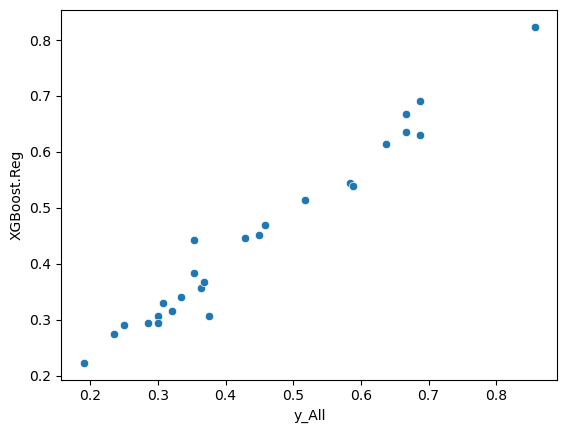

In [847]:
sns.scatterplot(data=all_prediction_result, x='y_All', y='XGBoost.Reg' )

In [848]:
data_importance = pd.DataFrame({"features" : xb.columns,  

                                # "SGD Reg.":coef_SGDR,
                                # "SV Reg.":coef_SVR,
                                "Dec.Tree Reg." : model_DTR.feature_importances_,
                                "RandForest Reg.": model_RFR.feature_importances_,
                                "Extra Trees Reg.": model_ETR.feature_importances_, 
                                "GradBoost Reg.":model_GBR.feature_importances_,
                                "XGBoost Reg.":model_XGBR.feature_importances_,
                                'KNeighbors Reg.' : KNN_importance['importances_mean'],
                                "Linear Reg.":Lin_reg.coef_.flatten(),
                                "Lasso Reg." : Lasso_reg.coef_.flatten(),
                                "Ridge Reg.": Ridge_reg.coef_.flatten(),
                                 }).sort_values('XGBoost Reg.', ascending = False)
data_importance

,features,Dec.Tree Reg.,RandForest Reg.,Extra Trees Reg.,GradBoost Reg.,XGBoost Reg.,KNeighbors Reg.,Linear Reg.,Lasso Reg.,Ridge Reg.
3,voc_a,0.528731,0.321428,0.318936,0.492954,0.237418,0.837649,0.000386,0.001532,0.000713
11,pm2.5_o,0.177429,0.133419,0.086882,0.112340,0.171342,0.028371,-0.044241,-0.000000,-0.033251
5,enth_a,0.000000,0.024487,0.025021,0.026914,0.142736,0.029813,-1.288230,-0.000000,-0.073567
9,rh_o,0.081876,0.036174,0.050193,0.064952,0.103402,0.230716,0.015445,-0.000518,0.007625
7,enth_o,0.000000,0.019595,0.042864,0.031435,0.072566,0.076649,0.052022,0.002081,0.031585
0,temp_a,0.018671,0.059820,0.040964,0.026749,0.062289,0.006745,1.453463,-0.000000,0.025882
8,press_o,0.000000,0.045583,0.065404,0.080049,0.060886,0.129752,-0.005579,0.000000,-0.000035
4,rdn_a,0.000000,0.177720,0.093263,0.026653,0.055789,0.197025,-0.002025,-0.001603,-0.001416
2,co2_a,0.159141,0.030463,0.056426,0.039207,0.047564,0.764826,0.000444,-0.000575,0.000351
1,rh_a,0.000000,0.047093,0.046246,0.031508,0.022534,0.063421,0.123360,0.000000,-0.003370


In [851]:
#saving the model for the app
joblib.dump(Lin_reg,     ML_directory + '_Lin_reg' + '.joblib')
joblib.dump(Lasso_reg,     ML_directory +'_Lasso' + '.joblib')
joblib.dump(Ridge_reg,     ML_directory + '_Ridge' + '.joblib')
# joblib.dump(model_GPR,  ML_directory + '_model_GPC' + '.joblib')
joblib.dump(model_KNR,  ML_directory +  '_model_KNR' + '.joblib')
joblib.dump(model_ETR,  ML_directory +  '_model_ETR' + '.joblib')
joblib.dump(model_DTR,  ML_directory +  '_model_DTR' + '.joblib')
joblib.dump(model_RFR,  ML_directory +  '_model_RFR' + '.joblib')
joblib.dump(model_GBR,  ML_directory +   '_model_GBR' + '.joblib')
joblib.dump(model_XGBR, ML_directory +  '_model_XGBR' + '.joblib')

joblib.dump(model_SVR,  ML_directory + '_model_SVR' + '.joblib')
joblib.dump(model_MLPR, ML_directory +  '_model_MLPR' + '.joblib')


with pd.ExcelWriter(ML_directory+ '_perform data' + '.xlsx') as writer: # make one file with severel sheet

    # use to_excel function and specify the sheet_name and index to store the dataframe in specified sheet
    data_ML.reset_index(drop=True).to_excel(writer, sheet_name = 'main_dataset', index=True) 
    data_ML.describe(percentiles=[0.1,.25, .5, .75, .9]).to_excel(writer, sheet_name = 'origin_desc', index=True) 
    data_ML_R.reset_index(drop=True).to_excel(writer, sheet_name = 'data_traintest', index=True) 
    data_ML_R.describe(percentiles=[0.1,.25, .5, .75, .9]).to_excel(writer, sheet_name = 'traintest_desc', index=True) 
    pd.DataFrame([xb.columns],[[school_train],target_col]).to_excel(writer, sheet_name = 'output_input', index=True) 
    train_regression_result.to_excel(writer, sheet_name = 'ACC_train', index=True)
    test_regression_result.to_excel(writer, sheet_name = 'Acc_test', index=True) 
    all_regression_result.to_excel(writer, sheet_name = 'ACC_all', index=True)

    train_prediction_result.to_excel(writer, sheet_name = 'train_result', index=True) 
    test_prediction_result.to_excel(writer, sheet_name = 'test_result', index=True) 
    all_prediction_result.to_excel(writer, sheet_name = 'all_result', index=True) 

    data_importance.to_excel(writer, sheet_name = 'data_imp', index=True)      #dont forget the index , becaus coordinate -x and -y are the index of the table
    pca_var_ratio.to_excel(writer, sheet_name = 'pca_variat', index=True) 
    pca_regression.to_excel(writer, sheet_name = 'pca_regress', index=True) 
    
    # MLPR_coef_df.to_excel(writer, sheet_name = 'MLPR_coef', index=True) 
    # MLPR_intercept_df.to_excel(writer, sheet_name = 'MLPR_intercept', index=True)

# ML Model - Save

In [ ]:
todays_date = '_20240611'
import joblib
#saving the model for the app
joblib.dump(Lin_reg,     ML_directory + todays_date + '_Lin_reg' + '.joblib')
joblib.dump(Lasso,     ML_directory + todays_date + '_Lasso' + '.joblib')
joblib.dump(Ridge,     ML_directory + todays_date + '_Ridge' + '.joblib')
# joblib.dump(model_GPR,  ML_directory +todays_date +  '_model_GPC' + '.joblib')
joblib.dump(model_KNR,  ML_directory + todays_date + '_model_KNR' + '.joblib')
joblib.dump(model_SVR,  ML_directory + todays_date + '_model_SVR' + '.joblib')
joblib.dump(model_ETR,  ML_directory + todays_date + '_model_ETR' + '.joblib')
joblib.dump(model_DTR,  ML_directory + todays_date + '_model_DTR' + '.joblib')
joblib.dump(model_RFR,  ML_directory +  todays_date + '_model_RFR' + '.joblib')
joblib.dump(model_GBR,  ML_directory +  todays_date + '_model_GBR' + '.joblib')
joblib.dump(model_MLPR, ML_directory +  todays_date + '_model_MLPR' + '.joblib')
joblib.dump(model_XGBR, ML_directory + todays_date + '_model_XGBR' + '.joblib')

with pd.ExcelWriter(ML_directory+ '_perform data' +  todays_date +'.xlsx') as writer: # make one file with severel sheet

    # use to_excel function and specify the sheet_name and index to store the dataframe in specified sheet
    data_ML.to_excel(writer, sheet_name = 'main_dataset', index=True) 
    data_ML.describe().to_excel(writer, sheet_name = 'df_description', index=True) 
    
    train_result.to_excel(writer, sheet_name = 'train_result', index=True) 
    test_result.to_excel(writer, sheet_name = 'test_result', index=True) 
    
    table_classification_performance.to_excel(writer, sheet_name = 'ML_perform', index=True) 
    
    data_importance.to_excel(writer, sheet_name = 'data_imp', index=True)      #dont forget the index , becaus coordinate -x and -y are the index of the table
    
    MLPR_coef_df.to_excel(writer, sheet_name = 'MLPR_coef', index=True) 
    MLPR_intercept_df.to_excel(writer, sheet_name = 'MLPR_intercept', index=True)

In [ ]:
import joblib
#saving the model for the app
joblib.dump(logreg,     ML_directory +todays_date + '_LogReg' + '.joblib')
# joblib.dump(model_GPC,  ML_directory +todays_date + '_model_GPC' + '.joblib')
# joblib.dump(model_KNN,  ML_directory +todays_date + '_model_KNN' + '.joblib')
# joblib.dump(model_SVC,  ML_directory +todays_date + '_model_SVC' + '.joblib')
joblib.dump(model_ETC,  ML_directory +todays_date + '_model_ETC' + '.joblib')
joblib.dump(model_DTC,  ML_directory +todays_date + '_model_DTC' + '.joblib')
joblib.dump(model_RFC,  ML_directory +todays_date +  '_model_RFC' + '.joblib')
# joblib.dump(model_GBC,  ML_directory +todays_date +  '_model_GBC' + '.joblib')
# joblib.dump(model_MLPC, ML_directory + todays_date + '_model_MLPC' + '.joblib')
# joblib.dump(model_XGBC, ML_directory +todays_date + '_model_XGBC' + '.joblib')

with pd.ExcelWriter(ML_directory+ '.xlsx') as writer: # make one file with severel sheet

    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    train_result.to_excel(writer, sheet_name = 'train_result', index=True) 
    test_result.to_excel(writer, sheet_name = 'test_result', index=True) 
    data_ML_C.describe().to_excel(writer, sheet_name = 'df_description', index=True) 
    table_classification.to_excel(writer, sheet_name = 'ML_perform', index=True) 
    data_importance.to_excel(writer, sheet_name = 'data_imp', index=True)      #dont forget the index , becaus coordinate -x and -y are the index of the table
    MLPC_coef_df.to_excel(writer, sheet_name = 'MLPR_coef', index=True) 
    MLPC_intercept_df.to_excel(writer, sheet_name = 'MLPR_intercept', index=True)
    

In [ ]:
print(udah dulu ya)

In [182]:
import joblib
#Loading back the model for the app#saving the model for the app
joblib.dump(Lin_reg,     ML_directory + '_Lin_reg' + '.joblib')
joblib.dump(Lasso_reg,     ML_directory +'_Lasso' + '.joblib')
joblib.dump(Ridge_reg,     ML_directory + '_Ridge' + '.joblib')
# joblib.dump(model_GPR,  ML_directory + '_model_GPC' + '.joblib')
joblib.dump(model_KNR,  ML_directory +  '_model_KNR' + '.joblib')
joblib.dump(model_ETR,  ML_directory +  '_model_ETR' + '.joblib')
joblib.dump(model_DTR,  ML_directory +  '_model_DTR' + '.joblib')
joblib.dump(model_RFR,  ML_directory +  '_model_RFR' + '.joblib')
joblib.dump(model_GBR,  ML_directory +   '_model_GBR' + '.joblib')
joblib.dump(model_XGBR, ML_directory +  '_model_XGBR' + '.joblib')

joblib.dump(model_SVR,  ML_directory + '_model_SVR' + '.joblib')
joblib.dump(model_MLPR, ML_directory +  '_model_MLPR' + '.joblib')

NameError: name 'ML_directory' is not defined

In [ ]:
import joblib
#Loading back the model for the app
logreg      = joblib.load( directory_path + '/' + folder_ML + '/' + folder_model + target_col + '_LogReg' + '.joblib')
model_DTC   = joblib.load( directory_path + '/' + folder_ML + '/' + folder_model + target_col + '_model_DTC' + '.joblib')
RanForC     = joblib.load( directory_path + '/' + folder_ML + '/' + folder_model + target_col + '_model_RFC' + '.joblib')
# model_XGBC  = joblib.load( directory_path + '/' + folder_ML + '/' + folder_model + target_col + '_model_XGBC' + '.joblib')
# model_GBC   = joblib.load( directory_path + '/' + folder_ML + '/' + folder_model + target_col + '_model_GBC' + '.joblib')
# model_MLPC  = joblib.load( directory_path + '/' + folder_ML + '/' + folder_model + target_col + '_model_MLPC' + '.joblib')

In [ ]:
import pickle
#saving the model for the app
# pickle.dump(logreg,    open( ML_directory + '_LogReg' + '.pkl', 'wb'))
# # pickle.dump(model_GPC,  open( ML_directory + '_model_GPC' + '.pkl', 'wb'))
# # pickle.dump(model_KNN,  open( ML_directory + '_model_KNN' + '.pkl', 'wb'))
# pickle.dump(model_SVC,  open( ML_directory + '_model_SVC' + '.pkl', 'wb'))
pickle.dump(model_DTC, open( ML_directory + '_model_DTC' + '_test.pkl', 'wb'))
# pickle.dump(RanForC, open( ML_directory +  '_model_RFC' + '_test.pkl', 'wb'))
# pickle.dump(model_GBC, open( ML_directory +  '_model_GBC' + '.pkl', 'wb'))
# pickle.dump(model_MLPC, open(ML_directory +  '_model_MLPC' + '.pkl', 'wb'))
# pickle.dump(model_XGBC, open(ML_directory + '_model_XGBC'  + '.pkl', 'wb'))

# SHAP

In [186]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import shap
import matplotlib.pyplot as plt


## Classification

In [552]:

X = combined2[combined2['school_id']=='bratteberg'][is_col_main].drop('feel_health', axis=1)
y = combined2[combined2['school_id']=='bratteberg'] ['feel_health'].replace({-2:0, -1:1, 1:2, 2:3 }) # Target variable with categorical values (1 to 4)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print("before oversampling train: ", Counter(y_train ))
print("before oversampling test: " , Counter(y_test ))

before oversampling train:  Counter({2: 739, 3: 577, 1: 229, 0: 171})
before oversampling test:  Counter({2: 238, 3: 183, 1: 90, 0: 62})


In [553]:

oversample_over = SMOTE(sampling_strategy='all')
# fit and apply the transform
x_new, y_new = oversample_over.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, train_size = (75/100), shuffle = True)
print("After oversampling train: ", Counter(y_train ))
print("After oversampling test: " , Counter(y_test ))



After oversampling train:  Counter({0: 752, 2: 729, 3: 725, 1: 725})
After oversampling test:  Counter({1: 252, 3: 252, 2: 248, 0: 225})


In [554]:
# Initialize and train the Random Forest Classifier
rf_model = XGBClassifier()
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

prec_score = precision_score(y_test, y_pred,average='weighted')
print(f'precision_score: {prec_score:.2f}')

recall_sc = recall_score(y_test, y_pred,average='weighted')
print(f'recall_score: {recall_sc:.2f}')

Accuracy: 0.64
precision_score: 0.65
recall_score: 0.64


In [ ]:
conf_matrix_ML( y_test, y_pred, rf_model, 'RF model' )

## Regression

In [189]:
ML_directory

'C:/Users/azimilga/project/data-ready/all years/all schools/export/ML/regression/10min_brannfjell_all years_rd_health'

In [188]:
import joblib
#Loading back the model for the app#saving the model for the app
Lin_reg = joblib.load(ML_directory + '_Lin_reg' + '.joblib')
Lasso_reg=     joblib.load(ML_directory +'_Lasso' + '.joblib')
Ridge_reg=     joblib.load(ML_directory + '_Ridge' + '.joblib')
# model_GPR=  joblib.load(ML_directory + '_model_GPC' + '.joblib')
model_KNR= joblib.load(ML_directory +  '_model_KNR' + '.joblib')
model_ETR = joblib.load(ML_directory +  '_model_ETR' + '.joblib')
model_DTR = joblib.load( ML_directory +  '_model_DTR' + '.joblib')
model_RFR = joblib.load(  ML_directory +  '_model_RFR' + '.joblib')
model_GBR = joblib.load( ML_directory +   '_model_GBR' + '.joblib')
model_XGBR =joblib.load( ML_directory +  '_model_XGBR' + '.joblib')

model_SVR = joblib.load(  ML_directory + '_model_SVR' + '.joblib')
model_MLPR = joblib.load( ML_directory +  '_model_MLPR' + '.joblib')

In [ ]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


In [240]:
# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model_XGBR)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(xb.reset_index(drop=True))

# Summary plot of SHAP values for all classes
# shap_values[i] corresponds to the SHAP values for class i  IF MULTICLASS TARGET
# for i in range(len(shap_values)):
#     shap.summary_plot(shap_values[i], x_test, plot_type="dot", show=False)
#     plt.title(f'SHAP Summary Plot for Class {i}')
#     plt.xlim(-2,2)
#     plt.show()

# # IF ONLY 2 CATEGORIES
shap.summary_plot(shap_values, xb, plot_type="dot", show=False, feature_names=xb.columns)
plt.title(f'SHAP Summary Plot')
plt.show()    

# Bar plot to show the mean absolute SHAP value for each feature across all predictions
shap.summary_plot(shap_values, xb, plot_type="bar", show=False, feature_names=xb.columns)
plt.title('SHAP Feature Importance')
plt.show()


NameError: name 'model_KNN' is not defined

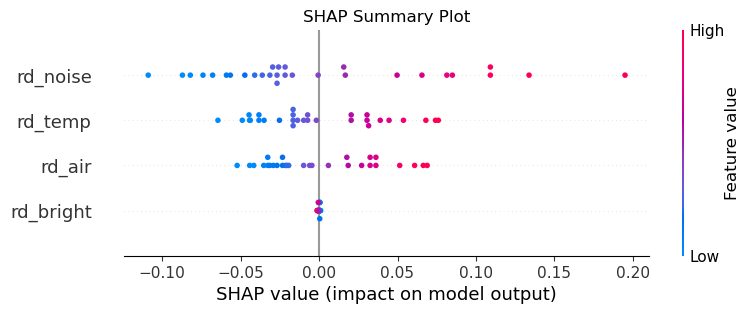

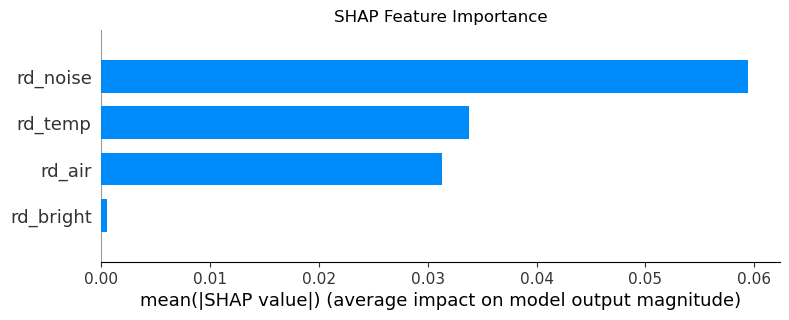

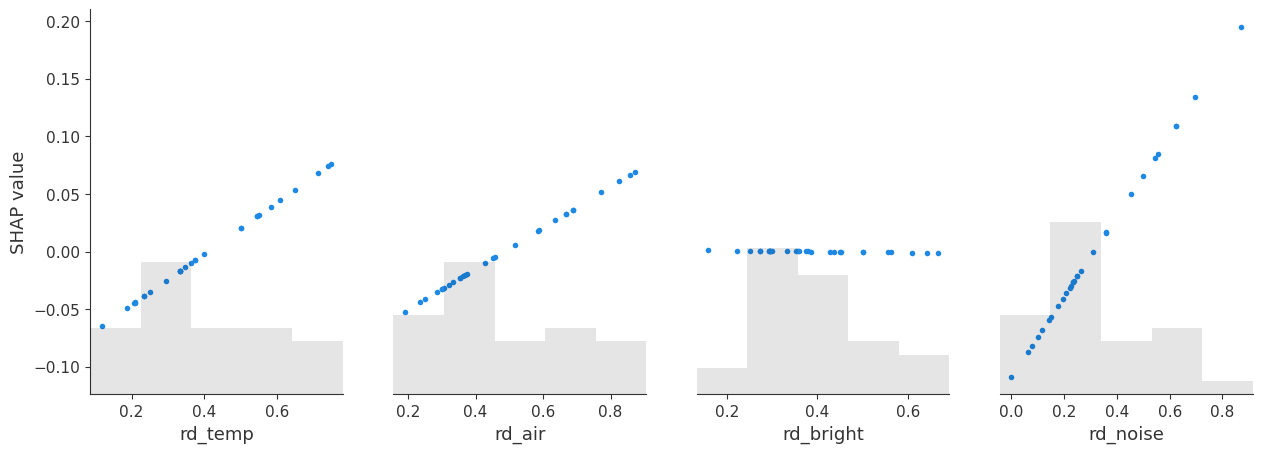

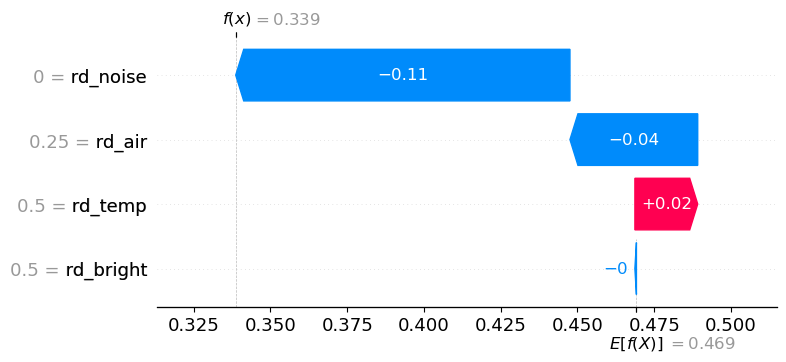

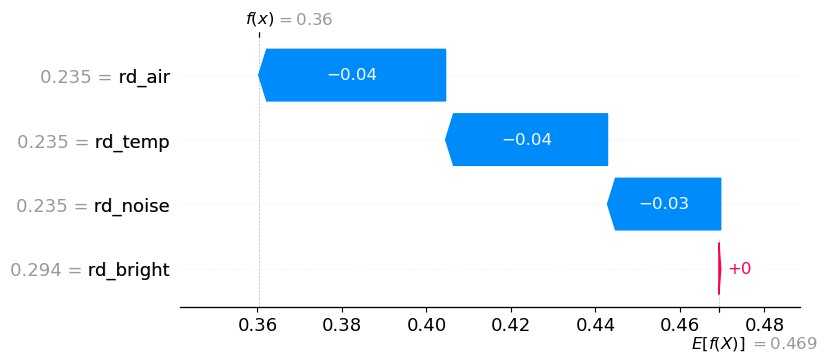

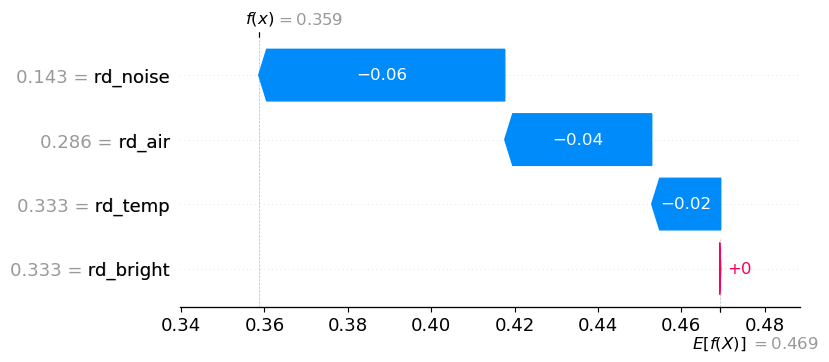

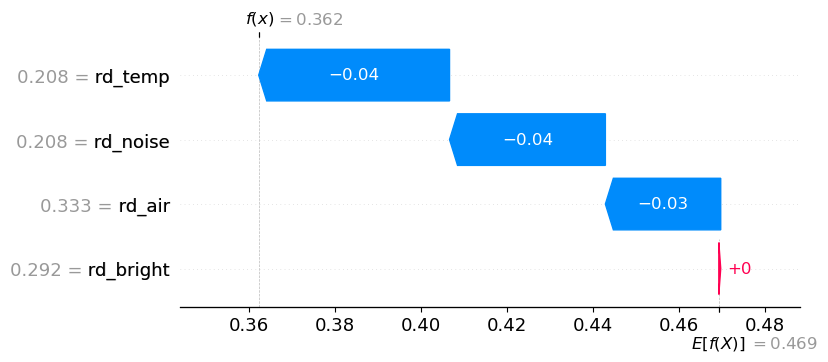

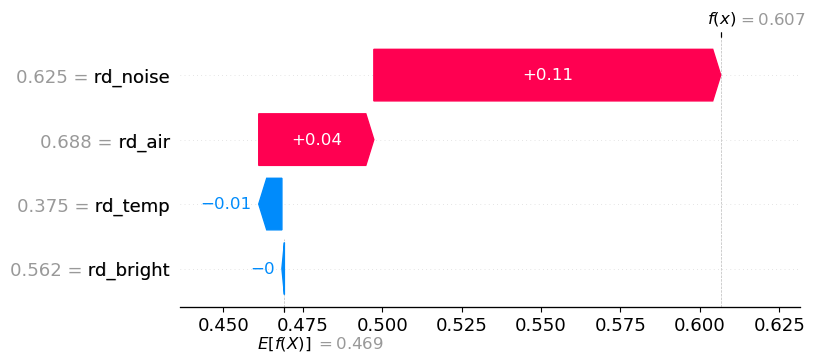

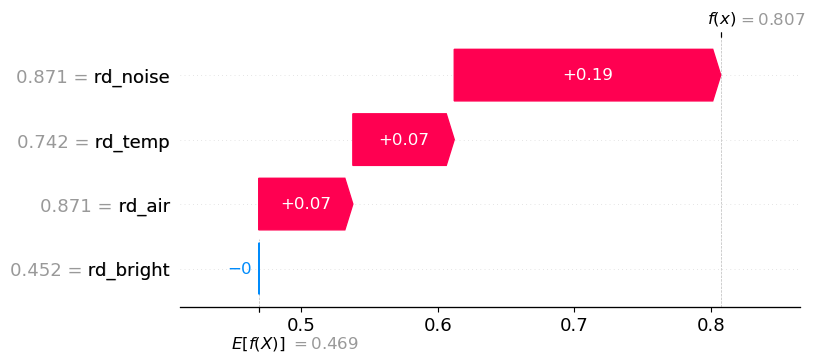

In [246]:
explainer = shap.Explainer(Lin_reg, xb, feature_names=xb.columns)
shap_values = explainer(xb)

shap.summary_plot(shap_values, xb, plot_type="dot", show=False, feature_names=xb.columns)
plt.title(f'SHAP Summary Plot')
plt.show()    

# Bar plot to show the mean absolute SHAP value for each feature across all predictions
shap.summary_plot(shap_values, xb, plot_type="bar", show=False, feature_names=xb.columns)
plt.title('SHAP Feature Importance')
plt.show()


shap.plots.scatter(shap_values)
shap.plots.waterfall(shap_values[0], max_display=7)
shap.plots.waterfall(shap_values[1], max_display=7)
shap.plots.waterfall(shap_values[int(xb.count().mean()/4)], max_display=7)
shap.plots.waterfall(shap_values[int(xb.count().mean()/2)], max_display=7)
shap.plots.waterfall(shap_values[int(xb.count().mean()*3/4)], max_display=7)
shap.plots.waterfall(shap_values[-1], max_display=7)


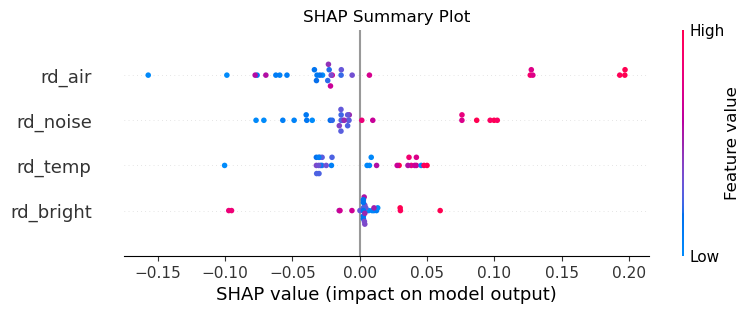

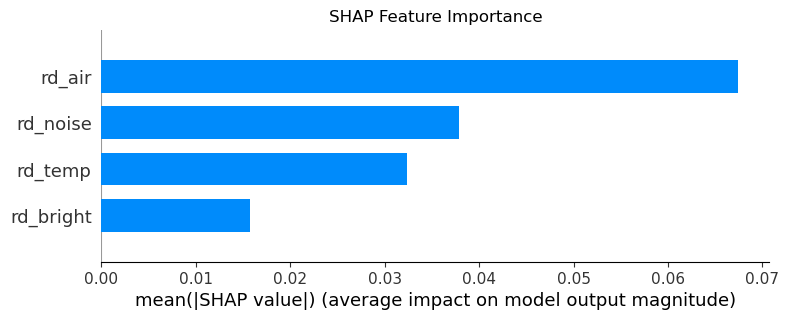

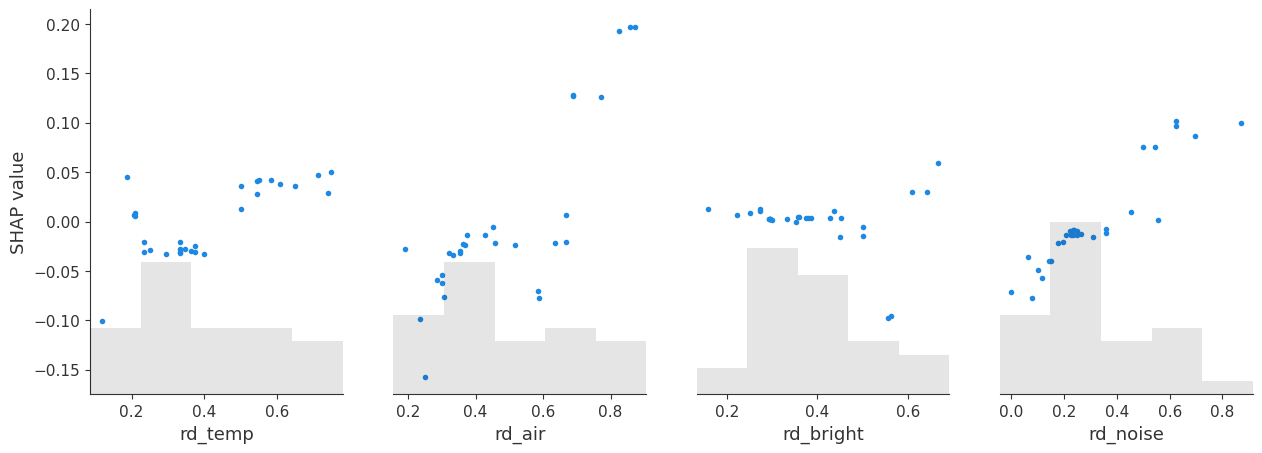

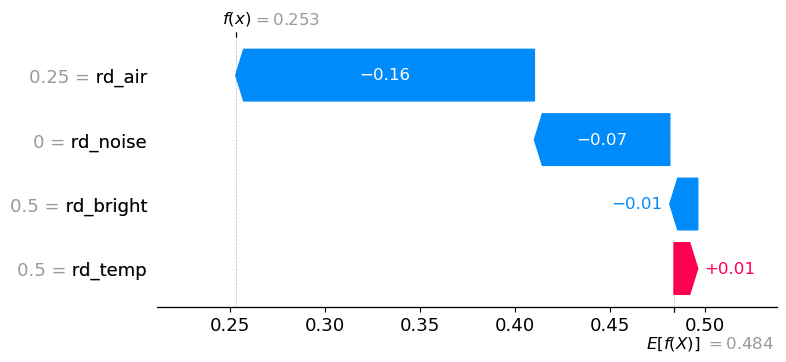

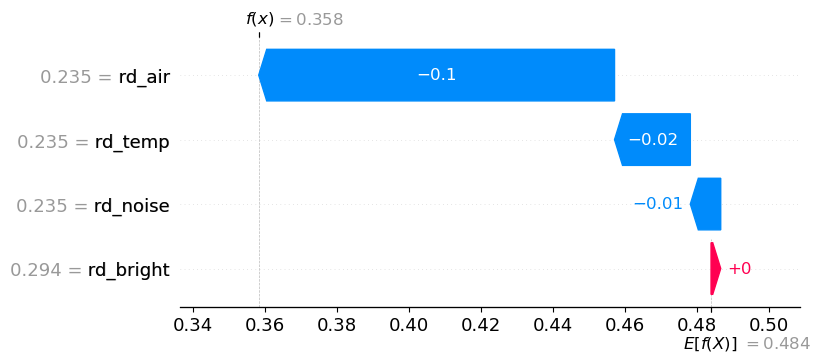

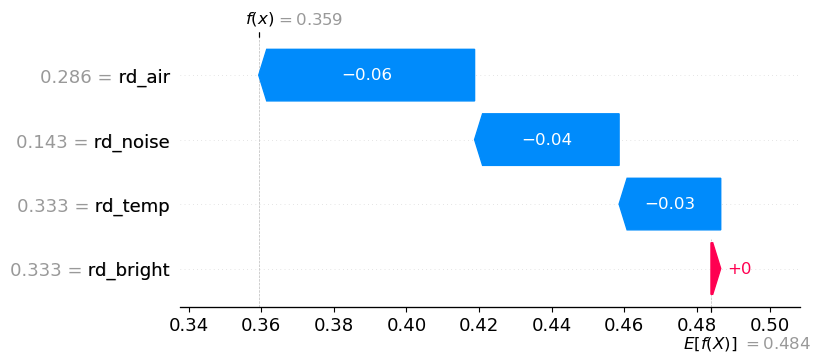

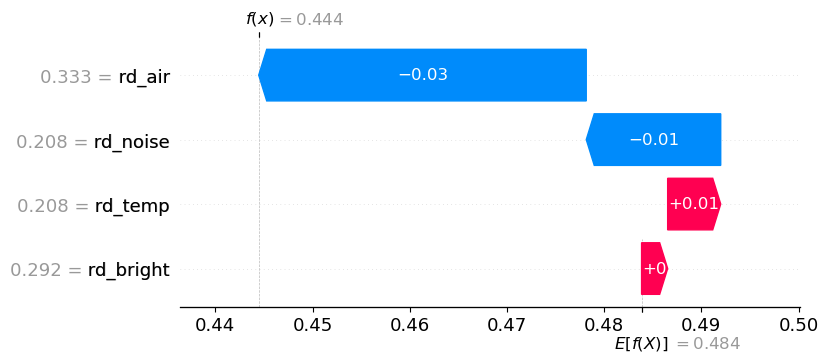

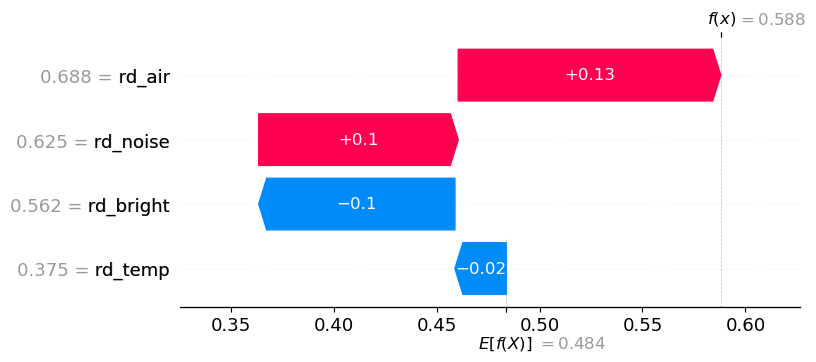

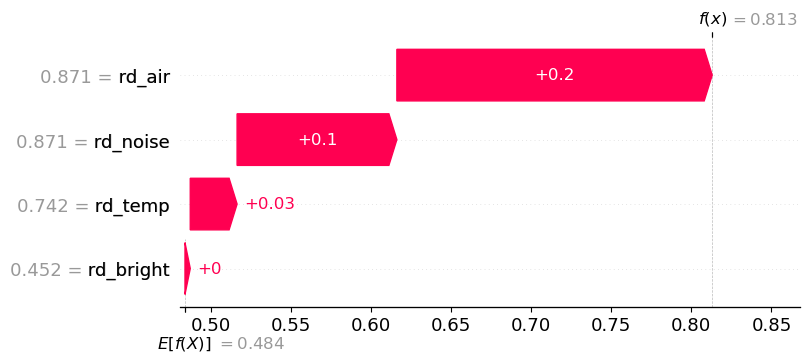

In [247]:
explainer = shap.Explainer(model_XGBR, xb, feature_names=xb.columns)
shap_values = explainer(xb)

shap.summary_plot(shap_values, xb, plot_type="dot", show=False, feature_names=xb.columns)
plt.title(f'SHAP Summary Plot')
plt.show()    

# Bar plot to show the mean absolute SHAP value for each feature across all predictions
shap.summary_plot(shap_values, xb, plot_type="bar", show=False, feature_names=xb.columns)
plt.title('SHAP Feature Importance')
plt.show()


shap.plots.scatter(shap_values)
shap.plots.waterfall(shap_values[0], max_display=7)
shap.plots.waterfall(shap_values[1], max_display=7)
shap.plots.waterfall(shap_values[int(xb.count().mean()/4)], max_display=7)
shap.plots.waterfall(shap_values[int(xb.count().mean()/2)], max_display=7)
shap.plots.waterfall(shap_values[int(xb.count().mean()*3/4)], max_display=7)
shap.plots.waterfall(shap_values[-1], max_display=7)


In [ ]:
shap.initjs()
shap.force_plot(explainer[1], shap_values[1[0,:]])

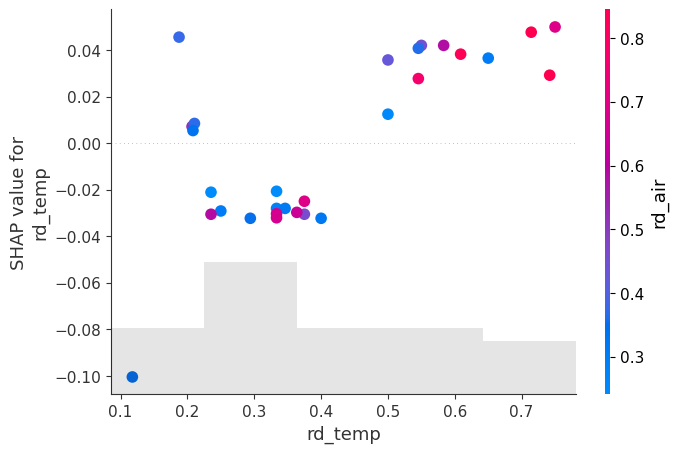

In [230]:
shap.plots.scatter(shap_values[:, "rd_temp"], shap_values[:, "rd_air"] , dot_size=70)